# Sprint 機械学習フロー

## 【問題1】クロスバリデーション

### ＜前処理＞

In [80]:
import pandas as pd
# データ読込
df_train = pd.read_csv('application_train.csv')
df_test = pd.read_csv('application_test.csv')

In [81]:
# 半分以上 欠損地を含む列を削除
drop_df = df_train.dropna(thresh=df_train.shape[0]*0.5, axis=1)

# 欠損地を含む行を削除
drop_df = drop_df.dropna(axis=0)

In [82]:
# ワンホットエンコーディング
df_one_hot_encoded = pd.get_dummies(drop_df)

In [83]:
# 相関係数の算出
df_corr = df_one_hot_encoded.corr()

In [84]:
# TARGETとの相関係数上位１０項目を抽出
df_corr["TARGET"].sort_values(ascending=False)

TARGET                                               1.000000
DAYS_EMPLOYED                                        0.067902
DAYS_BIRTH                                           0.061618
NAME_EDUCATION_TYPE_Secondary / secondary special    0.054697
REGION_RATING_CLIENT_W_CITY                          0.050473
                                                       ...   
NAME_EDUCATION_TYPE_Higher education                -0.058496
EXT_SOURCE_2                                        -0.152174
EXT_SOURCE_3                                        -0.169535
FLAG_MOBIL                                                NaN
FLAG_DOCUMENT_2                                           NaN
Name: TARGET, Length: 189, dtype: float64

In [85]:
# TARGETとの相関係数上位１０項目を抽出(相関関係の正負も考慮し、絶対値を取る)
abs(df_corr["TARGET"]).sort_values(ascending=False)[0:11].index

Index(['TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_EMPLOYED', 'DAYS_BIRTH',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'FLOORSMAX_AVG',
       'FLOORSMAX_MEDI'],
      dtype='object')

In [86]:
# 上位１０項目で再度相関係数を出しなおす。
new_df = df_one_hot_encoded[abs(df_corr["TARGET"]).sort_values(ascending=False)[0:11].index]
new_df_corr = new_df.corr()
new_df_corr

,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_EMPLOYED,DAYS_BIRTH,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLOORSMAX_AVG,FLOORSMAX_MEDI
TARGET,1.000000,-0.169535,-0.152174,0.067902,0.061618,-0.058496,0.054697,0.050473,0.048078,-0.046205,-0.046030
EXT_SOURCE_3,-0.169535,1.000000,0.118087,-0.125235,-0.179898,-0.005739,0.027195,-0.002365,-0.003040,0.003699,0.003985
EXT_SOURCE_2,-0.152174,0.118087,1.000000,-0.088711,-0.140273,0.110212,-0.095934,-0.284964,-0.295872,0.125559,0.124219
DAYS_EMPLOYED,0.067902,-0.125235,-0.088711,1.000000,0.348787,0.017198,-0.044498,-0.022239,-0.023906,0.003278,0.003263
DAYS_BIRTH,0.061618,-0.179898,-0.140273,0.348787,1.000000,0.077791,-0.134095,0.030587,0.032088,-0.013425,-0.013167
NAME_EDUCATION_TYPE_Higher education,-0.058496,-0.005739,0.110212,0.017198,0.077791,1.000000,-0.898646,-0.040935,-0.042366,0.140492,0.140034
NAME_EDUCATION_TYPE_Secondary / secondary special,0.054697,0.027195,-0.095934,-0.044498,-0.134095,-0.898646,1.000000,0.046928,0.047650,-0.141361,-0.140970
REGION_RATING_CLIENT_W_CITY,0.050473,-0.002365,-0.284964,-0.022239,0.030587,-0.040935,0.046928,1.000000,0.924737,-0.227591,-0.224935
REGION_RATING_CLIENT,0.048078,-0.003040,-0.295872,-0.023906,0.032088,-0.042366,0.047650,0.924737,1.000000,-0.212323,-0.209644
FLOORSMAX_AVG,-0.046205,0.003699,0.125559,0.003278,-0.013425,0.140492,-0.141361,-0.227591,-0.212323,1.000000,0.997143


In [87]:
# 説明変数
new_df_X = new_df.iloc[:,1:11]
new_df_X

,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_EMPLOYED,DAYS_BIRTH,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLOORSMAX_AVG,FLOORSMAX_MEDI
0,0.139376,0.262949,-637,-9461,0,1,2,2,0.0833,0.0833
12,0.176653,0.715042,-2717,-13439,0,1,2,2,0.1667,0.1667
13,0.770087,0.566907,-3028,-14086,0,1,2,2,0.3333,0.3333
18,0.556727,0.706428,-7804,-17718,0,1,1,1,0.0833,0.0833
22,0.358951,0.457143,-4306,-11146,0,1,2,3,0.1667,0.1667
...,...,...,...,...,...,...,...,...,...,...
307495,0.597192,0.267834,-7438,-20922,1,0,2,2,0.3333,0.3333
307498,0.406617,0.746259,-3689,-19102,0,1,1,1,0.6667,0.6667
307508,0.218859,0.535722,-7921,-14966,1,0,3,3,0.1667,0.1667
307509,0.661024,0.514163,-4786,-11961,0,1,2,2,0.0417,0.0417


In [88]:
# 説明変数
new_df_y = new_df.iloc[:,0]
new_df_y

0         1
12        0
13        0
18        0
22        0
         ..
307495    0
307498    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 84575, dtype: int64

In [89]:
import numpy as np
# ndarrayへ変換
X = np.array(new_df_X)
y = np.array(new_df_y)

In [90]:
y.shape

(84575,)

In [91]:
from sklearn.preprocessing import StandardScaler
# 標準化
ss_base = StandardScaler()
ss_base.fit(X)
ss_X = ss_base.transform(X)

    

### ＜クロスバリデーション＞

In [92]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4)
kf.get_n_splits(X)

4

In [93]:
print(kf)

KFold(n_splits=4, random_state=None, shuffle=False)


In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

result = []
# データ分割
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    # 標準化
    ss = StandardScaler()
    ss.fit(X_train)
    ss_X_train = ss.transform(X_train)
    ss_X_test = ss.transform(X_test)
    
    # LinearRegression
    model_LR= LR()
    model_LR.fit(ss_X_train, y_train)

    # 標準化済みのX_testで予測を行う。
    y_pred_LR = model_LR.predict(ss_X_test)
    print("y_pred_LR:{}".format(y_pred_LR))
    #result.append(y_pred_LR)
    
    # LinearRegression
    fpr_LR, tpr_LR, thresholds = metrics.roc_curve(y_test, y_pred_LR, pos_label=1)

    auc_LR = metrics.auc(fpr_LR, tpr_LR)
    auc_LR
    
    result.append(auc_LR)
    


avg_AUC = sum(result)/len(result)
avg_AUC

TRAIN: [21144 21145 21146 ... 84572 84573 84574] TEST: [    0     1     2 ... 21141 21142 21143]
y_pred_LR:[0.22546573 0.12384463 0.01961457 ... 0.07966373 0.00169124 0.04530864]
TRAIN: [    0     1     2 ... 84572 84573 84574] TEST: [21144 21145 21146 ... 42285 42286 42287]
y_pred_LR:[0.01138529 0.02114578 0.09528127 ... 0.02855614 0.07098779 0.04050658]
TRAIN: [    0     1     2 ... 84572 84573 84574] TEST: [42288 42289 42290 ... 63429 63430 63431]
y_pred_LR:[0.00646252 0.05436471 0.1690645  ... 0.10861745 0.02607257 0.14681411]
TRAIN: [    0     1     2 ... 63429 63430 63431] TEST: [63432 63433 63434 ... 84572 84573 84574]
y_pred_LR:[0.10689427 0.0566584  0.09203495 ... 0.10266422 0.05805886 0.10248436]


0.7282775824020655

In [96]:
np.mean(result)

0.7282775824020655

## 【問題2】グリッドサーチ

In [99]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

svc = svm.SVC(max_iter = 200, gamma='auto', probability = True)
clf = GridSearchCV(svc, parameters, cv = 4)

# 標準化済みデータで学習
clf.fit(ss_X, y)

C:\Users\Takatoshi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Takatoshi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Takatoshi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Takatoshi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Takatoshi\Anaco

GridSearchCV(cv=4, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=200,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [100]:
best_clf = clf.best_estimator_

In [101]:
clf.cv_results_

{'mean_fit_time': array([2.36973655, 4.97099608, 1.86883318, 4.99807942]),
 'std_fit_time': array([0.03283038, 0.04312852, 0.08090139, 0.10277723]),
 'mean_score_time': array([0.06382722, 0.16381127, 0.04612583, 0.14652818]),
 'std_score_time': array([0.00173859, 0.00792814, 0.00333892, 0.00795704]),
 'param_C': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'}],
 'split0_test_score': array([0.18279417, 0.82756337, 0.40692395, 0.59473137]),
 'split1_test_score': array([0.26608021, 0.86823685, 0.55107832, 0.62348657]),
 'split2_test_score': array([0.27014756, 0.78532917, 0.63502649, 0.87902005]),
 'split

In [102]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [103]:
clf.best_score_

0.8464919698079931

In [108]:
# 最良の学習結果を算出
y_pred = best_clf.predict(ss_X)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [111]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y, y_pred, pos_label=1)

auc = metrics.auc(fpr, tpr)
print("GridSerchのbestでのAUC = {}".format(auc))

GridSerchのbestでのAUC = 0.46452654045976993


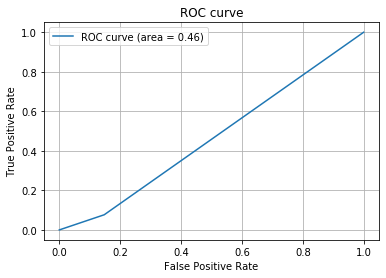

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [24]:
# predict_probaで確率をだす。
y_predict_proba = best_clf.predict_proba(X)
print("y_predict_proba = \n{}".format(y_predict_proba))

y_predict_proba = 
[[0.88587875 0.11412125]
 [0.88587875 0.11412125]
 [0.88587875 0.11412125]
 ...
 [0.88587875 0.11412125]
 [0.88587875 0.11412125]
 [0.88587875 0.11412125]]


## 【問題3】Kaggle Notebooksからの調査
KaggleのNotebooksから様々なアイデアを見つけ出して、列挙してください。

勾配ブースティング  
アンサンブル学習  
・XGBoost  
・LightGBM  
・CatBoost  
・DeepLearning  
・Tree Parzen Esimator  
・Optuna

機械学習のコミュニティで世界的に有名なKDnuggetsによると、Kaggleで上位ランキングを取った半数以上もの勝者が「勾配ブースティング」を使った実績があると報じています。それほど勾配ブースティングは注目度の高い機械学習手法であり、今日のデータ分析競技には必須とも言える存在なのです。

## 【問題4】高い汎化性能のモデル作成

### ＜GridSearch + LightGBM使ってみた＞

In [25]:
! pip install lightgbm

In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ss_X, y, train_size = 0.8)

In [242]:
import lightgbm as lgb

#モデルの作成、各種ハイパラメータの指定
bst = lgb.LGBMRegressor(
                        num_leaves = 31,
                        learning_rate=0.01,
                        min_child_samples=10,
                        n_estimators=1000,
                        max_depth=-1,
                        )

In [243]:
# LightGBM のハイパーパラメータ
grid_param ={'max_depth':[2,4],
             'num_leaves':[9,7,5],
             'learning_rate':[0.05,0.04],
            }

# early_stoppingを使いたいので以下のような辞書をモデルを訓練する際に渡してやります。
fit_params={'early_stopping_rounds':10, 
            'eval_metric' : 'auc', 
            'eval_set' : [(ss_X, y)],
           }

In [244]:
bst_gs_cv = GridSearchCV(
            bst,
            grid_param, 
            cv = 5, 
            scoring = 'roc_auc',
            verbose = 0
            )

bst_gs_cv.fit(
            ss_X, 
            y,
            **fit_params,
            verbose = 10
            )


Training until validation scores don't improve for 10 rounds
[10]	valid_0's auc: 0.700537	valid_0's l2: 0.0668307
[20]	valid_0's auc: 0.711719	valid_0's l2: 0.0659663
[30]	valid_0's auc: 0.717767	valid_0's l2: 0.0654848
[40]	valid_0's auc: 0.722115	valid_0's l2: 0.0651777
[50]	valid_0's auc: 0.725386	valid_0's l2: 0.0649676
[60]	valid_0's auc: 0.727368	valid_0's l2: 0.0648209
[70]	valid_0's auc: 0.729414	valid_0's l2: 0.0647096
[80]	valid_0's auc: 0.730527	valid_0's l2: 0.0646231
[90]	valid_0's auc: 0.731833	valid_0's l2: 0.0645515
[100]	valid_0's auc: 0.732662	valid_0's l2: 0.0644972
[110]	valid_0's auc: 0.733211	valid_0's l2: 0.0644541
[120]	valid_0's auc: 0.733842	valid_0's l2: 0.0644189
[130]	valid_0's auc: 0.734397	valid_0's l2: 0.0643883
[140]	valid_0's auc: 0.734962	valid_0's l2: 0.0643619
[150]	valid_0's auc: 0.735446	valid_0's l2: 0.0643391
[160]	valid_0's auc: 0.7358	valid_0's l2: 0.0643191
[170]	valid_0's auc: 0.736124	valid_0's l2: 0.0643013
[180]	valid_0's auc: 0.736426	va

[490]	valid_0's auc: 0.741765	valid_0's l2: 0.064022
[500]	valid_0's auc: 0.741865	valid_0's l2: 0.0640186
[510]	valid_0's auc: 0.741999	valid_0's l2: 0.0640126
[520]	valid_0's auc: 0.742077	valid_0's l2: 0.0640076
[530]	valid_0's auc: 0.742206	valid_0's l2: 0.0640027
[540]	valid_0's auc: 0.742319	valid_0's l2: 0.0639978
[550]	valid_0's auc: 0.742449	valid_0's l2: 0.0639921
[560]	valid_0's auc: 0.742614	valid_0's l2: 0.0639864
[570]	valid_0's auc: 0.742695	valid_0's l2: 0.0639821
[580]	valid_0's auc: 0.7428	valid_0's l2: 0.0639779
[590]	valid_0's auc: 0.742984	valid_0's l2: 0.0639707
[600]	valid_0's auc: 0.743121	valid_0's l2: 0.0639645
[610]	valid_0's auc: 0.743209	valid_0's l2: 0.0639592
[620]	valid_0's auc: 0.743382	valid_0's l2: 0.0639529
[630]	valid_0's auc: 0.743563	valid_0's l2: 0.0639469
[640]	valid_0's auc: 0.743667	valid_0's l2: 0.0639398
[650]	valid_0's auc: 0.743848	valid_0's l2: 0.0639341
[660]	valid_0's auc: 0.743967	valid_0's l2: 0.0639298
[670]	valid_0's auc: 0.744096	v

[980]	valid_0's auc: 0.746345	valid_0's l2: 0.0637813
[990]	valid_0's auc: 0.746423	valid_0's l2: 0.0637767
[1000]	valid_0's auc: 0.746525	valid_0's l2: 0.0637733
Did not meet early stopping. Best iteration is:
[999]	valid_0's auc: 0.746526	valid_0's l2: 0.0637733
Training until validation scores don't improve for 10 rounds
[10]	valid_0's auc: 0.694962	valid_0's l2: 0.0668537
[20]	valid_0's auc: 0.711653	valid_0's l2: 0.0659904
[30]	valid_0's auc: 0.718215	valid_0's l2: 0.0655091
[40]	valid_0's auc: 0.723016	valid_0's l2: 0.0652035
[50]	valid_0's auc: 0.72655	valid_0's l2: 0.0649933
[60]	valid_0's auc: 0.729016	valid_0's l2: 0.0648394
[70]	valid_0's auc: 0.730559	valid_0's l2: 0.0647267
[80]	valid_0's auc: 0.732106	valid_0's l2: 0.0646395
[90]	valid_0's auc: 0.732996	valid_0's l2: 0.064572
[100]	valid_0's auc: 0.733612	valid_0's l2: 0.064517
[110]	valid_0's auc: 0.734293	valid_0's l2: 0.064473
[120]	valid_0's auc: 0.734866	valid_0's l2: 0.0644337
[130]	valid_0's auc: 0.735404	valid_0's

[440]	valid_0's auc: 0.74126	valid_0's l2: 0.0640497
[450]	valid_0's auc: 0.741405	valid_0's l2: 0.0640442
[460]	valid_0's auc: 0.741595	valid_0's l2: 0.0640366
[470]	valid_0's auc: 0.74176	valid_0's l2: 0.064029
[480]	valid_0's auc: 0.741944	valid_0's l2: 0.0640215
[490]	valid_0's auc: 0.74205	valid_0's l2: 0.0640162
[500]	valid_0's auc: 0.74224	valid_0's l2: 0.0640102
[510]	valid_0's auc: 0.742335	valid_0's l2: 0.0640049
[520]	valid_0's auc: 0.742421	valid_0's l2: 0.064
[530]	valid_0's auc: 0.742578	valid_0's l2: 0.0639954
[540]	valid_0's auc: 0.742657	valid_0's l2: 0.0639892
[550]	valid_0's auc: 0.742796	valid_0's l2: 0.0639849
[560]	valid_0's auc: 0.742945	valid_0's l2: 0.0639804
[570]	valid_0's auc: 0.742991	valid_0's l2: 0.0639748
[580]	valid_0's auc: 0.743107	valid_0's l2: 0.0639691
[590]	valid_0's auc: 0.743213	valid_0's l2: 0.0639631
[600]	valid_0's auc: 0.743324	valid_0's l2: 0.0639584
[610]	valid_0's auc: 0.743394	valid_0's l2: 0.0639532
[620]	valid_0's auc: 0.743458	valid_0

[930]	valid_0's auc: 0.745475	valid_0's l2: 0.0638184
[940]	valid_0's auc: 0.745555	valid_0's l2: 0.0638156
[950]	valid_0's auc: 0.74564	valid_0's l2: 0.0638112
[960]	valid_0's auc: 0.74575	valid_0's l2: 0.0638067
[970]	valid_0's auc: 0.745835	valid_0's l2: 0.0638026
[980]	valid_0's auc: 0.745921	valid_0's l2: 0.0637981
[990]	valid_0's auc: 0.745982	valid_0's l2: 0.0637949
[1000]	valid_0's auc: 0.746048	valid_0's l2: 0.0637921
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.746048	valid_0's l2: 0.0637921
Training until validation scores don't improve for 10 rounds
[10]	valid_0's auc: 0.700892	valid_0's l2: 0.0668677
[20]	valid_0's auc: 0.713597	valid_0's l2: 0.0659998
[30]	valid_0's auc: 0.718854	valid_0's l2: 0.0655178
[40]	valid_0's auc: 0.722783	valid_0's l2: 0.0652077
[50]	valid_0's auc: 0.725857	valid_0's l2: 0.0650022
[60]	valid_0's auc: 0.728196	valid_0's l2: 0.0648514
[70]	valid_0's auc: 0.729933	valid_0's l2: 0.0647373
[80]	valid_0's auc: 0.73127	valid_

[390]	valid_0's auc: 0.740163	valid_0's l2: 0.0640895
[400]	valid_0's auc: 0.740378	valid_0's l2: 0.064079
[410]	valid_0's auc: 0.740553	valid_0's l2: 0.0640708
[420]	valid_0's auc: 0.74074	valid_0's l2: 0.0640626
[430]	valid_0's auc: 0.740827	valid_0's l2: 0.0640571
[440]	valid_0's auc: 0.741016	valid_0's l2: 0.0640507
[450]	valid_0's auc: 0.741139	valid_0's l2: 0.064044
[460]	valid_0's auc: 0.741325	valid_0's l2: 0.0640362
[470]	valid_0's auc: 0.74154	valid_0's l2: 0.0640282
[480]	valid_0's auc: 0.741726	valid_0's l2: 0.0640208
[490]	valid_0's auc: 0.741817	valid_0's l2: 0.0640146
[500]	valid_0's auc: 0.741995	valid_0's l2: 0.0640064
[510]	valid_0's auc: 0.742114	valid_0's l2: 0.0639994
[520]	valid_0's auc: 0.742251	valid_0's l2: 0.0639928
[530]	valid_0's auc: 0.74242	valid_0's l2: 0.0639862
[540]	valid_0's auc: 0.742538	valid_0's l2: 0.0639803
[550]	valid_0's auc: 0.742666	valid_0's l2: 0.0639737
[560]	valid_0's auc: 0.742772	valid_0's l2: 0.0639668
[570]	valid_0's auc: 0.742867	val

[880]	valid_0's auc: 0.745837	valid_0's l2: 0.0638188
[890]	valid_0's auc: 0.745919	valid_0's l2: 0.0638146
[900]	valid_0's auc: 0.745991	valid_0's l2: 0.0638101
[910]	valid_0's auc: 0.746089	valid_0's l2: 0.0638046
[920]	valid_0's auc: 0.746162	valid_0's l2: 0.0638012
[930]	valid_0's auc: 0.746286	valid_0's l2: 0.063797
[940]	valid_0's auc: 0.746374	valid_0's l2: 0.0637926
[950]	valid_0's auc: 0.746476	valid_0's l2: 0.0637881
[960]	valid_0's auc: 0.746603	valid_0's l2: 0.0637845
[970]	valid_0's auc: 0.746713	valid_0's l2: 0.0637796
[980]	valid_0's auc: 0.7468	valid_0's l2: 0.0637761
[990]	valid_0's auc: 0.746875	valid_0's l2: 0.0637732
[1000]	valid_0's auc: 0.746985	valid_0's l2: 0.0637691
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.746985	valid_0's l2: 0.0637691
Training until validation scores don't improve for 10 rounds
[10]	valid_0's auc: 0.701222	valid_0's l2: 0.0668417
[20]	valid_0's auc: 0.71154	valid_0's l2: 0.0659735
[30]	valid_0's auc: 0.716808	va

[340]	valid_0's auc: 0.739373	valid_0's l2: 0.0641229
[350]	valid_0's auc: 0.739525	valid_0's l2: 0.0641158
[360]	valid_0's auc: 0.739684	valid_0's l2: 0.0641095
[370]	valid_0's auc: 0.739815	valid_0's l2: 0.0641026
[380]	valid_0's auc: 0.739934	valid_0's l2: 0.0640983
[390]	valid_0's auc: 0.74011	valid_0's l2: 0.06409
[400]	valid_0's auc: 0.74025	valid_0's l2: 0.0640845
[410]	valid_0's auc: 0.740389	valid_0's l2: 0.0640783
[420]	valid_0's auc: 0.740496	valid_0's l2: 0.0640743
[430]	valid_0's auc: 0.740607	valid_0's l2: 0.0640671
[440]	valid_0's auc: 0.740699	valid_0's l2: 0.0640605
[450]	valid_0's auc: 0.740831	valid_0's l2: 0.0640545
[460]	valid_0's auc: 0.740986	valid_0's l2: 0.064049
[470]	valid_0's auc: 0.741159	valid_0's l2: 0.0640412
[480]	valid_0's auc: 0.741295	valid_0's l2: 0.0640358
[490]	valid_0's auc: 0.741405	valid_0's l2: 0.0640312
[500]	valid_0's auc: 0.741574	valid_0's l2: 0.064025
[510]	valid_0's auc: 0.741705	valid_0's l2: 0.0640191
[520]	valid_0's auc: 0.741832	vali

[830]	valid_0's auc: 0.745519	valid_0's l2: 0.0638514
[840]	valid_0's auc: 0.745587	valid_0's l2: 0.063847
[850]	valid_0's auc: 0.745645	valid_0's l2: 0.0638435
[860]	valid_0's auc: 0.745745	valid_0's l2: 0.0638384
[870]	valid_0's auc: 0.745854	valid_0's l2: 0.0638332
[880]	valid_0's auc: 0.745937	valid_0's l2: 0.0638283
[890]	valid_0's auc: 0.746064	valid_0's l2: 0.0638241
[900]	valid_0's auc: 0.746088	valid_0's l2: 0.0638205
[910]	valid_0's auc: 0.746162	valid_0's l2: 0.0638164
[920]	valid_0's auc: 0.746222	valid_0's l2: 0.0638123
[930]	valid_0's auc: 0.746331	valid_0's l2: 0.0638085
[940]	valid_0's auc: 0.746435	valid_0's l2: 0.0638042
[950]	valid_0's auc: 0.746545	valid_0's l2: 0.0638008
[960]	valid_0's auc: 0.746582	valid_0's l2: 0.0637978
[970]	valid_0's auc: 0.746733	valid_0's l2: 0.0637937
[980]	valid_0's auc: 0.74683	valid_0's l2: 0.0637898
[990]	valid_0's auc: 0.746914	valid_0's l2: 0.0637848
[1000]	valid_0's auc: 0.746978	valid_0's l2: 0.0637809
Did not meet early stopping. 

[290]	valid_0's auc: 0.73928	valid_0's l2: 0.0641453
[300]	valid_0's auc: 0.739378	valid_0's l2: 0.0641379
[310]	valid_0's auc: 0.739508	valid_0's l2: 0.0641312
[320]	valid_0's auc: 0.739657	valid_0's l2: 0.0641225
[330]	valid_0's auc: 0.739809	valid_0's l2: 0.0641153
[340]	valid_0's auc: 0.739941	valid_0's l2: 0.0641092
[350]	valid_0's auc: 0.740054	valid_0's l2: 0.0641021
[360]	valid_0's auc: 0.740211	valid_0's l2: 0.0640936
[370]	valid_0's auc: 0.740355	valid_0's l2: 0.0640873
[380]	valid_0's auc: 0.740451	valid_0's l2: 0.0640819
[390]	valid_0's auc: 0.740593	valid_0's l2: 0.0640744
[400]	valid_0's auc: 0.740709	valid_0's l2: 0.0640687
[410]	valid_0's auc: 0.740809	valid_0's l2: 0.064062
[420]	valid_0's auc: 0.74092	valid_0's l2: 0.0640562
[430]	valid_0's auc: 0.741092	valid_0's l2: 0.0640494
[440]	valid_0's auc: 0.741177	valid_0's l2: 0.0640443
[450]	valid_0's auc: 0.741295	valid_0's l2: 0.0640393
[460]	valid_0's auc: 0.741372	valid_0's l2: 0.0640338
[470]	valid_0's auc: 0.74145	va

[780]	valid_0's auc: 0.744933	valid_0's l2: 0.0638647
[790]	valid_0's auc: 0.744968	valid_0's l2: 0.063859
[800]	valid_0's auc: 0.745058	valid_0's l2: 0.063854
[810]	valid_0's auc: 0.745193	valid_0's l2: 0.0638484
[820]	valid_0's auc: 0.745313	valid_0's l2: 0.0638438
[830]	valid_0's auc: 0.745448	valid_0's l2: 0.0638378
[840]	valid_0's auc: 0.745588	valid_0's l2: 0.063833
[850]	valid_0's auc: 0.745679	valid_0's l2: 0.0638291
[860]	valid_0's auc: 0.745759	valid_0's l2: 0.0638244
[870]	valid_0's auc: 0.745866	valid_0's l2: 0.0638188
[880]	valid_0's auc: 0.745946	valid_0's l2: 0.0638146
[890]	valid_0's auc: 0.746013	valid_0's l2: 0.0638101
[900]	valid_0's auc: 0.746073	valid_0's l2: 0.0638061
[910]	valid_0's auc: 0.746134	valid_0's l2: 0.0638018
[920]	valid_0's auc: 0.746207	valid_0's l2: 0.0637959
[930]	valid_0's auc: 0.746323	valid_0's l2: 0.0637923
[940]	valid_0's auc: 0.746382	valid_0's l2: 0.0637881
[950]	valid_0's auc: 0.746485	valid_0's l2: 0.0637836
[960]	valid_0's auc: 0.746531	v

[240]	valid_0's auc: 0.74838	valid_0's l2: 0.0634659
[250]	valid_0's auc: 0.748854	valid_0's l2: 0.0634404
[260]	valid_0's auc: 0.749299	valid_0's l2: 0.0634093
[270]	valid_0's auc: 0.749683	valid_0's l2: 0.0633829
[280]	valid_0's auc: 0.750245	valid_0's l2: 0.0633557
[290]	valid_0's auc: 0.750592	valid_0's l2: 0.0633272
[300]	valid_0's auc: 0.751018	valid_0's l2: 0.0632973
[310]	valid_0's auc: 0.751315	valid_0's l2: 0.0632725
[320]	valid_0's auc: 0.751705	valid_0's l2: 0.0632521
[330]	valid_0's auc: 0.752068	valid_0's l2: 0.0632262
[340]	valid_0's auc: 0.752419	valid_0's l2: 0.0631973
[350]	valid_0's auc: 0.752748	valid_0's l2: 0.0631664
[360]	valid_0's auc: 0.753212	valid_0's l2: 0.063142
[370]	valid_0's auc: 0.753469	valid_0's l2: 0.0631065
[380]	valid_0's auc: 0.753798	valid_0's l2: 0.0630854
[390]	valid_0's auc: 0.754176	valid_0's l2: 0.0630473
[400]	valid_0's auc: 0.754564	valid_0's l2: 0.0630125
[410]	valid_0's auc: 0.754942	valid_0's l2: 0.0629877
[420]	valid_0's auc: 0.755304	

[730]	valid_0's auc: 0.768777	valid_0's l2: 0.062194
[740]	valid_0's auc: 0.769262	valid_0's l2: 0.062175
[750]	valid_0's auc: 0.769527	valid_0's l2: 0.0621554
[760]	valid_0's auc: 0.769812	valid_0's l2: 0.0621326
[770]	valid_0's auc: 0.770112	valid_0's l2: 0.0621082
[780]	valid_0's auc: 0.770323	valid_0's l2: 0.0620888
[790]	valid_0's auc: 0.770561	valid_0's l2: 0.0620598
[800]	valid_0's auc: 0.770749	valid_0's l2: 0.0620395
[810]	valid_0's auc: 0.770973	valid_0's l2: 0.0620074
[820]	valid_0's auc: 0.771273	valid_0's l2: 0.0619779
[830]	valid_0's auc: 0.771417	valid_0's l2: 0.0619559
[840]	valid_0's auc: 0.771726	valid_0's l2: 0.0619225
[850]	valid_0's auc: 0.772008	valid_0's l2: 0.0618946
[860]	valid_0's auc: 0.772232	valid_0's l2: 0.0618638
[870]	valid_0's auc: 0.772505	valid_0's l2: 0.0618367
[880]	valid_0's auc: 0.772845	valid_0's l2: 0.0618198
[890]	valid_0's auc: 0.773142	valid_0's l2: 0.0617997
[900]	valid_0's auc: 0.773481	valid_0's l2: 0.0617744
[910]	valid_0's auc: 0.774072	

[190]	valid_0's auc: 0.746048	valid_0's l2: 0.0635878
[200]	valid_0's auc: 0.7465	valid_0's l2: 0.0635575
[210]	valid_0's auc: 0.74696	valid_0's l2: 0.0635247
[220]	valid_0's auc: 0.747416	valid_0's l2: 0.0634922
[230]	valid_0's auc: 0.747858	valid_0's l2: 0.0634645
[240]	valid_0's auc: 0.748287	valid_0's l2: 0.0634308
[250]	valid_0's auc: 0.748845	valid_0's l2: 0.0634005
[260]	valid_0's auc: 0.749195	valid_0's l2: 0.0633743
[270]	valid_0's auc: 0.749693	valid_0's l2: 0.0633448
[280]	valid_0's auc: 0.750151	valid_0's l2: 0.0633181
[290]	valid_0's auc: 0.750571	valid_0's l2: 0.0632904
[300]	valid_0's auc: 0.751072	valid_0's l2: 0.0632609
[310]	valid_0's auc: 0.751527	valid_0's l2: 0.0632335
[320]	valid_0's auc: 0.751985	valid_0's l2: 0.0632017
[330]	valid_0's auc: 0.752408	valid_0's l2: 0.0631713
[340]	valid_0's auc: 0.752836	valid_0's l2: 0.0631438
[350]	valid_0's auc: 0.753243	valid_0's l2: 0.0631142
[360]	valid_0's auc: 0.753608	valid_0's l2: 0.0630887
[370]	valid_0's auc: 0.754206	v

[680]	valid_0's auc: 0.759737	valid_0's l2: 0.0627497
[690]	valid_0's auc: 0.760115	valid_0's l2: 0.0627286
[700]	valid_0's auc: 0.760368	valid_0's l2: 0.0627113
[710]	valid_0's auc: 0.760737	valid_0's l2: 0.0626876
[720]	valid_0's auc: 0.760903	valid_0's l2: 0.0626729
[730]	valid_0's auc: 0.761183	valid_0's l2: 0.0626508
[740]	valid_0's auc: 0.761431	valid_0's l2: 0.0626335
[750]	valid_0's auc: 0.761733	valid_0's l2: 0.0626071
[760]	valid_0's auc: 0.762033	valid_0's l2: 0.0625848
[770]	valid_0's auc: 0.762234	valid_0's l2: 0.0625688
[780]	valid_0's auc: 0.762597	valid_0's l2: 0.0625522
[790]	valid_0's auc: 0.762817	valid_0's l2: 0.0625344
[800]	valid_0's auc: 0.763082	valid_0's l2: 0.0625156
[810]	valid_0's auc: 0.76333	valid_0's l2: 0.0624867
[820]	valid_0's auc: 0.763599	valid_0's l2: 0.0624654
[830]	valid_0's auc: 0.763899	valid_0's l2: 0.0624439
[840]	valid_0's auc: 0.764059	valid_0's l2: 0.0624228
[850]	valid_0's auc: 0.764298	valid_0's l2: 0.0623996
[860]	valid_0's auc: 0.764445

[140]	valid_0's auc: 0.740888	valid_0's l2: 0.0639462
[150]	valid_0's auc: 0.741312	valid_0's l2: 0.0639161
[160]	valid_0's auc: 0.741875	valid_0's l2: 0.0638783
[170]	valid_0's auc: 0.742249	valid_0's l2: 0.0638443
[180]	valid_0's auc: 0.742639	valid_0's l2: 0.0638131
[190]	valid_0's auc: 0.742983	valid_0's l2: 0.0637818
[200]	valid_0's auc: 0.743534	valid_0's l2: 0.0637565
[210]	valid_0's auc: 0.743977	valid_0's l2: 0.0637238
[220]	valid_0's auc: 0.744425	valid_0's l2: 0.0637021
[230]	valid_0's auc: 0.744838	valid_0's l2: 0.0636727
[240]	valid_0's auc: 0.745232	valid_0's l2: 0.0636451
[250]	valid_0's auc: 0.745612	valid_0's l2: 0.0636206
[260]	valid_0's auc: 0.746033	valid_0's l2: 0.0635975
[270]	valid_0's auc: 0.746485	valid_0's l2: 0.063576
[280]	valid_0's auc: 0.746803	valid_0's l2: 0.0635548
[290]	valid_0's auc: 0.747002	valid_0's l2: 0.0635269
[300]	valid_0's auc: 0.747366	valid_0's l2: 0.0635072
[310]	valid_0's auc: 0.747666	valid_0's l2: 0.063482
[320]	valid_0's auc: 0.748037	

[630]	valid_0's auc: 0.758182	valid_0's l2: 0.0627517
[640]	valid_0's auc: 0.75848	valid_0's l2: 0.0627364
[650]	valid_0's auc: 0.758785	valid_0's l2: 0.0627141
[660]	valid_0's auc: 0.759016	valid_0's l2: 0.0626931
[670]	valid_0's auc: 0.759409	valid_0's l2: 0.0626725
[680]	valid_0's auc: 0.759758	valid_0's l2: 0.0626549
[690]	valid_0's auc: 0.760051	valid_0's l2: 0.0626375
[700]	valid_0's auc: 0.760371	valid_0's l2: 0.0626157
[710]	valid_0's auc: 0.760533	valid_0's l2: 0.0625916
[720]	valid_0's auc: 0.760747	valid_0's l2: 0.0625748
[730]	valid_0's auc: 0.760936	valid_0's l2: 0.0625574
[740]	valid_0's auc: 0.761246	valid_0's l2: 0.0625355
[750]	valid_0's auc: 0.761412	valid_0's l2: 0.0625143
[760]	valid_0's auc: 0.761657	valid_0's l2: 0.0624973
[770]	valid_0's auc: 0.761903	valid_0's l2: 0.0624799
[780]	valid_0's auc: 0.762294	valid_0's l2: 0.062457
[790]	valid_0's auc: 0.762547	valid_0's l2: 0.0624385
[800]	valid_0's auc: 0.762876	valid_0's l2: 0.06242
[810]	valid_0's auc: 0.763178	va

[90]	valid_0's auc: 0.734751	valid_0's l2: 0.0643212
[100]	valid_0's auc: 0.735586	valid_0's l2: 0.0642643
[110]	valid_0's auc: 0.736369	valid_0's l2: 0.0642192
[120]	valid_0's auc: 0.736999	valid_0's l2: 0.0641821
[130]	valid_0's auc: 0.737557	valid_0's l2: 0.0641496
[140]	valid_0's auc: 0.737978	valid_0's l2: 0.0641137
[150]	valid_0's auc: 0.738502	valid_0's l2: 0.0640858
[160]	valid_0's auc: 0.738749	valid_0's l2: 0.0640595
[170]	valid_0's auc: 0.739199	valid_0's l2: 0.0640364
[180]	valid_0's auc: 0.739591	valid_0's l2: 0.0640107
[190]	valid_0's auc: 0.739957	valid_0's l2: 0.0639887
[200]	valid_0's auc: 0.740126	valid_0's l2: 0.0639682
[210]	valid_0's auc: 0.74046	valid_0's l2: 0.0639445
[220]	valid_0's auc: 0.74081	valid_0's l2: 0.0639194
[230]	valid_0's auc: 0.741103	valid_0's l2: 0.0639001
[240]	valid_0's auc: 0.741394	valid_0's l2: 0.0638801
[250]	valid_0's auc: 0.741738	valid_0's l2: 0.0638615
[260]	valid_0's auc: 0.74204	valid_0's l2: 0.0638417
[270]	valid_0's auc: 0.742271	va

[580]	valid_0's auc: 0.749505	valid_0's l2: 0.0633708
[590]	valid_0's auc: 0.749734	valid_0's l2: 0.0633583
[600]	valid_0's auc: 0.74985	valid_0's l2: 0.0633467
[610]	valid_0's auc: 0.749981	valid_0's l2: 0.0633308
[620]	valid_0's auc: 0.750129	valid_0's l2: 0.0633152
[630]	valid_0's auc: 0.75029	valid_0's l2: 0.0632983
[640]	valid_0's auc: 0.750429	valid_0's l2: 0.063283
[650]	valid_0's auc: 0.750641	valid_0's l2: 0.0632715
[660]	valid_0's auc: 0.75077	valid_0's l2: 0.0632559
[670]	valid_0's auc: 0.750918	valid_0's l2: 0.0632448
[680]	valid_0's auc: 0.751058	valid_0's l2: 0.0632282
[690]	valid_0's auc: 0.751283	valid_0's l2: 0.0632192
[700]	valid_0's auc: 0.751465	valid_0's l2: 0.0632058
[710]	valid_0's auc: 0.751635	valid_0's l2: 0.0631941
[720]	valid_0's auc: 0.751881	valid_0's l2: 0.0631814
[730]	valid_0's auc: 0.752045	valid_0's l2: 0.0631633
[740]	valid_0's auc: 0.752262	valid_0's l2: 0.0631488
[750]	valid_0's auc: 0.752395	valid_0's l2: 0.0631354
[760]	valid_0's auc: 0.752687	va

[40]	valid_0's auc: 0.7279	valid_0's l2: 0.0649701
[50]	valid_0's auc: 0.730892	valid_0's l2: 0.0647493
[60]	valid_0's auc: 0.732866	valid_0's l2: 0.0645955
[70]	valid_0's auc: 0.734115	valid_0's l2: 0.0644866
[80]	valid_0's auc: 0.735344	valid_0's l2: 0.0643983
[90]	valid_0's auc: 0.736197	valid_0's l2: 0.0643322
[100]	valid_0's auc: 0.736855	valid_0's l2: 0.0642807
[110]	valid_0's auc: 0.737285	valid_0's l2: 0.0642364
[120]	valid_0's auc: 0.737693	valid_0's l2: 0.0641962
[130]	valid_0's auc: 0.738066	valid_0's l2: 0.0641602
[140]	valid_0's auc: 0.738418	valid_0's l2: 0.0641296
[150]	valid_0's auc: 0.738687	valid_0's l2: 0.0640965
[160]	valid_0's auc: 0.739057	valid_0's l2: 0.0640677
[170]	valid_0's auc: 0.739394	valid_0's l2: 0.0640391
[180]	valid_0's auc: 0.739783	valid_0's l2: 0.0640133
[190]	valid_0's auc: 0.740125	valid_0's l2: 0.0639889
[200]	valid_0's auc: 0.740439	valid_0's l2: 0.0639651
[210]	valid_0's auc: 0.740783	valid_0's l2: 0.0639408
[220]	valid_0's auc: 0.741025	valid_

[530]	valid_0's auc: 0.748157	valid_0's l2: 0.0633453
[540]	valid_0's auc: 0.748303	valid_0's l2: 0.0633306
[550]	valid_0's auc: 0.748591	valid_0's l2: 0.0633176
[560]	valid_0's auc: 0.748889	valid_0's l2: 0.0633032
[570]	valid_0's auc: 0.749092	valid_0's l2: 0.0632906
[580]	valid_0's auc: 0.749332	valid_0's l2: 0.0632796
[590]	valid_0's auc: 0.749577	valid_0's l2: 0.0632662
[600]	valid_0's auc: 0.749904	valid_0's l2: 0.0632484
[610]	valid_0's auc: 0.750099	valid_0's l2: 0.0632339
[620]	valid_0's auc: 0.750305	valid_0's l2: 0.0632151
[630]	valid_0's auc: 0.750617	valid_0's l2: 0.0632012
[640]	valid_0's auc: 0.750875	valid_0's l2: 0.063186
[650]	valid_0's auc: 0.751081	valid_0's l2: 0.0631718
[660]	valid_0's auc: 0.751305	valid_0's l2: 0.0631604
[670]	valid_0's auc: 0.751577	valid_0's l2: 0.0631454
[680]	valid_0's auc: 0.751721	valid_0's l2: 0.063133
[690]	valid_0's auc: 0.751876	valid_0's l2: 0.0631203
[700]	valid_0's auc: 0.75209	valid_0's l2: 0.0631054
[710]	valid_0's auc: 0.752366	v

[1000]	valid_0's auc: 0.744479	valid_0's l2: 0.0638788
Training until validation scores don't improve for 10 rounds
[10]	valid_0's auc: 0.700477	valid_0's l2: 0.0671317
[20]	valid_0's auc: 0.710997	valid_0's l2: 0.066283
[30]	valid_0's auc: 0.715571	valid_0's l2: 0.0657823
[40]	valid_0's auc: 0.719536	valid_0's l2: 0.0654516
[50]	valid_0's auc: 0.722832	valid_0's l2: 0.0652148
[60]	valid_0's auc: 0.725481	valid_0's l2: 0.0650449
[70]	valid_0's auc: 0.727213	valid_0's l2: 0.0649104
[80]	valid_0's auc: 0.7288	valid_0's l2: 0.0648051
[90]	valid_0's auc: 0.730095	valid_0's l2: 0.0647202
[100]	valid_0's auc: 0.731296	valid_0's l2: 0.0646522
[110]	valid_0's auc: 0.732092	valid_0's l2: 0.0645949
[120]	valid_0's auc: 0.732778	valid_0's l2: 0.0645476
[130]	valid_0's auc: 0.73336	valid_0's l2: 0.064506
[140]	valid_0's auc: 0.733921	valid_0's l2: 0.0644727
[150]	valid_0's auc: 0.734477	valid_0's l2: 0.0644398
[160]	valid_0's auc: 0.734903	valid_0's l2: 0.0644121
[170]	valid_0's auc: 0.735382	vali

[480]	valid_0's auc: 0.739871	valid_0's l2: 0.064097
[490]	valid_0's auc: 0.739965	valid_0's l2: 0.0640925
[500]	valid_0's auc: 0.740135	valid_0's l2: 0.0640855
[510]	valid_0's auc: 0.740339	valid_0's l2: 0.0640781
[520]	valid_0's auc: 0.740465	valid_0's l2: 0.0640715
[530]	valid_0's auc: 0.740631	valid_0's l2: 0.0640638
[540]	valid_0's auc: 0.740764	valid_0's l2: 0.0640585
[550]	valid_0's auc: 0.740894	valid_0's l2: 0.0640525
[560]	valid_0's auc: 0.741047	valid_0's l2: 0.0640463
[570]	valid_0's auc: 0.741208	valid_0's l2: 0.0640403
[580]	valid_0's auc: 0.741337	valid_0's l2: 0.0640331
[590]	valid_0's auc: 0.741512	valid_0's l2: 0.0640271
[600]	valid_0's auc: 0.741644	valid_0's l2: 0.064021
[610]	valid_0's auc: 0.741801	valid_0's l2: 0.0640167
[620]	valid_0's auc: 0.741909	valid_0's l2: 0.0640111
[630]	valid_0's auc: 0.742057	valid_0's l2: 0.0640059
[640]	valid_0's auc: 0.742174	valid_0's l2: 0.0640003
[650]	valid_0's auc: 0.742237	valid_0's l2: 0.0639946
[660]	valid_0's auc: 0.742332	

[970]	valid_0's auc: 0.744572	valid_0's l2: 0.0638676
[980]	valid_0's auc: 0.744657	valid_0's l2: 0.0638629
[990]	valid_0's auc: 0.744737	valid_0's l2: 0.0638589
[1000]	valid_0's auc: 0.744822	valid_0's l2: 0.0638561
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.744822	valid_0's l2: 0.0638561
Training until validation scores don't improve for 10 rounds
[10]	valid_0's auc: 0.682901	valid_0's l2: 0.0671092
[20]	valid_0's auc: 0.711496	valid_0's l2: 0.0662542
[30]	valid_0's auc: 0.712372	valid_0's l2: 0.0657608
[40]	valid_0's auc: 0.716864	valid_0's l2: 0.065437
[50]	valid_0's auc: 0.721169	valid_0's l2: 0.0652036
[60]	valid_0's auc: 0.723748	valid_0's l2: 0.0650299
[70]	valid_0's auc: 0.726015	valid_0's l2: 0.0649019
[80]	valid_0's auc: 0.727939	valid_0's l2: 0.0648011
[90]	valid_0's auc: 0.72964	valid_0's l2: 0.0647165
[100]	valid_0's auc: 0.731011	valid_0's l2: 0.0646451
[110]	valid_0's auc: 0.731884	valid_0's l2: 0.0645866
[120]	valid_0's auc: 0.732703	valid_

[430]	valid_0's auc: 0.739567	valid_0's l2: 0.0641177
[440]	valid_0's auc: 0.739634	valid_0's l2: 0.0641132
[450]	valid_0's auc: 0.739748	valid_0's l2: 0.0641081
[460]	valid_0's auc: 0.739837	valid_0's l2: 0.064103
[470]	valid_0's auc: 0.739936	valid_0's l2: 0.0640992
[480]	valid_0's auc: 0.740043	valid_0's l2: 0.0640945
[490]	valid_0's auc: 0.740129	valid_0's l2: 0.0640908
[500]	valid_0's auc: 0.740271	valid_0's l2: 0.064084
[510]	valid_0's auc: 0.740349	valid_0's l2: 0.0640797
[520]	valid_0's auc: 0.740482	valid_0's l2: 0.0640755
[530]	valid_0's auc: 0.740538	valid_0's l2: 0.0640706
[540]	valid_0's auc: 0.740632	valid_0's l2: 0.0640663
[550]	valid_0's auc: 0.740718	valid_0's l2: 0.0640598
[560]	valid_0's auc: 0.740812	valid_0's l2: 0.064055
[570]	valid_0's auc: 0.740906	valid_0's l2: 0.0640508
[580]	valid_0's auc: 0.740988	valid_0's l2: 0.0640464
[590]	valid_0's auc: 0.741126	valid_0's l2: 0.0640409
[600]	valid_0's auc: 0.741264	valid_0's l2: 0.064034
[610]	valid_0's auc: 0.741335	va

[920]	valid_0's auc: 0.744807	valid_0's l2: 0.0638942
[930]	valid_0's auc: 0.744915	valid_0's l2: 0.0638899
[940]	valid_0's auc: 0.745041	valid_0's l2: 0.0638856
[950]	valid_0's auc: 0.745125	valid_0's l2: 0.0638814
[960]	valid_0's auc: 0.745186	valid_0's l2: 0.0638768
[970]	valid_0's auc: 0.745233	valid_0's l2: 0.0638745
[980]	valid_0's auc: 0.745297	valid_0's l2: 0.0638713
[990]	valid_0's auc: 0.745416	valid_0's l2: 0.0638675
[1000]	valid_0's auc: 0.745528	valid_0's l2: 0.0638632
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.745528	valid_0's l2: 0.0638632
Training until validation scores don't improve for 10 rounds
[10]	valid_0's auc: 0.700829	valid_0's l2: 0.0671178
[20]	valid_0's auc: 0.708651	valid_0's l2: 0.0662709
[30]	valid_0's auc: 0.714628	valid_0's l2: 0.0657649
[40]	valid_0's auc: 0.719427	valid_0's l2: 0.065438
[50]	valid_0's auc: 0.722316	valid_0's l2: 0.0652094
[60]	valid_0's auc: 0.7247	valid_0's l2: 0.0650382
[70]	valid_0's auc: 0.726612	valid

[380]	valid_0's auc: 0.739612	valid_0's l2: 0.0641276
[390]	valid_0's auc: 0.73973	valid_0's l2: 0.064122
[400]	valid_0's auc: 0.739832	valid_0's l2: 0.0641171
[410]	valid_0's auc: 0.739927	valid_0's l2: 0.0641114
[420]	valid_0's auc: 0.740047	valid_0's l2: 0.0641046
[430]	valid_0's auc: 0.740167	valid_0's l2: 0.0640983
[440]	valid_0's auc: 0.740255	valid_0's l2: 0.0640933
[450]	valid_0's auc: 0.740351	valid_0's l2: 0.0640886
[460]	valid_0's auc: 0.74047	valid_0's l2: 0.0640828
[470]	valid_0's auc: 0.740545	valid_0's l2: 0.0640775
[480]	valid_0's auc: 0.74062	valid_0's l2: 0.064073
[490]	valid_0's auc: 0.740734	valid_0's l2: 0.0640673
[500]	valid_0's auc: 0.740805	valid_0's l2: 0.064063
[510]	valid_0's auc: 0.740913	valid_0's l2: 0.0640572
[520]	valid_0's auc: 0.740993	valid_0's l2: 0.064052
[530]	valid_0's auc: 0.741067	valid_0's l2: 0.0640478
[540]	valid_0's auc: 0.74118	valid_0's l2: 0.064043
[550]	valid_0's auc: 0.741255	valid_0's l2: 0.064039
[560]	valid_0's auc: 0.741356	valid_0'

[870]	valid_0's auc: 0.744153	valid_0's l2: 0.0639106
[880]	valid_0's auc: 0.744211	valid_0's l2: 0.0639078
[890]	valid_0's auc: 0.744294	valid_0's l2: 0.0639048
[900]	valid_0's auc: 0.744315	valid_0's l2: 0.063901
[910]	valid_0's auc: 0.744402	valid_0's l2: 0.0638968
[920]	valid_0's auc: 0.744462	valid_0's l2: 0.0638943
[930]	valid_0's auc: 0.744538	valid_0's l2: 0.0638901
[940]	valid_0's auc: 0.744633	valid_0's l2: 0.0638844
[950]	valid_0's auc: 0.744727	valid_0's l2: 0.0638801
[960]	valid_0's auc: 0.744784	valid_0's l2: 0.0638765
[970]	valid_0's auc: 0.744862	valid_0's l2: 0.0638726
[980]	valid_0's auc: 0.744982	valid_0's l2: 0.0638675
[990]	valid_0's auc: 0.745032	valid_0's l2: 0.0638628
[1000]	valid_0's auc: 0.74507	valid_0's l2: 0.0638591
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.74507	valid_0's l2: 0.0638591
Training until validation scores don't improve for 10 rounds
[10]	valid_0's auc: 0.70042	valid_0's l2: 0.0670988
[20]	valid_0's auc: 0.708802	v

[330]	valid_0's auc: 0.738808	valid_0's l2: 0.0641808
[340]	valid_0's auc: 0.738992	valid_0's l2: 0.0641706
[350]	valid_0's auc: 0.739078	valid_0's l2: 0.0641638
[360]	valid_0's auc: 0.739174	valid_0's l2: 0.0641574
[370]	valid_0's auc: 0.739346	valid_0's l2: 0.0641498
[380]	valid_0's auc: 0.739459	valid_0's l2: 0.0641429
[390]	valid_0's auc: 0.739567	valid_0's l2: 0.0641363
[400]	valid_0's auc: 0.739675	valid_0's l2: 0.06413
[410]	valid_0's auc: 0.73978	valid_0's l2: 0.0641246
[420]	valid_0's auc: 0.739933	valid_0's l2: 0.0641186
[430]	valid_0's auc: 0.740053	valid_0's l2: 0.0641118
[440]	valid_0's auc: 0.740121	valid_0's l2: 0.0641058
[450]	valid_0's auc: 0.740236	valid_0's l2: 0.064101
[460]	valid_0's auc: 0.740329	valid_0's l2: 0.0640947
[470]	valid_0's auc: 0.740413	valid_0's l2: 0.0640882
[480]	valid_0's auc: 0.740512	valid_0's l2: 0.0640846
[490]	valid_0's auc: 0.740569	valid_0's l2: 0.0640799
[500]	valid_0's auc: 0.740654	valid_0's l2: 0.0640762
[510]	valid_0's auc: 0.740725	va

[820]	valid_0's auc: 0.743621	valid_0's l2: 0.0639191
[830]	valid_0's auc: 0.743676	valid_0's l2: 0.0639158
[840]	valid_0's auc: 0.743728	valid_0's l2: 0.0639128
[850]	valid_0's auc: 0.743797	valid_0's l2: 0.0639098
[860]	valid_0's auc: 0.743831	valid_0's l2: 0.0639071
[870]	valid_0's auc: 0.743923	valid_0's l2: 0.0639027
[880]	valid_0's auc: 0.743983	valid_0's l2: 0.0639
[890]	valid_0's auc: 0.744028	valid_0's l2: 0.0638965
[900]	valid_0's auc: 0.744102	valid_0's l2: 0.0638932
[910]	valid_0's auc: 0.74419	valid_0's l2: 0.0638898
[920]	valid_0's auc: 0.744257	valid_0's l2: 0.063886
[930]	valid_0's auc: 0.744346	valid_0's l2: 0.0638819
[940]	valid_0's auc: 0.744431	valid_0's l2: 0.0638782
[950]	valid_0's auc: 0.744499	valid_0's l2: 0.0638749
[960]	valid_0's auc: 0.744527	valid_0's l2: 0.0638722
[970]	valid_0's auc: 0.74459	valid_0's l2: 0.0638691
[980]	valid_0's auc: 0.744683	valid_0's l2: 0.0638646
[990]	valid_0's auc: 0.744782	valid_0's l2: 0.0638603
[1000]	valid_0's auc: 0.74487	vali

[280]	valid_0's auc: 0.737968	valid_0's l2: 0.0642252
[290]	valid_0's auc: 0.738083	valid_0's l2: 0.0642156
[300]	valid_0's auc: 0.738266	valid_0's l2: 0.0642062
[310]	valid_0's auc: 0.738388	valid_0's l2: 0.064198
[320]	valid_0's auc: 0.738523	valid_0's l2: 0.0641888
[330]	valid_0's auc: 0.738716	valid_0's l2: 0.0641784
[340]	valid_0's auc: 0.738824	valid_0's l2: 0.0641712
[350]	valid_0's auc: 0.738972	valid_0's l2: 0.0641643
[360]	valid_0's auc: 0.739121	valid_0's l2: 0.0641562
[370]	valid_0's auc: 0.739259	valid_0's l2: 0.0641484
[380]	valid_0's auc: 0.73938	valid_0's l2: 0.0641419
[390]	valid_0's auc: 0.739506	valid_0's l2: 0.0641361
[400]	valid_0's auc: 0.739628	valid_0's l2: 0.0641297
[410]	valid_0's auc: 0.739727	valid_0's l2: 0.0641244
[420]	valid_0's auc: 0.739851	valid_0's l2: 0.0641179
[430]	valid_0's auc: 0.739939	valid_0's l2: 0.0641127
[440]	valid_0's auc: 0.740071	valid_0's l2: 0.0641068
[450]	valid_0's auc: 0.740171	valid_0's l2: 0.0641016
[460]	valid_0's auc: 0.740256	

[770]	valid_0's auc: 0.764579	valid_0's l2: 0.0624636
[780]	valid_0's auc: 0.764794	valid_0's l2: 0.0624381
[790]	valid_0's auc: 0.765031	valid_0's l2: 0.062419
[800]	valid_0's auc: 0.765348	valid_0's l2: 0.0623982
[810]	valid_0's auc: 0.765638	valid_0's l2: 0.0623789
[820]	valid_0's auc: 0.765848	valid_0's l2: 0.0623585
[830]	valid_0's auc: 0.766217	valid_0's l2: 0.0623382
[840]	valid_0's auc: 0.766405	valid_0's l2: 0.0623137
[850]	valid_0's auc: 0.766609	valid_0's l2: 0.0622907
[860]	valid_0's auc: 0.766805	valid_0's l2: 0.0622639
[870]	valid_0's auc: 0.767125	valid_0's l2: 0.0622388
[880]	valid_0's auc: 0.767402	valid_0's l2: 0.0622132
[890]	valid_0's auc: 0.767672	valid_0's l2: 0.0621944
[900]	valid_0's auc: 0.767849	valid_0's l2: 0.0621726
[910]	valid_0's auc: 0.768109	valid_0's l2: 0.0621563
[920]	valid_0's auc: 0.768404	valid_0's l2: 0.0621398
[930]	valid_0's auc: 0.768692	valid_0's l2: 0.0621143
[940]	valid_0's auc: 0.768933	valid_0's l2: 0.0620902
[950]	valid_0's auc: 0.769097

[230]	valid_0's auc: 0.745917	valid_0's l2: 0.063624
[240]	valid_0's auc: 0.746175	valid_0's l2: 0.0635939
[250]	valid_0's auc: 0.746722	valid_0's l2: 0.063568
[260]	valid_0's auc: 0.747041	valid_0's l2: 0.0635436
[270]	valid_0's auc: 0.747528	valid_0's l2: 0.0635194
[280]	valid_0's auc: 0.747943	valid_0's l2: 0.0634935
[290]	valid_0's auc: 0.748279	valid_0's l2: 0.0634736
[300]	valid_0's auc: 0.748654	valid_0's l2: 0.0634488
[310]	valid_0's auc: 0.749123	valid_0's l2: 0.0634242
[320]	valid_0's auc: 0.749539	valid_0's l2: 0.0633971
[330]	valid_0's auc: 0.749924	valid_0's l2: 0.0633762
[340]	valid_0's auc: 0.750193	valid_0's l2: 0.0633541
[350]	valid_0's auc: 0.750695	valid_0's l2: 0.0633322
[360]	valid_0's auc: 0.751013	valid_0's l2: 0.0633109
[370]	valid_0's auc: 0.751277	valid_0's l2: 0.0632907
[380]	valid_0's auc: 0.751563	valid_0's l2: 0.0632719
[390]	valid_0's auc: 0.751865	valid_0's l2: 0.0632469
[400]	valid_0's auc: 0.752161	valid_0's l2: 0.0632231
[410]	valid_0's auc: 0.752511	

[720]	valid_0's auc: 0.763464	valid_0's l2: 0.0625038
[730]	valid_0's auc: 0.763842	valid_0's l2: 0.0624865
[740]	valid_0's auc: 0.76414	valid_0's l2: 0.0624706
[750]	valid_0's auc: 0.764422	valid_0's l2: 0.0624466
[760]	valid_0's auc: 0.764756	valid_0's l2: 0.0624228
[770]	valid_0's auc: 0.765076	valid_0's l2: 0.062406
[780]	valid_0's auc: 0.765397	valid_0's l2: 0.0623855
[790]	valid_0's auc: 0.765691	valid_0's l2: 0.0623691
[800]	valid_0's auc: 0.766019	valid_0's l2: 0.0623492
[810]	valid_0's auc: 0.766258	valid_0's l2: 0.0623296
[820]	valid_0's auc: 0.766493	valid_0's l2: 0.0623077
[830]	valid_0's auc: 0.766828	valid_0's l2: 0.0622866
[840]	valid_0's auc: 0.767146	valid_0's l2: 0.0622591
[850]	valid_0's auc: 0.767426	valid_0's l2: 0.0622385
[860]	valid_0's auc: 0.767616	valid_0's l2: 0.0622221
[870]	valid_0's auc: 0.767839	valid_0's l2: 0.0622004
[880]	valid_0's auc: 0.768022	valid_0's l2: 0.0621838
[890]	valid_0's auc: 0.768241	valid_0's l2: 0.0621664
[900]	valid_0's auc: 0.768512	

[180]	valid_0's auc: 0.741287	valid_0's l2: 0.0639274
[190]	valid_0's auc: 0.74164	valid_0's l2: 0.0639004
[200]	valid_0's auc: 0.742058	valid_0's l2: 0.0638777
[210]	valid_0's auc: 0.742379	valid_0's l2: 0.0638526
[220]	valid_0's auc: 0.742769	valid_0's l2: 0.0638267
[230]	valid_0's auc: 0.743085	valid_0's l2: 0.063804
[240]	valid_0's auc: 0.743445	valid_0's l2: 0.0637826
[250]	valid_0's auc: 0.743735	valid_0's l2: 0.0637599
[260]	valid_0's auc: 0.74409	valid_0's l2: 0.0637403
[270]	valid_0's auc: 0.744361	valid_0's l2: 0.0637159
[280]	valid_0's auc: 0.74473	valid_0's l2: 0.063696
[290]	valid_0's auc: 0.745096	valid_0's l2: 0.0636759
[300]	valid_0's auc: 0.745254	valid_0's l2: 0.063657
[310]	valid_0's auc: 0.745503	valid_0's l2: 0.0636392
[320]	valid_0's auc: 0.745757	valid_0's l2: 0.0636235
[330]	valid_0's auc: 0.746034	valid_0's l2: 0.0636012
[340]	valid_0's auc: 0.746271	valid_0's l2: 0.0635845
[350]	valid_0's auc: 0.746621	valid_0's l2: 0.0635689
[360]	valid_0's auc: 0.746852	vali

[670]	valid_0's auc: 0.754522	valid_0's l2: 0.0630197
[680]	valid_0's auc: 0.75478	valid_0's l2: 0.0630017
[690]	valid_0's auc: 0.755075	valid_0's l2: 0.0629873
[700]	valid_0's auc: 0.755297	valid_0's l2: 0.0629703
[710]	valid_0's auc: 0.755584	valid_0's l2: 0.0629523
[720]	valid_0's auc: 0.755771	valid_0's l2: 0.0629399
[730]	valid_0's auc: 0.755927	valid_0's l2: 0.0629253
[740]	valid_0's auc: 0.756229	valid_0's l2: 0.0629112
[750]	valid_0's auc: 0.756507	valid_0's l2: 0.0628962
[760]	valid_0's auc: 0.756704	valid_0's l2: 0.0628826
[770]	valid_0's auc: 0.757034	valid_0's l2: 0.0628683
[780]	valid_0's auc: 0.757151	valid_0's l2: 0.0628543
[790]	valid_0's auc: 0.757414	valid_0's l2: 0.062843
[800]	valid_0's auc: 0.757618	valid_0's l2: 0.0628271
[810]	valid_0's auc: 0.757847	valid_0's l2: 0.0628151
[820]	valid_0's auc: 0.758067	valid_0's l2: 0.062801
[830]	valid_0's auc: 0.758232	valid_0's l2: 0.0627806
[840]	valid_0's auc: 0.758527	valid_0's l2: 0.0627621
[850]	valid_0's auc: 0.758698	v

[130]	valid_0's auc: 0.73933	valid_0's l2: 0.0640887
[140]	valid_0's auc: 0.739711	valid_0's l2: 0.0640548
[150]	valid_0's auc: 0.740034	valid_0's l2: 0.0640157
[160]	valid_0's auc: 0.740446	valid_0's l2: 0.0639799
[170]	valid_0's auc: 0.740768	valid_0's l2: 0.063949
[180]	valid_0's auc: 0.741188	valid_0's l2: 0.0639206
[190]	valid_0's auc: 0.741491	valid_0's l2: 0.0638914
[200]	valid_0's auc: 0.741903	valid_0's l2: 0.0638684
[210]	valid_0's auc: 0.742226	valid_0's l2: 0.0638467
[220]	valid_0's auc: 0.742562	valid_0's l2: 0.0638204
[230]	valid_0's auc: 0.742909	valid_0's l2: 0.0637982
[240]	valid_0's auc: 0.743317	valid_0's l2: 0.0637767
[250]	valid_0's auc: 0.743616	valid_0's l2: 0.0637543
[260]	valid_0's auc: 0.743957	valid_0's l2: 0.0637319
[270]	valid_0's auc: 0.744198	valid_0's l2: 0.0637076
[280]	valid_0's auc: 0.744534	valid_0's l2: 0.0636858
[290]	valid_0's auc: 0.744957	valid_0's l2: 0.0636657
[300]	valid_0's auc: 0.745187	valid_0's l2: 0.0636448
[310]	valid_0's auc: 0.745452	

[620]	valid_0's auc: 0.753788	valid_0's l2: 0.0630575
[630]	valid_0's auc: 0.754112	valid_0's l2: 0.0630459
[640]	valid_0's auc: 0.754365	valid_0's l2: 0.0630329
[650]	valid_0's auc: 0.75466	valid_0's l2: 0.0630131
[660]	valid_0's auc: 0.754859	valid_0's l2: 0.0629978
[670]	valid_0's auc: 0.75508	valid_0's l2: 0.0629778
[680]	valid_0's auc: 0.755248	valid_0's l2: 0.0629602
[690]	valid_0's auc: 0.755437	valid_0's l2: 0.0629486
[700]	valid_0's auc: 0.7556	valid_0's l2: 0.0629356
[710]	valid_0's auc: 0.755826	valid_0's l2: 0.0629189
[720]	valid_0's auc: 0.756061	valid_0's l2: 0.0628998
[730]	valid_0's auc: 0.75621	valid_0's l2: 0.0628845
[740]	valid_0's auc: 0.756393	valid_0's l2: 0.0628688
[750]	valid_0's auc: 0.756614	valid_0's l2: 0.0628543
[760]	valid_0's auc: 0.756951	valid_0's l2: 0.0628367
[770]	valid_0's auc: 0.75716	valid_0's l2: 0.0628208
[780]	valid_0's auc: 0.757299	valid_0's l2: 0.0628057
[790]	valid_0's auc: 0.757488	valid_0's l2: 0.062792
[800]	valid_0's auc: 0.757755	valid

[80]	valid_0's auc: 0.732988	valid_0's l2: 0.0645495
[90]	valid_0's auc: 0.734034	valid_0's l2: 0.0644689
[100]	valid_0's auc: 0.734955	valid_0's l2: 0.0644013
[110]	valid_0's auc: 0.735618	valid_0's l2: 0.064345
[120]	valid_0's auc: 0.736164	valid_0's l2: 0.0642962
[130]	valid_0's auc: 0.73675	valid_0's l2: 0.0642567
[140]	valid_0's auc: 0.737183	valid_0's l2: 0.0642177
[150]	valid_0's auc: 0.737588	valid_0's l2: 0.0641844
[160]	valid_0's auc: 0.737981	valid_0's l2: 0.0641569
[170]	valid_0's auc: 0.738378	valid_0's l2: 0.0641333
[180]	valid_0's auc: 0.738667	valid_0's l2: 0.0641117
[190]	valid_0's auc: 0.738993	valid_0's l2: 0.064087
[200]	valid_0's auc: 0.739342	valid_0's l2: 0.0640657
[210]	valid_0's auc: 0.739656	valid_0's l2: 0.0640462
[220]	valid_0's auc: 0.739915	valid_0's l2: 0.0640271
[230]	valid_0's auc: 0.740206	valid_0's l2: 0.0640097
[240]	valid_0's auc: 0.740422	valid_0's l2: 0.0639942
[250]	valid_0's auc: 0.740626	valid_0's l2: 0.0639762
[260]	valid_0's auc: 0.740868	val

[570]	valid_0's auc: 0.745951	valid_0's l2: 0.063512
[580]	valid_0's auc: 0.746142	valid_0's l2: 0.0635004
[590]	valid_0's auc: 0.746351	valid_0's l2: 0.0634852
[600]	valid_0's auc: 0.74655	valid_0's l2: 0.0634751
[610]	valid_0's auc: 0.746782	valid_0's l2: 0.0634629
[620]	valid_0's auc: 0.746977	valid_0's l2: 0.0634509
[630]	valid_0's auc: 0.747137	valid_0's l2: 0.0634397
[640]	valid_0's auc: 0.747318	valid_0's l2: 0.0634257
[650]	valid_0's auc: 0.747476	valid_0's l2: 0.0634129
[660]	valid_0's auc: 0.747695	valid_0's l2: 0.0633991
[670]	valid_0's auc: 0.747996	valid_0's l2: 0.0633877
[680]	valid_0's auc: 0.748168	valid_0's l2: 0.0633736
[690]	valid_0's auc: 0.748336	valid_0's l2: 0.0633598
[700]	valid_0's auc: 0.748527	valid_0's l2: 0.0633475
[710]	valid_0's auc: 0.748704	valid_0's l2: 0.0633378
[720]	valid_0's auc: 0.74886	valid_0's l2: 0.0633258
[730]	valid_0's auc: 0.749029	valid_0's l2: 0.0633106
[740]	valid_0's auc: 0.749192	valid_0's l2: 0.0632983
[750]	valid_0's auc: 0.749339	v

[30]	valid_0's auc: 0.716773	valid_0's l2: 0.065562
[40]	valid_0's auc: 0.721167	valid_0's l2: 0.0652189
[50]	valid_0's auc: 0.725817	valid_0's l2: 0.0649685
[60]	valid_0's auc: 0.728837	valid_0's l2: 0.064785
[70]	valid_0's auc: 0.730807	valid_0's l2: 0.064648
[80]	valid_0's auc: 0.73255	valid_0's l2: 0.0645452
[90]	valid_0's auc: 0.733623	valid_0's l2: 0.0644647
[100]	valid_0's auc: 0.734717	valid_0's l2: 0.0643997
[110]	valid_0's auc: 0.735503	valid_0's l2: 0.0643458
[120]	valid_0's auc: 0.736005	valid_0's l2: 0.0643009
[130]	valid_0's auc: 0.736607	valid_0's l2: 0.0642613
[140]	valid_0's auc: 0.737083	valid_0's l2: 0.0642274
[150]	valid_0's auc: 0.737537	valid_0's l2: 0.0641963
[160]	valid_0's auc: 0.737891	valid_0's l2: 0.0641659
[170]	valid_0's auc: 0.738117	valid_0's l2: 0.0641344
[180]	valid_0's auc: 0.738432	valid_0's l2: 0.0641082
[190]	valid_0's auc: 0.738828	valid_0's l2: 0.0640853
[200]	valid_0's auc: 0.739119	valid_0's l2: 0.0640611
[210]	valid_0's auc: 0.739462	valid_0's

[500]	training's auc: 0.74136	training's l2: 0.0640368
[510]	training's auc: 0.741427	training's l2: 0.064032
[520]	training's auc: 0.741526	training's l2: 0.0640279
[530]	training's auc: 0.741585	training's l2: 0.0640231
[540]	training's auc: 0.74168	training's l2: 0.0640182
[550]	training's auc: 0.741781	training's l2: 0.0640143
[560]	training's auc: 0.741898	training's l2: 0.0640096
[570]	training's auc: 0.742016	training's l2: 0.0640052
[580]	training's auc: 0.742107	training's l2: 0.0640005
[590]	training's auc: 0.742189	training's l2: 0.0639959
[600]	training's auc: 0.742331	training's l2: 0.0639905
[610]	training's auc: 0.742439	training's l2: 0.0639853
[620]	training's auc: 0.742543	training's l2: 0.0639792
[630]	training's auc: 0.74268	training's l2: 0.0639726
[640]	training's auc: 0.742762	training's l2: 0.0639694
[650]	training's auc: 0.742851	training's l2: 0.0639651
[660]	training's auc: 0.742931	training's l2: 0.0639624
[670]	training's auc: 0.743017	training's l2: 0.0639

GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split',
                                     learning_rate=0.01, max_depth=-1,
                                     min_child_samples=10,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=1000, n_jobs=-1,
                                     num_leaves=31, objective=None,
                                     random_state=None, reg_alpha=0.0,
                                     reg_lambda=0.0, silent=True, subsample=1.0,
                                     subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.05, 0.04], 'max_depth': [2, 4],
                         'n

In [245]:

best_param = bst_gs_cv.best_params_
print('Best parameter: {}'.format(best_param))

'''
pred2 = bst_gs_cv.predict(X)
RMSE2 = np.sqrt(mean_squared_error(pred2, y))
print('GridSearchCV RMSE:{}'.format(RMSE2))
'''
bast_score = bst_gs_cv.best_score_

best_clf = bst_gs_cv.best_estimator_

y_pred_lgbm = best_clf.predict(ss_X)



fpr_LGBM, tpr_LGBM, thresholds_LGBM = metrics.roc_curve(y, y_pred_lgbm, pos_label=1)

auc_LGBM = metrics.auc(fpr_LGBM, tpr_LGBM)
print("lightGBMのAUC = {}".format(auc_LGBM))



Best parameter: {'learning_rate': 0.04, 'max_depth': 2, 'num_leaves': 9}
lightGBMのAUC = 0.7462694452117009


### 普通にGridSearchCVを使った場合と比べて、LightGBMを使った方が精度が良くなった。

### <Optuna + LBGM使ってみた>

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ss_X, y, train_size = 0.8)

In [68]:
X_test.shape

(16915, 10)

In [69]:
y_test.shape

(16915,)

#### Optuna の拡張機能 LightGBM Tuner によるハイパーパラメータ自動最適化
https://tech.preferred.jp/ja/blog/hyperparameter-tuning-with-optuna-integration-lightgbm-tuner/

In [235]:
import optuna
import optuna.integration.lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate


dtrain = lgb.Dataset(X_train, label=y_train)
dtest = lgb.Dataset(X_test, label=y_test)

def objective(trial):
    
    param ={
                'objective': 'binary',
                'metric': 'auc',
                'num_leaves': trial.suggest_int('num_leaves', 5, 9),
                'max_depth': trial.suggest_int('max_depth', 2, 6),
                'learning_rate':trial.suggest_uniform('learning_rate', 0.01, 0.06) # 0.01～0.06  
            }
    
    # ハイパーパラメータのチューニング
    best_params, tuning_history = dict(), list()
    gbm = lgb.train(param, 
                    dtrain, 
                    valid_sets=dtest,
                    verbose_eval=100,
                    best_params=best_params,
                    tuning_history=tuning_history,
                   )
    
    print('Best Params:', best_params)
    print('Tuning history:', tuning_history)
    
    y_preds = gbm.predict(X_test)
    pred_labels = np.rint(y_preds)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_preds, pos_label=1)

    AUC = metrics.auc(fpr, tpr)
    
    # 最大化したいスコアを返す
    return AUC



In [236]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)
 
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

print('\nBest Params:', study.best_params)
#print('Tuning history:', study.tuning_history)

C:\Users\Takatoshi\Anaconda3\lib\site-packages\optuna\_experimental.py:90: ExperimentalWarning: train is experimental (supported from v0.18.0). The interface can change in the future.
  ExperimentalWarning,


  0%|                                                    | 0/7 [00:00<?, ?it/s]

tune_feature_fraction, val_score: -inf:   0%|            | 0/7 [00:00<?, ?it/s]

[100]	valid_0's auc: 0.734886
[200]	valid_0's auc: 0.735345
[300]	valid_0's auc: 0.734873
[400]	valid_0's auc: 0.734229
[500]	valid_0's auc: 0.733429
[600]	valid_0's auc: 0.732421
[700]	valid_0's auc: 0.73124
[800]	valid_0's auc: 0.729752
[900]	valid_0's auc: 0.727943
[1000]	valid_0's auc: 0.726838




tune_feature_fraction, val_score: 0.726838:   0%|        | 0/7 [00:02<?, ?it/s]

tune_feature_fraction, val_score: 0.726838:  14%|1| 1/7 [00:02<00:15,  2.54s/it[I 2020-05-05 21:31:51,514] Finished trial#0 with value: 0.7268383742199903 with parameters: {'feature_fraction': 0.4}. Best is trial#0 with value: 0.7268383742199903.


tune_feature_fraction, val_score: 0.726838:  14%|1| 1/7 [00:02<00:15,  2.54s/it

[100]	valid_0's auc: 0.734654
[200]	valid_0's auc: 0.735712
[300]	valid_0's auc: 0.734782
[400]	valid_0's auc: 0.734216
[500]	valid_0's auc: 0.732791
[600]	valid_0's auc: 0.730959
[700]	valid_0's auc: 0.729374
[800]	valid_0's auc: 0.728378
[900]	valid_0's auc: 0.727338
[1000]	valid_0's auc: 0.726617




tune_feature_fraction, val_score: 0.726838:  14%|1| 1/7 [00:04<00:15,  2.54s/it

tune_feature_fraction, val_score: 0.726838:  29%|2| 2/7 [00:04<00:12,  2.51s/it[I 2020-05-05 21:31:53,941] Finished trial#1 with value: 0.7266171486005687 with parameters: {'feature_fraction': 0.5}. Best is trial#0 with value: 0.7268383742199903.


tune_feature_fraction, val_score: 0.726838:  29%|2| 2/7 [00:05<00:12,  2.51s/it

[100]	valid_0's auc: 0.735642
[200]	valid_0's auc: 0.736021
[300]	valid_0's auc: 0.734841
[400]	valid_0's auc: 0.733769
[500]	valid_0's auc: 0.731982
[600]	valid_0's auc: 0.730893
[700]	valid_0's auc: 0.729685
[800]	valid_0's auc: 0.728901
[900]	valid_0's auc: 0.727975
[1000]	valid_0's auc: 0.727194




tune_feature_fraction, val_score: 0.727194:  29%|2| 2/7 [00:07<00:12,  2.51s/it

tune_feature_fraction, val_score: 0.727194:  43%|4| 3/7 [00:07<00:10,  2.51s/it[I 2020-05-05 21:31:56,462] Finished trial#2 with value: 0.727193779202697 with parameters: {'feature_fraction': 0.6}. Best is trial#2 with value: 0.727193779202697.


tune_feature_fraction, val_score: 0.727194:  43%|4| 3/7 [00:07<00:10,  2.51s/it

[100]	valid_0's auc: 0.735057
[200]	valid_0's auc: 0.735516
[300]	valid_0's auc: 0.735178
[400]	valid_0's auc: 0.734336
[500]	valid_0's auc: 0.732759
[600]	valid_0's auc: 0.731582
[700]	valid_0's auc: 0.730502
[800]	valid_0's auc: 0.72922
[900]	valid_0's auc: 0.727661
[1000]	valid_0's auc: 0.725836




tune_feature_fraction, val_score: 0.727194:  43%|4| 3/7 [00:10<00:10,  2.51s/it

tune_feature_fraction, val_score: 0.727194:  57%|5| 4/7 [00:10<00:07,  2.53s/it[I 2020-05-05 21:31:59,050] Finished trial#3 with value: 0.725835969465475 with parameters: {'feature_fraction': 0.7}. Best is trial#2 with value: 0.727193779202697.


tune_feature_fraction, val_score: 0.727194:  57%|5| 4/7 [00:10<00:07,  2.53s/it

[100]	valid_0's auc: 0.735165
[200]	valid_0's auc: 0.735591
[300]	valid_0's auc: 0.734651
[400]	valid_0's auc: 0.733978
[500]	valid_0's auc: 0.732955
[600]	valid_0's auc: 0.731272
[700]	valid_0's auc: 0.730206
[800]	valid_0's auc: 0.729272
[900]	valid_0's auc: 0.727901
[1000]	valid_0's auc: 0.726355




tune_feature_fraction, val_score: 0.727194:  57%|5| 4/7 [00:12<00:07,  2.53s/it

tune_feature_fraction, val_score: 0.727194:  71%|7| 5/7 [00:12<00:05,  2.58s/it[I 2020-05-05 21:32:01,731] Finished trial#4 with value: 0.7263548912470922 with parameters: {'feature_fraction': 0.8}. Best is trial#2 with value: 0.727193779202697.


tune_feature_fraction, val_score: 0.727194:  71%|7| 5/7 [00:12<00:05,  2.58s/it

[100]	valid_0's auc: 0.734502
[200]	valid_0's auc: 0.735084
[300]	valid_0's auc: 0.734781
[400]	valid_0's auc: 0.73297
[500]	valid_0's auc: 0.731507
[600]	valid_0's auc: 0.730556
[700]	valid_0's auc: 0.729636
[800]	valid_0's auc: 0.728359
[900]	valid_0's auc: 0.727425
[1000]	valid_0's auc: 0.726067




tune_feature_fraction, val_score: 0.727194:  71%|7| 5/7 [00:15<00:05,  2.58s/it

tune_feature_fraction, val_score: 0.727194:  86%|8| 6/7 [00:15<00:02,  2.60s/it[I 2020-05-05 21:32:04,377] Finished trial#5 with value: 0.7260668555922949 with parameters: {'feature_fraction': 0.8999999999999999}. Best is trial#2 with value: 0.727193779202697.


tune_feature_fraction, val_score: 0.727194:  86%|8| 6/7 [00:15<00:02,  2.60s/it

[100]	valid_0's auc: 0.734485
[200]	valid_0's auc: 0.73487
[300]	valid_0's auc: 0.73406
[400]	valid_0's auc: 0.733132
[500]	valid_0's auc: 0.731447
[600]	valid_0's auc: 0.729473
[700]	valid_0's auc: 0.727834
[800]	valid_0's auc: 0.727225
[900]	valid_0's auc: 0.726223
[1000]	valid_0's auc: 0.724861




tune_feature_fraction, val_score: 0.727194:  86%|8| 6/7 [00:18<00:02,  2.60s/it

tune_feature_fraction, val_score: 0.727194: 100%|#| 7/7 [00:18<00:00,  2.69s/it[I 2020-05-05 21:32:07,269] Finished trial#6 with value: 0.7248613768033116 with parameters: {'feature_fraction': 1.0}. Best is trial#2 with value: 0.727193779202697.
tune_feature_fraction, val_score: 0.727194: 100%|#| 7/7 [00:18<00:00,  2.62s/it


  0%|                                                   | 0/20 [00:00<?, ?it/s]

tune_num_leaves, val_score: 0.727194:   0%|             | 0/20 [00:00<?, ?it/s]

[100]	valid_0's auc: 0.73574
[200]	valid_0's auc: 0.736955
[300]	valid_0's auc: 0.736785
[400]	valid_0's auc: 0.736684
[500]	valid_0's auc: 0.735962
[600]	valid_0's auc: 0.73526
[700]	valid_0's auc: 0.734618
[800]	valid_0's auc: 0.73358
[900]	valid_0's auc: 0.733051
[1000]	valid_0's auc: 0.732533




tune_num_leaves, val_score: 0.732533:   0%|             | 0/20 [00:02<?, ?it/s]

tune_num_leaves, val_score: 0.732533:   5%|2    | 1/20 [00:02<00:39,  2.06s/it][I 2020-05-05 21:32:09,410] Finished trial#0 with value: 0.732532989107422 with parameters: {'num_leaves': 8}. Best is trial#0 with value: 0.732532989107422.


tune_num_leaves, val_score: 0.732533:   5%|2    | 1/20 [00:02<00:39,  2.06s/it]

[100]	valid_0's auc: 0.734146
[200]	valid_0's auc: 0.736183
[300]	valid_0's auc: 0.736528
[400]	valid_0's auc: 0.736283
[500]	valid_0's auc: 0.735923
[600]	valid_0's auc: 0.736009
[700]	valid_0's auc: 0.736104
[800]	valid_0's auc: 0.735662
[900]	valid_0's auc: 0.735303
[1000]	valid_0's auc: 0.735042




tune_num_leaves, val_score: 0.735042:   5%|2    | 1/20 [00:04<00:39,  2.06s/it]

tune_num_leaves, val_score: 0.735042:  10%|5    | 2/20 [00:04<00:36,  2.03s/it][I 2020-05-05 21:32:11,363] Finished trial#1 with value: 0.7350418228787661 with parameters: {'num_leaves': 5}. Best is trial#1 with value: 0.7350418228787661.


tune_num_leaves, val_score: 0.735042:  10%|5    | 2/20 [00:04<00:36,  2.03s/it]

[100]	valid_0's auc: 0.735321
[200]	valid_0's auc: 0.736311
[300]	valid_0's auc: 0.735386
[400]	valid_0's auc: 0.734862
[500]	valid_0's auc: 0.733947
[600]	valid_0's auc: 0.73264
[700]	valid_0's auc: 0.731484
[800]	valid_0's auc: 0.730848
[900]	valid_0's auc: 0.729862
[1000]	valid_0's auc: 0.728766




tune_num_leaves, val_score: 0.735042:  10%|5    | 2/20 [00:06<00:36,  2.03s/it]

tune_num_leaves, val_score: 0.735042:  15%|7    | 3/20 [00:06<00:36,  2.13s/it][I 2020-05-05 21:32:13,731] Finished trial#2 with value: 0.7287664589623679 with parameters: {'num_leaves': 12}. Best is trial#1 with value: 0.7350418228787661.


tune_num_leaves, val_score: 0.735042:  15%|7    | 3/20 [00:06<00:36,  2.13s/it]

[100]	valid_0's auc: 0.735614
[200]	valid_0's auc: 0.736261
[300]	valid_0's auc: 0.73501
[400]	valid_0's auc: 0.734027
[500]	valid_0's auc: 0.732636
[600]	valid_0's auc: 0.731343
[700]	valid_0's auc: 0.730353
[800]	valid_0's auc: 0.729558
[900]	valid_0's auc: 0.728621
[1000]	valid_0's auc: 0.727129




tune_num_leaves, val_score: 0.735042:  15%|7    | 3/20 [00:08<00:36,  2.13s/it]

tune_num_leaves, val_score: 0.735042:  20%|#    | 4/20 [00:08<00:35,  2.20s/it][I 2020-05-05 21:32:16,080] Finished trial#3 with value: 0.7271288504240251 with parameters: {'num_leaves': 13}. Best is trial#1 with value: 0.7350418228787661.


tune_num_leaves, val_score: 0.735042:  20%|#    | 4/20 [00:08<00:35,  2.20s/it]

[100]	valid_0's auc: 0.73526
[200]	valid_0's auc: 0.736355
[300]	valid_0's auc: 0.735875
[400]	valid_0's auc: 0.735359
[500]	valid_0's auc: 0.734866
[600]	valid_0's auc: 0.733987
[700]	valid_0's auc: 0.733066
[800]	valid_0's auc: 0.731628
[900]	valid_0's auc: 0.731231
[1000]	valid_0's auc: 0.730466




tune_num_leaves, val_score: 0.735042:  20%|#    | 4/20 [00:10<00:35,  2.20s/it]

tune_num_leaves, val_score: 0.735042:  25%|#2   | 5/20 [00:10<00:33,  2.21s/it][I 2020-05-05 21:32:18,318] Finished trial#4 with value: 0.730465920170448 with parameters: {'num_leaves': 9}. Best is trial#1 with value: 0.7350418228787661.


tune_num_leaves, val_score: 0.735042:  25%|#2   | 5/20 [00:11<00:33,  2.21s/it]

[100]	valid_0's auc: 0.732779
[200]	valid_0's auc: 0.735871
[300]	valid_0's auc: 0.736613
[400]	valid_0's auc: 0.736606
[500]	valid_0's auc: 0.736401
[600]	valid_0's auc: 0.736264
[700]	valid_0's auc: 0.736111
[800]	valid_0's auc: 0.735831
[900]	valid_0's auc: 0.735652
[1000]	valid_0's auc: 0.735435




tune_num_leaves, val_score: 0.735435:  25%|#2   | 5/20 [00:13<00:33,  2.21s/it]

tune_num_leaves, val_score: 0.735435:  30%|#5   | 6/20 [00:13<00:31,  2.25s/it][I 2020-05-05 21:32:20,678] Finished trial#5 with value: 0.7354353360209204 with parameters: {'num_leaves': 4}. Best is trial#5 with value: 0.7354353360209204.


tune_num_leaves, val_score: 0.735435:  30%|#5   | 6/20 [00:13<00:31,  2.25s/it]

[100]	valid_0's auc: 0.735309
[200]	valid_0's auc: 0.736097
[300]	valid_0's auc: 0.735763
[400]	valid_0's auc: 0.734542
[500]	valid_0's auc: 0.733159
[600]	valid_0's auc: 0.731513
[700]	valid_0's auc: 0.729836
[800]	valid_0's auc: 0.728496
[900]	valid_0's auc: 0.727275
[1000]	valid_0's auc: 0.726342




tune_num_leaves, val_score: 0.735435:  30%|#5   | 6/20 [00:16<00:31,  2.25s/it]

tune_num_leaves, val_score: 0.735435:  35%|#7   | 7/20 [00:16<00:31,  2.42s/it][I 2020-05-05 21:32:23,478] Finished trial#6 with value: 0.726342180053147 with parameters: {'num_leaves': 15}. Best is trial#5 with value: 0.7354353360209204.


tune_num_leaves, val_score: 0.735435:  35%|#7   | 7/20 [00:16<00:31,  2.42s/it]

[100]	valid_0's auc: 0.735782
[200]	valid_0's auc: 0.736338
[300]	valid_0's auc: 0.735579
[400]	valid_0's auc: 0.735107
[500]	valid_0's auc: 0.733947
[600]	valid_0's auc: 0.733096
[700]	valid_0's auc: 0.731956
[800]	valid_0's auc: 0.730924
[900]	valid_0's auc: 0.729543
[1000]	valid_0's auc: 0.728582




tune_num_leaves, val_score: 0.735435:  35%|#7   | 7/20 [00:18<00:31,  2.42s/it]

tune_num_leaves, val_score: 0.735435:  40%|##   | 8/20 [00:18<00:29,  2.48s/it][I 2020-05-05 21:32:26,120] Finished trial#7 with value: 0.7285817653143448 with parameters: {'num_leaves': 11}. Best is trial#5 with value: 0.7354353360209204.


tune_num_leaves, val_score: 0.735435:  40%|##   | 8/20 [00:18<00:29,  2.48s/it]

[100]	valid_0's auc: 0.73574
[200]	valid_0's auc: 0.736955
[300]	valid_0's auc: 0.736785
[400]	valid_0's auc: 0.736684
[500]	valid_0's auc: 0.735962
[600]	valid_0's auc: 0.73526
[700]	valid_0's auc: 0.734618
[800]	valid_0's auc: 0.73358
[900]	valid_0's auc: 0.733051
[1000]	valid_0's auc: 0.732533




tune_num_leaves, val_score: 0.735435:  40%|##   | 8/20 [00:21<00:29,  2.48s/it]

tune_num_leaves, val_score: 0.735435:  45%|##2  | 9/20 [00:21<00:27,  2.48s/it][I 2020-05-05 21:32:28,572] Finished trial#8 with value: 0.732532989107422 with parameters: {'num_leaves': 8}. Best is trial#5 with value: 0.7354353360209204.


tune_num_leaves, val_score: 0.735435:  45%|##2  | 9/20 [00:21<00:27,  2.48s/it]

[100]	valid_0's auc: 0.73468
[200]	valid_0's auc: 0.736265
[300]	valid_0's auc: 0.736381
[400]	valid_0's auc: 0.736061
[500]	valid_0's auc: 0.73579
[600]	valid_0's auc: 0.735534
[700]	valid_0's auc: 0.735043
[800]	valid_0's auc: 0.734621
[900]	valid_0's auc: 0.734204
[1000]	valid_0's auc: 0.733491




tune_num_leaves, val_score: 0.735435:  45%|##2  | 9/20 [00:23<00:27,  2.48s/it]

tune_num_leaves, val_score: 0.735435:  50%|##  | 10/20 [00:23<00:24,  2.43s/it][I 2020-05-05 21:32:30,904] Finished trial#9 with value: 0.7334908029935777 with parameters: {'num_leaves': 6}. Best is trial#5 with value: 0.7354353360209204.


tune_num_leaves, val_score: 0.735435:  50%|##  | 10/20 [00:23<00:24,  2.43s/it]

[100]	valid_0's auc: 0.724144
[200]	valid_0's auc: 0.731846
[300]	valid_0's auc: 0.734128
[400]	valid_0's auc: 0.735175
[500]	valid_0's auc: 0.735707
[600]	valid_0's auc: 0.735993
[700]	valid_0's auc: 0.736152
[800]	valid_0's auc: 0.736262
[900]	valid_0's auc: 0.736315
[1000]	valid_0's auc: 0.736352




tune_num_leaves, val_score: 0.736352:  50%|##  | 10/20 [00:25<00:24,  2.43s/it]

tune_num_leaves, val_score: 0.736352:  55%|##2 | 11/20 [00:25<00:20,  2.33s/it][I 2020-05-05 21:32:32,983] Finished trial#10 with value: 0.7363515080357117 with parameters: {'num_leaves': 2}. Best is trial#10 with value: 0.7363515080357117.


tune_num_leaves, val_score: 0.736352:  55%|##2 | 11/20 [00:25<00:20,  2.33s/it]

[100]	valid_0's auc: 0.724144
[200]	valid_0's auc: 0.731846
[300]	valid_0's auc: 0.734128
[400]	valid_0's auc: 0.735175
[500]	valid_0's auc: 0.735707
[600]	valid_0's auc: 0.735993
[700]	valid_0's auc: 0.736152
[800]	valid_0's auc: 0.736262
[900]	valid_0's auc: 0.736315
[1000]	valid_0's auc: 0.736352




tune_num_leaves, val_score: 0.736352:  55%|##2 | 11/20 [00:27<00:20,  2.33s/it]

tune_num_leaves, val_score: 0.736352:  60%|##4 | 12/20 [00:27<00:18,  2.26s/it][I 2020-05-05 21:32:35,073] Finished trial#11 with value: 0.7363515080357117 with parameters: {'num_leaves': 2}. Best is trial#10 with value: 0.7363515080357117.


tune_num_leaves, val_score: 0.736352:  60%|##4 | 12/20 [00:27<00:18,  2.26s/it]

[100]	valid_0's auc: 0.724144
[200]	valid_0's auc: 0.731846
[300]	valid_0's auc: 0.734128
[400]	valid_0's auc: 0.735175
[500]	valid_0's auc: 0.735707
[600]	valid_0's auc: 0.735993
[700]	valid_0's auc: 0.736152
[800]	valid_0's auc: 0.736262
[900]	valid_0's auc: 0.736315
[1000]	valid_0's auc: 0.736352




tune_num_leaves, val_score: 0.736352:  60%|##4 | 12/20 [00:29<00:18,  2.26s/it]

tune_num_leaves, val_score: 0.736352:  65%|##6 | 13/20 [00:29<00:15,  2.20s/it][I 2020-05-05 21:32:37,137] Finished trial#12 with value: 0.7363515080357117 with parameters: {'num_leaves': 2}. Best is trial#10 with value: 0.7363515080357117.


tune_num_leaves, val_score: 0.736352:  65%|##6 | 13/20 [00:29<00:15,  2.20s/it]

[100]	valid_0's auc: 0.724144
[200]	valid_0's auc: 0.731846
[300]	valid_0's auc: 0.734128
[400]	valid_0's auc: 0.735175
[500]	valid_0's auc: 0.735707
[600]	valid_0's auc: 0.735993
[700]	valid_0's auc: 0.736152
[800]	valid_0's auc: 0.736262
[900]	valid_0's auc: 0.736315
[1000]	valid_0's auc: 0.736352




tune_num_leaves, val_score: 0.736352:  65%|##6 | 13/20 [00:31<00:15,  2.20s/it]

tune_num_leaves, val_score: 0.736352:  70%|##8 | 14/20 [00:31<00:12,  2.16s/it][I 2020-05-05 21:32:39,193] Finished trial#13 with value: 0.7363515080357117 with parameters: {'num_leaves': 2}. Best is trial#10 with value: 0.7363515080357117.


tune_num_leaves, val_score: 0.736352:  70%|##8 | 14/20 [00:31<00:12,  2.16s/it]

[100]	valid_0's auc: 0.724144
[200]	valid_0's auc: 0.731846
[300]	valid_0's auc: 0.734128
[400]	valid_0's auc: 0.735175
[500]	valid_0's auc: 0.735707
[600]	valid_0's auc: 0.735993
[700]	valid_0's auc: 0.736152
[800]	valid_0's auc: 0.736262
[900]	valid_0's auc: 0.736315
[1000]	valid_0's auc: 0.736352




tune_num_leaves, val_score: 0.736352:  70%|##8 | 14/20 [00:33<00:12,  2.16s/it]

tune_num_leaves, val_score: 0.736352:  75%|### | 15/20 [00:33<00:10,  2.13s/it][I 2020-05-05 21:32:41,255] Finished trial#14 with value: 0.7363515080357117 with parameters: {'num_leaves': 2}. Best is trial#10 with value: 0.7363515080357117.


tune_num_leaves, val_score: 0.736352:  75%|### | 15/20 [00:33<00:10,  2.13s/it]

[100]	valid_0's auc: 0.732779
[200]	valid_0's auc: 0.735871
[300]	valid_0's auc: 0.736613
[400]	valid_0's auc: 0.736606
[500]	valid_0's auc: 0.736401
[600]	valid_0's auc: 0.736264
[700]	valid_0's auc: 0.736111
[800]	valid_0's auc: 0.735831
[900]	valid_0's auc: 0.735652
[1000]	valid_0's auc: 0.735435




tune_num_leaves, val_score: 0.736352:  75%|### | 15/20 [00:36<00:10,  2.13s/it]

tune_num_leaves, val_score: 0.736352:  80%|###2| 16/20 [00:36<00:08,  2.19s/it][I 2020-05-05 21:32:43,589] Finished trial#15 with value: 0.7354353360209204 with parameters: {'num_leaves': 4}. Best is trial#10 with value: 0.7363515080357117.


tune_num_leaves, val_score: 0.736352:  80%|###2| 16/20 [00:36<00:08,  2.19s/it]

[100]	valid_0's auc: 0.724144
[200]	valid_0's auc: 0.731846
[300]	valid_0's auc: 0.734128
[400]	valid_0's auc: 0.735175
[500]	valid_0's auc: 0.735707
[600]	valid_0's auc: 0.735993
[700]	valid_0's auc: 0.736152
[800]	valid_0's auc: 0.736262
[900]	valid_0's auc: 0.736315
[1000]	valid_0's auc: 0.736352




tune_num_leaves, val_score: 0.736352:  80%|###2| 16/20 [00:38<00:08,  2.19s/it]

tune_num_leaves, val_score: 0.736352:  85%|###4| 17/20 [00:38<00:06,  2.21s/it][I 2020-05-05 21:32:45,847] Finished trial#16 with value: 0.7363515080357117 with parameters: {'num_leaves': 2}. Best is trial#10 with value: 0.7363515080357117.


tune_num_leaves, val_score: 0.736352:  85%|###4| 17/20 [00:38<00:06,  2.21s/it]

[100]	valid_0's auc: 0.73468
[200]	valid_0's auc: 0.736265
[300]	valid_0's auc: 0.736381
[400]	valid_0's auc: 0.736061
[500]	valid_0's auc: 0.73579
[600]	valid_0's auc: 0.735534
[700]	valid_0's auc: 0.735043
[800]	valid_0's auc: 0.734621
[900]	valid_0's auc: 0.734204
[1000]	valid_0's auc: 0.733491




tune_num_leaves, val_score: 0.736352:  85%|###4| 17/20 [00:40<00:06,  2.21s/it]

tune_num_leaves, val_score: 0.736352:  90%|###6| 18/20 [00:40<00:04,  2.29s/it][I 2020-05-05 21:32:48,338] Finished trial#17 with value: 0.7334908029935777 with parameters: {'num_leaves': 6}. Best is trial#10 with value: 0.7363515080357117.


tune_num_leaves, val_score: 0.736352:  90%|###6| 18/20 [00:41<00:04,  2.29s/it]

[100]	valid_0's auc: 0.732779
[200]	valid_0's auc: 0.735871
[300]	valid_0's auc: 0.736613
[400]	valid_0's auc: 0.736606
[500]	valid_0's auc: 0.736401
[600]	valid_0's auc: 0.736264
[700]	valid_0's auc: 0.736111
[800]	valid_0's auc: 0.735831
[900]	valid_0's auc: 0.735652
[1000]	valid_0's auc: 0.735435




tune_num_leaves, val_score: 0.736352:  90%|###6| 18/20 [00:43<00:04,  2.29s/it]

tune_num_leaves, val_score: 0.736352:  95%|###8| 19/20 [00:43<00:02,  2.40s/it][I 2020-05-05 21:32:50,974] Finished trial#18 with value: 0.7354353360209204 with parameters: {'num_leaves': 4}. Best is trial#10 with value: 0.7363515080357117.


tune_num_leaves, val_score: 0.736352:  95%|###8| 19/20 [00:43<00:02,  2.40s/it]

[100]	valid_0's auc: 0.735642
[200]	valid_0's auc: 0.736021
[300]	valid_0's auc: 0.734841
[400]	valid_0's auc: 0.733769
[500]	valid_0's auc: 0.731982
[600]	valid_0's auc: 0.730893
[700]	valid_0's auc: 0.729685
[800]	valid_0's auc: 0.728901
[900]	valid_0's auc: 0.727975
[1000]	valid_0's auc: 0.727194




tune_num_leaves, val_score: 0.736352:  95%|###8| 19/20 [00:46<00:02,  2.40s/it]

tune_num_leaves, val_score: 0.736352: 100%|####| 20/20 [00:46<00:00,  2.33s/it]


  0%|                                                   | 0/10 [00:00<?, ?it/s]

tune_bagging_fraction_and_bagging_freq, val_score: 0.736352:   0%| | 0/10 [00:0

[100]	valid_0's auc: 0.724766
[200]	valid_0's auc: 0.73259
[300]	valid_0's auc: 0.734805
[400]	valid_0's auc: 0.736025
[500]	valid_0's auc: 0.736575
[600]	valid_0's auc: 0.736541
[700]	valid_0's auc: 0.7366
[800]	valid_0's auc: 0.736675
[900]	valid_0's auc: 0.736742
[1000]	valid_0's auc: 0.736608




tune_bagging_fraction_and_bagging_freq, val_score: 0.736608:   0%| | 0/10 [00:0

tune_bagging_fraction_and_bagging_freq, val_score: 0.736608:  10%|1| 1/10 [00:0[I 2020-05-05 21:32:56,227] Finished trial#0 with value: 0.7366078928175857 with parameters: {'bagging_fraction': 0.8136672194642475, 'bagging_freq': 4}. Best is trial#0 with value: 0.7366078928175857.


tune_bagging_fraction_and_bagging_freq, val_score: 0.736608:  10%|1| 1/10 [00:0

[100]	valid_0's auc: 0.726005
[200]	valid_0's auc: 0.734054
[300]	valid_0's auc: 0.736179
[400]	valid_0's auc: 0.736713
[500]	valid_0's auc: 0.737005
[600]	valid_0's auc: 0.737331
[700]	valid_0's auc: 0.737741
[800]	valid_0's auc: 0.737181
[900]	valid_0's auc: 0.737444
[1000]	valid_0's auc: 0.737595




tune_bagging_fraction_and_bagging_freq, val_score: 0.737595:  10%|1| 1/10 [00:0

tune_bagging_fraction_and_bagging_freq, val_score: 0.737595:  20%|2| 2/10 [00:0[I 2020-05-05 21:32:58,109] Finished trial#1 with value: 0.7375952729408578 with parameters: {'bagging_fraction': 0.4974954174131152, 'bagging_freq': 6}. Best is trial#1 with value: 0.7375952729408578.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737595:  20%|2| 2/10 [00:0

[100]	valid_0's auc: 0.724203
[200]	valid_0's auc: 0.731548
[300]	valid_0's auc: 0.734073
[400]	valid_0's auc: 0.735276
[500]	valid_0's auc: 0.735718
[600]	valid_0's auc: 0.735931
[700]	valid_0's auc: 0.736255
[800]	valid_0's auc: 0.736054
[900]	valid_0's auc: 0.736118
[1000]	valid_0's auc: 0.736166




tune_bagging_fraction_and_bagging_freq, val_score: 0.737595:  20%|2| 2/10 [00:0

tune_bagging_fraction_and_bagging_freq, val_score: 0.737595:  30%|3| 3/10 [00:0[I 2020-05-05 21:33:00,444] Finished trial#2 with value: 0.7361656958026214 with parameters: {'bagging_fraction': 0.9109133999827862, 'bagging_freq': 7}. Best is trial#1 with value: 0.7375952729408578.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737595:  30%|3| 3/10 [00:0

[100]	valid_0's auc: 0.724762
[200]	valid_0's auc: 0.732478
[300]	valid_0's auc: 0.734891
[400]	valid_0's auc: 0.736252
[500]	valid_0's auc: 0.736713
[600]	valid_0's auc: 0.736609
[700]	valid_0's auc: 0.737031
[800]	valid_0's auc: 0.736864
[900]	valid_0's auc: 0.736727
[1000]	valid_0's auc: 0.736579




tune_bagging_fraction_and_bagging_freq, val_score: 0.737595:  30%|3| 3/10 [00:0

tune_bagging_fraction_and_bagging_freq, val_score: 0.737595:  40%|4| 4/10 [00:0[I 2020-05-05 21:33:02,714] Finished trial#3 with value: 0.736578606226736 with parameters: {'bagging_fraction': 0.7246216157574219, 'bagging_freq': 7}. Best is trial#1 with value: 0.7375952729408578.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737595:  40%|4| 4/10 [00:0

[100]	valid_0's auc: 0.725061
[200]	valid_0's auc: 0.732896
[300]	valid_0's auc: 0.735437
[400]	valid_0's auc: 0.73641
[500]	valid_0's auc: 0.736961
[600]	valid_0's auc: 0.736826
[700]	valid_0's auc: 0.737175
[800]	valid_0's auc: 0.737084
[900]	valid_0's auc: 0.737062
[1000]	valid_0's auc: 0.737131




tune_bagging_fraction_and_bagging_freq, val_score: 0.737595:  40%|4| 4/10 [00:1

tune_bagging_fraction_and_bagging_freq, val_score: 0.737595:  50%|5| 5/10 [00:1[I 2020-05-05 21:33:04,714] Finished trial#4 with value: 0.737130933026041 with parameters: {'bagging_fraction': 0.6607531738835042, 'bagging_freq': 7}. Best is trial#1 with value: 0.7375952729408578.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737595:  50%|5| 5/10 [00:1

[100]	valid_0's auc: 0.724707
[200]	valid_0's auc: 0.731763
[300]	valid_0's auc: 0.734419
[400]	valid_0's auc: 0.73562
[500]	valid_0's auc: 0.736079
[600]	valid_0's auc: 0.736344
[700]	valid_0's auc: 0.736471
[800]	valid_0's auc: 0.736197
[900]	valid_0's auc: 0.736336
[1000]	valid_0's auc: 0.736177




tune_bagging_fraction_and_bagging_freq, val_score: 0.737595:  50%|5| 5/10 [00:1

tune_bagging_fraction_and_bagging_freq, val_score: 0.737595:  60%|6| 6/10 [00:1[I 2020-05-05 21:33:06,992] Finished trial#5 with value: 0.7361770341876205 with parameters: {'bagging_fraction': 0.786179970814064, 'bagging_freq': 2}. Best is trial#1 with value: 0.7375952729408578.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737595:  60%|6| 6/10 [00:1

[100]	valid_0's auc: 0.725536
[200]	valid_0's auc: 0.733349
[300]	valid_0's auc: 0.735629
[400]	valid_0's auc: 0.736496
[500]	valid_0's auc: 0.736734
[600]	valid_0's auc: 0.7366
[700]	valid_0's auc: 0.737088
[800]	valid_0's auc: 0.737062
[900]	valid_0's auc: 0.737269
[1000]	valid_0's auc: 0.737346




tune_bagging_fraction_and_bagging_freq, val_score: 0.737595:  60%|6| 6/10 [00:1

tune_bagging_fraction_and_bagging_freq, val_score: 0.737595:  70%|7| 7/10 [00:1[I 2020-05-05 21:33:09,000] Finished trial#6 with value: 0.7373464131857994 with parameters: {'bagging_fraction': 0.5257508561661604, 'bagging_freq': 2}. Best is trial#1 with value: 0.7375952729408578.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737595:  70%|7| 7/10 [00:1

[100]	valid_0's auc: 0.726058
[200]	valid_0's auc: 0.733314
[300]	valid_0's auc: 0.735735
[400]	valid_0's auc: 0.736747
[500]	valid_0's auc: 0.737192
[600]	valid_0's auc: 0.737319
[700]	valid_0's auc: 0.738033
[800]	valid_0's auc: 0.737471
[900]	valid_0's auc: 0.737782
[1000]	valid_0's auc: 0.737888




tune_bagging_fraction_and_bagging_freq, val_score: 0.737888:  70%|7| 7/10 [00:1

tune_bagging_fraction_and_bagging_freq, val_score: 0.737888:  80%|8| 8/10 [00:1[I 2020-05-05 21:33:11,004] Finished trial#7 with value: 0.737887960892639 with parameters: {'bagging_fraction': 0.557577208073611, 'bagging_freq': 6}. Best is trial#7 with value: 0.737887960892639.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737888:  80%|8| 8/10 [00:1

[100]	valid_0's auc: 0.725936
[200]	valid_0's auc: 0.732819
[300]	valid_0's auc: 0.7356
[400]	valid_0's auc: 0.736624
[500]	valid_0's auc: 0.737139
[600]	valid_0's auc: 0.7372
[700]	valid_0's auc: 0.737492
[800]	valid_0's auc: 0.73726
[900]	valid_0's auc: 0.737282
[1000]	valid_0's auc: 0.737253




tune_bagging_fraction_and_bagging_freq, val_score: 0.737888:  80%|8| 8/10 [00:1

tune_bagging_fraction_and_bagging_freq, val_score: 0.737888:  90%|9| 9/10 [00:1[I 2020-05-05 21:33:13,000] Finished trial#8 with value: 0.7372533672461209 with parameters: {'bagging_fraction': 0.557401924317328, 'bagging_freq': 3}. Best is trial#7 with value: 0.737887960892639.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737888:  90%|9| 9/10 [00:1

[100]	valid_0's auc: 0.725379
[200]	valid_0's auc: 0.732588
[300]	valid_0's auc: 0.735327
[400]	valid_0's auc: 0.736562
[500]	valid_0's auc: 0.736835
[600]	valid_0's auc: 0.736794
[700]	valid_0's auc: 0.73713
[800]	valid_0's auc: 0.737018
[900]	valid_0's auc: 0.737063
[1000]	valid_0's auc: 0.736915




tune_bagging_fraction_and_bagging_freq, val_score: 0.737888:  90%|9| 9/10 [00:2

tune_bagging_fraction_and_bagging_freq, val_score: 0.737888: 100%|#| 10/10 [00:[I 2020-05-05 21:33:15,298] Finished trial#9 with value: 0.7369148681513612 with parameters: {'bagging_fraction': 0.6351321752298997, 'bagging_freq': 2}. Best is trial#7 with value: 0.737887960892639.
tune_bagging_fraction_and_bagging_freq, val_score: 0.737888: 100%|#| 10/10 [00:


  0%|                                                    | 0/6 [00:00<?, ?it/s]

tune_feature_fraction, val_score: 0.737888:   0%|        | 0/6 [00:00<?, ?it/s]

[100]	valid_0's auc: 0.726492
[200]	valid_0's auc: 0.73301
[300]	valid_0's auc: 0.735688
[400]	valid_0's auc: 0.736502
[500]	valid_0's auc: 0.736999
[600]	valid_0's auc: 0.737213
[700]	valid_0's auc: 0.737728
[800]	valid_0's auc: 0.737259
[900]	valid_0's auc: 0.737581
[1000]	valid_0's auc: 0.737664




tune_feature_fraction, val_score: 0.737888:   0%|        | 0/6 [00:01<?, ?it/s]

tune_feature_fraction, val_score: 0.737888:  17%|1| 1/6 [00:01<00:09,  1.83s/it[I 2020-05-05 21:33:17,218] Finished trial#0 with value: 0.7376644726806952 with parameters: {'feature_fraction': 0.52}. Best is trial#0 with value: 0.7376644726806952.


tune_feature_fraction, val_score: 0.737888:  17%|1| 1/6 [00:01<00:09,  1.83s/it

[100]	valid_0's auc: 0.726058
[200]	valid_0's auc: 0.733314
[300]	valid_0's auc: 0.735735
[400]	valid_0's auc: 0.736747
[500]	valid_0's auc: 0.737192
[600]	valid_0's auc: 0.737319
[700]	valid_0's auc: 0.738033
[800]	valid_0's auc: 0.737471
[900]	valid_0's auc: 0.737782
[1000]	valid_0's auc: 0.737888




tune_feature_fraction, val_score: 0.737888:  17%|1| 1/6 [00:04<00:09,  1.83s/it

tune_feature_fraction, val_score: 0.737888:  33%|3| 2/6 [00:04<00:08,  2.02s/it[I 2020-05-05 21:33:19,659] Finished trial#1 with value: 0.737887960892639 with parameters: {'feature_fraction': 0.552}. Best is trial#1 with value: 0.737887960892639.


tune_feature_fraction, val_score: 0.737888:  33%|3| 2/6 [00:04<00:08,  2.02s/it

[100]	valid_0's auc: 0.726058
[200]	valid_0's auc: 0.733314
[300]	valid_0's auc: 0.735735
[400]	valid_0's auc: 0.736747
[500]	valid_0's auc: 0.737192
[600]	valid_0's auc: 0.737319
[700]	valid_0's auc: 0.738033
[800]	valid_0's auc: 0.737471
[900]	valid_0's auc: 0.737782
[1000]	valid_0's auc: 0.737888




tune_feature_fraction, val_score: 0.737888:  33%|3| 2/6 [00:06<00:08,  2.02s/it

tune_feature_fraction, val_score: 0.737888:  50%|5| 3/6 [00:06<00:06,  2.04s/it[I 2020-05-05 21:33:21,775] Finished trial#2 with value: 0.737887960892639 with parameters: {'feature_fraction': 0.584}. Best is trial#1 with value: 0.737887960892639.


tune_feature_fraction, val_score: 0.737888:  50%|5| 3/6 [00:06<00:06,  2.04s/it

[100]	valid_0's auc: 0.726058
[200]	valid_0's auc: 0.733314
[300]	valid_0's auc: 0.735735
[400]	valid_0's auc: 0.736747
[500]	valid_0's auc: 0.737192
[600]	valid_0's auc: 0.737319
[700]	valid_0's auc: 0.738033
[800]	valid_0's auc: 0.737471
[900]	valid_0's auc: 0.737782
[1000]	valid_0's auc: 0.737888




tune_feature_fraction, val_score: 0.737888:  50%|5| 3/6 [00:08<00:06,  2.04s/it

tune_feature_fraction, val_score: 0.737888:  67%|6| 4/6 [00:08<00:04,  2.05s/it[I 2020-05-05 21:33:23,842] Finished trial#3 with value: 0.737887960892639 with parameters: {'feature_fraction': 0.616}. Best is trial#1 with value: 0.737887960892639.


tune_feature_fraction, val_score: 0.737888:  67%|6| 4/6 [00:08<00:04,  2.05s/it

[100]	valid_0's auc: 0.726058
[200]	valid_0's auc: 0.733314
[300]	valid_0's auc: 0.735735
[400]	valid_0's auc: 0.736747
[500]	valid_0's auc: 0.737192
[600]	valid_0's auc: 0.737319
[700]	valid_0's auc: 0.738033
[800]	valid_0's auc: 0.737471
[900]	valid_0's auc: 0.737782
[1000]	valid_0's auc: 0.737888




tune_feature_fraction, val_score: 0.737888:  67%|6| 4/6 [00:10<00:04,  2.05s/it

tune_feature_fraction, val_score: 0.737888:  83%|8| 5/6 [00:10<00:02,  2.04s/it[I 2020-05-05 21:33:25,858] Finished trial#4 with value: 0.737887960892639 with parameters: {'feature_fraction': 0.6479999999999999}. Best is trial#1 with value: 0.737887960892639.


tune_feature_fraction, val_score: 0.737888:  83%|8| 5/6 [00:10<00:02,  2.04s/it

[100]	valid_0's auc: 0.725914
[200]	valid_0's auc: 0.733341
[300]	valid_0's auc: 0.736018
[400]	valid_0's auc: 0.736903
[500]	valid_0's auc: 0.73731
[600]	valid_0's auc: 0.737308
[700]	valid_0's auc: 0.73799
[800]	valid_0's auc: 0.737537
[900]	valid_0's auc: 0.737721
[1000]	valid_0's auc: 0.737966




tune_feature_fraction, val_score: 0.737966:  83%|8| 5/6 [00:12<00:02,  2.04s/it

tune_feature_fraction, val_score: 0.737966: 100%|#| 6/6 [00:12<00:00,  2.03s/it[I 2020-05-05 21:33:27,849] Finished trial#5 with value: 0.7379664906488322 with parameters: {'feature_fraction': 0.6799999999999999}. Best is trial#5 with value: 0.7379664906488322.
tune_feature_fraction, val_score: 0.737966: 100%|#| 6/6 [00:12<00:00,  2.09s/it


  0%|                                                   | 0/20 [00:00<?, ?it/s]

tune_lambda_l1_and_lambda_l2, val_score: 0.737966:   0%| | 0/20 [00:00<?, ?it/s

[100]	valid_0's auc: 0.725786
[200]	valid_0's auc: 0.733477
[300]	valid_0's auc: 0.73599
[400]	valid_0's auc: 0.736799
[500]	valid_0's auc: 0.737179
[600]	valid_0's auc: 0.73702
[700]	valid_0's auc: 0.737684
[800]	valid_0's auc: 0.737169
[900]	valid_0's auc: 0.737351
[1000]	valid_0's auc: 0.737614




tune_lambda_l1_and_lambda_l2, val_score: 0.737966:   0%| | 0/20 [00:02<?, ?it/s

tune_lambda_l1_and_lambda_l2, val_score: 0.737966:   5%| | 1/20 [00:02<00:38,  [I 2020-05-05 21:33:29,966] Finished trial#0 with value: 0.7376139583959571 with parameters: {'lambda_l1': 1.8901303907239135, 'lambda_l2': 2.985262927371494}. Best is trial#0 with value: 0.7376139583959571.


tune_lambda_l1_and_lambda_l2, val_score: 0.737966:   5%| | 1/20 [00:02<00:38,  

[100]	valid_0's auc: 0.725907
[200]	valid_0's auc: 0.733332
[300]	valid_0's auc: 0.73601
[400]	valid_0's auc: 0.736853
[500]	valid_0's auc: 0.737348
[600]	valid_0's auc: 0.7373
[700]	valid_0's auc: 0.737971
[800]	valid_0's auc: 0.737415
[900]	valid_0's auc: 0.737609
[1000]	valid_0's auc: 0.737852




tune_lambda_l1_and_lambda_l2, val_score: 0.737966:   5%| | 1/20 [00:04<00:38,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737966:  10%|1| 2/20 [00:04<00:37,  [I 2020-05-05 21:33:32,197] Finished trial#1 with value: 0.7378520644809379 with parameters: {'lambda_l1': 0.1945950067437912, 'lambda_l2': 1.1408158118689093e-08}. Best is trial#1 with value: 0.7378520644809379.


tune_lambda_l1_and_lambda_l2, val_score: 0.737966:  10%|1| 2/20 [00:04<00:37,  

[100]	valid_0's auc: 0.725914
[200]	valid_0's auc: 0.73334
[300]	valid_0's auc: 0.736014
[400]	valid_0's auc: 0.736898
[500]	valid_0's auc: 0.737366
[600]	valid_0's auc: 0.73732
[700]	valid_0's auc: 0.737992
[800]	valid_0's auc: 0.737511
[900]	valid_0's auc: 0.737732
[1000]	valid_0's auc: 0.737969




tune_lambda_l1_and_lambda_l2, val_score: 0.737969:  10%|1| 2/20 [00:06<00:37,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737969:  15%|1| 3/20 [00:06<00:36,  [I 2020-05-05 21:33:34,403] Finished trial#2 with value: 0.7379691854219486 with parameters: {'lambda_l1': 0.02586344297773169, 'lambda_l2': 0.04537369637345867}. Best is trial#2 with value: 0.7379691854219486.


tune_lambda_l1_and_lambda_l2, val_score: 0.737969:  15%|1| 3/20 [00:06<00:36,  

[100]	valid_0's auc: 0.725914
[200]	valid_0's auc: 0.733341
[300]	valid_0's auc: 0.736018
[400]	valid_0's auc: 0.736903
[500]	valid_0's auc: 0.73731
[600]	valid_0's auc: 0.737308
[700]	valid_0's auc: 0.73799
[800]	valid_0's auc: 0.737537
[900]	valid_0's auc: 0.737721
[1000]	valid_0's auc: 0.737966




tune_lambda_l1_and_lambda_l2, val_score: 0.737969:  15%|1| 3/20 [00:09<00:36,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737969:  20%|2| 4/20 [00:09<00:36,  [I 2020-05-05 21:33:36,983] Finished trial#3 with value: 0.7379664906488322 with parameters: {'lambda_l1': 2.8094634013999957e-05, 'lambda_l2': 8.688486980024393e-08}. Best is trial#2 with value: 0.7379691854219486.


tune_lambda_l1_and_lambda_l2, val_score: 0.737969:  20%|2| 4/20 [00:09<00:36,  

[100]	valid_0's auc: 0.725914
[200]	valid_0's auc: 0.733341
[300]	valid_0's auc: 0.736018
[400]	valid_0's auc: 0.736903
[500]	valid_0's auc: 0.73731
[600]	valid_0's auc: 0.737308
[700]	valid_0's auc: 0.73799
[800]	valid_0's auc: 0.737537
[900]	valid_0's auc: 0.737721
[1000]	valid_0's auc: 0.737966




tune_lambda_l1_and_lambda_l2, val_score: 0.737969:  20%|2| 4/20 [00:11<00:36,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737969:  25%|2| 5/20 [00:11<00:34,  [I 2020-05-05 21:33:39,451] Finished trial#4 with value: 0.7379664906488322 with parameters: {'lambda_l1': 7.184184642688748e-07, 'lambda_l2': 4.426233245412573e-08}. Best is trial#2 with value: 0.7379691854219486.


tune_lambda_l1_and_lambda_l2, val_score: 0.737969:  25%|2| 5/20 [00:11<00:34,  

[100]	valid_0's auc: 0.725909
[200]	valid_0's auc: 0.733336
[300]	valid_0's auc: 0.736012
[400]	valid_0's auc: 0.73684
[500]	valid_0's auc: 0.737335
[600]	valid_0's auc: 0.737287
[700]	valid_0's auc: 0.737915
[800]	valid_0's auc: 0.73743
[900]	valid_0's auc: 0.737649
[1000]	valid_0's auc: 0.73791




tune_lambda_l1_and_lambda_l2, val_score: 0.737969:  25%|2| 5/20 [00:13<00:34,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737969:  30%|3| 6/20 [00:13<00:32,  [I 2020-05-05 21:33:41,847] Finished trial#5 with value: 0.7379098749910005 with parameters: {'lambda_l1': 0.001256240753671632, 'lambda_l2': 0.274084158089049}. Best is trial#2 with value: 0.7379691854219486.


tune_lambda_l1_and_lambda_l2, val_score: 0.737969:  30%|3| 6/20 [00:13<00:32,  

[100]	valid_0's auc: 0.725913
[200]	valid_0's auc: 0.733339
[300]	valid_0's auc: 0.736013
[400]	valid_0's auc: 0.736896
[500]	valid_0's auc: 0.737364
[600]	valid_0's auc: 0.737318
[700]	valid_0's auc: 0.737999
[800]	valid_0's auc: 0.737499
[900]	valid_0's auc: 0.737672
[1000]	valid_0's auc: 0.737941




tune_lambda_l1_and_lambda_l2, val_score: 0.737969:  30%|3| 6/20 [00:16<00:32,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737969:  35%|3| 7/20 [00:16<00:29,  [I 2020-05-05 21:33:44,002] Finished trial#6 with value: 0.7379410682609419 with parameters: {'lambda_l1': 3.318982514456873e-08, 'lambda_l2': 0.16608500756857777}. Best is trial#2 with value: 0.7379691854219486.


tune_lambda_l1_and_lambda_l2, val_score: 0.737969:  35%|3| 7/20 [00:16<00:29,  

[100]	valid_0's auc: 0.725914
[200]	valid_0's auc: 0.733341
[300]	valid_0's auc: 0.736018
[400]	valid_0's auc: 0.736903
[500]	valid_0's auc: 0.73731
[600]	valid_0's auc: 0.737308
[700]	valid_0's auc: 0.73799
[800]	valid_0's auc: 0.737537
[900]	valid_0's auc: 0.737721
[1000]	valid_0's auc: 0.737966




tune_lambda_l1_and_lambda_l2, val_score: 0.737969:  35%|3| 7/20 [00:18<00:29,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737969:  40%|4| 8/20 [00:18<00:27,  [I 2020-05-05 21:33:46,277] Finished trial#7 with value: 0.7379664906488322 with parameters: {'lambda_l1': 2.53086468802535e-07, 'lambda_l2': 0.00017486885835968596}. Best is trial#2 with value: 0.7379691854219486.


tune_lambda_l1_and_lambda_l2, val_score: 0.737969:  40%|4| 8/20 [00:18<00:27,  

[100]	valid_0's auc: 0.725914
[200]	valid_0's auc: 0.733341
[300]	valid_0's auc: 0.736017
[400]	valid_0's auc: 0.736903
[500]	valid_0's auc: 0.73731
[600]	valid_0's auc: 0.737308
[700]	valid_0's auc: 0.73799
[800]	valid_0's auc: 0.737537
[900]	valid_0's auc: 0.737721
[1000]	valid_0's auc: 0.737966




tune_lambda_l1_and_lambda_l2, val_score: 0.737969:  40%|4| 8/20 [00:20<00:27,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737969:  45%|4| 9/20 [00:20<00:24,  [I 2020-05-05 21:33:48,323] Finished trial#8 with value: 0.7379663889592807 with parameters: {'lambda_l1': 1.933328635326351e-05, 'lambda_l2': 0.000706836142818908}. Best is trial#2 with value: 0.7379691854219486.


tune_lambda_l1_and_lambda_l2, val_score: 0.737969:  45%|4| 9/20 [00:20<00:24,  

[100]	valid_0's auc: 0.725914
[200]	valid_0's auc: 0.733341
[300]	valid_0's auc: 0.736017
[400]	valid_0's auc: 0.736903
[500]	valid_0's auc: 0.73731
[600]	valid_0's auc: 0.737308
[700]	valid_0's auc: 0.73799
[800]	valid_0's auc: 0.737537
[900]	valid_0's auc: 0.737721
[1000]	valid_0's auc: 0.737967




tune_lambda_l1_and_lambda_l2, val_score: 0.737969:  45%|4| 9/20 [00:22<00:24,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737969:  50%|5| 10/20 [00:22<00:21, [I 2020-05-05 21:33:50,487] Finished trial#9 with value: 0.737966541493608 with parameters: {'lambda_l1': 0.0002818735787880206, 'lambda_l2': 0.00010831900755941778}. Best is trial#2 with value: 0.7379691854219486.


tune_lambda_l1_and_lambda_l2, val_score: 0.737969:  50%|5| 10/20 [00:22<00:21, 

[100]	valid_0's auc: 0.725914
[200]	valid_0's auc: 0.73334
[300]	valid_0's auc: 0.736016
[400]	valid_0's auc: 0.736902
[500]	valid_0's auc: 0.737367
[600]	valid_0's auc: 0.737324
[700]	valid_0's auc: 0.738008
[800]	valid_0's auc: 0.737491
[900]	valid_0's auc: 0.737722
[1000]	valid_0's auc: 0.737983




tune_lambda_l1_and_lambda_l2, val_score: 0.737983:  50%|5| 10/20 [00:24<00:21, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737983:  55%|5| 11/20 [00:24<00:19, [I 2020-05-05 21:33:52,700] Finished trial#10 with value: 0.7379831168905124 with parameters: {'lambda_l1': 0.028526509181645752, 'lambda_l2': 0.007098819627403103}. Best is trial#10 with value: 0.7379831168905124.


tune_lambda_l1_and_lambda_l2, val_score: 0.737983:  55%|5| 11/20 [00:24<00:19, 

[100]	valid_0's auc: 0.725914
[200]	valid_0's auc: 0.73334
[300]	valid_0's auc: 0.736017
[400]	valid_0's auc: 0.736903
[500]	valid_0's auc: 0.73732
[600]	valid_0's auc: 0.7373
[700]	valid_0's auc: 0.737974
[800]	valid_0's auc: 0.73753
[900]	valid_0's auc: 0.737736
[1000]	valid_0's auc: 0.737991




tune_lambda_l1_and_lambda_l2, val_score: 0.737991:  55%|5| 11/20 [00:26<00:19, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737991:  60%|6| 12/20 [00:26<00:17, [I 2020-05-05 21:33:54,855] Finished trial#11 with value: 0.7379909215635948 with parameters: {'lambda_l1': 0.011761116384137718, 'lambda_l2': 0.008086095777281588}. Best is trial#11 with value: 0.7379909215635948.


tune_lambda_l1_and_lambda_l2, val_score: 0.737991:  60%|6| 12/20 [00:27<00:17, 

[100]	valid_0's auc: 0.725914
[200]	valid_0's auc: 0.73334
[300]	valid_0's auc: 0.736017
[400]	valid_0's auc: 0.736902
[500]	valid_0's auc: 0.737368
[600]	valid_0's auc: 0.737325
[700]	valid_0's auc: 0.737986
[800]	valid_0's auc: 0.737488
[900]	valid_0's auc: 0.737754
[1000]	valid_0's auc: 0.738006




tune_lambda_l1_and_lambda_l2, val_score: 0.738006:  60%|6| 12/20 [00:28<00:17, 

tune_lambda_l1_and_lambda_l2, val_score: 0.738006:  65%|6| 13/20 [00:28<00:15, [I 2020-05-05 21:33:56,921] Finished trial#12 with value: 0.7380060987291653 with parameters: {'lambda_l1': 0.017448207445083047, 'lambda_l2': 0.0034382385235962286}. Best is trial#12 with value: 0.7380060987291653.


tune_lambda_l1_and_lambda_l2, val_score: 0.738006:  65%|6| 13/20 [00:29<00:15, 

[100]	valid_0's auc: 0.725774
[200]	valid_0's auc: 0.733379
[300]	valid_0's auc: 0.735954
[400]	valid_0's auc: 0.736605
[500]	valid_0's auc: 0.737083
[600]	valid_0's auc: 0.736996
[700]	valid_0's auc: 0.737582
[800]	valid_0's auc: 0.737075
[900]	valid_0's auc: 0.737308
[1000]	valid_0's auc: 0.737395




tune_lambda_l1_and_lambda_l2, val_score: 0.738006:  65%|6| 13/20 [00:31<00:15, 

tune_lambda_l1_and_lambda_l2, val_score: 0.738006:  70%|7| 14/20 [00:31<00:12, [I 2020-05-05 21:33:58,963] Finished trial#13 with value: 0.7373954021272641 with parameters: {'lambda_l1': 4.6569174195904806, 'lambda_l2': 1.3375812265105811e-05}. Best is trial#12 with value: 0.7380060987291653.


tune_lambda_l1_and_lambda_l2, val_score: 0.738006:  70%|7| 14/20 [00:31<00:12, 

[100]	valid_0's auc: 0.725914
[200]	valid_0's auc: 0.733341
[300]	valid_0's auc: 0.736017
[400]	valid_0's auc: 0.736903
[500]	valid_0's auc: 0.73731
[600]	valid_0's auc: 0.737308
[700]	valid_0's auc: 0.737989
[800]	valid_0's auc: 0.737537
[900]	valid_0's auc: 0.73772
[1000]	valid_0's auc: 0.737967




tune_lambda_l1_and_lambda_l2, val_score: 0.738006:  70%|7| 14/20 [00:33<00:12, 

tune_lambda_l1_and_lambda_l2, val_score: 0.738006:  75%|7| 15/20 [00:33<00:10, [I 2020-05-05 21:34:01,044] Finished trial#14 with value: 0.7379665923383838 with parameters: {'lambda_l1': 0.0033659338062679107, 'lambda_l2': 4.3679531744745495e-06}. Best is trial#12 with value: 0.7380060987291653.


tune_lambda_l1_and_lambda_l2, val_score: 0.738006:  75%|7| 15/20 [00:33<00:10, 

[100]	valid_0's auc: 0.7259
[200]	valid_0's auc: 0.733418
[300]	valid_0's auc: 0.736007
[400]	valid_0's auc: 0.736966
[500]	valid_0's auc: 0.737279
[600]	valid_0's auc: 0.737316
[700]	valid_0's auc: 0.737879
[800]	valid_0's auc: 0.737419
[900]	valid_0's auc: 0.737647
[1000]	valid_0's auc: 0.737871




tune_lambda_l1_and_lambda_l2, val_score: 0.738006:  75%|7| 15/20 [00:35<00:10, 

tune_lambda_l1_and_lambda_l2, val_score: 0.738006:  80%|8| 16/20 [00:35<00:08, [I 2020-05-05 21:34:03,069] Finished trial#15 with value: 0.7378713854957345 with parameters: {'lambda_l1': 0.5253399915290732, 'lambda_l2': 0.004399714557818264}. Best is trial#12 with value: 0.7380060987291653.


tune_lambda_l1_and_lambda_l2, val_score: 0.738006:  80%|8| 16/20 [00:35<00:08, 

[100]	valid_0's auc: 0.7258
[200]	valid_0's auc: 0.733565
[300]	valid_0's auc: 0.736149
[400]	valid_0's auc: 0.736879
[500]	valid_0's auc: 0.737282
[600]	valid_0's auc: 0.73721
[700]	valid_0's auc: 0.737881
[800]	valid_0's auc: 0.737382
[900]	valid_0's auc: 0.737576
[1000]	valid_0's auc: 0.737834




tune_lambda_l1_and_lambda_l2, val_score: 0.738006:  80%|8| 16/20 [00:37<00:08, 

tune_lambda_l1_and_lambda_l2, val_score: 0.738006:  85%|8| 17/20 [00:37<00:06, [I 2020-05-05 21:34:05,075] Finished trial#16 with value: 0.7378335569825537 with parameters: {'lambda_l1': 0.027094992737908278, 'lambda_l2': 6.318221539794257}. Best is trial#12 with value: 0.7380060987291653.


tune_lambda_l1_and_lambda_l2, val_score: 0.738006:  85%|8| 17/20 [00:37<00:06, 

[100]	valid_0's auc: 0.725914
[200]	valid_0's auc: 0.73334
[300]	valid_0's auc: 0.736017
[400]	valid_0's auc: 0.736903
[500]	valid_0's auc: 0.737309
[600]	valid_0's auc: 0.737308
[700]	valid_0's auc: 0.737989
[800]	valid_0's auc: 0.737537
[900]	valid_0's auc: 0.73772
[1000]	valid_0's auc: 0.737967




tune_lambda_l1_and_lambda_l2, val_score: 0.738006:  85%|8| 17/20 [00:39<00:06, 

tune_lambda_l1_and_lambda_l2, val_score: 0.738006:  90%|9| 18/20 [00:39<00:04, [I 2020-05-05 21:34:07,108] Finished trial#17 with value: 0.737966541493608 with parameters: {'lambda_l1': 0.00015754633495696519, 'lambda_l2': 0.006996237382267873}. Best is trial#12 with value: 0.7380060987291653.


tune_lambda_l1_and_lambda_l2, val_score: 0.738006:  90%|9| 18/20 [00:39<00:04, 

[100]	valid_0's auc: 0.725914
[200]	valid_0's auc: 0.733341
[300]	valid_0's auc: 0.736017
[400]	valid_0's auc: 0.736903
[500]	valid_0's auc: 0.737321
[600]	valid_0's auc: 0.737301
[700]	valid_0's auc: 0.737985
[800]	valid_0's auc: 0.737533
[900]	valid_0's auc: 0.737736
[1000]	valid_0's auc: 0.738002




tune_lambda_l1_and_lambda_l2, val_score: 0.738006:  90%|9| 18/20 [00:41<00:04, 

tune_lambda_l1_and_lambda_l2, val_score: 0.738006:  95%|9| 19/20 [00:41<00:02, [I 2020-05-05 21:34:09,172] Finished trial#18 with value: 0.7380019548799392 with parameters: {'lambda_l1': 0.004517866219500936, 'lambda_l2': 6.085664294713218e-06}. Best is trial#12 with value: 0.7380060987291653.


tune_lambda_l1_and_lambda_l2, val_score: 0.738006:  95%|9| 19/20 [00:41<00:02, 

[100]	valid_0's auc: 0.725907
[200]	valid_0's auc: 0.733331
[300]	valid_0's auc: 0.73601
[400]	valid_0's auc: 0.736852
[500]	valid_0's auc: 0.737348
[600]	valid_0's auc: 0.7373
[700]	valid_0's auc: 0.737971
[800]	valid_0's auc: 0.737415
[900]	valid_0's auc: 0.737609
[1000]	valid_0's auc: 0.737852




tune_lambda_l1_and_lambda_l2, val_score: 0.738006:  95%|9| 19/20 [00:43<00:02, 

tune_lambda_l1_and_lambda_l2, val_score: 0.738006: 100%|#| 20/20 [00:43<00:00, [I 2020-05-05 21:34:11,200] Finished trial#19 with value: 0.7378517594122832 with parameters: {'lambda_l1': 0.1980786506760625, 'lambda_l2': 1.4402263386317022e-06}. Best is trial#12 with value: 0.7380060987291653.
tune_lambda_l1_and_lambda_l2, val_score: 0.738006: 100%|#| 20/20 [00:43<00:00, 


  0%|                                                    | 0/5 [00:00<?, ?it/s]

tune_min_child_samples, val_score: 0.738006:   0%|       | 0/5 [00:00<?, ?it/s]

[100]	valid_0's auc: 0.725914
[200]	valid_0's auc: 0.73334
[300]	valid_0's auc: 0.736017
[400]	valid_0's auc: 0.736902
[500]	valid_0's auc: 0.737368
[600]	valid_0's auc: 0.737325
[700]	valid_0's auc: 0.737986
[800]	valid_0's auc: 0.737488
[900]	valid_0's auc: 0.737754
[1000]	valid_0's auc: 0.738006




tune_min_child_samples, val_score: 0.738006:   0%|       | 0/5 [00:01<?, ?it/s]

tune_min_child_samples, val_score: 0.738006:  20%|2| 1/5 [00:01<00:07,  1.93s/i[I 2020-05-05 21:34:13,214] Finished trial#0 with value: 0.7380060987291653 with parameters: {'min_child_samples': 5}. Best is trial#0 with value: 0.7380060987291653.


tune_min_child_samples, val_score: 0.738006:  20%|2| 1/5 [00:02<00:07,  1.93s/i

[100]	valid_0's auc: 0.725914
[200]	valid_0's auc: 0.73334
[300]	valid_0's auc: 0.736017
[400]	valid_0's auc: 0.736902
[500]	valid_0's auc: 0.737368
[600]	valid_0's auc: 0.737325
[700]	valid_0's auc: 0.737986
[800]	valid_0's auc: 0.737488
[900]	valid_0's auc: 0.737754
[1000]	valid_0's auc: 0.738006




tune_min_child_samples, val_score: 0.738006:  20%|2| 1/5 [00:03<00:07,  1.93s/i

tune_min_child_samples, val_score: 0.738006:  40%|4| 2/5 [00:03<00:05,  1.97s/i[I 2020-05-05 21:34:15,282] Finished trial#1 with value: 0.7380060987291653 with parameters: {'min_child_samples': 10}. Best is trial#0 with value: 0.7380060987291653.


tune_min_child_samples, val_score: 0.738006:  40%|4| 2/5 [00:04<00:05,  1.97s/i

[100]	valid_0's auc: 0.725914
[200]	valid_0's auc: 0.73334
[300]	valid_0's auc: 0.736017
[400]	valid_0's auc: 0.736902
[500]	valid_0's auc: 0.737368
[600]	valid_0's auc: 0.737325
[700]	valid_0's auc: 0.737986
[800]	valid_0's auc: 0.737488
[900]	valid_0's auc: 0.737754
[1000]	valid_0's auc: 0.738006




tune_min_child_samples, val_score: 0.738006:  40%|4| 2/5 [00:06<00:05,  1.97s/i

tune_min_child_samples, val_score: 0.738006:  60%|6| 3/5 [00:06<00:03,  1.99s/i[I 2020-05-05 21:34:17,304] Finished trial#2 with value: 0.7380060987291653 with parameters: {'min_child_samples': 25}. Best is trial#0 with value: 0.7380060987291653.


tune_min_child_samples, val_score: 0.738006:  60%|6| 3/5 [00:06<00:03,  1.99s/i

[100]	valid_0's auc: 0.725914
[200]	valid_0's auc: 0.73334
[300]	valid_0's auc: 0.736017
[400]	valid_0's auc: 0.736902
[500]	valid_0's auc: 0.737368
[600]	valid_0's auc: 0.737325
[700]	valid_0's auc: 0.737986
[800]	valid_0's auc: 0.737488
[900]	valid_0's auc: 0.737754
[1000]	valid_0's auc: 0.737985




tune_min_child_samples, val_score: 0.738006:  60%|6| 3/5 [00:08<00:03,  1.99s/i

tune_min_child_samples, val_score: 0.738006:  80%|8| 4/5 [00:08<00:01,  2.00s/i[I 2020-05-05 21:34:19,331] Finished trial#3 with value: 0.7379854557501984 with parameters: {'min_child_samples': 50}. Best is trial#0 with value: 0.7380060987291653.


tune_min_child_samples, val_score: 0.738006:  80%|8| 4/5 [00:08<00:01,  2.00s/i

[100]	valid_0's auc: 0.725914
[200]	valid_0's auc: 0.73334
[300]	valid_0's auc: 0.736017
[400]	valid_0's auc: 0.736902
[500]	valid_0's auc: 0.737368
[600]	valid_0's auc: 0.737325
[700]	valid_0's auc: 0.737986
[800]	valid_0's auc: 0.737488
[900]	valid_0's auc: 0.737754
[1000]	valid_0's auc: 0.738014




tune_min_child_samples, val_score: 0.738014:  80%|8| 4/5 [00:10<00:01,  2.00s/i

tune_min_child_samples, val_score: 0.738014: 100%|#| 5/5 [00:10<00:00,  2.01s/i[I 2020-05-05 21:34:21,353] Finished trial#4 with value: 0.7380142847380661 with parameters: {'min_child_samples': 100}. Best is trial#4 with value: 0.7380142847380661.
tune_min_child_samples, val_score: 0.738014: 100%|#| 5/5 [00:10<00:00,  2.03s/i


Best Params: {'lambda_l1': 0.017448207445083047, 'lambda_l2': 0.0034382385235962286, 'num_leaves': 2, 'feature_fraction': 0.6799999999999999, 'bagging_fraction': 0.557577208073611, 'bagging_freq': 6, 'min_child_samples': 100}


Tuning history: [{'action': 'tune_feature_fraction', 'trial': 0, 'value': "{'feature_fraction': 0.4}", 'val_score': 0.7268383742199903, 'elapsed_secs': 2.5327703952789307, 'average_iteration_time': 0.002532770395278931}, {'action': 'tune_feature_fraction', 'trial': 1, 'value': "{'feature_fraction': 0.5}", 'val_score': 0.7266171486005687, 'elapsed_secs': 2.3497469425201416, 'average_iteration_time': 0.0023497469425201416}, {'action': 'tune_feature_fraction', 'trial': 2, 'value': "{'feature_fraction': 0.6}", 'val_score': 0.727193779202697, 'elapsed_secs': 2.442483901977539, 'average_iteration_time': 0.002442483901977539}, {'action': 'tune_feature_fraction', 'trial': 3, 'value': "{'feature_fraction': 0.7}", 'val_score': 0.725835969465475, 'elapsed_secs': 2.511296272277832, 'average_iteration_time': 0.002511296272277832}, {'action': 'tune_feature_fraction', 'trial': 4, 'value': "{'feature_fraction': 0.8}", 'val_score': 0.7263548912470922, 'elapsed_secs': 2.599067211151123, 'average_iterati

[I 2020-05-05 21:34:21,532] Finished trial#0 with value: 0.738014284738066 with parameters: {'num_leaves': 5, 'max_depth': 4, 'learning_rate': 0.03637255922912813}. Best is trial#0 with value: 0.738014284738066.


  0%|                                                    | 0/7 [00:00<?, ?it/s]

tune_feature_fraction, val_score: -inf:   0%|            | 0/7 [00:00<?, ?it/s]

[100]	valid_0's auc: 0.733282
[200]	valid_0's auc: 0.733221
[300]	valid_0's auc: 0.734015
[400]	valid_0's auc: 0.734213
[500]	valid_0's auc: 0.734193
[600]	valid_0's auc: 0.734179
[700]	valid_0's auc: 0.733624
[800]	valid_0's auc: 0.733091
[900]	valid_0's auc: 0.732487
[1000]	valid_0's auc: 0.732459




tune_feature_fraction, val_score: 0.732459:   0%|        | 0/7 [00:03<?, ?it/s]

tune_feature_fraction, val_score: 0.732459:  14%|1| 1/7 [00:03<00:20,  3.44s/it[I 2020-05-05 21:34:25,054] Finished trial#0 with value: 0.7324585523556791 with parameters: {'feature_fraction': 0.4}. Best is trial#0 with value: 0.7324585523556791.


tune_feature_fraction, val_score: 0.732459:  14%|1| 1/7 [00:03<00:20,  3.44s/it

[100]	valid_0's auc: 0.733093
[200]	valid_0's auc: 0.733369
[300]	valid_0's auc: 0.733725
[400]	valid_0's auc: 0.733987
[500]	valid_0's auc: 0.733796
[600]	valid_0's auc: 0.733668
[700]	valid_0's auc: 0.733384
[800]	valid_0's auc: 0.733083
[900]	valid_0's auc: 0.732616
[1000]	valid_0's auc: 0.73221




tune_feature_fraction, val_score: 0.732459:  14%|1| 1/7 [00:07<00:20,  3.44s/it

tune_feature_fraction, val_score: 0.732459:  29%|2| 2/7 [00:07<00:17,  3.48s/it[I 2020-05-05 21:34:28,643] Finished trial#1 with value: 0.7322095654886813 with parameters: {'feature_fraction': 0.5}. Best is trial#0 with value: 0.7324585523556791.


tune_feature_fraction, val_score: 0.732459:  29%|2| 2/7 [00:07<00:17,  3.48s/it

[100]	valid_0's auc: 0.733536
[200]	valid_0's auc: 0.733376
[300]	valid_0's auc: 0.733619
[400]	valid_0's auc: 0.733834
[500]	valid_0's auc: 0.733657
[600]	valid_0's auc: 0.733368
[700]	valid_0's auc: 0.733356
[800]	valid_0's auc: 0.733073
[900]	valid_0's auc: 0.732807
[1000]	valid_0's auc: 0.732562




tune_feature_fraction, val_score: 0.732562:  29%|2| 2/7 [00:10<00:17,  3.48s/it

tune_feature_fraction, val_score: 0.732562:  43%|4| 3/7 [00:10<00:14,  3.57s/it[I 2020-05-05 21:34:32,421] Finished trial#2 with value: 0.7325619706296169 with parameters: {'feature_fraction': 0.6}. Best is trial#2 with value: 0.7325619706296169.


tune_feature_fraction, val_score: 0.732562:  43%|4| 3/7 [00:10<00:14,  3.57s/it

[100]	valid_0's auc: 0.732189
[200]	valid_0's auc: 0.73303
[300]	valid_0's auc: 0.73345
[400]	valid_0's auc: 0.733696
[500]	valid_0's auc: 0.733439
[600]	valid_0's auc: 0.73334
[700]	valid_0's auc: 0.73299
[800]	valid_0's auc: 0.732835
[900]	valid_0's auc: 0.732625
[1000]	valid_0's auc: 0.732092




tune_feature_fraction, val_score: 0.732562:  43%|4| 3/7 [00:14<00:14,  3.57s/it

tune_feature_fraction, val_score: 0.732562:  57%|5| 4/7 [00:14<00:11,  3.73s/it[I 2020-05-05 21:34:36,518] Finished trial#3 with value: 0.732091656453646 with parameters: {'feature_fraction': 0.7}. Best is trial#2 with value: 0.7325619706296169.


tune_feature_fraction, val_score: 0.732562:  57%|5| 4/7 [00:14<00:11,  3.73s/it

[100]	valid_0's auc: 0.731306
[200]	valid_0's auc: 0.733111
[300]	valid_0's auc: 0.733806
[400]	valid_0's auc: 0.733811
[500]	valid_0's auc: 0.733391
[600]	valid_0's auc: 0.733212
[700]	valid_0's auc: 0.732828
[800]	valid_0's auc: 0.73249
[900]	valid_0's auc: 0.731993
[1000]	valid_0's auc: 0.7316




tune_feature_fraction, val_score: 0.732562:  57%|5| 4/7 [00:19<00:11,  3.73s/it

tune_feature_fraction, val_score: 0.732562:  71%|7| 5/7 [00:19<00:07,  3.90s/it[I 2020-05-05 21:34:40,832] Finished trial#4 with value: 0.7316002162733383 with parameters: {'feature_fraction': 0.8}. Best is trial#2 with value: 0.7325619706296169.


tune_feature_fraction, val_score: 0.732562:  71%|7| 5/7 [00:19<00:07,  3.90s/it

[100]	valid_0's auc: 0.7305
[200]	valid_0's auc: 0.732643
[300]	valid_0's auc: 0.733803
[400]	valid_0's auc: 0.733151
[500]	valid_0's auc: 0.733147
[600]	valid_0's auc: 0.732957
[700]	valid_0's auc: 0.73274
[800]	valid_0's auc: 0.732303
[900]	valid_0's auc: 0.731646
[1000]	valid_0's auc: 0.730925




tune_feature_fraction, val_score: 0.732562:  71%|7| 5/7 [00:23<00:07,  3.90s/it

tune_feature_fraction, val_score: 0.732562:  86%|8| 6/7 [00:23<00:04,  4.14s/it[I 2020-05-05 21:34:45,510] Finished trial#5 with value: 0.7309248705390319 with parameters: {'feature_fraction': 0.8999999999999999}. Best is trial#2 with value: 0.7325619706296169.


tune_feature_fraction, val_score: 0.732562:  86%|8| 6/7 [00:23<00:04,  4.14s/it

[100]	valid_0's auc: 0.729413
[200]	valid_0's auc: 0.732208
[300]	valid_0's auc: 0.732724
[400]	valid_0's auc: 0.732599
[500]	valid_0's auc: 0.73246
[600]	valid_0's auc: 0.732002
[700]	valid_0's auc: 0.731954
[800]	valid_0's auc: 0.731597
[900]	valid_0's auc: 0.730998
[1000]	valid_0's auc: 0.730238




tune_feature_fraction, val_score: 0.732562:  86%|8| 6/7 [00:28<00:04,  4.14s/it

tune_feature_fraction, val_score: 0.732562: 100%|#| 7/7 [00:28<00:00,  4.38s/it[I 2020-05-05 21:34:50,456] Finished trial#6 with value: 0.7302384152212175 with parameters: {'feature_fraction': 1.0}. Best is trial#2 with value: 0.7325619706296169.
tune_feature_fraction, val_score: 0.732562: 100%|#| 7/7 [00:28<00:00,  4.13s/it


  0%|                                                   | 0/20 [00:00<?, ?it/s]

tune_num_leaves, val_score: 0.732562:   0%|             | 0/20 [00:00<?, ?it/s]

[100]	valid_0's auc: 0.733338
[200]	valid_0's auc: 0.733001
[300]	valid_0's auc: 0.733208
[400]	valid_0's auc: 0.733083
[500]	valid_0's auc: 0.732771
[600]	valid_0's auc: 0.732501
[700]	valid_0's auc: 0.73205
[800]	valid_0's auc: 0.731337
[900]	valid_0's auc: 0.73094
[1000]	valid_0's auc: 0.730458




tune_num_leaves, val_score: 0.732562:   0%|             | 0/20 [00:05<?, ?it/s]

tune_num_leaves, val_score: 0.732562:   5%|2    | 1/20 [00:05<01:37,  5.13s/it][I 2020-05-05 21:34:55,659] Finished trial#0 with value: 0.7304581154973656 with parameters: {'num_leaves': 38}. Best is trial#0 with value: 0.7304581154973656.


tune_num_leaves, val_score: 0.732562:   5%|2    | 1/20 [00:05<01:37,  5.13s/it]

[100]	valid_0's auc: 0.733241
[200]	valid_0's auc: 0.733923
[300]	valid_0's auc: 0.734487
[400]	valid_0's auc: 0.735087
[500]	valid_0's auc: 0.735262
[600]	valid_0's auc: 0.735097
[700]	valid_0's auc: 0.734957
[800]	valid_0's auc: 0.734836
[900]	valid_0's auc: 0.734651
[1000]	valid_0's auc: 0.734544




tune_num_leaves, val_score: 0.734544:   5%|2    | 1/20 [00:08<01:37,  5.13s/it]

tune_num_leaves, val_score: 0.734544:  10%|5    | 2/20 [00:08<01:24,  4.71s/it][I 2020-05-05 21:34:59,381] Finished trial#1 with value: 0.7345443830149162 with parameters: {'num_leaves': 19}. Best is trial#1 with value: 0.7345443830149162.


tune_num_leaves, val_score: 0.734544:  10%|5    | 2/20 [00:08<01:24,  4.71s/it]

[100]	valid_0's auc: 0.733221
[200]	valid_0's auc: 0.733851
[300]	valid_0's auc: 0.734417
[400]	valid_0's auc: 0.73499
[500]	valid_0's auc: 0.73498
[600]	valid_0's auc: 0.73497
[700]	valid_0's auc: 0.734704
[800]	valid_0's auc: 0.734495
[900]	valid_0's auc: 0.734198
[1000]	valid_0's auc: 0.733954




tune_num_leaves, val_score: 0.734544:  10%|5    | 2/20 [00:13<01:24,  4.71s/it]

tune_num_leaves, val_score: 0.734544:  15%|7    | 3/20 [00:13<01:17,  4.56s/it][I 2020-05-05 21:35:03,624] Finished trial#2 with value: 0.7339544056591456 with parameters: {'num_leaves': 22}. Best is trial#1 with value: 0.7345443830149162.


tune_num_leaves, val_score: 0.734544:  15%|7    | 3/20 [00:13<01:17,  4.56s/it]

[100]	valid_0's auc: 0.732206
[200]	valid_0's auc: 0.733469
[300]	valid_0's auc: 0.734359
[400]	valid_0's auc: 0.735379
[500]	valid_0's auc: 0.73565
[600]	valid_0's auc: 0.735527
[700]	valid_0's auc: 0.735513
[800]	valid_0's auc: 0.735417
[900]	valid_0's auc: 0.735238
[1000]	valid_0's auc: 0.735045




tune_num_leaves, val_score: 0.735045:  15%|7    | 3/20 [00:16<01:17,  4.56s/it]

tune_num_leaves, val_score: 0.735045:  20%|#    | 4/20 [00:16<01:05,  4.10s/it][I 2020-05-05 21:35:06,650] Finished trial#3 with value: 0.7350450769444161 with parameters: {'num_leaves': 13}. Best is trial#3 with value: 0.7350450769444161.


tune_num_leaves, val_score: 0.735045:  20%|#    | 4/20 [00:16<01:05,  4.10s/it]

[100]	valid_0's auc: 0.733228
[200]	valid_0's auc: 0.732708
[300]	valid_0's auc: 0.732451
[400]	valid_0's auc: 0.732564
[500]	valid_0's auc: 0.732261
[600]	valid_0's auc: 0.731633
[700]	valid_0's auc: 0.731166
[800]	valid_0's auc: 0.730615
[900]	valid_0's auc: 0.730009
[1000]	valid_0's auc: 0.729501




tune_num_leaves, val_score: 0.735045:  20%|#    | 4/20 [00:20<01:05,  4.10s/it]

tune_num_leaves, val_score: 0.735045:  25%|#2   | 5/20 [00:20<01:01,  4.08s/it][I 2020-05-05 21:35:10,679] Finished trial#4 with value: 0.7295013185067255 with parameters: {'num_leaves': 44}. Best is trial#3 with value: 0.7350450769444161.


tune_num_leaves, val_score: 0.735045:  25%|#2   | 5/20 [00:20<01:01,  4.08s/it]

[100]	valid_0's auc: 0.73259
[200]	valid_0's auc: 0.733589
[300]	valid_0's auc: 0.734359
[400]	valid_0's auc: 0.735363
[500]	valid_0's auc: 0.73565
[600]	valid_0's auc: 0.735744
[700]	valid_0's auc: 0.735708
[800]	valid_0's auc: 0.73557
[900]	valid_0's auc: 0.735341
[1000]	valid_0's auc: 0.735095




tune_num_leaves, val_score: 0.735095:  25%|#2   | 5/20 [00:23<01:01,  4.08s/it]

tune_num_leaves, val_score: 0.735095:  30%|#5   | 6/20 [00:23<00:53,  3.79s/it][I 2020-05-05 21:35:13,795] Finished trial#5 with value: 0.7350948031351295 with parameters: {'num_leaves': 14}. Best is trial#5 with value: 0.7350948031351295.


tune_num_leaves, val_score: 0.735095:  30%|#5   | 6/20 [00:23<00:53,  3.79s/it]

[100]	valid_0's auc: 0.732309
[200]	valid_0's auc: 0.731892
[300]	valid_0's auc: 0.732035
[400]	valid_0's auc: 0.731855
[500]	valid_0's auc: 0.731396
[600]	valid_0's auc: 0.731046
[700]	valid_0's auc: 0.73068
[800]	valid_0's auc: 0.730288
[900]	valid_0's auc: 0.729727
[1000]	valid_0's auc: 0.729172




tune_num_leaves, val_score: 0.735095:  30%|#5   | 6/20 [00:27<00:53,  3.79s/it]

tune_num_leaves, val_score: 0.735095:  35%|#7   | 7/20 [00:27<00:51,  3.96s/it][I 2020-05-05 21:35:18,139] Finished trial#6 with value: 0.7291715901357881 with parameters: {'num_leaves': 60}. Best is trial#5 with value: 0.7350948031351295.


tune_num_leaves, val_score: 0.735095:  35%|#7   | 7/20 [00:27<00:51,  3.96s/it]

[100]	valid_0's auc: 0.732309
[200]	valid_0's auc: 0.731892
[300]	valid_0's auc: 0.732035
[400]	valid_0's auc: 0.731855
[500]	valid_0's auc: 0.731396
[600]	valid_0's auc: 0.731046
[700]	valid_0's auc: 0.73068
[800]	valid_0's auc: 0.730288
[900]	valid_0's auc: 0.729727
[1000]	valid_0's auc: 0.729172




tune_num_leaves, val_score: 0.735095:  35%|#7   | 7/20 [00:31<00:51,  3.96s/it]

tune_num_leaves, val_score: 0.735095:  40%|##   | 8/20 [00:31<00:49,  4.09s/it][I 2020-05-05 21:35:22,533] Finished trial#7 with value: 0.7291715901357881 with parameters: {'num_leaves': 60}. Best is trial#5 with value: 0.7350948031351295.


tune_num_leaves, val_score: 0.735095:  40%|##   | 8/20 [00:32<00:49,  4.09s/it]

[100]	valid_0's auc: 0.733231
[200]	valid_0's auc: 0.733113
[300]	valid_0's auc: 0.733465
[400]	valid_0's auc: 0.733616
[500]	valid_0's auc: 0.733382
[600]	valid_0's auc: 0.733115
[700]	valid_0's auc: 0.732987
[800]	valid_0's auc: 0.732768
[900]	valid_0's auc: 0.73227
[1000]	valid_0's auc: 0.731683




tune_num_leaves, val_score: 0.735095:  40%|##   | 8/20 [00:35<00:49,  4.09s/it]

tune_num_leaves, val_score: 0.735095:  45%|##2  | 9/20 [00:35<00:44,  4.06s/it][I 2020-05-05 21:35:26,539] Finished trial#8 with value: 0.7316826102324908 with parameters: {'num_leaves': 39}. Best is trial#5 with value: 0.7350948031351295.


tune_num_leaves, val_score: 0.735095:  45%|##2  | 9/20 [00:36<00:44,  4.06s/it]

[100]	valid_0's auc: 0.733076
[200]	valid_0's auc: 0.734032
[300]	valid_0's auc: 0.734791
[400]	valid_0's auc: 0.735488
[500]	valid_0's auc: 0.73563
[600]	valid_0's auc: 0.735546
[700]	valid_0's auc: 0.735504
[800]	valid_0's auc: 0.735366
[900]	valid_0's auc: 0.735147
[1000]	valid_0's auc: 0.734907




tune_num_leaves, val_score: 0.735095:  45%|##2  | 9/20 [00:39<00:44,  4.06s/it]

tune_num_leaves, val_score: 0.735095:  50%|##  | 10/20 [00:39<00:38,  3.82s/it][I 2020-05-05 21:35:29,800] Finished trial#9 with value: 0.7349068299990685 with parameters: {'num_leaves': 17}. Best is trial#5 with value: 0.7350948031351295.


tune_num_leaves, val_score: 0.735095:  50%|##  | 10/20 [00:39<00:38,  3.82s/it]

[100]	valid_0's auc: 0.71448
[200]	valid_0's auc: 0.720412
[300]	valid_0's auc: 0.723468
[400]	valid_0's auc: 0.725288
[500]	valid_0's auc: 0.728116
[600]	valid_0's auc: 0.729993
[700]	valid_0's auc: 0.731429
[800]	valid_0's auc: 0.732483
[900]	valid_0's auc: 0.733244
[1000]	valid_0's auc: 0.733763




tune_num_leaves, val_score: 0.735095:  50%|##  | 10/20 [00:41<00:38,  3.82s/it]

tune_num_leaves, val_score: 0.735095:  55%|##2 | 11/20 [00:41<00:29,  3.29s/it][I 2020-05-05 21:35:31,854] Finished trial#10 with value: 0.7337633564141498 with parameters: {'num_leaves': 2}. Best is trial#5 with value: 0.7350948031351295.


tune_num_leaves, val_score: 0.735095:  55%|##2 | 11/20 [00:41<00:29,  3.29s/it]

[100]	valid_0's auc: 0.71448
[200]	valid_0's auc: 0.720412
[300]	valid_0's auc: 0.723468
[400]	valid_0's auc: 0.725288
[500]	valid_0's auc: 0.728116
[600]	valid_0's auc: 0.729993
[700]	valid_0's auc: 0.731429
[800]	valid_0's auc: 0.732483
[900]	valid_0's auc: 0.733244
[1000]	valid_0's auc: 0.733763




tune_num_leaves, val_score: 0.735095:  55%|##2 | 11/20 [00:43<00:29,  3.29s/it]

tune_num_leaves, val_score: 0.735095:  60%|##4 | 12/20 [00:43<00:23,  2.92s/it][I 2020-05-05 21:35:33,914] Finished trial#11 with value: 0.7337633564141498 with parameters: {'num_leaves': 2}. Best is trial#5 with value: 0.7350948031351295.


tune_num_leaves, val_score: 0.735095:  60%|##4 | 12/20 [00:43<00:23,  2.92s/it]

[100]	valid_0's auc: 0.731534
[200]	valid_0's auc: 0.73314
[300]	valid_0's auc: 0.73464
[400]	valid_0's auc: 0.735625
[500]	valid_0's auc: 0.736175
[600]	valid_0's auc: 0.736397
[700]	valid_0's auc: 0.736352
[800]	valid_0's auc: 0.736417
[900]	valid_0's auc: 0.736294
[1000]	valid_0's auc: 0.736133




tune_num_leaves, val_score: 0.736133:  60%|##4 | 12/20 [00:46<00:23,  2.92s/it]

tune_num_leaves, val_score: 0.736133:  65%|##6 | 13/20 [00:46<00:20,  2.92s/it][I 2020-05-05 21:35:36,826] Finished trial#12 with value: 0.7361326721207518 with parameters: {'num_leaves': 10}. Best is trial#12 with value: 0.7361326721207518.


tune_num_leaves, val_score: 0.736133:  65%|##6 | 13/20 [00:46<00:20,  2.92s/it]

[100]	valid_0's auc: 0.730058
[200]	valid_0's auc: 0.732252
[300]	valid_0's auc: 0.73414
[400]	valid_0's auc: 0.735266
[500]	valid_0's auc: 0.735764
[600]	valid_0's auc: 0.735946
[700]	valid_0's auc: 0.736098
[800]	valid_0's auc: 0.736325
[900]	valid_0's auc: 0.736382
[1000]	valid_0's auc: 0.736352




tune_num_leaves, val_score: 0.736352:  65%|##6 | 13/20 [00:49<00:20,  2.92s/it]

tune_num_leaves, val_score: 0.736352:  70%|##8 | 14/20 [00:49<00:17,  2.88s/it][I 2020-05-05 21:35:39,613] Finished trial#13 with value: 0.7363523978192879 with parameters: {'num_leaves': 8}. Best is trial#13 with value: 0.7363523978192879.


tune_num_leaves, val_score: 0.736352:  70%|##8 | 14/20 [00:49<00:17,  2.88s/it]

[100]	valid_0's auc: 0.727559
[200]	valid_0's auc: 0.730754
[300]	valid_0's auc: 0.733383
[400]	valid_0's auc: 0.734913
[500]	valid_0's auc: 0.73564
[600]	valid_0's auc: 0.736133
[700]	valid_0's auc: 0.736313
[800]	valid_0's auc: 0.7365
[900]	valid_0's auc: 0.736536
[1000]	valid_0's auc: 0.736565




tune_num_leaves, val_score: 0.736565:  70%|##8 | 14/20 [00:51<00:17,  2.88s/it]

tune_num_leaves, val_score: 0.736565:  75%|### | 15/20 [00:51<00:14,  2.80s/it][I 2020-05-05 21:35:42,234] Finished trial#14 with value: 0.7365653103178693 with parameters: {'num_leaves': 6}. Best is trial#14 with value: 0.7365653103178693.


tune_num_leaves, val_score: 0.736565:  75%|### | 15/20 [00:51<00:14,  2.80s/it]

[100]	valid_0's auc: 0.733272
[200]	valid_0's auc: 0.733244
[300]	valid_0's auc: 0.733458
[400]	valid_0's auc: 0.733983
[500]	valid_0's auc: 0.734055
[600]	valid_0's auc: 0.733507
[700]	valid_0's auc: 0.733459
[800]	valid_0's auc: 0.733166
[900]	valid_0's auc: 0.732947
[1000]	valid_0's auc: 0.732612




tune_num_leaves, val_score: 0.736565:  75%|### | 15/20 [00:55<00:14,  2.80s/it]

tune_num_leaves, val_score: 0.736565:  80%|###2| 16/20 [00:55<00:12,  3.08s/it][I 2020-05-05 21:35:45,959] Finished trial#15 with value: 0.7326122052680882 with parameters: {'num_leaves': 28}. Best is trial#14 with value: 0.7365653103178693.


tune_num_leaves, val_score: 0.736565:  80%|###2| 16/20 [00:55<00:12,  3.08s/it]

[100]	valid_0's auc: 0.727559
[200]	valid_0's auc: 0.730754
[300]	valid_0's auc: 0.733383
[400]	valid_0's auc: 0.734913
[500]	valid_0's auc: 0.73564
[600]	valid_0's auc: 0.736133
[700]	valid_0's auc: 0.736313
[800]	valid_0's auc: 0.7365
[900]	valid_0's auc: 0.736536
[1000]	valid_0's auc: 0.736565




tune_num_leaves, val_score: 0.736565:  80%|###2| 16/20 [00:58<00:12,  3.08s/it]

tune_num_leaves, val_score: 0.736565:  85%|###4| 17/20 [00:58<00:08,  2.94s/it][I 2020-05-05 21:35:48,566] Finished trial#16 with value: 0.7365653103178693 with parameters: {'num_leaves': 6}. Best is trial#14 with value: 0.7365653103178693.


tune_num_leaves, val_score: 0.736565:  85%|###4| 17/20 [00:58<00:08,  2.94s/it]

[100]	valid_0's auc: 0.723506
[200]	valid_0's auc: 0.728191
[300]	valid_0's auc: 0.731849
[400]	valid_0's auc: 0.733685
[500]	valid_0's auc: 0.734796
[600]	valid_0's auc: 0.735494
[700]	valid_0's auc: 0.73589
[800]	valid_0's auc: 0.736128
[900]	valid_0's auc: 0.736333
[1000]	valid_0's auc: 0.736472




tune_num_leaves, val_score: 0.736565:  85%|###4| 17/20 [01:00<00:08,  2.94s/it]

tune_num_leaves, val_score: 0.736565:  90%|###6| 18/20 [01:00<00:05,  2.82s/it][I 2020-05-05 21:35:51,098] Finished trial#17 with value: 0.7364723660677424 with parameters: {'num_leaves': 4}. Best is trial#14 with value: 0.7365653103178693.


tune_num_leaves, val_score: 0.736565:  90%|###6| 18/20 [01:00<00:05,  2.82s/it]

[100]	valid_0's auc: 0.733579
[200]	valid_0's auc: 0.733727
[300]	valid_0's auc: 0.734004
[400]	valid_0's auc: 0.734165
[500]	valid_0's auc: 0.734321
[600]	valid_0's auc: 0.733872
[700]	valid_0's auc: 0.733748
[800]	valid_0's auc: 0.733336
[900]	valid_0's auc: 0.732947
[1000]	valid_0's auc: 0.732719




tune_num_leaves, val_score: 0.736565:  90%|###6| 18/20 [01:04<00:05,  2.82s/it]

tune_num_leaves, val_score: 0.736565:  95%|###8| 19/20 [01:04<00:03,  3.05s/it][I 2020-05-05 21:35:54,699] Finished trial#18 with value: 0.7327191318315549 with parameters: {'num_leaves': 25}. Best is trial#14 with value: 0.7365653103178693.


tune_num_leaves, val_score: 0.736565:  95%|###8| 19/20 [01:04<00:03,  3.05s/it]

[100]	valid_0's auc: 0.733536
[200]	valid_0's auc: 0.733376
[300]	valid_0's auc: 0.733619
[400]	valid_0's auc: 0.733834
[500]	valid_0's auc: 0.733657
[600]	valid_0's auc: 0.733368
[700]	valid_0's auc: 0.733356
[800]	valid_0's auc: 0.733073
[900]	valid_0's auc: 0.732807
[1000]	valid_0's auc: 0.732562




tune_num_leaves, val_score: 0.736565:  95%|###8| 19/20 [01:07<00:03,  3.05s/it]

tune_num_leaves, val_score: 0.736565: 100%|####| 20/20 [01:08<00:00,  3.40s/it]


  0%|                                                   | 0/10 [00:00<?, ?it/s]

tune_bagging_fraction_and_bagging_freq, val_score: 0.736565:   0%| | 0/10 [00:0

[100]	valid_0's auc: 0.730754
[200]	valid_0's auc: 0.73276
[300]	valid_0's auc: 0.73458
[400]	valid_0's auc: 0.735566
[500]	valid_0's auc: 0.736389
[600]	valid_0's auc: 0.736671
[700]	valid_0's auc: 0.737491
[800]	valid_0's auc: 0.737259
[900]	valid_0's auc: 0.737232
[1000]	valid_0's auc: 0.737333




tune_bagging_fraction_and_bagging_freq, val_score: 0.737333:   0%| | 0/10 [00:0

tune_bagging_fraction_and_bagging_freq, val_score: 0.737333:  10%|1| 1/10 [00:0[I 2020-05-05 21:36:01,133] Finished trial#0 with value: 0.737333295233648 with parameters: {'bagging_fraction': 0.608911306571565, 'bagging_freq': 6}. Best is trial#0 with value: 0.737333295233648.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737333:  10%|1| 1/10 [00:0

[100]	valid_0's auc: 0.729381
[200]	valid_0's auc: 0.732342
[300]	valid_0's auc: 0.73412
[400]	valid_0's auc: 0.735294
[500]	valid_0's auc: 0.736183
[600]	valid_0's auc: 0.736486
[700]	valid_0's auc: 0.736665
[800]	valid_0's auc: 0.736739
[900]	valid_0's auc: 0.736694
[1000]	valid_0's auc: 0.73662




tune_bagging_fraction_and_bagging_freq, val_score: 0.737333:  10%|1| 1/10 [00:0

tune_bagging_fraction_and_bagging_freq, val_score: 0.737333:  20%|2| 2/10 [00:0[I 2020-05-05 21:36:03,965] Finished trial#1 with value: 0.736620095563773 with parameters: {'bagging_fraction': 0.8014036071435087, 'bagging_freq': 6}. Best is trial#0 with value: 0.737333295233648.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737333:  20%|2| 2/10 [00:0

[100]	valid_0's auc: 0.73019
[200]	valid_0's auc: 0.732577
[300]	valid_0's auc: 0.734303
[400]	valid_0's auc: 0.735605
[500]	valid_0's auc: 0.736688
[600]	valid_0's auc: 0.737003
[700]	valid_0's auc: 0.737312
[800]	valid_0's auc: 0.737305
[900]	valid_0's auc: 0.737298
[1000]	valid_0's auc: 0.737398




tune_bagging_fraction_and_bagging_freq, val_score: 0.737398:  20%|2| 2/10 [00:0

tune_bagging_fraction_and_bagging_freq, val_score: 0.737398:  30%|3| 3/10 [00:0[I 2020-05-05 21:36:06,630] Finished trial#2 with value: 0.7373977155645621 with parameters: {'bagging_fraction': 0.7028102392850712, 'bagging_freq': 6}. Best is trial#2 with value: 0.7373977155645621.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737398:  30%|3| 3/10 [00:0

[100]	valid_0's auc: 0.728523
[200]	valid_0's auc: 0.731285
[300]	valid_0's auc: 0.73402
[400]	valid_0's auc: 0.735371
[500]	valid_0's auc: 0.73619
[600]	valid_0's auc: 0.736469
[700]	valid_0's auc: 0.736642
[800]	valid_0's auc: 0.736759
[900]	valid_0's auc: 0.73682
[1000]	valid_0's auc: 0.736923




tune_bagging_fraction_and_bagging_freq, val_score: 0.737398:  30%|3| 3/10 [00:1

tune_bagging_fraction_and_bagging_freq, val_score: 0.737398:  40%|4| 4/10 [00:1[I 2020-05-05 21:36:09,542] Finished trial#3 with value: 0.7369232829617529 with parameters: {'bagging_fraction': 0.8587787000744371, 'bagging_freq': 5}. Best is trial#2 with value: 0.7373977155645621.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737398:  40%|4| 4/10 [00:1

[100]	valid_0's auc: 0.730378
[200]	valid_0's auc: 0.732909
[300]	valid_0's auc: 0.735364
[400]	valid_0's auc: 0.736393
[500]	valid_0's auc: 0.736666
[600]	valid_0's auc: 0.736473
[700]	valid_0's auc: 0.736757
[800]	valid_0's auc: 0.736682
[900]	valid_0's auc: 0.736832
[1000]	valid_0's auc: 0.736782




tune_bagging_fraction_and_bagging_freq, val_score: 0.737398:  40%|4| 4/10 [00:1

tune_bagging_fraction_and_bagging_freq, val_score: 0.737398:  50%|5| 5/10 [00:1[I 2020-05-05 21:36:12,002] Finished trial#4 with value: 0.736781883640307 with parameters: {'bagging_fraction': 0.4739852641930361, 'bagging_freq': 4}. Best is trial#2 with value: 0.7373977155645621.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737398:  50%|5| 5/10 [00:1

[100]	valid_0's auc: 0.730497
[200]	valid_0's auc: 0.732253
[300]	valid_0's auc: 0.734626
[400]	valid_0's auc: 0.735951
[500]	valid_0's auc: 0.736602
[600]	valid_0's auc: 0.736927
[700]	valid_0's auc: 0.737162
[800]	valid_0's auc: 0.73718
[900]	valid_0's auc: 0.737165
[1000]	valid_0's auc: 0.73708




tune_bagging_fraction_and_bagging_freq, val_score: 0.737398:  50%|5| 5/10 [00:1

tune_bagging_fraction_and_bagging_freq, val_score: 0.737398:  60%|6| 6/10 [00:1[I 2020-05-05 21:36:14,708] Finished trial#5 with value: 0.7370800628278725 with parameters: {'bagging_fraction': 0.6670488589884246, 'bagging_freq': 5}. Best is trial#2 with value: 0.7373977155645621.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737398:  60%|6| 6/10 [00:1

[100]	valid_0's auc: 0.728487
[200]	valid_0's auc: 0.731421
[300]	valid_0's auc: 0.733932
[400]	valid_0's auc: 0.735258
[500]	valid_0's auc: 0.735886
[600]	valid_0's auc: 0.736342
[700]	valid_0's auc: 0.736595
[800]	valid_0's auc: 0.73661
[900]	valid_0's auc: 0.736653
[1000]	valid_0's auc: 0.73671




tune_bagging_fraction_and_bagging_freq, val_score: 0.737398:  60%|6| 6/10 [00:1

tune_bagging_fraction_and_bagging_freq, val_score: 0.737398:  70%|7| 7/10 [00:1[I 2020-05-05 21:36:17,621] Finished trial#6 with value: 0.7367101925064563 with parameters: {'bagging_fraction': 0.8814309527141948, 'bagging_freq': 7}. Best is trial#2 with value: 0.7373977155645621.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737398:  70%|7| 7/10 [00:1

[100]	valid_0's auc: 0.730008
[200]	valid_0's auc: 0.732974
[300]	valid_0's auc: 0.734671
[400]	valid_0's auc: 0.735762
[500]	valid_0's auc: 0.736584
[600]	valid_0's auc: 0.736951
[700]	valid_0's auc: 0.737173
[800]	valid_0's auc: 0.737275
[900]	valid_0's auc: 0.737302
[1000]	valid_0's auc: 0.737321




tune_bagging_fraction_and_bagging_freq, val_score: 0.737398:  70%|7| 7/10 [00:2

tune_bagging_fraction_and_bagging_freq, val_score: 0.737398:  80%|8| 8/10 [00:2[I 2020-05-05 21:36:20,428] Finished trial#7 with value: 0.7373205840397029 with parameters: {'bagging_fraction': 0.7018495075253631, 'bagging_freq': 3}. Best is trial#2 with value: 0.7373977155645621.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737398:  80%|8| 8/10 [00:2

[100]	valid_0's auc: 0.730202
[200]	valid_0's auc: 0.732775
[300]	valid_0's auc: 0.734344
[400]	valid_0's auc: 0.73563
[500]	valid_0's auc: 0.73666
[600]	valid_0's auc: 0.737195
[700]	valid_0's auc: 0.737523
[800]	valid_0's auc: 0.737615
[900]	valid_0's auc: 0.737633
[1000]	valid_0's auc: 0.737515




tune_bagging_fraction_and_bagging_freq, val_score: 0.737515:  80%|8| 8/10 [00:2

tune_bagging_fraction_and_bagging_freq, val_score: 0.737515:  90%|9| 9/10 [00:2[I 2020-05-05 21:36:23,179] Finished trial#8 with value: 0.7375152686861669 with parameters: {'bagging_fraction': 0.7391047422143239, 'bagging_freq': 3}. Best is trial#8 with value: 0.7375152686861669.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737515:  90%|9| 9/10 [00:2

[100]	valid_0's auc: 0.729541
[200]	valid_0's auc: 0.732584
[300]	valid_0's auc: 0.734909
[400]	valid_0's auc: 0.736141
[500]	valid_0's auc: 0.736751
[600]	valid_0's auc: 0.736924
[700]	valid_0's auc: 0.736938
[800]	valid_0's auc: 0.736939
[900]	valid_0's auc: 0.736942
[1000]	valid_0's auc: 0.736964




tune_bagging_fraction_and_bagging_freq, val_score: 0.737515:  90%|9| 9/10 [00:2

tune_bagging_fraction_and_bagging_freq, val_score: 0.737515: 100%|#| 10/10 [00:[I 2020-05-05 21:36:25,684] Finished trial#9 with value: 0.7369635011793955 with parameters: {'bagging_fraction': 0.5556986589898046, 'bagging_freq': 7}. Best is trial#8 with value: 0.7375152686861669.
tune_bagging_fraction_and_bagging_freq, val_score: 0.737515: 100%|#| 10/10 [00:


  0%|                                                    | 0/6 [00:00<?, ?it/s]

tune_feature_fraction, val_score: 0.737515:   0%|        | 0/6 [00:00<?, ?it/s]

[100]	valid_0's auc: 0.732107
[200]	valid_0's auc: 0.73359
[300]	valid_0's auc: 0.735093
[400]	valid_0's auc: 0.735806
[500]	valid_0's auc: 0.736569
[600]	valid_0's auc: 0.736991
[700]	valid_0's auc: 0.737325
[800]	valid_0's auc: 0.73745
[900]	valid_0's auc: 0.737436
[1000]	valid_0's auc: 0.737268




tune_feature_fraction, val_score: 0.737515:   0%|        | 0/6 [00:02<?, ?it/s]

tune_feature_fraction, val_score: 0.737515:  17%|1| 1/6 [00:02<00:12,  2.56s/it[I 2020-05-05 21:36:28,333] Finished trial#0 with value: 0.7372682901878125 with parameters: {'feature_fraction': 0.52}. Best is trial#0 with value: 0.7372682901878125.


tune_feature_fraction, val_score: 0.737515:  17%|1| 1/6 [00:02<00:12,  2.56s/it

[100]	valid_0's auc: 0.730202
[200]	valid_0's auc: 0.732775
[300]	valid_0's auc: 0.734344
[400]	valid_0's auc: 0.73563
[500]	valid_0's auc: 0.73666
[600]	valid_0's auc: 0.737195
[700]	valid_0's auc: 0.737523
[800]	valid_0's auc: 0.737615
[900]	valid_0's auc: 0.737633
[1000]	valid_0's auc: 0.737515




tune_feature_fraction, val_score: 0.737515:  17%|1| 1/6 [00:05<00:12,  2.56s/it

tune_feature_fraction, val_score: 0.737515:  33%|3| 2/6 [00:05<00:10,  2.64s/it[I 2020-05-05 21:36:31,143] Finished trial#1 with value: 0.7375152686861669 with parameters: {'feature_fraction': 0.552}. Best is trial#1 with value: 0.7375152686861669.


tune_feature_fraction, val_score: 0.737515:  33%|3| 2/6 [00:05<00:10,  2.64s/it

[100]	valid_0's auc: 0.730202
[200]	valid_0's auc: 0.732775
[300]	valid_0's auc: 0.734344
[400]	valid_0's auc: 0.73563
[500]	valid_0's auc: 0.73666
[600]	valid_0's auc: 0.737195
[700]	valid_0's auc: 0.737523
[800]	valid_0's auc: 0.737615
[900]	valid_0's auc: 0.737633
[1000]	valid_0's auc: 0.737515




tune_feature_fraction, val_score: 0.737515:  33%|3| 2/6 [00:08<00:10,  2.64s/it

tune_feature_fraction, val_score: 0.737515:  50%|5| 3/6 [00:08<00:08,  2.67s/it[I 2020-05-05 21:36:33,887] Finished trial#2 with value: 0.7375152686861669 with parameters: {'feature_fraction': 0.584}. Best is trial#1 with value: 0.7375152686861669.


tune_feature_fraction, val_score: 0.737515:  50%|5| 3/6 [00:08<00:08,  2.67s/it

[100]	valid_0's auc: 0.730202
[200]	valid_0's auc: 0.732775
[300]	valid_0's auc: 0.734344
[400]	valid_0's auc: 0.73563
[500]	valid_0's auc: 0.73666
[600]	valid_0's auc: 0.737195
[700]	valid_0's auc: 0.737523
[800]	valid_0's auc: 0.737615
[900]	valid_0's auc: 0.737633
[1000]	valid_0's auc: 0.737515




tune_feature_fraction, val_score: 0.737515:  50%|5| 3/6 [00:10<00:08,  2.67s/it

tune_feature_fraction, val_score: 0.737515:  67%|6| 4/6 [00:10<00:05,  2.68s/it[I 2020-05-05 21:36:36,587] Finished trial#3 with value: 0.7375152686861669 with parameters: {'feature_fraction': 0.616}. Best is trial#1 with value: 0.7375152686861669.


tune_feature_fraction, val_score: 0.737515:  67%|6| 4/6 [00:10<00:05,  2.68s/it

[100]	valid_0's auc: 0.730202
[200]	valid_0's auc: 0.732775
[300]	valid_0's auc: 0.734344
[400]	valid_0's auc: 0.73563
[500]	valid_0's auc: 0.73666
[600]	valid_0's auc: 0.737195
[700]	valid_0's auc: 0.737523
[800]	valid_0's auc: 0.737615
[900]	valid_0's auc: 0.737633
[1000]	valid_0's auc: 0.737515




tune_feature_fraction, val_score: 0.737515:  67%|6| 4/6 [00:13<00:05,  2.68s/it

tune_feature_fraction, val_score: 0.737515:  83%|8| 5/6 [00:13<00:02,  2.70s/it[I 2020-05-05 21:36:39,340] Finished trial#4 with value: 0.7375152686861669 with parameters: {'feature_fraction': 0.6479999999999999}. Best is trial#1 with value: 0.7375152686861669.


tune_feature_fraction, val_score: 0.737515:  83%|8| 5/6 [00:13<00:02,  2.70s/it

[100]	valid_0's auc: 0.728463
[200]	valid_0's auc: 0.732333
[300]	valid_0's auc: 0.734508
[400]	valid_0's auc: 0.735798
[500]	valid_0's auc: 0.736737
[600]	valid_0's auc: 0.737258
[700]	valid_0's auc: 0.737532
[800]	valid_0's auc: 0.737576
[900]	valid_0's auc: 0.737579
[1000]	valid_0's auc: 0.73739




tune_feature_fraction, val_score: 0.737515:  83%|8| 5/6 [00:16<00:02,  2.70s/it

tune_feature_fraction, val_score: 0.737515: 100%|#| 6/6 [00:16<00:00,  2.74s/it[I 2020-05-05 21:36:42,184] Finished trial#5 with value: 0.7373895549780493 with parameters: {'feature_fraction': 0.6799999999999999}. Best is trial#1 with value: 0.7375152686861669.
tune_feature_fraction, val_score: 0.737515: 100%|#| 6/6 [00:16<00:00,  2.75s/it


  0%|                                                   | 0/20 [00:00<?, ?it/s]

tune_lambda_l1_and_lambda_l2, val_score: 0.737515:   0%| | 0/20 [00:00<?, ?it/s

[100]	valid_0's auc: 0.730202
[200]	valid_0's auc: 0.732775
[300]	valid_0's auc: 0.734344
[400]	valid_0's auc: 0.73563
[500]	valid_0's auc: 0.73666
[600]	valid_0's auc: 0.737195
[700]	valid_0's auc: 0.737523
[800]	valid_0's auc: 0.737615
[900]	valid_0's auc: 0.737633
[1000]	valid_0's auc: 0.737515




tune_lambda_l1_and_lambda_l2, val_score: 0.737515:   0%| | 0/20 [00:02<?, ?it/s

tune_lambda_l1_and_lambda_l2, val_score: 0.737515:   5%| | 1/20 [00:02<00:50,  [I 2020-05-05 21:36:44,929] Finished trial#0 with value: 0.7375152686861669 with parameters: {'lambda_l1': 3.425889528270345e-08, 'lambda_l2': 1.990957660875182e-08}. Best is trial#0 with value: 0.7375152686861669.


tune_lambda_l1_and_lambda_l2, val_score: 0.737515:   5%| | 1/20 [00:02<00:50,  

[100]	valid_0's auc: 0.730295
[200]	valid_0's auc: 0.732755
[300]	valid_0's auc: 0.734287
[400]	valid_0's auc: 0.735631
[500]	valid_0's auc: 0.736643
[600]	valid_0's auc: 0.737183
[700]	valid_0's auc: 0.737487
[800]	valid_0's auc: 0.737688
[900]	valid_0's auc: 0.737716
[1000]	valid_0's auc: 0.737644




tune_lambda_l1_and_lambda_l2, val_score: 0.737644:   5%| | 1/20 [00:05<00:50,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  10%|1| 2/20 [00:05<00:48,  [I 2020-05-05 21:36:47,663] Finished trial#1 with value: 0.7376437025897888 with parameters: {'lambda_l1': 0.00025494628592956316, 'lambda_l2': 0.7501609210273288}. Best is trial#1 with value: 0.7376437025897888.


tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  10%|1| 2/20 [00:05<00:48,  

[100]	valid_0's auc: 0.730202
[200]	valid_0's auc: 0.732775
[300]	valid_0's auc: 0.734343
[400]	valid_0's auc: 0.73563
[500]	valid_0's auc: 0.73666
[600]	valid_0's auc: 0.737202
[700]	valid_0's auc: 0.737531
[800]	valid_0's auc: 0.737645
[900]	valid_0's auc: 0.737655
[1000]	valid_0's auc: 0.737526




tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  10%|1| 2/20 [00:08<00:48,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  15%|1| 3/20 [00:08<00:45,  [I 2020-05-05 21:36:50,386] Finished trial#2 with value: 0.737526149468184 with parameters: {'lambda_l1': 0.0029184849037380846, 'lambda_l2': 1.116491464655434e-07}. Best is trial#1 with value: 0.7376437025897888.


tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  15%|1| 3/20 [00:08<00:45,  

[100]	valid_0's auc: 0.730317
[200]	valid_0's auc: 0.73253
[300]	valid_0's auc: 0.734238
[400]	valid_0's auc: 0.735593
[500]	valid_0's auc: 0.736569
[600]	valid_0's auc: 0.737088
[700]	valid_0's auc: 0.737385
[800]	valid_0's auc: 0.737482
[900]	valid_0's auc: 0.737545
[1000]	valid_0's auc: 0.737351




tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  15%|1| 3/20 [00:10<00:45,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  20%|2| 4/20 [00:10<00:43,  [I 2020-05-05 21:36:53,189] Finished trial#3 with value: 0.7373511925947228 with parameters: {'lambda_l1': 3.181998599376749, 'lambda_l2': 0.00010082463475845871}. Best is trial#1 with value: 0.7376437025897888.


tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  20%|2| 4/20 [00:11<00:43,  

[100]	valid_0's auc: 0.730202
[200]	valid_0's auc: 0.732775
[300]	valid_0's auc: 0.734343
[400]	valid_0's auc: 0.735629
[500]	valid_0's auc: 0.73666
[600]	valid_0's auc: 0.737202
[700]	valid_0's auc: 0.737531
[800]	valid_0's auc: 0.737644
[900]	valid_0's auc: 0.737654
[1000]	valid_0's auc: 0.737513




tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  20%|2| 4/20 [00:13<00:43,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  25%|2| 5/20 [00:13<00:41,  [I 2020-05-05 21:36:55,998] Finished trial#4 with value: 0.7375128281369294 with parameters: {'lambda_l1': 0.004332776920613532, 'lambda_l2': 0.0002565211627002661}. Best is trial#1 with value: 0.7376437025897888.


tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  25%|2| 5/20 [00:13<00:41,  

[100]	valid_0's auc: 0.730202
[200]	valid_0's auc: 0.732775
[300]	valid_0's auc: 0.734344
[400]	valid_0's auc: 0.73563
[500]	valid_0's auc: 0.73666
[600]	valid_0's auc: 0.737195
[700]	valid_0's auc: 0.737523
[800]	valid_0's auc: 0.737615
[900]	valid_0's auc: 0.737634
[1000]	valid_0's auc: 0.73751




tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  25%|2| 5/20 [00:16<00:41,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  30%|3| 6/20 [00:16<00:38,  [I 2020-05-05 21:36:58,760] Finished trial#5 with value: 0.7375097266056069 with parameters: {'lambda_l1': 5.038977935533459e-07, 'lambda_l2': 0.00034133141893355685}. Best is trial#1 with value: 0.7376437025897888.


tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  30%|3| 6/20 [00:16<00:38,  

[100]	valid_0's auc: 0.730202
[200]	valid_0's auc: 0.732775
[300]	valid_0's auc: 0.734344
[400]	valid_0's auc: 0.73563
[500]	valid_0's auc: 0.73666
[600]	valid_0's auc: 0.737195
[700]	valid_0's auc: 0.737523
[800]	valid_0's auc: 0.737615
[900]	valid_0's auc: 0.737633
[1000]	valid_0's auc: 0.737515




tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  30%|3| 6/20 [00:19<00:38,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  35%|3| 7/20 [00:19<00:36,  [I 2020-05-05 21:37:01,588] Finished trial#6 with value: 0.7375152178413912 with parameters: {'lambda_l1': 1.723822087457108e-06, 'lambda_l2': 1.3102128606588269e-05}. Best is trial#1 with value: 0.7376437025897888.


tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  35%|3| 7/20 [00:19<00:36,  

[100]	valid_0's auc: 0.730265
[200]	valid_0's auc: 0.732824
[300]	valid_0's auc: 0.734301
[400]	valid_0's auc: 0.73558
[500]	valid_0's auc: 0.736628
[600]	valid_0's auc: 0.737089
[700]	valid_0's auc: 0.737441
[800]	valid_0's auc: 0.737555
[900]	valid_0's auc: 0.737552
[1000]	valid_0's auc: 0.737444




tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  35%|3| 7/20 [00:22<00:36,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  40%|4| 8/20 [00:22<00:33,  [I 2020-05-05 21:37:04,389] Finished trial#7 with value: 0.737444086000074 with parameters: {'lambda_l1': 0.505491385944345, 'lambda_l2': 2.9630228800708825e-07}. Best is trial#1 with value: 0.7376437025897888.


tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  40%|4| 8/20 [00:22<00:33,  

[100]	valid_0's auc: 0.730307
[200]	valid_0's auc: 0.732473
[300]	valid_0's auc: 0.734212
[400]	valid_0's auc: 0.735553
[500]	valid_0's auc: 0.736594
[600]	valid_0's auc: 0.737123
[700]	valid_0's auc: 0.73739
[800]	valid_0's auc: 0.737536
[900]	valid_0's auc: 0.7376
[1000]	valid_0's auc: 0.737372




tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  40%|4| 8/20 [00:25<00:33,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  45%|4| 9/20 [00:25<00:30,  [I 2020-05-05 21:37:07,273] Finished trial#8 with value: 0.737371784728914 with parameters: {'lambda_l1': 3.092028769468898, 'lambda_l2': 8.371927401848132e-06}. Best is trial#1 with value: 0.7376437025897888.


tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  45%|4| 9/20 [00:25<00:30,  

[100]	valid_0's auc: 0.730277
[200]	valid_0's auc: 0.732905
[300]	valid_0's auc: 0.734414
[400]	valid_0's auc: 0.735657
[500]	valid_0's auc: 0.736752
[600]	valid_0's auc: 0.737266
[700]	valid_0's auc: 0.737633
[800]	valid_0's auc: 0.737729
[900]	valid_0's auc: 0.737783
[1000]	valid_0's auc: 0.737644




tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  45%|4| 9/20 [00:27<00:30,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  50%|5| 10/20 [00:27<00:28, [I 2020-05-05 21:37:10,063] Finished trial#9 with value: 0.7376438042793404 with parameters: {'lambda_l1': 0.1556864429016964, 'lambda_l2': 2.530165907428619e-07}. Best is trial#9 with value: 0.7376438042793404.


tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  50%|5| 10/20 [00:27<00:28, 

[100]	valid_0's auc: 0.73021
[200]	valid_0's auc: 0.732727
[300]	valid_0's auc: 0.734342
[400]	valid_0's auc: 0.735624
[500]	valid_0's auc: 0.736664
[600]	valid_0's auc: 0.73716
[700]	valid_0's auc: 0.737507
[800]	valid_0's auc: 0.73762
[900]	valid_0's auc: 0.737675
[1000]	valid_0's auc: 0.737569




tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  50%|5| 10/20 [00:30<00:28, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  55%|5| 11/20 [00:30<00:26, [I 2020-05-05 21:37:13,203] Finished trial#10 with value: 0.7375690878813307 with parameters: {'lambda_l1': 0.061833794149525466, 'lambda_l2': 0.0363396046108303}. Best is trial#9 with value: 0.7376438042793404.


tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  55%|5| 11/20 [00:31<00:26, 

[100]	valid_0's auc: 0.730295
[200]	valid_0's auc: 0.732755
[300]	valid_0's auc: 0.734289
[400]	valid_0's auc: 0.735632
[500]	valid_0's auc: 0.736679
[600]	valid_0's auc: 0.737169
[700]	valid_0's auc: 0.737461
[800]	valid_0's auc: 0.737657
[900]	valid_0's auc: 0.737686
[1000]	valid_0's auc: 0.737604




tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  55%|5| 11/20 [00:34<00:26, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  60%|6| 12/20 [00:34<00:23, [I 2020-05-05 21:37:16,300] Finished trial#11 with value: 0.7376039928199042 with parameters: {'lambda_l1': 4.041424678141306e-05, 'lambda_l2': 0.8126921850093274}. Best is trial#9 with value: 0.7376438042793404.


tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  60%|6| 12/20 [00:34<00:23, 

[100]	valid_0's auc: 0.730381
[200]	valid_0's auc: 0.732768
[300]	valid_0's auc: 0.734273
[400]	valid_0's auc: 0.735584
[500]	valid_0's auc: 0.736648
[600]	valid_0's auc: 0.737129
[700]	valid_0's auc: 0.737485
[800]	valid_0's auc: 0.737592
[900]	valid_0's auc: 0.737597
[1000]	valid_0's auc: 0.737353




tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  60%|6| 12/20 [00:36<00:23, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  65%|6| 13/20 [00:36<00:20, [I 2020-05-05 21:37:19,145] Finished trial#12 with value: 0.7373534806096329 with parameters: {'lambda_l1': 9.42707935125248e-05, 'lambda_l2': 3.752895318962282}. Best is trial#9 with value: 0.7376438042793404.


tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  65%|6| 13/20 [00:36<00:20, 

[100]	valid_0's auc: 0.730224
[200]	valid_0's auc: 0.732779
[300]	valid_0's auc: 0.734324
[400]	valid_0's auc: 0.735628
[500]	valid_0's auc: 0.736697
[600]	valid_0's auc: 0.737204
[700]	valid_0's auc: 0.73757
[800]	valid_0's auc: 0.737698
[900]	valid_0's auc: 0.737765
[1000]	valid_0's auc: 0.737643




tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  65%|6| 13/20 [00:39<00:20, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  70%|7| 14/20 [00:39<00:17, [I 2020-05-05 21:37:21,982] Finished trial#13 with value: 0.7376428890733764 with parameters: {'lambda_l1': 0.012907504485099147, 'lambda_l2': 0.019684959136022306}. Best is trial#9 with value: 0.7376438042793404.


tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  70%|7| 14/20 [00:39<00:17, 

[100]	valid_0's auc: 0.730224
[200]	valid_0's auc: 0.732783
[300]	valid_0's auc: 0.734329
[400]	valid_0's auc: 0.735626
[500]	valid_0's auc: 0.736656
[600]	valid_0's auc: 0.737203
[700]	valid_0's auc: 0.73757
[800]	valid_0's auc: 0.737638
[900]	valid_0's auc: 0.737609
[1000]	valid_0's auc: 0.737472




tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  70%|7| 14/20 [00:42<00:17, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  75%|7| 15/20 [00:42<00:14, [I 2020-05-05 21:37:24,734] Finished trial#14 with value: 0.7374720506267534 with parameters: {'lambda_l1': 0.00041894812446247124, 'lambda_l2': 0.021555461210631927}. Best is trial#9 with value: 0.7376438042793404.


tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  75%|7| 15/20 [00:42<00:14, 

[100]	valid_0's auc: 0.730202
[200]	valid_0's auc: 0.732775
[300]	valid_0's auc: 0.734344
[400]	valid_0's auc: 0.73563
[500]	valid_0's auc: 0.73666
[600]	valid_0's auc: 0.737195
[700]	valid_0's auc: 0.737523
[800]	valid_0's auc: 0.737615
[900]	valid_0's auc: 0.737633
[1000]	valid_0's auc: 0.737515




tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  75%|7| 15/20 [00:45<00:14, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  80%|8| 16/20 [00:45<00:11, [I 2020-05-05 21:37:27,514] Finished trial#15 with value: 0.7375152178413912 with parameters: {'lambda_l1': 7.592844643330579e-06, 'lambda_l2': 1.0158090547301147e-08}. Best is trial#9 with value: 0.7376438042793404.


tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  80%|8| 16/20 [00:45<00:11, 

[100]	valid_0's auc: 0.730187
[200]	valid_0's auc: 0.732717
[300]	valid_0's auc: 0.73436
[400]	valid_0's auc: 0.735643
[500]	valid_0's auc: 0.736654
[600]	valid_0's auc: 0.737143
[700]	valid_0's auc: 0.737483
[800]	valid_0's auc: 0.737685
[900]	valid_0's auc: 0.737725
[1000]	valid_0's auc: 0.737621




tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  80%|8| 16/20 [00:48<00:11, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  85%|8| 17/20 [00:48<00:08, [I 2020-05-05 21:37:30,318] Finished trial#16 with value: 0.7376208478630755 with parameters: {'lambda_l1': 0.23155613122940463, 'lambda_l2': 5.478468540737465e-07}. Best is trial#9 with value: 0.7376438042793404.


tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  85%|8| 17/20 [00:48<00:08, 

[100]	valid_0's auc: 0.730512
[200]	valid_0's auc: 0.732712
[300]	valid_0's auc: 0.734405
[400]	valid_0's auc: 0.735728
[500]	valid_0's auc: 0.736739
[600]	valid_0's auc: 0.737242
[700]	valid_0's auc: 0.737525
[800]	valid_0's auc: 0.737692
[900]	valid_0's auc: 0.737721
[1000]	valid_0's auc: 0.737565




tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  85%|8| 17/20 [00:50<00:08, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  90%|9| 18/20 [00:50<00:05, [I 2020-05-05 21:37:33,164] Finished trial#17 with value: 0.7375652999455351 with parameters: {'lambda_l1': 0.0005146522168229064, 'lambda_l2': 9.210280180677971}. Best is trial#9 with value: 0.7376438042793404.


tune_lambda_l1_and_lambda_l2, val_score: 0.737644:  90%|9| 18/20 [00:50<00:05, 

[100]	valid_0's auc: 0.730178
[200]	valid_0's auc: 0.732713
[300]	valid_0's auc: 0.734353
[400]	valid_0's auc: 0.735669
[500]	valid_0's auc: 0.736698
[600]	valid_0's auc: 0.737205
[700]	valid_0's auc: 0.737487
[800]	valid_0's auc: 0.737685
[900]	valid_0's auc: 0.73771
[1000]	valid_0's auc: 0.737676




tune_lambda_l1_and_lambda_l2, val_score: 0.737676:  90%|9| 18/20 [00:53<00:05, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737676:  95%|9| 19/20 [00:53<00:02, [I 2020-05-05 21:37:35,969] Finished trial#18 with value: 0.7376757093761427 with parameters: {'lambda_l1': 0.03975065112251136, 'lambda_l2': 0.3241385809633484}. Best is trial#18 with value: 0.7376757093761427.


tune_lambda_l1_and_lambda_l2, val_score: 0.737676:  95%|9| 19/20 [00:53<00:02, 

[100]	valid_0's auc: 0.730222
[200]	valid_0's auc: 0.732796
[300]	valid_0's auc: 0.734325
[400]	valid_0's auc: 0.735595
[500]	valid_0's auc: 0.736623
[600]	valid_0's auc: 0.737149
[700]	valid_0's auc: 0.737516
[800]	valid_0's auc: 0.737725
[900]	valid_0's auc: 0.737756
[1000]	valid_0's auc: 0.737671




tune_lambda_l1_and_lambda_l2, val_score: 0.737676:  95%|9| 19/20 [00:56<00:02, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737676: 100%|#| 20/20 [00:56<00:00, [I 2020-05-05 21:37:38,901] Finished trial#19 with value: 0.7376713621478135 with parameters: {'lambda_l1': 0.04655893974799296, 'lambda_l2': 0.003777330499352627}. Best is trial#18 with value: 0.7376757093761427.
tune_lambda_l1_and_lambda_l2, val_score: 0.737676: 100%|#| 20/20 [00:56<00:00, 


  0%|                                                    | 0/5 [00:00<?, ?it/s]

tune_min_child_samples, val_score: 0.737676:   0%|       | 0/5 [00:00<?, ?it/s]

[100]	valid_0's auc: 0.730178
[200]	valid_0's auc: 0.732713
[300]	valid_0's auc: 0.734353
[400]	valid_0's auc: 0.735666
[500]	valid_0's auc: 0.736662
[600]	valid_0's auc: 0.737135
[700]	valid_0's auc: 0.737432
[800]	valid_0's auc: 0.73758
[900]	valid_0's auc: 0.737682
[1000]	valid_0's auc: 0.737597




tune_min_child_samples, val_score: 0.737676:   0%|       | 0/5 [00:02<?, ?it/s]

tune_min_child_samples, val_score: 0.737676:  20%|2| 1/5 [00:02<00:10,  2.73s/i[I 2020-05-05 21:37:41,718] Finished trial#0 with value: 0.7375968999736827 with parameters: {'min_child_samples': 5}. Best is trial#0 with value: 0.7375968999736827.


tune_min_child_samples, val_score: 0.737676:  20%|2| 1/5 [00:02<00:10,  2.73s/i

[100]	valid_0's auc: 0.730178
[200]	valid_0's auc: 0.732713
[300]	valid_0's auc: 0.734353
[400]	valid_0's auc: 0.735666
[500]	valid_0's auc: 0.736639
[600]	valid_0's auc: 0.737074
[700]	valid_0's auc: 0.737413
[800]	valid_0's auc: 0.737581
[900]	valid_0's auc: 0.737653
[1000]	valid_0's auc: 0.737577




tune_min_child_samples, val_score: 0.737676:  20%|2| 1/5 [00:05<00:10,  2.73s/i

tune_min_child_samples, val_score: 0.737676:  40%|4| 2/5 [00:05<00:08,  2.76s/i[I 2020-05-05 21:37:44,543] Finished trial#1 with value: 0.7375770196663525 with parameters: {'min_child_samples': 10}. Best is trial#0 with value: 0.7375968999736827.


tune_min_child_samples, val_score: 0.737676:  40%|4| 2/5 [00:05<00:08,  2.76s/i

[100]	valid_0's auc: 0.730178
[200]	valid_0's auc: 0.732713
[300]	valid_0's auc: 0.734353
[400]	valid_0's auc: 0.735668
[500]	valid_0's auc: 0.7367
[600]	valid_0's auc: 0.737159
[700]	valid_0's auc: 0.737445
[800]	valid_0's auc: 0.73765
[900]	valid_0's auc: 0.737676
[1000]	valid_0's auc: 0.737594




tune_min_child_samples, val_score: 0.737676:  40%|4| 2/5 [00:08<00:08,  2.76s/i

tune_min_child_samples, val_score: 0.737676:  60%|6| 3/5 [00:08<00:05,  2.77s/i[I 2020-05-05 21:37:47,336] Finished trial#2 with value: 0.7375935950632571 with parameters: {'min_child_samples': 25}. Best is trial#0 with value: 0.7375968999736827.


tune_min_child_samples, val_score: 0.737676:  60%|6| 3/5 [00:08<00:05,  2.77s/i

[100]	valid_0's auc: 0.730178
[200]	valid_0's auc: 0.732713
[300]	valid_0's auc: 0.734351
[400]	valid_0's auc: 0.735698
[500]	valid_0's auc: 0.736723
[600]	valid_0's auc: 0.737268
[700]	valid_0's auc: 0.73761
[800]	valid_0's auc: 0.737779
[900]	valid_0's auc: 0.737757
[1000]	valid_0's auc: 0.737666




tune_min_child_samples, val_score: 0.737676:  60%|6| 3/5 [00:11<00:05,  2.77s/i

tune_min_child_samples, val_score: 0.737676:  80%|8| 4/5 [00:11<00:02,  2.78s/i[I 2020-05-05 21:37:50,151] Finished trial#3 with value: 0.7376660997135202 with parameters: {'min_child_samples': 50}. Best is trial#3 with value: 0.7376660997135202.


tune_min_child_samples, val_score: 0.737676:  80%|8| 4/5 [00:11<00:02,  2.78s/i

[100]	valid_0's auc: 0.730178
[200]	valid_0's auc: 0.732689
[300]	valid_0's auc: 0.734361
[400]	valid_0's auc: 0.735722
[500]	valid_0's auc: 0.736784
[600]	valid_0's auc: 0.737283
[700]	valid_0's auc: 0.73764
[800]	valid_0's auc: 0.73768
[900]	valid_0's auc: 0.737656
[1000]	valid_0's auc: 0.7374




tune_min_child_samples, val_score: 0.737676:  80%|8| 4/5 [00:14<00:02,  2.78s/i

tune_min_child_samples, val_score: 0.737676: 100%|#| 5/5 [00:14<00:00,  2.81s/i[I 2020-05-05 21:37:53,021] Finished trial#4 with value: 0.7373996730884297 with parameters: {'min_child_samples': 100}. Best is trial#3 with value: 0.7376660997135202.
tune_min_child_samples, val_score: 0.737676: 100%|#| 5/5 [00:14<00:00,  2.82s/i


Best Params: {'lambda_l1': 0.03975065112251136, 'lambda_l2': 0.3241385809633484, 'num_leaves': 6, 'feature_fraction': 0.6, 'bagging_fraction': 0.7391047422143239, 'bagging_freq': 3, 'min_child_samples': 20}


Tuning history: [{'action': 'tune_feature_fraction', 'trial': 0, 'value': "{'feature_fraction': 0.4}", 'val_score': 0.7324585523556791, 'elapsed_secs': 3.4328484535217285, 'average_iteration_time': 0.0034328484535217285}, {'action': 'tune_feature_fraction', 'trial': 1, 'value': "{'feature_fraction': 0.5}", 'val_score': 0.7322095654886813, 'elapsed_secs': 3.5066370964050293, 'average_iteration_time': 0.0035066370964050293}, {'action': 'tune_feature_fraction', 'trial': 2, 'value': "{'feature_fraction': 0.6}", 'val_score': 0.7325619706296169, 'elapsed_secs': 3.69368577003479, 'average_iteration_time': 0.00369368577003479}, {'action': 'tune_feature_fraction', 'trial': 3, 'value': "{'feature_fraction': 0.7}", 'val_score': 0.732091656453646, 'elapsed_secs': 4.009833812713623, 'average_iteration_time': 0.004009833812713623}, {'action': 'tune_feature_fraction', 'trial': 4, 'value': "{'feature_fraction': 0.8}", 'val_score': 0.7316002162733383, 'elapsed_secs': 4.2283477783203125, 'average_iterat

[I 2020-05-05 21:37:53,244] Finished trial#1 with value: 0.7376757093761427 with parameters: {'num_leaves': 7, 'max_depth': 6, 'learning_rate': 0.010034445788024706}. Best is trial#0 with value: 0.738014284738066.


  0%|                                                    | 0/7 [00:00<?, ?it/s]

tune_feature_fraction, val_score: -inf:   0%|            | 0/7 [00:00<?, ?it/s]

[100]	valid_0's auc: 0.73512
[200]	valid_0's auc: 0.735259
[300]	valid_0's auc: 0.733915
[400]	valid_0's auc: 0.732201
[500]	valid_0's auc: 0.730839
[600]	valid_0's auc: 0.729849
[700]	valid_0's auc: 0.728011
[800]	valid_0's auc: 0.725923
[900]	valid_0's auc: 0.724325
[1000]	valid_0's auc: 0.723107




tune_feature_fraction, val_score: 0.723107:   0%|        | 0/7 [00:02<?, ?it/s]

tune_feature_fraction, val_score: 0.723107:  14%|1| 1/7 [00:02<00:16,  2.71s/it[I 2020-05-05 21:37:56,038] Finished trial#0 with value: 0.7231073845732069 with parameters: {'feature_fraction': 0.4}. Best is trial#0 with value: 0.7231073845732069.


tune_feature_fraction, val_score: 0.723107:  14%|1| 1/7 [00:02<00:16,  2.71s/it

[100]	valid_0's auc: 0.735684
[200]	valid_0's auc: 0.734465
[300]	valid_0's auc: 0.732905
[400]	valid_0's auc: 0.731271
[500]	valid_0's auc: 0.729847
[600]	valid_0's auc: 0.728134
[700]	valid_0's auc: 0.726619
[800]	valid_0's auc: 0.725261
[900]	valid_0's auc: 0.723485
[1000]	valid_0's auc: 0.721727




tune_feature_fraction, val_score: 0.723107:  14%|1| 1/7 [00:05<00:16,  2.71s/it

tune_feature_fraction, val_score: 0.723107:  29%|2| 2/7 [00:05<00:13,  2.74s/it[I 2020-05-05 21:37:58,859] Finished trial#1 with value: 0.7217266438421078 with parameters: {'feature_fraction': 0.5}. Best is trial#0 with value: 0.7231073845732069.


tune_feature_fraction, val_score: 0.723107:  29%|2| 2/7 [00:05<00:13,  2.74s/it

[100]	valid_0's auc: 0.735398
[200]	valid_0's auc: 0.734745
[300]	valid_0's auc: 0.733151
[400]	valid_0's auc: 0.730765
[500]	valid_0's auc: 0.728709
[600]	valid_0's auc: 0.727242
[700]	valid_0's auc: 0.725365
[800]	valid_0's auc: 0.724274
[900]	valid_0's auc: 0.723152
[1000]	valid_0's auc: 0.721738




tune_feature_fraction, val_score: 0.723107:  29%|2| 2/7 [00:08<00:13,  2.74s/it

tune_feature_fraction, val_score: 0.723107:  43%|4| 3/7 [00:08<00:11,  2.82s/it[I 2020-05-05 21:38:01,848] Finished trial#2 with value: 0.7217377788480038 with parameters: {'feature_fraction': 0.6}. Best is trial#0 with value: 0.7231073845732069.


tune_feature_fraction, val_score: 0.723107:  43%|4| 3/7 [00:08<00:11,  2.82s/it

[100]	valid_0's auc: 0.735076
[200]	valid_0's auc: 0.734794
[300]	valid_0's auc: 0.733105
[400]	valid_0's auc: 0.731153
[500]	valid_0's auc: 0.730019
[600]	valid_0's auc: 0.72878
[700]	valid_0's auc: 0.727192
[800]	valid_0's auc: 0.725655
[900]	valid_0's auc: 0.724132
[1000]	valid_0's auc: 0.723245




tune_feature_fraction, val_score: 0.723245:  43%|4| 3/7 [00:11<00:11,  2.82s/it

tune_feature_fraction, val_score: 0.723245:  57%|5| 4/7 [00:11<00:08,  2.90s/it[I 2020-05-05 21:38:04,921] Finished trial#3 with value: 0.7232448688469177 with parameters: {'feature_fraction': 0.7}. Best is trial#3 with value: 0.7232448688469177.


tune_feature_fraction, val_score: 0.723245:  57%|5| 4/7 [00:11<00:08,  2.90s/it

[100]	valid_0's auc: 0.735685
[200]	valid_0's auc: 0.73472
[300]	valid_0's auc: 0.733361
[400]	valid_0's auc: 0.732352
[500]	valid_0's auc: 0.72998
[600]	valid_0's auc: 0.728612
[700]	valid_0's auc: 0.727047
[800]	valid_0's auc: 0.725184
[900]	valid_0's auc: 0.72326
[1000]	valid_0's auc: 0.721568




tune_feature_fraction, val_score: 0.723245:  57%|5| 4/7 [00:14<00:08,  2.90s/it

tune_feature_fraction, val_score: 0.723245:  71%|7| 5/7 [00:14<00:05,  2.97s/it[I 2020-05-05 21:38:08,061] Finished trial#4 with value: 0.7215681098312238 with parameters: {'feature_fraction': 0.8}. Best is trial#3 with value: 0.7232448688469177.


tune_feature_fraction, val_score: 0.723245:  71%|7| 5/7 [00:14<00:05,  2.97s/it

[100]	valid_0's auc: 0.73471
[200]	valid_0's auc: 0.733316
[300]	valid_0's auc: 0.732121
[400]	valid_0's auc: 0.730389
[500]	valid_0's auc: 0.728824
[600]	valid_0's auc: 0.726986
[700]	valid_0's auc: 0.726014
[800]	valid_0's auc: 0.724896
[900]	valid_0's auc: 0.723002
[1000]	valid_0's auc: 0.72157




tune_feature_fraction, val_score: 0.723245:  71%|7| 5/7 [00:18<00:05,  2.97s/it

tune_feature_fraction, val_score: 0.723245:  86%|8| 6/7 [00:18<00:03,  3.09s/it[I 2020-05-05 21:38:11,438] Finished trial#5 with value: 0.7215696351744972 with parameters: {'feature_fraction': 0.8999999999999999}. Best is trial#3 with value: 0.7232448688469177.


tune_feature_fraction, val_score: 0.723245:  86%|8| 6/7 [00:18<00:03,  3.09s/it

[100]	valid_0's auc: 0.735311
[200]	valid_0's auc: 0.734327
[300]	valid_0's auc: 0.732897
[400]	valid_0's auc: 0.730603
[500]	valid_0's auc: 0.72867
[600]	valid_0's auc: 0.727646
[700]	valid_0's auc: 0.726128
[800]	valid_0's auc: 0.724548
[900]	valid_0's auc: 0.7228
[1000]	valid_0's auc: 0.72193




tune_feature_fraction, val_score: 0.723245:  86%|8| 6/7 [00:21<00:03,  3.09s/it

tune_feature_fraction, val_score: 0.723245: 100%|#| 7/7 [00:21<00:00,  3.23s/it[I 2020-05-05 21:38:14,982] Finished trial#6 with value: 0.7219300737900062 with parameters: {'feature_fraction': 1.0}. Best is trial#3 with value: 0.7232448688469177.
tune_feature_fraction, val_score: 0.723245: 100%|#| 7/7 [00:21<00:00,  3.10s/it


  0%|                                                   | 0/20 [00:00<?, ?it/s]

tune_num_leaves, val_score: 0.723245:   0%|             | 0/20 [00:00<?, ?it/s]

[100]	valid_0's auc: 0.736124
[200]	valid_0's auc: 0.736228
[300]	valid_0's auc: 0.73509
[400]	valid_0's auc: 0.733626
[500]	valid_0's auc: 0.732062
[600]	valid_0's auc: 0.730949
[700]	valid_0's auc: 0.729566
[800]	valid_0's auc: 0.728819
[900]	valid_0's auc: 0.727213
[1000]	valid_0's auc: 0.726514




tune_num_leaves, val_score: 0.726514:   0%|             | 0/20 [00:02<?, ?it/s]

tune_num_leaves, val_score: 0.726514:   5%|2    | 1/20 [00:02<00:51,  2.71s/it][I 2020-05-05 21:38:17,774] Finished trial#0 with value: 0.7265136794818551 with parameters: {'num_leaves': 10}. Best is trial#0 with value: 0.7265136794818551.


tune_num_leaves, val_score: 0.726514:   5%|2    | 1/20 [00:02<00:51,  2.71s/it]

[100]	valid_0's auc: 0.733222
[200]	valid_0's auc: 0.735479
[300]	valid_0's auc: 0.736159
[400]	valid_0's auc: 0.73601
[500]	valid_0's auc: 0.736021
[600]	valid_0's auc: 0.735833
[700]	valid_0's auc: 0.735803
[800]	valid_0's auc: 0.735409
[900]	valid_0's auc: 0.734999
[1000]	valid_0's auc: 0.734784




tune_num_leaves, val_score: 0.734784:   5%|2    | 1/20 [00:05<00:51,  2.71s/it]

tune_num_leaves, val_score: 0.734784:  10%|5    | 2/20 [00:05<00:47,  2.62s/it][I 2020-05-05 21:38:20,174] Finished trial#1 with value: 0.7347836585297399 with parameters: {'num_leaves': 3}. Best is trial#1 with value: 0.7347836585297399.


tune_num_leaves, val_score: 0.734784:  10%|5    | 2/20 [00:05<00:47,  2.62s/it]

[100]	valid_0's auc: 0.735372
[200]	valid_0's auc: 0.736551
[300]	valid_0's auc: 0.736088
[400]	valid_0's auc: 0.73605
[500]	valid_0's auc: 0.735522
[600]	valid_0's auc: 0.734901
[700]	valid_0's auc: 0.734456
[800]	valid_0's auc: 0.733853
[900]	valid_0's auc: 0.732857
[1000]	valid_0's auc: 0.731809




tune_num_leaves, val_score: 0.734784:  10%|5    | 2/20 [00:07<00:47,  2.62s/it]

tune_num_leaves, val_score: 0.734784:  15%|7    | 3/20 [00:07<00:42,  2.52s/it][I 2020-05-05 21:38:22,472] Finished trial#2 with value: 0.7318090103450815 with parameters: {'num_leaves': 5}. Best is trial#1 with value: 0.7347836585297399.


tune_num_leaves, val_score: 0.734784:  15%|7    | 3/20 [00:07<00:42,  2.52s/it]

[100]	valid_0's auc: 0.728616
[200]	valid_0's auc: 0.734013
[300]	valid_0's auc: 0.735424
[400]	valid_0's auc: 0.735926
[500]	valid_0's auc: 0.736202
[600]	valid_0's auc: 0.736319
[700]	valid_0's auc: 0.736371
[800]	valid_0's auc: 0.736506
[900]	valid_0's auc: 0.736553
[1000]	valid_0's auc: 0.736595




tune_num_leaves, val_score: 0.736595:  15%|7    | 3/20 [00:09<00:42,  2.52s/it]

tune_num_leaves, val_score: 0.736595:  20%|#    | 4/20 [00:09<00:39,  2.44s/it][I 2020-05-05 21:38:24,729] Finished trial#3 with value: 0.7365952324684163 with parameters: {'num_leaves': 2}. Best is trial#3 with value: 0.7365952324684163.


tune_num_leaves, val_score: 0.736595:  20%|#    | 4/20 [00:09<00:39,  2.44s/it]

[100]	valid_0's auc: 0.735989
[200]	valid_0's auc: 0.734944
[300]	valid_0's auc: 0.733823
[400]	valid_0's auc: 0.732439
[500]	valid_0's auc: 0.730249
[600]	valid_0's auc: 0.728251
[700]	valid_0's auc: 0.726526
[800]	valid_0's auc: 0.72485
[900]	valid_0's auc: 0.723448
[1000]	valid_0's auc: 0.721968




tune_num_leaves, val_score: 0.736595:  20%|#    | 4/20 [00:12<00:39,  2.44s/it]

tune_num_leaves, val_score: 0.736595:  25%|#2   | 5/20 [00:12<00:39,  2.62s/it][I 2020-05-05 21:38:27,764] Finished trial#4 with value: 0.7219682073718416 with parameters: {'num_leaves': 15}. Best is trial#3 with value: 0.7365952324684163.


tune_num_leaves, val_score: 0.736595:  25%|#2   | 5/20 [00:12<00:39,  2.62s/it]

[100]	valid_0's auc: 0.735596
[200]	valid_0's auc: 0.735319
[300]	valid_0's auc: 0.734746
[400]	valid_0's auc: 0.732579
[500]	valid_0's auc: 0.730979
[600]	valid_0's auc: 0.730257
[700]	valid_0's auc: 0.728594
[800]	valid_0's auc: 0.726102
[900]	valid_0's auc: 0.724981
[1000]	valid_0's auc: 0.722968




tune_num_leaves, val_score: 0.736595:  25%|#2   | 5/20 [00:15<00:39,  2.62s/it]

tune_num_leaves, val_score: 0.736595:  30%|#5   | 6/20 [00:15<00:37,  2.71s/it][I 2020-05-05 21:38:30,675] Finished trial#5 with value: 0.7229684766457742 with parameters: {'num_leaves': 13}. Best is trial#3 with value: 0.7365952324684163.


tune_num_leaves, val_score: 0.736595:  30%|#5   | 6/20 [00:15<00:37,  2.71s/it]

[100]	valid_0's auc: 0.73406
[200]	valid_0's auc: 0.735833
[300]	valid_0's auc: 0.735916
[400]	valid_0's auc: 0.735989
[500]	valid_0's auc: 0.735585
[600]	valid_0's auc: 0.735054
[700]	valid_0's auc: 0.734667
[800]	valid_0's auc: 0.734312
[900]	valid_0's auc: 0.734071
[1000]	valid_0's auc: 0.733449




tune_num_leaves, val_score: 0.736595:  30%|#5   | 6/20 [00:17<00:37,  2.71s/it]

tune_num_leaves, val_score: 0.736595:  35%|#7   | 7/20 [00:17<00:33,  2.60s/it][I 2020-05-05 21:38:33,039] Finished trial#6 with value: 0.7334488306311707 with parameters: {'num_leaves': 4}. Best is trial#3 with value: 0.7365952324684163.


tune_num_leaves, val_score: 0.736595:  35%|#7   | 7/20 [00:18<00:33,  2.60s/it]

[100]	valid_0's auc: 0.735989
[200]	valid_0's auc: 0.734944
[300]	valid_0's auc: 0.733823
[400]	valid_0's auc: 0.732439
[500]	valid_0's auc: 0.730249
[600]	valid_0's auc: 0.728251
[700]	valid_0's auc: 0.726526
[800]	valid_0's auc: 0.72485
[900]	valid_0's auc: 0.723448
[1000]	valid_0's auc: 0.721968




tune_num_leaves, val_score: 0.736595:  35%|#7   | 7/20 [00:21<00:33,  2.60s/it]

tune_num_leaves, val_score: 0.736595:  40%|##   | 8/20 [00:21<00:32,  2.74s/it][I 2020-05-05 21:38:36,085] Finished trial#7 with value: 0.7219682073718416 with parameters: {'num_leaves': 15}. Best is trial#3 with value: 0.7365952324684163.


tune_num_leaves, val_score: 0.736595:  40%|##   | 8/20 [00:21<00:32,  2.74s/it]

[100]	valid_0's auc: 0.733222
[200]	valid_0's auc: 0.735479
[300]	valid_0's auc: 0.736159
[400]	valid_0's auc: 0.73601
[500]	valid_0's auc: 0.736021
[600]	valid_0's auc: 0.735833
[700]	valid_0's auc: 0.735803
[800]	valid_0's auc: 0.735409
[900]	valid_0's auc: 0.734999
[1000]	valid_0's auc: 0.734784




tune_num_leaves, val_score: 0.736595:  40%|##   | 8/20 [00:23<00:32,  2.74s/it]

tune_num_leaves, val_score: 0.736595:  45%|##2  | 9/20 [00:23<00:29,  2.64s/it][I 2020-05-05 21:38:38,506] Finished trial#8 with value: 0.7347836585297399 with parameters: {'num_leaves': 3}. Best is trial#3 with value: 0.7365952324684163.


tune_num_leaves, val_score: 0.736595:  45%|##2  | 9/20 [00:23<00:29,  2.64s/it]

[100]	valid_0's auc: 0.733222
[200]	valid_0's auc: 0.735479
[300]	valid_0's auc: 0.736159
[400]	valid_0's auc: 0.73601
[500]	valid_0's auc: 0.736021
[600]	valid_0's auc: 0.735833
[700]	valid_0's auc: 0.735803
[800]	valid_0's auc: 0.735409
[900]	valid_0's auc: 0.734999
[1000]	valid_0's auc: 0.734784




tune_num_leaves, val_score: 0.736595:  45%|##2  | 9/20 [00:25<00:29,  2.64s/it]

tune_num_leaves, val_score: 0.736595:  50%|##  | 10/20 [00:25<00:25,  2.57s/it][I 2020-05-05 21:38:40,919] Finished trial#9 with value: 0.7347836585297399 with parameters: {'num_leaves': 3}. Best is trial#3 with value: 0.7365952324684163.


tune_num_leaves, val_score: 0.736595:  50%|##  | 10/20 [00:25<00:25,  2.57s/it]

[100]	valid_0's auc: 0.736259
[200]	valid_0's auc: 0.736959
[300]	valid_0's auc: 0.736031
[400]	valid_0's auc: 0.735164
[500]	valid_0's auc: 0.733996
[600]	valid_0's auc: 0.732905
[700]	valid_0's auc: 0.732048
[800]	valid_0's auc: 0.731043
[900]	valid_0's auc: 0.730213
[1000]	valid_0's auc: 0.729254




tune_num_leaves, val_score: 0.736595:  50%|##  | 10/20 [00:28<00:25,  2.57s/it]

tune_num_leaves, val_score: 0.736595:  55%|##2 | 11/20 [00:28<00:23,  2.56s/it][I 2020-05-05 21:38:43,441] Finished trial#10 with value: 0.7292535010695707 with parameters: {'num_leaves': 7}. Best is trial#3 with value: 0.7365952324684163.


tune_num_leaves, val_score: 0.736595:  55%|##2 | 11/20 [00:28<00:23,  2.56s/it]

[100]	valid_0's auc: 0.728616
[200]	valid_0's auc: 0.734013
[300]	valid_0's auc: 0.735424
[400]	valid_0's auc: 0.735926
[500]	valid_0's auc: 0.736202
[600]	valid_0's auc: 0.736319
[700]	valid_0's auc: 0.736371
[800]	valid_0's auc: 0.736506
[900]	valid_0's auc: 0.736553
[1000]	valid_0's auc: 0.736595




tune_num_leaves, val_score: 0.736595:  55%|##2 | 11/20 [00:30<00:23,  2.56s/it]

tune_num_leaves, val_score: 0.736595:  60%|##4 | 12/20 [00:30<00:19,  2.47s/it][I 2020-05-05 21:38:45,701] Finished trial#11 with value: 0.7365952324684163 with parameters: {'num_leaves': 2}. Best is trial#3 with value: 0.7365952324684163.


tune_num_leaves, val_score: 0.736595:  60%|##4 | 12/20 [00:30<00:19,  2.47s/it]

[100]	valid_0's auc: 0.736259
[200]	valid_0's auc: 0.736959
[300]	valid_0's auc: 0.736031
[400]	valid_0's auc: 0.735164
[500]	valid_0's auc: 0.733996
[600]	valid_0's auc: 0.732905
[700]	valid_0's auc: 0.732048
[800]	valid_0's auc: 0.731043
[900]	valid_0's auc: 0.730213
[1000]	valid_0's auc: 0.729254




tune_num_leaves, val_score: 0.736595:  60%|##4 | 12/20 [00:33<00:19,  2.47s/it]

tune_num_leaves, val_score: 0.736595:  65%|##6 | 13/20 [00:33<00:17,  2.49s/it][I 2020-05-05 21:38:48,244] Finished trial#12 with value: 0.7292535010695707 with parameters: {'num_leaves': 7}. Best is trial#3 with value: 0.7365952324684163.


tune_num_leaves, val_score: 0.736595:  65%|##6 | 13/20 [00:33<00:17,  2.49s/it]

[100]	valid_0's auc: 0.728616
[200]	valid_0's auc: 0.734013
[300]	valid_0's auc: 0.735424
[400]	valid_0's auc: 0.735926
[500]	valid_0's auc: 0.736202
[600]	valid_0's auc: 0.736319
[700]	valid_0's auc: 0.736371
[800]	valid_0's auc: 0.736506
[900]	valid_0's auc: 0.736553
[1000]	valid_0's auc: 0.736595




tune_num_leaves, val_score: 0.736595:  65%|##6 | 13/20 [00:35<00:17,  2.49s/it]

tune_num_leaves, val_score: 0.736595:  70%|##8 | 14/20 [00:35<00:14,  2.43s/it][I 2020-05-05 21:38:50,536] Finished trial#13 with value: 0.7365952324684163 with parameters: {'num_leaves': 2}. Best is trial#3 with value: 0.7365952324684163.


tune_num_leaves, val_score: 0.736595:  70%|##8 | 14/20 [00:35<00:14,  2.43s/it]

[100]	valid_0's auc: 0.73595
[200]	valid_0's auc: 0.736475
[300]	valid_0's auc: 0.736041
[400]	valid_0's auc: 0.736075
[500]	valid_0's auc: 0.735392
[600]	valid_0's auc: 0.734857
[700]	valid_0's auc: 0.733668
[800]	valid_0's auc: 0.732422
[900]	valid_0's auc: 0.731862
[1000]	valid_0's auc: 0.730958




tune_num_leaves, val_score: 0.736595:  70%|##8 | 14/20 [00:37<00:14,  2.43s/it]

tune_num_leaves, val_score: 0.736595:  75%|### | 15/20 [00:37<00:12,  2.43s/it][I 2020-05-05 21:38:52,949] Finished trial#14 with value: 0.7309576654194104 with parameters: {'num_leaves': 6}. Best is trial#3 with value: 0.7365952324684163.


tune_num_leaves, val_score: 0.736595:  75%|### | 15/20 [00:37<00:12,  2.43s/it]

[100]	valid_0's auc: 0.736124
[200]	valid_0's auc: 0.736228
[300]	valid_0's auc: 0.73509
[400]	valid_0's auc: 0.733626
[500]	valid_0's auc: 0.732062
[600]	valid_0's auc: 0.730949
[700]	valid_0's auc: 0.729566
[800]	valid_0's auc: 0.728819
[900]	valid_0's auc: 0.727213
[1000]	valid_0's auc: 0.726514




tune_num_leaves, val_score: 0.736595:  75%|### | 15/20 [00:40<00:12,  2.43s/it]

tune_num_leaves, val_score: 0.736595:  80%|###2| 16/20 [00:40<00:10,  2.52s/it][I 2020-05-05 21:38:55,698] Finished trial#15 with value: 0.7265136794818551 with parameters: {'num_leaves': 10}. Best is trial#3 with value: 0.7365952324684163.


tune_num_leaves, val_score: 0.736595:  80%|###2| 16/20 [00:40<00:10,  2.52s/it]

[100]	valid_0's auc: 0.728616
[200]	valid_0's auc: 0.734013
[300]	valid_0's auc: 0.735424
[400]	valid_0's auc: 0.735926
[500]	valid_0's auc: 0.736202
[600]	valid_0's auc: 0.736319
[700]	valid_0's auc: 0.736371
[800]	valid_0's auc: 0.736506
[900]	valid_0's auc: 0.736553
[1000]	valid_0's auc: 0.736595




tune_num_leaves, val_score: 0.736595:  80%|###2| 16/20 [00:42<00:10,  2.52s/it]

tune_num_leaves, val_score: 0.736595:  85%|###4| 17/20 [00:42<00:07,  2.45s/it][I 2020-05-05 21:38:57,970] Finished trial#16 with value: 0.7365952324684163 with parameters: {'num_leaves': 2}. Best is trial#3 with value: 0.7365952324684163.


tune_num_leaves, val_score: 0.736595:  85%|###4| 17/20 [00:42<00:07,  2.45s/it]

[100]	valid_0's auc: 0.736915
[200]	valid_0's auc: 0.737279
[300]	valid_0's auc: 0.73619
[400]	valid_0's auc: 0.735493
[500]	valid_0's auc: 0.734224
[600]	valid_0's auc: 0.732843
[700]	valid_0's auc: 0.731936
[800]	valid_0's auc: 0.731095
[900]	valid_0's auc: 0.730459
[1000]	valid_0's auc: 0.729521




tune_num_leaves, val_score: 0.736595:  85%|###4| 17/20 [00:45<00:07,  2.45s/it]

tune_num_leaves, val_score: 0.736595:  90%|###6| 18/20 [00:45<00:04,  2.50s/it][I 2020-05-05 21:39:00,583] Finished trial#17 with value: 0.7295211733916679 with parameters: {'num_leaves': 8}. Best is trial#3 with value: 0.7365952324684163.


tune_num_leaves, val_score: 0.736595:  90%|###6| 18/20 [00:45<00:04,  2.50s/it]

[100]	valid_0's auc: 0.735771
[200]	valid_0's auc: 0.735958
[300]	valid_0's auc: 0.734468
[400]	valid_0's auc: 0.732993
[500]	valid_0's auc: 0.731635
[600]	valid_0's auc: 0.730396
[700]	valid_0's auc: 0.728956
[800]	valid_0's auc: 0.727577
[900]	valid_0's auc: 0.726552
[1000]	valid_0's auc: 0.72511




tune_num_leaves, val_score: 0.736595:  90%|###6| 18/20 [00:48<00:04,  2.50s/it]

tune_num_leaves, val_score: 0.736595:  95%|###8| 19/20 [00:48<00:02,  2.60s/it][I 2020-05-05 21:39:03,419] Finished trial#18 with value: 0.7251100586016548 with parameters: {'num_leaves': 12}. Best is trial#3 with value: 0.7365952324684163.


tune_num_leaves, val_score: 0.736595:  95%|###8| 19/20 [00:48<00:02,  2.60s/it]

[100]	valid_0's auc: 0.735372
[200]	valid_0's auc: 0.736551
[300]	valid_0's auc: 0.736088
[400]	valid_0's auc: 0.73605
[500]	valid_0's auc: 0.735522
[600]	valid_0's auc: 0.734901
[700]	valid_0's auc: 0.734456
[800]	valid_0's auc: 0.733853
[900]	valid_0's auc: 0.732857
[1000]	valid_0's auc: 0.731809




tune_num_leaves, val_score: 0.736595:  95%|###8| 19/20 [00:50<00:02,  2.60s/it]

tune_num_leaves, val_score: 0.736595: 100%|####| 20/20 [00:50<00:00,  2.54s/it]


  0%|                                                   | 0/10 [00:00<?, ?it/s]

tune_bagging_fraction_and_bagging_freq, val_score: 0.736595:   0%| | 0/10 [00:0

[100]	valid_0's auc: 0.728936
[200]	valid_0's auc: 0.734314
[300]	valid_0's auc: 0.735877
[400]	valid_0's auc: 0.736503
[500]	valid_0's auc: 0.736722
[600]	valid_0's auc: 0.736444
[700]	valid_0's auc: 0.736401
[800]	valid_0's auc: 0.736262
[900]	valid_0's auc: 0.736244
[1000]	valid_0's auc: 0.736107




tune_bagging_fraction_and_bagging_freq, val_score: 0.736595:   0%| | 0/10 [00:0

tune_bagging_fraction_and_bagging_freq, val_score: 0.736595:  10%|1| 1/10 [00:0[I 2020-05-05 21:39:08,167] Finished trial#0 with value: 0.7361070717761463 with parameters: {'bagging_fraction': 0.8502002800738466, 'bagging_freq': 4}. Best is trial#0 with value: 0.7361070717761463.


tune_bagging_fraction_and_bagging_freq, val_score: 0.736595:  10%|1| 1/10 [00:0

[100]	valid_0's auc: 0.728672
[200]	valid_0's auc: 0.73478
[300]	valid_0's auc: 0.736693
[400]	valid_0's auc: 0.736986
[500]	valid_0's auc: 0.737025
[600]	valid_0's auc: 0.737062
[700]	valid_0's auc: 0.737247
[800]	valid_0's auc: 0.73701
[900]	valid_0's auc: 0.73671
[1000]	valid_0's auc: 0.736704




tune_bagging_fraction_and_bagging_freq, val_score: 0.736704:  10%|1| 1/10 [00:0

tune_bagging_fraction_and_bagging_freq, val_score: 0.736704:  20%|2| 2/10 [00:0[I 2020-05-05 21:39:10,378] Finished trial#1 with value: 0.7367038369094837 with parameters: {'bagging_fraction': 0.44712707271217744, 'bagging_freq': 1}. Best is trial#1 with value: 0.7367038369094837.


tune_bagging_fraction_and_bagging_freq, val_score: 0.736704:  20%|2| 2/10 [00:0

[100]	valid_0's auc: 0.728817
[200]	valid_0's auc: 0.734432
[300]	valid_0's auc: 0.736145
[400]	valid_0's auc: 0.736731
[500]	valid_0's auc: 0.737045
[600]	valid_0's auc: 0.736797
[700]	valid_0's auc: 0.736845
[800]	valid_0's auc: 0.736764
[900]	valid_0's auc: 0.736786
[1000]	valid_0's auc: 0.736433




tune_bagging_fraction_and_bagging_freq, val_score: 0.736704:  20%|2| 2/10 [00:0

tune_bagging_fraction_and_bagging_freq, val_score: 0.736704:  30%|3| 3/10 [00:0[I 2020-05-05 21:39:12,658] Finished trial#2 with value: 0.7364333427023306 with parameters: {'bagging_fraction': 0.7181106241179458, 'bagging_freq': 2}. Best is trial#1 with value: 0.7367038369094837.


tune_bagging_fraction_and_bagging_freq, val_score: 0.736704:  30%|3| 3/10 [00:0

[100]	valid_0's auc: 0.729215
[200]	valid_0's auc: 0.734871
[300]	valid_0's auc: 0.736117
[400]	valid_0's auc: 0.736901
[500]	valid_0's auc: 0.737141
[600]	valid_0's auc: 0.736983
[700]	valid_0's auc: 0.736738
[800]	valid_0's auc: 0.736817
[900]	valid_0's auc: 0.736789
[1000]	valid_0's auc: 0.736612




tune_bagging_fraction_and_bagging_freq, val_score: 0.736704:  30%|3| 3/10 [00:0

tune_bagging_fraction_and_bagging_freq, val_score: 0.736704:  40%|4| 4/10 [00:0[I 2020-05-05 21:39:14,972] Finished trial#3 with value: 0.7366115536414418 with parameters: {'bagging_fraction': 0.8349029854946147, 'bagging_freq': 6}. Best is trial#1 with value: 0.7367038369094837.


tune_bagging_fraction_and_bagging_freq, val_score: 0.736704:  40%|4| 4/10 [00:0

[100]	valid_0's auc: 0.729331
[200]	valid_0's auc: 0.734098
[300]	valid_0's auc: 0.735731
[400]	valid_0's auc: 0.736286
[500]	valid_0's auc: 0.736514
[600]	valid_0's auc: 0.736393
[700]	valid_0's auc: 0.736295
[800]	valid_0's auc: 0.736162
[900]	valid_0's auc: 0.736082
[1000]	valid_0's auc: 0.736019




tune_bagging_fraction_and_bagging_freq, val_score: 0.736704:  40%|4| 4/10 [00:1

tune_bagging_fraction_and_bagging_freq, val_score: 0.736704:  50%|5| 5/10 [00:1[I 2020-05-05 21:39:17,302] Finished trial#4 with value: 0.7360188052453911 with parameters: {'bagging_fraction': 0.7824251090821275, 'bagging_freq': 3}. Best is trial#1 with value: 0.7367038369094837.


tune_bagging_fraction_and_bagging_freq, val_score: 0.736704:  50%|5| 5/10 [00:1

[100]	valid_0's auc: 0.731023
[200]	valid_0's auc: 0.735526
[300]	valid_0's auc: 0.737152
[400]	valid_0's auc: 0.737511
[500]	valid_0's auc: 0.737623
[600]	valid_0's auc: 0.737375
[700]	valid_0's auc: 0.73754
[800]	valid_0's auc: 0.737151
[900]	valid_0's auc: 0.737229
[1000]	valid_0's auc: 0.737005




tune_bagging_fraction_and_bagging_freq, val_score: 0.737005:  50%|5| 5/10 [00:1

tune_bagging_fraction_and_bagging_freq, val_score: 0.737005:  60%|6| 6/10 [00:1[I 2020-05-05 21:39:19,238] Finished trial#5 with value: 0.7370053718522508 with parameters: {'bagging_fraction': 0.44982661104352284, 'bagging_freq': 3}. Best is trial#5 with value: 0.7370053718522508.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737005:  60%|6| 6/10 [00:1

[100]	valid_0's auc: 0.728499
[200]	valid_0's auc: 0.734293
[300]	valid_0's auc: 0.735603
[400]	valid_0's auc: 0.735957
[500]	valid_0's auc: 0.736358
[600]	valid_0's auc: 0.736275
[700]	valid_0's auc: 0.736392
[800]	valid_0's auc: 0.736437
[900]	valid_0's auc: 0.736465
[1000]	valid_0's auc: 0.736285




tune_bagging_fraction_and_bagging_freq, val_score: 0.737005:  60%|6| 6/10 [00:1

tune_bagging_fraction_and_bagging_freq, val_score: 0.737005:  70%|7| 7/10 [00:1[I 2020-05-05 21:39:21,662] Finished trial#6 with value: 0.7362853081376454 with parameters: {'bagging_fraction': 0.9561758673025296, 'bagging_freq': 5}. Best is trial#5 with value: 0.7370053718522508.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737005:  70%|7| 7/10 [00:1

[100]	valid_0's auc: 0.72864
[200]	valid_0's auc: 0.733838
[300]	valid_0's auc: 0.73542
[400]	valid_0's auc: 0.736472
[500]	valid_0's auc: 0.736522
[600]	valid_0's auc: 0.736386
[700]	valid_0's auc: 0.736551
[800]	valid_0's auc: 0.736488
[900]	valid_0's auc: 0.736387
[1000]	valid_0's auc: 0.735878




tune_bagging_fraction_and_bagging_freq, val_score: 0.737005:  70%|7| 7/10 [00:1

tune_bagging_fraction_and_bagging_freq, val_score: 0.737005:  80%|8| 8/10 [00:1[I 2020-05-05 21:39:23,902] Finished trial#7 with value: 0.735877888949315 with parameters: {'bagging_fraction': 0.7615307351981316, 'bagging_freq': 4}. Best is trial#5 with value: 0.7370053718522508.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737005:  80%|8| 8/10 [00:1

[100]	valid_0's auc: 0.728357
[200]	valid_0's auc: 0.734244
[300]	valid_0's auc: 0.735377
[400]	valid_0's auc: 0.735913
[500]	valid_0's auc: 0.736082
[600]	valid_0's auc: 0.736313
[700]	valid_0's auc: 0.736348
[800]	valid_0's auc: 0.736426
[900]	valid_0's auc: 0.73647
[1000]	valid_0's auc: 0.736366




tune_bagging_fraction_and_bagging_freq, val_score: 0.737005:  80%|8| 8/10 [00:2

tune_bagging_fraction_and_bagging_freq, val_score: 0.737005:  90%|9| 9/10 [00:2[I 2020-05-05 21:39:26,391] Finished trial#8 with value: 0.7363656174609908 with parameters: {'bagging_fraction': 0.9599277539486204, 'bagging_freq': 3}. Best is trial#5 with value: 0.7370053718522508.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737005:  90%|9| 9/10 [00:2

[100]	valid_0's auc: 0.728548
[200]	valid_0's auc: 0.733874
[300]	valid_0's auc: 0.73534
[400]	valid_0's auc: 0.735826
[500]	valid_0's auc: 0.736131
[600]	valid_0's auc: 0.736282
[700]	valid_0's auc: 0.736277
[800]	valid_0's auc: 0.736431
[900]	valid_0's auc: 0.736417
[1000]	valid_0's auc: 0.736436




tune_bagging_fraction_and_bagging_freq, val_score: 0.737005:  90%|9| 9/10 [00:2

tune_bagging_fraction_and_bagging_freq, val_score: 0.737005: 100%|#| 10/10 [00:[I 2020-05-05 21:39:28,871] Finished trial#9 with value: 0.7364355290276893 with parameters: {'bagging_fraction': 0.9977975805004488, 'bagging_freq': 6}. Best is trial#5 with value: 0.7370053718522508.
tune_bagging_fraction_and_bagging_freq, val_score: 0.737005: 100%|#| 10/10 [00:


  0%|                                                    | 0/6 [00:00<?, ?it/s]

tune_feature_fraction, val_score: 0.737005:   0%|        | 0/6 [00:00<?, ?it/s]

[100]	valid_0's auc: 0.73112
[200]	valid_0's auc: 0.735453
[300]	valid_0's auc: 0.737068
[400]	valid_0's auc: 0.73769
[500]	valid_0's auc: 0.737853
[600]	valid_0's auc: 0.737476
[700]	valid_0's auc: 0.737519
[800]	valid_0's auc: 0.73708
[900]	valid_0's auc: 0.737193
[1000]	valid_0's auc: 0.737074




tune_feature_fraction, val_score: 0.737074:   0%|        | 0/6 [00:01<?, ?it/s]

tune_feature_fraction, val_score: 0.737074:  17%|1| 1/6 [00:01<00:09,  1.82s/it[I 2020-05-05 21:39:30,774] Finished trial#0 with value: 0.7370740122995546 with parameters: {'feature_fraction': 0.62}. Best is trial#0 with value: 0.7370740122995546.


tune_feature_fraction, val_score: 0.737074:  17%|1| 1/6 [00:01<00:09,  1.82s/it

[100]	valid_0's auc: 0.731023
[200]	valid_0's auc: 0.735526
[300]	valid_0's auc: 0.737152
[400]	valid_0's auc: 0.737511
[500]	valid_0's auc: 0.737623
[600]	valid_0's auc: 0.737375
[700]	valid_0's auc: 0.73754
[800]	valid_0's auc: 0.737151
[900]	valid_0's auc: 0.737229
[1000]	valid_0's auc: 0.737005




tune_feature_fraction, val_score: 0.737074:  17%|1| 1/6 [00:03<00:09,  1.82s/it

tune_feature_fraction, val_score: 0.737074:  33%|3| 2/6 [00:03<00:07,  1.86s/it[I 2020-05-05 21:39:32,753] Finished trial#1 with value: 0.7370053718522508 with parameters: {'feature_fraction': 0.652}. Best is trial#0 with value: 0.7370740122995546.


tune_feature_fraction, val_score: 0.737074:  33%|3| 2/6 [00:03<00:07,  1.86s/it

[100]	valid_0's auc: 0.731023
[200]	valid_0's auc: 0.735526
[300]	valid_0's auc: 0.737152
[400]	valid_0's auc: 0.737511
[500]	valid_0's auc: 0.737623
[600]	valid_0's auc: 0.737375
[700]	valid_0's auc: 0.73754
[800]	valid_0's auc: 0.737151
[900]	valid_0's auc: 0.737229
[1000]	valid_0's auc: 0.737005




tune_feature_fraction, val_score: 0.737074:  33%|3| 2/6 [00:05<00:07,  1.86s/it

tune_feature_fraction, val_score: 0.737074:  50%|5| 3/6 [00:05<00:05,  1.90s/it[I 2020-05-05 21:39:34,720] Finished trial#2 with value: 0.7370053718522508 with parameters: {'feature_fraction': 0.6839999999999999}. Best is trial#0 with value: 0.7370740122995546.


tune_feature_fraction, val_score: 0.737074:  50%|5| 3/6 [00:05<00:05,  1.90s/it

[100]	valid_0's auc: 0.731023
[200]	valid_0's auc: 0.735526
[300]	valid_0's auc: 0.737152
[400]	valid_0's auc: 0.737511
[500]	valid_0's auc: 0.737623
[600]	valid_0's auc: 0.737375
[700]	valid_0's auc: 0.73754
[800]	valid_0's auc: 0.737151
[900]	valid_0's auc: 0.737229
[1000]	valid_0's auc: 0.737005




tune_feature_fraction, val_score: 0.737074:  50%|5| 3/6 [00:07<00:05,  1.90s/it

tune_feature_fraction, val_score: 0.737074:  67%|6| 4/6 [00:07<00:03,  1.91s/it[I 2020-05-05 21:39:36,674] Finished trial#3 with value: 0.7370053718522508 with parameters: {'feature_fraction': 0.716}. Best is trial#0 with value: 0.7370740122995546.


tune_feature_fraction, val_score: 0.737074:  67%|6| 4/6 [00:07<00:03,  1.91s/it

[100]	valid_0's auc: 0.731023
[200]	valid_0's auc: 0.735526
[300]	valid_0's auc: 0.737152
[400]	valid_0's auc: 0.737511
[500]	valid_0's auc: 0.737623
[600]	valid_0's auc: 0.737375
[700]	valid_0's auc: 0.73754
[800]	valid_0's auc: 0.737151
[900]	valid_0's auc: 0.737229
[1000]	valid_0's auc: 0.737005




tune_feature_fraction, val_score: 0.737074:  67%|6| 4/6 [00:09<00:03,  1.91s/it

tune_feature_fraction, val_score: 0.737074:  83%|8| 5/6 [00:09<00:01,  1.97s/it[I 2020-05-05 21:39:38,788] Finished trial#4 with value: 0.7370053718522508 with parameters: {'feature_fraction': 0.748}. Best is trial#0 with value: 0.7370740122995546.


tune_feature_fraction, val_score: 0.737074:  83%|8| 5/6 [00:09<00:01,  1.97s/it

[100]	valid_0's auc: 0.730344
[200]	valid_0's auc: 0.735541
[300]	valid_0's auc: 0.737019
[400]	valid_0's auc: 0.737325
[500]	valid_0's auc: 0.737373
[600]	valid_0's auc: 0.736961
[700]	valid_0's auc: 0.737113
[800]	valid_0's auc: 0.736689
[900]	valid_0's auc: 0.736714
[1000]	valid_0's auc: 0.7366




tune_feature_fraction, val_score: 0.737074:  83%|8| 5/6 [00:12<00:01,  1.97s/it

tune_feature_fraction, val_score: 0.737074: 100%|#| 6/6 [00:12<00:00,  2.07s/it[I 2020-05-05 21:39:41,056] Finished trial#5 with value: 0.7366001898340548 with parameters: {'feature_fraction': 0.7799999999999999}. Best is trial#0 with value: 0.7370740122995546.
tune_feature_fraction, val_score: 0.737074: 100%|#| 6/6 [00:12<00:00,  2.03s/it


  0%|                                                   | 0/20 [00:00<?, ?it/s]

tune_lambda_l1_and_lambda_l2, val_score: 0.737074:   0%| | 0/20 [00:00<?, ?it/s

[100]	valid_0's auc: 0.730966
[200]	valid_0's auc: 0.735236
[300]	valid_0's auc: 0.736782
[400]	valid_0's auc: 0.737368
[500]	valid_0's auc: 0.737384
[600]	valid_0's auc: 0.737182
[700]	valid_0's auc: 0.737202
[800]	valid_0's auc: 0.736904
[900]	valid_0's auc: 0.737497
[1000]	valid_0's auc: 0.737314




tune_lambda_l1_and_lambda_l2, val_score: 0.737314:   0%| | 0/20 [00:02<?, ?it/s

tune_lambda_l1_and_lambda_l2, val_score: 0.737314:   5%| | 1/20 [00:02<00:39,  [I 2020-05-05 21:39:43,227] Finished trial#0 with value: 0.7373139233740756 with parameters: {'lambda_l1': 2.685402590539154, 'lambda_l2': 2.0602972294312997e-07}. Best is trial#0 with value: 0.7373139233740756.


tune_lambda_l1_and_lambda_l2, val_score: 0.737314:   5%| | 1/20 [00:02<00:39,  

[100]	valid_0's auc: 0.731121
[200]	valid_0's auc: 0.735453
[300]	valid_0's auc: 0.737067
[400]	valid_0's auc: 0.73769
[500]	valid_0's auc: 0.737842
[600]	valid_0's auc: 0.737514
[700]	valid_0's auc: 0.737544
[800]	valid_0's auc: 0.737236
[900]	valid_0's auc: 0.737474
[1000]	valid_0's auc: 0.73721




tune_lambda_l1_and_lambda_l2, val_score: 0.737314:   5%| | 1/20 [00:04<00:39,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737314:  10%|1| 2/20 [00:04<00:38,  [I 2020-05-05 21:39:45,415] Finished trial#1 with value: 0.7372097170061132 with parameters: {'lambda_l1': 1.3279663410506095e-07, 'lambda_l2': 0.01497122420677102}. Best is trial#0 with value: 0.7373139233740756.


tune_lambda_l1_and_lambda_l2, val_score: 0.737314:  10%|1| 2/20 [00:04<00:38,  

[100]	valid_0's auc: 0.731122
[200]	valid_0's auc: 0.735452
[300]	valid_0's auc: 0.737066
[400]	valid_0's auc: 0.73771
[500]	valid_0's auc: 0.737816
[600]	valid_0's auc: 0.737451
[700]	valid_0's auc: 0.737518
[800]	valid_0's auc: 0.737164
[900]	valid_0's auc: 0.737337
[1000]	valid_0's auc: 0.737062




tune_lambda_l1_and_lambda_l2, val_score: 0.737314:  10%|1| 2/20 [00:06<00:38,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737314:  15%|1| 3/20 [00:06<00:36,  [I 2020-05-05 21:39:47,568] Finished trial#2 with value: 0.7370624959578403 with parameters: {'lambda_l1': 7.587834846927964e-07, 'lambda_l2': 0.08908730836189793}. Best is trial#0 with value: 0.7373139233740756.


tune_lambda_l1_and_lambda_l2, val_score: 0.737314:  15%|1| 3/20 [00:06<00:36,  

[100]	valid_0's auc: 0.73112
[200]	valid_0's auc: 0.735453
[300]	valid_0's auc: 0.737068
[400]	valid_0's auc: 0.73769
[500]	valid_0's auc: 0.737853
[600]	valid_0's auc: 0.737476
[700]	valid_0's auc: 0.737519
[800]	valid_0's auc: 0.73708
[900]	valid_0's auc: 0.737193
[1000]	valid_0's auc: 0.737074




tune_lambda_l1_and_lambda_l2, val_score: 0.737314:  15%|1| 3/20 [00:08<00:36,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737314:  20%|2| 4/20 [00:08<00:34,  [I 2020-05-05 21:39:49,765] Finished trial#3 with value: 0.7370740122995546 with parameters: {'lambda_l1': 7.683105356433368e-06, 'lambda_l2': 5.200126496371772e-05}. Best is trial#0 with value: 0.7373139233740756.


tune_lambda_l1_and_lambda_l2, val_score: 0.737314:  20%|2| 4/20 [00:08<00:34,  

[100]	valid_0's auc: 0.73112
[200]	valid_0's auc: 0.735453
[300]	valid_0's auc: 0.737068
[400]	valid_0's auc: 0.73769
[500]	valid_0's auc: 0.737853
[600]	valid_0's auc: 0.737476
[700]	valid_0's auc: 0.737518
[800]	valid_0's auc: 0.73708
[900]	valid_0's auc: 0.737193
[1000]	valid_0's auc: 0.737074




tune_lambda_l1_and_lambda_l2, val_score: 0.737314:  20%|2| 4/20 [00:11<00:34,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737314:  25%|2| 5/20 [00:11<00:34,  [I 2020-05-05 21:39:52,384] Finished trial#4 with value: 0.7370740631443304 with parameters: {'lambda_l1': 1.765397162651589e-07, 'lambda_l2': 0.00029727480519867996}. Best is trial#0 with value: 0.7373139233740756.


tune_lambda_l1_and_lambda_l2, val_score: 0.737314:  25%|2| 5/20 [00:11<00:34,  

[100]	valid_0's auc: 0.731073
[200]	valid_0's auc: 0.735381
[300]	valid_0's auc: 0.736853
[400]	valid_0's auc: 0.737516
[500]	valid_0's auc: 0.737497
[600]	valid_0's auc: 0.737302
[700]	valid_0's auc: 0.737334
[800]	valid_0's auc: 0.737087
[900]	valid_0's auc: 0.737541
[1000]	valid_0's auc: 0.737419




tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  25%|2| 5/20 [00:13<00:34,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  30%|3| 6/20 [00:13<00:32,  [I 2020-05-05 21:39:54,772] Finished trial#5 with value: 0.7374189941032263 with parameters: {'lambda_l1': 2.6460222215473487e-08, 'lambda_l2': 5.533543267292226}. Best is trial#5 with value: 0.7374189941032263.


tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  30%|3| 6/20 [00:13<00:32,  

[100]	valid_0's auc: 0.731121
[200]	valid_0's auc: 0.735451
[300]	valid_0's auc: 0.737042
[400]	valid_0's auc: 0.737708
[500]	valid_0's auc: 0.737773
[600]	valid_0's auc: 0.737428
[700]	valid_0's auc: 0.737482
[800]	valid_0's auc: 0.737186
[900]	valid_0's auc: 0.737386
[1000]	valid_0's auc: 0.737185




tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  30%|3| 6/20 [00:15<00:32,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  35%|3| 7/20 [00:15<00:29,  [I 2020-05-05 21:39:57,021] Finished trial#6 with value: 0.7371849810226959 with parameters: {'lambda_l1': 0.09750207119553038, 'lambda_l2': 0.02684510475669336}. Best is trial#5 with value: 0.7374189941032263.


tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  35%|3| 7/20 [00:15<00:29,  

[100]	valid_0's auc: 0.73112
[200]	valid_0's auc: 0.735453
[300]	valid_0's auc: 0.737068
[400]	valid_0's auc: 0.73769
[500]	valid_0's auc: 0.737853
[600]	valid_0's auc: 0.737476
[700]	valid_0's auc: 0.737519
[800]	valid_0's auc: 0.73708
[900]	valid_0's auc: 0.737193
[1000]	valid_0's auc: 0.737074




tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  35%|3| 7/20 [00:18<00:29,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  40%|4| 8/20 [00:18<00:27,  [I 2020-05-05 21:39:59,175] Finished trial#7 with value: 0.7370740122995546 with parameters: {'lambda_l1': 1.555719402886091e-06, 'lambda_l2': 3.8060282999664235e-05}. Best is trial#5 with value: 0.7374189941032263.


tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  40%|4| 8/20 [00:18<00:27,  

[100]	valid_0's auc: 0.731121
[200]	valid_0's auc: 0.735453
[300]	valid_0's auc: 0.737068
[400]	valid_0's auc: 0.73769
[500]	valid_0's auc: 0.737842
[600]	valid_0's auc: 0.737515
[700]	valid_0's auc: 0.737544
[800]	valid_0's auc: 0.737236
[900]	valid_0's auc: 0.737473
[1000]	valid_0's auc: 0.73721




tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  40%|4| 8/20 [00:20<00:27,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  45%|4| 9/20 [00:20<00:24,  [I 2020-05-05 21:40:01,388] Finished trial#8 with value: 0.7372102762986468 with parameters: {'lambda_l1': 0.0021608428308269355, 'lambda_l2': 4.5889910997713035e-08}. Best is trial#5 with value: 0.7374189941032263.


tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  45%|4| 9/20 [00:20<00:24,  

[100]	valid_0's auc: 0.731121
[200]	valid_0's auc: 0.73545
[300]	valid_0's auc: 0.737068
[400]	valid_0's auc: 0.737696
[500]	valid_0's auc: 0.737868
[600]	valid_0's auc: 0.737504
[700]	valid_0's auc: 0.737567
[800]	valid_0's auc: 0.737174
[900]	valid_0's auc: 0.73736
[1000]	valid_0's auc: 0.737189




tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  45%|4| 9/20 [00:22<00:24,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  50%|5| 10/20 [00:22<00:22, [I 2020-05-05 21:40:03,822] Finished trial#9 with value: 0.7371890994495341 with parameters: {'lambda_l1': 1.591012005743464e-05, 'lambda_l2': 0.2532864027017566}. Best is trial#5 with value: 0.7374189941032263.


tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  50%|5| 10/20 [00:22<00:22, 

[100]	valid_0's auc: 0.731121
[200]	valid_0's auc: 0.735453
[300]	valid_0's auc: 0.737068
[400]	valid_0's auc: 0.73769
[500]	valid_0's auc: 0.737853
[600]	valid_0's auc: 0.737476
[700]	valid_0's auc: 0.737518
[800]	valid_0's auc: 0.73708
[900]	valid_0's auc: 0.737193
[1000]	valid_0's auc: 0.737074




tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  50%|5| 10/20 [00:24<00:22, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  55%|5| 11/20 [00:24<00:19, [I 2020-05-05 21:40:05,845] Finished trial#10 with value: 0.7370739614547789 with parameters: {'lambda_l1': 0.0003373628212512938, 'lambda_l2': 1.4773400316241456e-06}. Best is trial#5 with value: 0.7374189941032263.


tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  55%|5| 11/20 [00:24<00:19, 

[100]	valid_0's auc: 0.731025
[200]	valid_0's auc: 0.735327
[300]	valid_0's auc: 0.736883
[400]	valid_0's auc: 0.737389
[500]	valid_0's auc: 0.737286
[600]	valid_0's auc: 0.737149
[700]	valid_0's auc: 0.737234
[800]	valid_0's auc: 0.737027
[900]	valid_0's auc: 0.737422
[1000]	valid_0's auc: 0.7374




tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  55%|5| 11/20 [00:26<00:19, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  60%|6| 12/20 [00:26<00:17, [I 2020-05-05 21:40:07,777] Finished trial#11 with value: 0.737399596821266 with parameters: {'lambda_l1': 3.330423547987097, 'lambda_l2': 9.756801683557068}. Best is trial#5 with value: 0.7374189941032263.


tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  60%|6| 12/20 [00:26<00:17, 

[100]	valid_0's auc: 0.730769
[200]	valid_0's auc: 0.735161
[300]	valid_0's auc: 0.736641
[400]	valid_0's auc: 0.737293
[500]	valid_0's auc: 0.737298
[600]	valid_0's auc: 0.737003
[700]	valid_0's auc: 0.73708
[800]	valid_0's auc: 0.736828
[900]	valid_0's auc: 0.737382
[1000]	valid_0's auc: 0.737173




tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  60%|6| 12/20 [00:28<00:17, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  65%|6| 13/20 [00:28<00:14, [I 2020-05-05 21:40:09,691] Finished trial#12 with value: 0.7371728799660601 with parameters: {'lambda_l1': 1.0597031254064585e-08, 'lambda_l2': 8.25671774615609}. Best is trial#5 with value: 0.7374189941032263.


tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  65%|6| 13/20 [00:28<00:14, 

[100]	valid_0's auc: 0.730835
[200]	valid_0's auc: 0.735133
[300]	valid_0's auc: 0.736755
[400]	valid_0's auc: 0.7373
[500]	valid_0's auc: 0.737304
[600]	valid_0's auc: 0.737132
[700]	valid_0's auc: 0.73705
[800]	valid_0's auc: 0.73676
[900]	valid_0's auc: 0.737104
[1000]	valid_0's auc: 0.73701




tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  65%|6| 13/20 [00:30<00:14, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  70%|7| 14/20 [00:30<00:12, [I 2020-05-05 21:40:11,634] Finished trial#13 with value: 0.7370103546402773 with parameters: {'lambda_l1': 7.634680931744133, 'lambda_l2': 4.625853264237358}. Best is trial#5 with value: 0.7374189941032263.


tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  70%|7| 14/20 [00:30<00:12, 

[100]	valid_0's auc: 0.731049
[200]	valid_0's auc: 0.7355
[300]	valid_0's auc: 0.736974
[400]	valid_0's auc: 0.737581
[500]	valid_0's auc: 0.737593
[600]	valid_0's auc: 0.737273
[700]	valid_0's auc: 0.737366
[800]	valid_0's auc: 0.737067
[900]	valid_0's auc: 0.737401
[1000]	valid_0's auc: 0.737233




tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  70%|7| 14/20 [00:32<00:12, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  75%|7| 15/20 [00:32<00:10, [I 2020-05-05 21:40:13,571] Finished trial#14 with value: 0.7372332581372996 with parameters: {'lambda_l1': 0.04096017438027533, 'lambda_l2': 1.6946332865848461}. Best is trial#5 with value: 0.7374189941032263.


tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  75%|7| 15/20 [00:32<00:10, 

[100]	valid_0's auc: 0.731121
[200]	valid_0's auc: 0.735453
[300]	valid_0's auc: 0.737068
[400]	valid_0's auc: 0.73769
[500]	valid_0's auc: 0.737842
[600]	valid_0's auc: 0.737515
[700]	valid_0's auc: 0.737544
[800]	valid_0's auc: 0.737236
[900]	valid_0's auc: 0.737473
[1000]	valid_0's auc: 0.737211




tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  75%|7| 15/20 [00:34<00:10, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  80%|8| 16/20 [00:34<00:07, [I 2020-05-05 21:40:15,491] Finished trial#15 with value: 0.7372107339016288 with parameters: {'lambda_l1': 1.4384109019426578e-08, 'lambda_l2': 0.006394094927256758}. Best is trial#5 with value: 0.7374189941032263.


tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  80%|8| 16/20 [00:34<00:07, 

[100]	valid_0's auc: 0.731052
[200]	valid_0's auc: 0.735495
[300]	valid_0's auc: 0.736986
[400]	valid_0's auc: 0.737564
[500]	valid_0's auc: 0.737572
[600]	valid_0's auc: 0.737244
[700]	valid_0's auc: 0.737302
[800]	valid_0's auc: 0.737085
[900]	valid_0's auc: 0.737397
[1000]	valid_0's auc: 0.737248




tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  80%|8| 16/20 [00:36<00:07, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  85%|8| 17/20 [00:36<00:05, [I 2020-05-05 21:40:17,498] Finished trial#16 with value: 0.7372483844580944 with parameters: {'lambda_l1': 0.34035817306869853, 'lambda_l2': 0.7378043007287013}. Best is trial#5 with value: 0.7374189941032263.


tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  85%|8| 17/20 [00:36<00:05, 

[100]	valid_0's auc: 0.731061
[200]	valid_0's auc: 0.735511
[300]	valid_0's auc: 0.736863
[400]	valid_0's auc: 0.737473
[500]	valid_0's auc: 0.737455
[600]	valid_0's auc: 0.737165
[700]	valid_0's auc: 0.737222
[800]	valid_0's auc: 0.737019
[900]	valid_0's auc: 0.737516
[1000]	valid_0's auc: 0.73733




tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  85%|8| 17/20 [00:38<00:05, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  90%|9| 18/20 [00:38<00:03, [I 2020-05-05 21:40:19,426] Finished trial#17 with value: 0.7373298632112828 with parameters: {'lambda_l1': 0.0015467702786163664, 'lambda_l2': 7.782101599411085}. Best is trial#5 with value: 0.7374189941032263.


tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  90%|9| 18/20 [00:38<00:03, 

[100]	valid_0's auc: 0.731121
[200]	valid_0's auc: 0.735453
[300]	valid_0's auc: 0.737068
[400]	valid_0's auc: 0.73769
[500]	valid_0's auc: 0.737842
[600]	valid_0's auc: 0.737515
[700]	valid_0's auc: 0.737544
[800]	valid_0's auc: 0.737236
[900]	valid_0's auc: 0.737473
[1000]	valid_0's auc: 0.73721




tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  90%|9| 18/20 [00:40<00:03, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  95%|9| 19/20 [00:40<00:01, [I 2020-05-05 21:40:21,337] Finished trial#18 with value: 0.7372103271434225 with parameters: {'lambda_l1': 5.5751535128370085e-05, 'lambda_l2': 0.0034498056572608007}. Best is trial#5 with value: 0.7374189941032263.


tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  95%|9| 19/20 [00:40<00:01, 

[100]	valid_0's auc: 0.731122
[200]	valid_0's auc: 0.73545
[300]	valid_0's auc: 0.737066
[400]	valid_0's auc: 0.737689
[500]	valid_0's auc: 0.737835
[600]	valid_0's auc: 0.737487
[700]	valid_0's auc: 0.737559
[800]	valid_0's auc: 0.737247
[900]	valid_0's auc: 0.737408
[1000]	valid_0's auc: 0.737228




tune_lambda_l1_and_lambda_l2, val_score: 0.737419:  95%|9| 19/20 [00:42<00:01, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737419: 100%|#| 20/20 [00:42<00:00, [I 2020-05-05 21:40:23,290] Finished trial#19 with value: 0.7372283770388247 with parameters: {'lambda_l1': 0.014187755943918358, 'lambda_l2': 0.26510580509806775}. Best is trial#5 with value: 0.7374189941032263.
tune_lambda_l1_and_lambda_l2, val_score: 0.737419: 100%|#| 20/20 [00:42<00:00, 


  0%|                                                    | 0/5 [00:00<?, ?it/s]

tune_min_child_samples, val_score: 0.737419:   0%|       | 0/5 [00:00<?, ?it/s]

[100]	valid_0's auc: 0.731073
[200]	valid_0's auc: 0.735381
[300]	valid_0's auc: 0.736853
[400]	valid_0's auc: 0.737516
[500]	valid_0's auc: 0.737497
[600]	valid_0's auc: 0.737302
[700]	valid_0's auc: 0.737334
[800]	valid_0's auc: 0.737087
[900]	valid_0's auc: 0.737541
[1000]	valid_0's auc: 0.737419




tune_min_child_samples, val_score: 0.737419:   0%|       | 0/5 [00:01<?, ?it/s]

tune_min_child_samples, val_score: 0.737419:  20%|2| 1/5 [00:01<00:07,  1.84s/i[I 2020-05-05 21:40:25,219] Finished trial#0 with value: 0.7374189941032263 with parameters: {'min_child_samples': 5}. Best is trial#0 with value: 0.7374189941032263.


tune_min_child_samples, val_score: 0.737419:  20%|2| 1/5 [00:01<00:07,  1.84s/i

[100]	valid_0's auc: 0.731073
[200]	valid_0's auc: 0.735381
[300]	valid_0's auc: 0.736853
[400]	valid_0's auc: 0.737516
[500]	valid_0's auc: 0.737497
[600]	valid_0's auc: 0.737302
[700]	valid_0's auc: 0.737334
[800]	valid_0's auc: 0.737087
[900]	valid_0's auc: 0.737541
[1000]	valid_0's auc: 0.737419




tune_min_child_samples, val_score: 0.737419:  20%|2| 1/5 [00:03<00:07,  1.84s/i

tune_min_child_samples, val_score: 0.737419:  40%|4| 2/5 [00:03<00:05,  1.92s/i[I 2020-05-05 21:40:27,327] Finished trial#1 with value: 0.7374189941032263 with parameters: {'min_child_samples': 10}. Best is trial#0 with value: 0.7374189941032263.


tune_min_child_samples, val_score: 0.737419:  40%|4| 2/5 [00:04<00:05,  1.92s/i

[100]	valid_0's auc: 0.731073
[200]	valid_0's auc: 0.735381
[300]	valid_0's auc: 0.736853
[400]	valid_0's auc: 0.737516
[500]	valid_0's auc: 0.737497
[600]	valid_0's auc: 0.737302
[700]	valid_0's auc: 0.737334
[800]	valid_0's auc: 0.737087
[900]	valid_0's auc: 0.737541
[1000]	valid_0's auc: 0.737419




tune_min_child_samples, val_score: 0.737419:  40%|4| 2/5 [00:05<00:05,  1.92s/i

tune_min_child_samples, val_score: 0.737419:  60%|6| 3/5 [00:05<00:03,  1.96s/i[I 2020-05-05 21:40:29,363] Finished trial#2 with value: 0.7374189941032263 with parameters: {'min_child_samples': 25}. Best is trial#0 with value: 0.7374189941032263.


tune_min_child_samples, val_score: 0.737419:  60%|6| 3/5 [00:06<00:03,  1.96s/i

[100]	valid_0's auc: 0.731073
[200]	valid_0's auc: 0.735381
[300]	valid_0's auc: 0.736853
[400]	valid_0's auc: 0.737516
[500]	valid_0's auc: 0.737497
[600]	valid_0's auc: 0.737302
[700]	valid_0's auc: 0.737334
[800]	valid_0's auc: 0.737087
[900]	valid_0's auc: 0.737541
[1000]	valid_0's auc: 0.737419




tune_min_child_samples, val_score: 0.737419:  60%|6| 3/5 [00:07<00:03,  1.96s/i

tune_min_child_samples, val_score: 0.737419:  80%|8| 4/5 [00:07<00:01,  1.96s/i[I 2020-05-05 21:40:31,332] Finished trial#3 with value: 0.7374189941032263 with parameters: {'min_child_samples': 50}. Best is trial#0 with value: 0.7374189941032263.


tune_min_child_samples, val_score: 0.737419:  80%|8| 4/5 [00:08<00:01,  1.96s/i

[100]	valid_0's auc: 0.731073
[200]	valid_0's auc: 0.735381
[300]	valid_0's auc: 0.736853
[400]	valid_0's auc: 0.737516
[500]	valid_0's auc: 0.737497
[600]	valid_0's auc: 0.737302
[700]	valid_0's auc: 0.737334
[800]	valid_0's auc: 0.737087
[900]	valid_0's auc: 0.737541
[1000]	valid_0's auc: 0.737419




tune_min_child_samples, val_score: 0.737419:  80%|8| 4/5 [00:09<00:01,  1.96s/i

tune_min_child_samples, val_score: 0.737419: 100%|#| 5/5 [00:09<00:00,  1.95s/i[I 2020-05-05 21:40:33,259] Finished trial#4 with value: 0.7374189941032263 with parameters: {'min_child_samples': 100}. Best is trial#0 with value: 0.7374189941032263.
tune_min_child_samples, val_score: 0.737419: 100%|#| 5/5 [00:09<00:00,  1.99s/i


Best Params: {'lambda_l1': 2.6460222215473487e-08, 'lambda_l2': 5.533543267292226, 'num_leaves': 2, 'feature_fraction': 0.62, 'bagging_fraction': 0.44982661104352284, 'bagging_freq': 3, 'min_child_samples': 20}


Tuning history: [{'action': 'tune_feature_fraction', 'trial': 0, 'value': "{'feature_fraction': 0.4}", 'val_score': 0.7231073845732069, 'elapsed_secs': 2.706346035003662, 'average_iteration_time': 0.002706346035003662}, {'action': 'tune_feature_fraction', 'trial': 1, 'value': "{'feature_fraction': 0.5}", 'val_score': 0.7217266438421078, 'elapsed_secs': 2.7347571849823, 'average_iteration_time': 0.0027347571849823}, {'action': 'tune_feature_fraction', 'trial': 2, 'value': "{'feature_fraction': 0.6}", 'val_score': 0.7217377788480038, 'elapsed_secs': 2.9007561206817627, 'average_iteration_time': 0.0029007561206817628}, {'action': 'tune_feature_fraction', 'trial': 3, 'value': "{'feature_fraction': 0.7}", 'val_score': 0.7232448688469177, 'elapsed_secs': 2.985013961791992, 'average_iteration_time': 0.0029850139617919923}, {'action': 'tune_feature_fraction', 'trial': 4, 'value': "{'feature_fraction': 0.8}", 'val_score': 0.7215681098312238, 'elapsed_secs': 3.0548288822174072, 'average_iteratio

[I 2020-05-05 21:40:33,434] Finished trial#2 with value: 0.7374189941032263 with parameters: {'num_leaves': 8, 'max_depth': 4, 'learning_rate': 0.05111195186543186}. Best is trial#0 with value: 0.738014284738066.


  0%|                                                    | 0/7 [00:00<?, ?it/s]

tune_feature_fraction, val_score: -inf:   0%|            | 0/7 [00:00<?, ?it/s]

[100]	valid_0's auc: 0.734251
[200]	valid_0's auc: 0.734782
[300]	valid_0's auc: 0.735808
[400]	valid_0's auc: 0.736075
[500]	valid_0's auc: 0.736031
[600]	valid_0's auc: 0.73587
[700]	valid_0's auc: 0.735534
[800]	valid_0's auc: 0.735293
[900]	valid_0's auc: 0.734658
[1000]	valid_0's auc: 0.734467




tune_feature_fraction, val_score: 0.734467:   0%|        | 0/7 [00:02<?, ?it/s]

tune_feature_fraction, val_score: 0.734467:  14%|1| 1/7 [00:02<00:16,  2.79s/it[I 2020-05-05 21:40:36,304] Finished trial#0 with value: 0.7344673277572207 with parameters: {'feature_fraction': 0.4}. Best is trial#0 with value: 0.7344673277572207.


tune_feature_fraction, val_score: 0.734467:  14%|1| 1/7 [00:02<00:16,  2.79s/it

[100]	valid_0's auc: 0.73313
[200]	valid_0's auc: 0.734547
[300]	valid_0's auc: 0.735331
[400]	valid_0's auc: 0.735503
[500]	valid_0's auc: 0.735296
[600]	valid_0's auc: 0.735205
[700]	valid_0's auc: 0.734826
[800]	valid_0's auc: 0.734554
[900]	valid_0's auc: 0.73408
[1000]	valid_0's auc: 0.733817




tune_feature_fraction, val_score: 0.734467:  14%|1| 1/7 [00:05<00:16,  2.79s/it

tune_feature_fraction, val_score: 0.734467:  29%|2| 2/7 [00:05<00:14,  2.84s/it[I 2020-05-05 21:40:39,272] Finished trial#1 with value: 0.7338166417391679 with parameters: {'feature_fraction': 0.5}. Best is trial#0 with value: 0.7344673277572207.


tune_feature_fraction, val_score: 0.734467:  29%|2| 2/7 [00:05<00:14,  2.84s/it

[100]	valid_0's auc: 0.733159
[200]	valid_0's auc: 0.734637
[300]	valid_0's auc: 0.735764
[400]	valid_0's auc: 0.735595
[500]	valid_0's auc: 0.735491
[600]	valid_0's auc: 0.735091
[700]	valid_0's auc: 0.734709
[800]	valid_0's auc: 0.734376
[900]	valid_0's auc: 0.734018
[1000]	valid_0's auc: 0.733736




tune_feature_fraction, val_score: 0.734467:  29%|2| 2/7 [00:08<00:14,  2.84s/it

tune_feature_fraction, val_score: 0.734467:  43%|4| 3/7 [00:08<00:11,  2.91s/it[I 2020-05-05 21:40:42,351] Finished trial#2 with value: 0.7337355697441857 with parameters: {'feature_fraction': 0.6}. Best is trial#0 with value: 0.7344673277572207.


tune_feature_fraction, val_score: 0.734467:  43%|4| 3/7 [00:08<00:11,  2.91s/it

[100]	valid_0's auc: 0.732202
[200]	valid_0's auc: 0.734541
[300]	valid_0's auc: 0.735607
[400]	valid_0's auc: 0.735716
[500]	valid_0's auc: 0.735457
[600]	valid_0's auc: 0.735137
[700]	valid_0's auc: 0.734959
[800]	valid_0's auc: 0.734681
[900]	valid_0's auc: 0.734125
[1000]	valid_0's auc: 0.733534




tune_feature_fraction, val_score: 0.734467:  43%|4| 3/7 [00:12<00:11,  2.91s/it

tune_feature_fraction, val_score: 0.734467:  57%|5| 4/7 [00:12<00:08,  3.00s/it[I 2020-05-05 21:40:45,552] Finished trial#3 with value: 0.733534071897767 with parameters: {'feature_fraction': 0.7}. Best is trial#0 with value: 0.7344673277572207.


tune_feature_fraction, val_score: 0.734467:  57%|5| 4/7 [00:12<00:08,  3.00s/it

[100]	valid_0's auc: 0.731093
[200]	valid_0's auc: 0.734701
[300]	valid_0's auc: 0.735544
[400]	valid_0's auc: 0.735732
[500]	valid_0's auc: 0.735578
[600]	valid_0's auc: 0.735097
[700]	valid_0's auc: 0.734968
[800]	valid_0's auc: 0.734385
[900]	valid_0's auc: 0.734104
[1000]	valid_0's auc: 0.733521




tune_feature_fraction, val_score: 0.734467:  57%|5| 4/7 [00:15<00:08,  3.00s/it

tune_feature_fraction, val_score: 0.734467:  71%|7| 5/7 [00:15<00:06,  3.10s/it[I 2020-05-05 21:40:48,905] Finished trial#4 with value: 0.7335206997217367 with parameters: {'feature_fraction': 0.8}. Best is trial#0 with value: 0.7344673277572207.


tune_feature_fraction, val_score: 0.734467:  71%|7| 5/7 [00:15<00:06,  3.10s/it

[100]	valid_0's auc: 0.730686
[200]	valid_0's auc: 0.733969
[300]	valid_0's auc: 0.734728
[400]	valid_0's auc: 0.734903
[500]	valid_0's auc: 0.734767
[600]	valid_0's auc: 0.734567
[700]	valid_0's auc: 0.734372
[800]	valid_0's auc: 0.733929
[900]	valid_0's auc: 0.73335
[1000]	valid_0's auc: 0.732833




tune_feature_fraction, val_score: 0.734467:  71%|7| 5/7 [00:18<00:06,  3.10s/it

tune_feature_fraction, val_score: 0.734467:  86%|8| 6/7 [00:18<00:03,  3.19s/it[I 2020-05-05 21:40:52,295] Finished trial#5 with value: 0.732833380042734 with parameters: {'feature_fraction': 0.8999999999999999}. Best is trial#0 with value: 0.7344673277572207.


tune_feature_fraction, val_score: 0.734467:  86%|8| 6/7 [00:18<00:03,  3.19s/it

[100]	valid_0's auc: 0.729994
[200]	valid_0's auc: 0.734274
[300]	valid_0's auc: 0.735229
[400]	valid_0's auc: 0.735181
[500]	valid_0's auc: 0.734903
[600]	valid_0's auc: 0.734561
[700]	valid_0's auc: 0.734509
[800]	valid_0's auc: 0.733876
[900]	valid_0's auc: 0.733331
[1000]	valid_0's auc: 0.732824




tune_feature_fraction, val_score: 0.734467:  86%|8| 6/7 [00:22<00:03,  3.19s/it

tune_feature_fraction, val_score: 0.734467: 100%|#| 7/7 [00:22<00:00,  3.32s/it[I 2020-05-05 21:40:55,905] Finished trial#6 with value: 0.7328235670010084 with parameters: {'feature_fraction': 1.0}. Best is trial#0 with value: 0.7344673277572207.
tune_feature_fraction, val_score: 0.734467: 100%|#| 7/7 [00:22<00:00,  3.21s/it


  0%|                                                   | 0/20 [00:00<?, ?it/s]

tune_num_leaves, val_score: 0.734467:   0%|             | 0/20 [00:00<?, ?it/s]

[100]	valid_0's auc: 0.734638
[200]	valid_0's auc: 0.735067
[300]	valid_0's auc: 0.735964
[400]	valid_0's auc: 0.736275
[500]	valid_0's auc: 0.736114
[600]	valid_0's auc: 0.73606
[700]	valid_0's auc: 0.735833
[800]	valid_0's auc: 0.735706
[900]	valid_0's auc: 0.73537
[1000]	valid_0's auc: 0.735076




tune_num_leaves, val_score: 0.735076:   0%|             | 0/20 [00:02<?, ?it/s]

tune_num_leaves, val_score: 0.735076:   5%|2    | 1/20 [00:02<00:50,  2.64s/it][I 2020-05-05 21:40:58,631] Finished trial#0 with value: 0.735075685499436 with parameters: {'num_leaves': 12}. Best is trial#0 with value: 0.735075685499436.


tune_num_leaves, val_score: 0.735076:   5%|2    | 1/20 [00:02<00:50,  2.64s/it]

[100]	valid_0's auc: 0.734095
[200]	valid_0's auc: 0.735146
[300]	valid_0's auc: 0.735974
[400]	valid_0's auc: 0.736163
[500]	valid_0's auc: 0.736388
[600]	valid_0's auc: 0.736382
[700]	valid_0's auc: 0.736267
[800]	valid_0's auc: 0.736051
[900]	valid_0's auc: 0.735798
[1000]	valid_0's auc: 0.735533




tune_num_leaves, val_score: 0.735533:   5%|2    | 1/20 [00:05<00:50,  2.64s/it]

tune_num_leaves, val_score: 0.735533:  10%|5    | 2/20 [00:05<00:47,  2.63s/it][I 2020-05-05 21:41:01,241] Finished trial#1 with value: 0.7355328308784798 with parameters: {'num_leaves': 9}. Best is trial#1 with value: 0.7355328308784798.


tune_num_leaves, val_score: 0.735533:  10%|5    | 2/20 [00:05<00:47,  2.63s/it]

[100]	valid_0's auc: 0.726928
[200]	valid_0's auc: 0.732175
[300]	valid_0's auc: 0.734173
[400]	valid_0's auc: 0.735108
[500]	valid_0's auc: 0.735628
[600]	valid_0's auc: 0.736068
[700]	valid_0's auc: 0.73638
[800]	valid_0's auc: 0.736531
[900]	valid_0's auc: 0.736591
[1000]	valid_0's auc: 0.736618




tune_num_leaves, val_score: 0.736618:  10%|5    | 2/20 [00:07<00:47,  2.63s/it]

tune_num_leaves, val_score: 0.736618:  15%|7    | 3/20 [00:07<00:42,  2.48s/it][I 2020-05-05 21:41:03,372] Finished trial#2 with value: 0.7366176295921476 with parameters: {'num_leaves': 3}. Best is trial#2 with value: 0.7366176295921476.


tune_num_leaves, val_score: 0.736618:  15%|7    | 3/20 [00:07<00:42,  2.48s/it]

[100]	valid_0's auc: 0.734421
[200]	valid_0's auc: 0.734851
[300]	valid_0's auc: 0.73571
[400]	valid_0's auc: 0.735864
[500]	valid_0's auc: 0.735853
[600]	valid_0's auc: 0.735798
[700]	valid_0's auc: 0.735645
[800]	valid_0's auc: 0.735491
[900]	valid_0's auc: 0.735114
[1000]	valid_0's auc: 0.734846




tune_num_leaves, val_score: 0.736618:  15%|7    | 3/20 [00:10<00:42,  2.48s/it]

tune_num_leaves, val_score: 0.736618:  20%|#    | 4/20 [00:10<00:41,  2.58s/it][I 2020-05-05 21:41:06,188] Finished trial#3 with value: 0.7348461213367864 with parameters: {'num_leaves': 15}. Best is trial#2 with value: 0.7366176295921476.


tune_num_leaves, val_score: 0.736618:  20%|#    | 4/20 [00:10<00:41,  2.58s/it]

[100]	valid_0's auc: 0.733809
[200]	valid_0's auc: 0.734912
[300]	valid_0's auc: 0.735681
[400]	valid_0's auc: 0.736252
[500]	valid_0's auc: 0.736482
[600]	valid_0's auc: 0.736491
[700]	valid_0's auc: 0.736405
[800]	valid_0's auc: 0.736302
[900]	valid_0's auc: 0.736294
[1000]	valid_0's auc: 0.73591




tune_num_leaves, val_score: 0.736618:  20%|#    | 4/20 [00:12<00:41,  2.58s/it]

tune_num_leaves, val_score: 0.736618:  25%|#2   | 5/20 [00:12<00:37,  2.53s/it][I 2020-05-05 21:41:08,593] Finished trial#4 with value: 0.7359104804505905 with parameters: {'num_leaves': 7}. Best is trial#2 with value: 0.7366176295921476.


tune_num_leaves, val_score: 0.736618:  25%|#2   | 5/20 [00:12<00:37,  2.53s/it]

[100]	valid_0's auc: 0.733809
[200]	valid_0's auc: 0.734912
[300]	valid_0's auc: 0.735681
[400]	valid_0's auc: 0.736252
[500]	valid_0's auc: 0.736482
[600]	valid_0's auc: 0.736491
[700]	valid_0's auc: 0.736405
[800]	valid_0's auc: 0.736302
[900]	valid_0's auc: 0.736294
[1000]	valid_0's auc: 0.73591




tune_num_leaves, val_score: 0.736618:  25%|#2   | 5/20 [00:15<00:37,  2.53s/it]

tune_num_leaves, val_score: 0.736618:  30%|#5   | 6/20 [00:15<00:35,  2.51s/it][I 2020-05-05 21:41:11,047] Finished trial#5 with value: 0.7359104804505905 with parameters: {'num_leaves': 7}. Best is trial#2 with value: 0.7366176295921476.


tune_num_leaves, val_score: 0.736618:  30%|#5   | 6/20 [00:15<00:35,  2.51s/it]

[100]	valid_0's auc: 0.733969
[200]	valid_0's auc: 0.735158
[300]	valid_0's auc: 0.735712
[400]	valid_0's auc: 0.736005
[500]	valid_0's auc: 0.736145
[600]	valid_0's auc: 0.736211
[700]	valid_0's auc: 0.736086
[800]	valid_0's auc: 0.735895
[900]	valid_0's auc: 0.735688
[1000]	valid_0's auc: 0.73553




tune_num_leaves, val_score: 0.736618:  30%|#5   | 6/20 [00:17<00:35,  2.51s/it]

tune_num_leaves, val_score: 0.736618:  35%|#7   | 7/20 [00:17<00:32,  2.51s/it][I 2020-05-05 21:41:13,552] Finished trial#6 with value: 0.7355300852605876 with parameters: {'num_leaves': 8}. Best is trial#2 with value: 0.7366176295921476.


tune_num_leaves, val_score: 0.736618:  35%|#7   | 7/20 [00:17<00:32,  2.51s/it]

[100]	valid_0's auc: 0.734638
[200]	valid_0's auc: 0.735067
[300]	valid_0's auc: 0.735964
[400]	valid_0's auc: 0.736275
[500]	valid_0's auc: 0.736114
[600]	valid_0's auc: 0.73606
[700]	valid_0's auc: 0.735833
[800]	valid_0's auc: 0.735706
[900]	valid_0's auc: 0.73537
[1000]	valid_0's auc: 0.735076




tune_num_leaves, val_score: 0.736618:  35%|#7   | 7/20 [00:20<00:32,  2.51s/it]

tune_num_leaves, val_score: 0.736618:  40%|##   | 8/20 [00:20<00:30,  2.56s/it][I 2020-05-05 21:41:16,237] Finished trial#7 with value: 0.735075685499436 with parameters: {'num_leaves': 12}. Best is trial#2 with value: 0.7366176295921476.


tune_num_leaves, val_score: 0.736618:  40%|##   | 8/20 [00:20<00:30,  2.56s/it]

[100]	valid_0's auc: 0.734294
[200]	valid_0's auc: 0.735371
[300]	valid_0's auc: 0.736057
[400]	valid_0's auc: 0.736447
[500]	valid_0's auc: 0.736335
[600]	valid_0's auc: 0.736425
[700]	valid_0's auc: 0.736291
[800]	valid_0's auc: 0.736021
[900]	valid_0's auc: 0.735707
[1000]	valid_0's auc: 0.735232




tune_num_leaves, val_score: 0.736618:  40%|##   | 8/20 [00:22<00:30,  2.56s/it]

tune_num_leaves, val_score: 0.736618:  45%|##2  | 9/20 [00:22<00:28,  2.58s/it][I 2020-05-05 21:41:18,874] Finished trial#8 with value: 0.7352322874088404 with parameters: {'num_leaves': 10}. Best is trial#2 with value: 0.7366176295921476.


tune_num_leaves, val_score: 0.736618:  45%|##2  | 9/20 [00:22<00:28,  2.58s/it]

[100]	valid_0's auc: 0.734294
[200]	valid_0's auc: 0.735371
[300]	valid_0's auc: 0.736057
[400]	valid_0's auc: 0.736447
[500]	valid_0's auc: 0.736335
[600]	valid_0's auc: 0.736425
[700]	valid_0's auc: 0.736291
[800]	valid_0's auc: 0.736021
[900]	valid_0's auc: 0.735707
[1000]	valid_0's auc: 0.735232




tune_num_leaves, val_score: 0.736618:  45%|##2  | 9/20 [00:25<00:28,  2.58s/it]

tune_num_leaves, val_score: 0.736618:  50%|##  | 10/20 [00:25<00:25,  2.58s/it][I 2020-05-05 21:41:21,460] Finished trial#9 with value: 0.7352322874088404 with parameters: {'num_leaves': 10}. Best is trial#2 with value: 0.7366176295921476.


tune_num_leaves, val_score: 0.736618:  50%|##  | 10/20 [00:25<00:25,  2.58s/it]

[100]	valid_0's auc: 0.722253
[200]	valid_0's auc: 0.728045
[300]	valid_0's auc: 0.730434
[400]	valid_0's auc: 0.732357
[500]	valid_0's auc: 0.732935
[600]	valid_0's auc: 0.73367
[700]	valid_0's auc: 0.734303
[800]	valid_0's auc: 0.734746
[900]	valid_0's auc: 0.735149
[1000]	valid_0's auc: 0.735442




tune_num_leaves, val_score: 0.736618:  50%|##  | 10/20 [00:27<00:25,  2.58s/it]

tune_num_leaves, val_score: 0.736618:  55%|##2 | 11/20 [00:27<00:21,  2.40s/it][I 2020-05-05 21:41:23,441] Finished trial#10 with value: 0.7354424288671418 with parameters: {'num_leaves': 2}. Best is trial#2 with value: 0.7366176295921476.


tune_num_leaves, val_score: 0.736618:  55%|##2 | 11/20 [00:27<00:21,  2.40s/it]

[100]	valid_0's auc: 0.726928
[200]	valid_0's auc: 0.732175
[300]	valid_0's auc: 0.734173
[400]	valid_0's auc: 0.735108
[500]	valid_0's auc: 0.735628
[600]	valid_0's auc: 0.736068
[700]	valid_0's auc: 0.73638
[800]	valid_0's auc: 0.736531
[900]	valid_0's auc: 0.736591
[1000]	valid_0's auc: 0.736618




tune_num_leaves, val_score: 0.736618:  55%|##2 | 11/20 [00:29<00:21,  2.40s/it]

tune_num_leaves, val_score: 0.736618:  60%|##4 | 12/20 [00:29<00:18,  2.31s/it][I 2020-05-05 21:41:25,544] Finished trial#11 with value: 0.7366176295921476 with parameters: {'num_leaves': 3}. Best is trial#2 with value: 0.7366176295921476.


tune_num_leaves, val_score: 0.736618:  60%|##4 | 12/20 [00:29<00:18,  2.31s/it]

[100]	valid_0's auc: 0.722253
[200]	valid_0's auc: 0.728045
[300]	valid_0's auc: 0.730434
[400]	valid_0's auc: 0.732357
[500]	valid_0's auc: 0.732935
[600]	valid_0's auc: 0.73367
[700]	valid_0's auc: 0.734303
[800]	valid_0's auc: 0.734746
[900]	valid_0's auc: 0.735149
[1000]	valid_0's auc: 0.735442




tune_num_leaves, val_score: 0.736618:  60%|##4 | 12/20 [00:31<00:18,  2.31s/it]

tune_num_leaves, val_score: 0.736618:  65%|##6 | 13/20 [00:31<00:15,  2.22s/it][I 2020-05-05 21:41:27,543] Finished trial#12 with value: 0.7354424288671418 with parameters: {'num_leaves': 2}. Best is trial#2 with value: 0.7366176295921476.


tune_num_leaves, val_score: 0.736618:  65%|##6 | 13/20 [00:31<00:15,  2.22s/it]

[100]	valid_0's auc: 0.730661
[200]	valid_0's auc: 0.733681
[300]	valid_0's auc: 0.735294
[400]	valid_0's auc: 0.736185
[500]	valid_0's auc: 0.736559
[600]	valid_0's auc: 0.736707
[700]	valid_0's auc: 0.736858
[800]	valid_0's auc: 0.73697
[900]	valid_0's auc: 0.736971
[1000]	valid_0's auc: 0.736843




tune_num_leaves, val_score: 0.736843:  65%|##6 | 13/20 [00:33<00:15,  2.22s/it]

tune_num_leaves, val_score: 0.736843:  70%|##8 | 14/20 [00:33<00:13,  2.24s/it][I 2020-05-05 21:41:29,826] Finished trial#13 with value: 0.7368426939921406 with parameters: {'num_leaves': 4}. Best is trial#13 with value: 0.7368426939921406.


tune_num_leaves, val_score: 0.736843:  70%|##8 | 14/20 [00:33<00:13,  2.24s/it]

[100]	valid_0's auc: 0.732668
[200]	valid_0's auc: 0.734487
[300]	valid_0's auc: 0.735719
[400]	valid_0's auc: 0.736661
[500]	valid_0's auc: 0.736886
[600]	valid_0's auc: 0.736931
[700]	valid_0's auc: 0.73694
[800]	valid_0's auc: 0.736959
[900]	valid_0's auc: 0.736904
[1000]	valid_0's auc: 0.736834




tune_num_leaves, val_score: 0.736843:  70%|##8 | 14/20 [00:36<00:13,  2.24s/it]

tune_num_leaves, val_score: 0.736843:  75%|### | 15/20 [00:36<00:11,  2.27s/it][I 2020-05-05 21:41:32,160] Finished trial#14 with value: 0.7368335419325001 with parameters: {'num_leaves': 5}. Best is trial#13 with value: 0.7368426939921406.


tune_num_leaves, val_score: 0.736843:  75%|### | 15/20 [00:36<00:11,  2.27s/it]

[100]	valid_0's auc: 0.732668
[200]	valid_0's auc: 0.734487
[300]	valid_0's auc: 0.735719
[400]	valid_0's auc: 0.736661
[500]	valid_0's auc: 0.736886
[600]	valid_0's auc: 0.736931
[700]	valid_0's auc: 0.73694
[800]	valid_0's auc: 0.736959
[900]	valid_0's auc: 0.736904
[1000]	valid_0's auc: 0.736834




tune_num_leaves, val_score: 0.736843:  75%|### | 15/20 [00:38<00:11,  2.27s/it]

tune_num_leaves, val_score: 0.736843:  80%|###2| 16/20 [00:38<00:09,  2.28s/it][I 2020-05-05 21:41:34,481] Finished trial#15 with value: 0.7368335419325001 with parameters: {'num_leaves': 5}. Best is trial#13 with value: 0.7368426939921406.


tune_num_leaves, val_score: 0.736843:  80%|###2| 16/20 [00:38<00:09,  2.28s/it]

[100]	valid_0's auc: 0.732668
[200]	valid_0's auc: 0.734487
[300]	valid_0's auc: 0.735719
[400]	valid_0's auc: 0.736661
[500]	valid_0's auc: 0.736886
[600]	valid_0's auc: 0.736931
[700]	valid_0's auc: 0.73694
[800]	valid_0's auc: 0.736959
[900]	valid_0's auc: 0.736904
[1000]	valid_0's auc: 0.736834




tune_num_leaves, val_score: 0.736843:  80%|###2| 16/20 [00:40<00:09,  2.28s/it]

tune_num_leaves, val_score: 0.736843:  85%|###4| 17/20 [00:40<00:06,  2.30s/it][I 2020-05-05 21:41:36,827] Finished trial#16 with value: 0.7368335419325001 with parameters: {'num_leaves': 5}. Best is trial#13 with value: 0.7368426939921406.


tune_num_leaves, val_score: 0.736843:  85%|###4| 17/20 [00:40<00:06,  2.30s/it]

[100]	valid_0's auc: 0.732668
[200]	valid_0's auc: 0.734487
[300]	valid_0's auc: 0.735719
[400]	valid_0's auc: 0.736661
[500]	valid_0's auc: 0.736886
[600]	valid_0's auc: 0.736931
[700]	valid_0's auc: 0.73694
[800]	valid_0's auc: 0.736959
[900]	valid_0's auc: 0.736904
[1000]	valid_0's auc: 0.736834




tune_num_leaves, val_score: 0.736843:  85%|###4| 17/20 [00:43<00:06,  2.30s/it]

tune_num_leaves, val_score: 0.736843:  90%|###6| 18/20 [00:43<00:04,  2.34s/it][I 2020-05-05 21:41:39,275] Finished trial#17 with value: 0.7368335419325001 with parameters: {'num_leaves': 5}. Best is trial#13 with value: 0.7368426939921406.


tune_num_leaves, val_score: 0.736843:  90%|###6| 18/20 [00:43<00:04,  2.34s/it]

[100]	valid_0's auc: 0.730661
[200]	valid_0's auc: 0.733681
[300]	valid_0's auc: 0.735294
[400]	valid_0's auc: 0.736185
[500]	valid_0's auc: 0.736559
[600]	valid_0's auc: 0.736707
[700]	valid_0's auc: 0.736858
[800]	valid_0's auc: 0.73697
[900]	valid_0's auc: 0.736971
[1000]	valid_0's auc: 0.736843




tune_num_leaves, val_score: 0.736843:  90%|###6| 18/20 [00:45<00:04,  2.34s/it]

tune_num_leaves, val_score: 0.736843:  95%|###8| 19/20 [00:45<00:02,  2.31s/it][I 2020-05-05 21:41:41,498] Finished trial#18 with value: 0.7368426939921406 with parameters: {'num_leaves': 4}. Best is trial#13 with value: 0.7368426939921406.


tune_num_leaves, val_score: 0.736843:  95%|###8| 19/20 [00:45<00:02,  2.31s/it]

[100]	valid_0's auc: 0.730661
[200]	valid_0's auc: 0.733681
[300]	valid_0's auc: 0.735294
[400]	valid_0's auc: 0.736185
[500]	valid_0's auc: 0.736559
[600]	valid_0's auc: 0.736707
[700]	valid_0's auc: 0.736858
[800]	valid_0's auc: 0.73697
[900]	valid_0's auc: 0.736971
[1000]	valid_0's auc: 0.736843




tune_num_leaves, val_score: 0.736843:  95%|###8| 19/20 [00:47<00:02,  2.31s/it]

tune_num_leaves, val_score: 0.736843: 100%|####| 20/20 [00:47<00:00,  2.39s/it]


  0%|                                                   | 0/10 [00:00<?, ?it/s]

tune_bagging_fraction_and_bagging_freq, val_score: 0.736843:   0%| | 0/10 [00:0

[100]	valid_0's auc: 0.731817
[200]	valid_0's auc: 0.734222
[300]	valid_0's auc: 0.735494
[400]	valid_0's auc: 0.736227
[500]	valid_0's auc: 0.736722
[600]	valid_0's auc: 0.736896
[700]	valid_0's auc: 0.737077
[800]	valid_0's auc: 0.737159
[900]	valid_0's auc: 0.737224
[1000]	valid_0's auc: 0.737124




tune_bagging_fraction_and_bagging_freq, val_score: 0.737124:   0%| | 0/10 [00:0

tune_bagging_fraction_and_bagging_freq, val_score: 0.737124:  10%|1| 1/10 [00:0[I 2020-05-05 21:41:46,344] Finished trial#0 with value: 0.7371239672917591 with parameters: {'bagging_fraction': 0.8054325859285411, 'bagging_freq': 1}. Best is trial#0 with value: 0.7371239672917591.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737124:  10%|1| 1/10 [00:0

[100]	valid_0's auc: 0.73221
[200]	valid_0's auc: 0.734234
[300]	valid_0's auc: 0.735725
[400]	valid_0's auc: 0.736491
[500]	valid_0's auc: 0.736929
[600]	valid_0's auc: 0.737021
[700]	valid_0's auc: 0.737124
[800]	valid_0's auc: 0.737199
[900]	valid_0's auc: 0.737274
[1000]	valid_0's auc: 0.73732




tune_bagging_fraction_and_bagging_freq, val_score: 0.737320:  10%|1| 1/10 [00:0

tune_bagging_fraction_and_bagging_freq, val_score: 0.737320:  20%|2| 2/10 [00:0[I 2020-05-05 21:41:48,945] Finished trial#1 with value: 0.7373199739023935 with parameters: {'bagging_fraction': 0.77485111101994, 'bagging_freq': 1}. Best is trial#1 with value: 0.7373199739023935.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737320:  20%|2| 2/10 [00:0

[100]	valid_0's auc: 0.731945
[200]	valid_0's auc: 0.734286
[300]	valid_0's auc: 0.735669
[400]	valid_0's auc: 0.736514
[500]	valid_0's auc: 0.736936
[600]	valid_0's auc: 0.737086
[700]	valid_0's auc: 0.73723
[800]	valid_0's auc: 0.73737
[900]	valid_0's auc: 0.737369
[1000]	valid_0's auc: 0.737345




tune_bagging_fraction_and_bagging_freq, val_score: 0.737345:  20%|2| 2/10 [00:0

tune_bagging_fraction_and_bagging_freq, val_score: 0.737345:  30%|3| 3/10 [00:0[I 2020-05-05 21:41:51,506] Finished trial#2 with value: 0.7373451929111807 with parameters: {'bagging_fraction': 0.7457233937736233, 'bagging_freq': 1}. Best is trial#2 with value: 0.7373451929111807.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737345:  30%|3| 3/10 [00:0

[100]	valid_0's auc: 0.732152
[200]	valid_0's auc: 0.734162
[300]	valid_0's auc: 0.735754
[400]	valid_0's auc: 0.736447
[500]	valid_0's auc: 0.73681
[600]	valid_0's auc: 0.736957
[700]	valid_0's auc: 0.737112
[800]	valid_0's auc: 0.737234
[900]	valid_0's auc: 0.737142
[1000]	valid_0's auc: 0.737093




tune_bagging_fraction_and_bagging_freq, val_score: 0.737345:  30%|3| 3/10 [00:1

tune_bagging_fraction_and_bagging_freq, val_score: 0.737345:  40%|4| 4/10 [00:1[I 2020-05-05 21:41:53,887] Finished trial#3 with value: 0.7370926469098782 with parameters: {'bagging_fraction': 0.6528725867414169, 'bagging_freq': 2}. Best is trial#2 with value: 0.7373451929111807.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737345:  40%|4| 4/10 [00:1

[100]	valid_0's auc: 0.731874
[200]	valid_0's auc: 0.734108
[300]	valid_0's auc: 0.735848
[400]	valid_0's auc: 0.736711
[500]	valid_0's auc: 0.737218
[600]	valid_0's auc: 0.737257
[700]	valid_0's auc: 0.73746
[800]	valid_0's auc: 0.737556
[900]	valid_0's auc: 0.73756
[1000]	valid_0's auc: 0.737432




tune_bagging_fraction_and_bagging_freq, val_score: 0.737432:  40%|4| 4/10 [00:1

tune_bagging_fraction_and_bagging_freq, val_score: 0.737432:  50%|5| 5/10 [00:1[I 2020-05-05 21:41:56,367] Finished trial#4 with value: 0.7374315019180683 with parameters: {'bagging_fraction': 0.8525650085800301, 'bagging_freq': 4}. Best is trial#4 with value: 0.7374315019180683.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737432:  50%|5| 5/10 [00:1

[100]	valid_0's auc: 0.732299
[200]	valid_0's auc: 0.734798
[300]	valid_0's auc: 0.736148
[400]	valid_0's auc: 0.736781
[500]	valid_0's auc: 0.737041
[600]	valid_0's auc: 0.737308
[700]	valid_0's auc: 0.737247
[800]	valid_0's auc: 0.737092
[900]	valid_0's auc: 0.736989
[1000]	valid_0's auc: 0.736981




tune_bagging_fraction_and_bagging_freq, val_score: 0.737432:  50%|5| 5/10 [00:1

tune_bagging_fraction_and_bagging_freq, val_score: 0.737432:  60%|6| 6/10 [00:1[I 2020-05-05 21:41:58,529] Finished trial#5 with value: 0.736980737558385 with parameters: {'bagging_fraction': 0.45273501446794473, 'bagging_freq': 3}. Best is trial#4 with value: 0.7374315019180683.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737432:  60%|6| 6/10 [00:1

[100]	valid_0's auc: 0.732007
[200]	valid_0's auc: 0.734226
[300]	valid_0's auc: 0.735632
[400]	valid_0's auc: 0.736434
[500]	valid_0's auc: 0.736944
[600]	valid_0's auc: 0.73702
[700]	valid_0's auc: 0.737214
[800]	valid_0's auc: 0.737232
[900]	valid_0's auc: 0.737195
[1000]	valid_0's auc: 0.737065




tune_bagging_fraction_and_bagging_freq, val_score: 0.737432:  60%|6| 6/10 [00:1

tune_bagging_fraction_and_bagging_freq, val_score: 0.737432:  70%|7| 7/10 [00:1[I 2020-05-05 21:42:01,216] Finished trial#6 with value: 0.7370646314384232 with parameters: {'bagging_fraction': 0.8279918562424793, 'bagging_freq': 1}. Best is trial#4 with value: 0.7374315019180683.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737432:  70%|7| 7/10 [00:1

[100]	valid_0's auc: 0.730799
[200]	valid_0's auc: 0.73391
[300]	valid_0's auc: 0.735461
[400]	valid_0's auc: 0.736242
[500]	valid_0's auc: 0.736608
[600]	valid_0's auc: 0.736832
[700]	valid_0's auc: 0.736836
[800]	valid_0's auc: 0.736994
[900]	valid_0's auc: 0.737017
[1000]	valid_0's auc: 0.736834




tune_bagging_fraction_and_bagging_freq, val_score: 0.737432:  70%|7| 7/10 [00:2

tune_bagging_fraction_and_bagging_freq, val_score: 0.737432:  80%|8| 8/10 [00:2[I 2020-05-05 21:42:03,896] Finished trial#7 with value: 0.7368342537593611 with parameters: {'bagging_fraction': 0.9989859645375773, 'bagging_freq': 3}. Best is trial#4 with value: 0.7374315019180683.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737432:  80%|8| 8/10 [00:2

[100]	valid_0's auc: 0.73163
[200]	valid_0's auc: 0.734086
[300]	valid_0's auc: 0.735551
[400]	valid_0's auc: 0.736275
[500]	valid_0's auc: 0.736606
[600]	valid_0's auc: 0.73672
[700]	valid_0's auc: 0.736813
[800]	valid_0's auc: 0.736889
[900]	valid_0's auc: 0.736837
[1000]	valid_0's auc: 0.736863




tune_bagging_fraction_and_bagging_freq, val_score: 0.737432:  80%|8| 8/10 [00:2

tune_bagging_fraction_and_bagging_freq, val_score: 0.737432:  90%|9| 9/10 [00:2[I 2020-05-05 21:42:06,459] Finished trial#8 with value: 0.7368630573248408 with parameters: {'bagging_fraction': 0.8749196701214333, 'bagging_freq': 2}. Best is trial#4 with value: 0.7374315019180683.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737432:  90%|9| 9/10 [00:2

[100]	valid_0's auc: 0.730647
[200]	valid_0's auc: 0.734073
[300]	valid_0's auc: 0.735445
[400]	valid_0's auc: 0.736199
[500]	valid_0's auc: 0.736481
[600]	valid_0's auc: 0.736663
[700]	valid_0's auc: 0.73697
[800]	valid_0's auc: 0.737046
[900]	valid_0's auc: 0.737005
[1000]	valid_0's auc: 0.737026




tune_bagging_fraction_and_bagging_freq, val_score: 0.737432:  90%|9| 9/10 [00:2

tune_bagging_fraction_and_bagging_freq, val_score: 0.737432: 100%|#| 10/10 [00:[I 2020-05-05 21:42:09,024] Finished trial#9 with value: 0.7370255826506236 with parameters: {'bagging_fraction': 0.8847377588239076, 'bagging_freq': 6}. Best is trial#4 with value: 0.7374315019180683.
tune_bagging_fraction_and_bagging_freq, val_score: 0.737432: 100%|#| 10/10 [00:


  0%|                                                    | 0/3 [00:00<?, ?it/s]

tune_feature_fraction, val_score: 0.737432:   0%|        | 0/3 [00:00<?, ?it/s]

[100]	valid_0's auc: 0.731874
[200]	valid_0's auc: 0.734108
[300]	valid_0's auc: 0.735848
[400]	valid_0's auc: 0.736711
[500]	valid_0's auc: 0.737218
[600]	valid_0's auc: 0.737257
[700]	valid_0's auc: 0.73746
[800]	valid_0's auc: 0.737556
[900]	valid_0's auc: 0.73756
[1000]	valid_0's auc: 0.737432




tune_feature_fraction, val_score: 0.737432:   0%|        | 0/3 [00:02<?, ?it/s]

tune_feature_fraction, val_score: 0.737432:  33%|3| 1/3 [00:02<00:04,  2.45s/it[I 2020-05-05 21:42:11,563] Finished trial#0 with value: 0.7374315019180683 with parameters: {'feature_fraction': 0.41600000000000004}. Best is trial#0 with value: 0.7374315019180683.


tune_feature_fraction, val_score: 0.737432:  33%|3| 1/3 [00:02<00:04,  2.45s/it

[100]	valid_0's auc: 0.731874
[200]	valid_0's auc: 0.734108
[300]	valid_0's auc: 0.735848
[400]	valid_0's auc: 0.736711
[500]	valid_0's auc: 0.737218
[600]	valid_0's auc: 0.737257
[700]	valid_0's auc: 0.73746
[800]	valid_0's auc: 0.737556
[900]	valid_0's auc: 0.73756
[1000]	valid_0's auc: 0.737432




tune_feature_fraction, val_score: 0.737432:  33%|3| 1/3 [00:05<00:04,  2.45s/it

tune_feature_fraction, val_score: 0.737432:  67%|6| 2/3 [00:05<00:02,  2.49s/it[I 2020-05-05 21:42:14,137] Finished trial#1 with value: 0.7374315019180683 with parameters: {'feature_fraction': 0.44800000000000006}. Best is trial#0 with value: 0.7374315019180683.


tune_feature_fraction, val_score: 0.737432:  67%|6| 2/3 [00:05<00:02,  2.49s/it

[100]	valid_0's auc: 0.727608
[200]	valid_0's auc: 0.732518
[300]	valid_0's auc: 0.734872
[400]	valid_0's auc: 0.736052
[500]	valid_0's auc: 0.736663
[600]	valid_0's auc: 0.736841
[700]	valid_0's auc: 0.73714
[800]	valid_0's auc: 0.737142
[900]	valid_0's auc: 0.73722
[1000]	valid_0's auc: 0.737016




tune_feature_fraction, val_score: 0.737432:  67%|6| 2/3 [00:07<00:02,  2.49s/it

tune_feature_fraction, val_score: 0.737432: 100%|#| 3/3 [00:07<00:00,  2.54s/it[I 2020-05-05 21:42:16,801] Finished trial#2 with value: 0.7370163034790436 with parameters: {'feature_fraction': 0.48000000000000004}. Best is trial#0 with value: 0.7374315019180683.
tune_feature_fraction, val_score: 0.737432: 100%|#| 3/3 [00:07<00:00,  2.59s/it


  0%|                                                   | 0/20 [00:00<?, ?it/s]

tune_lambda_l1_and_lambda_l2, val_score: 0.737432:   0%| | 0/20 [00:00<?, ?it/s

[100]	valid_0's auc: 0.731756
[200]	valid_0's auc: 0.733918
[300]	valid_0's auc: 0.735655
[400]	valid_0's auc: 0.736605
[500]	valid_0's auc: 0.737097
[600]	valid_0's auc: 0.737142
[700]	valid_0's auc: 0.737269
[800]	valid_0's auc: 0.737399
[900]	valid_0's auc: 0.737324
[1000]	valid_0's auc: 0.73729




tune_lambda_l1_and_lambda_l2, val_score: 0.737432:   0%| | 0/20 [00:02<?, ?it/s

tune_lambda_l1_and_lambda_l2, val_score: 0.737432:   5%| | 1/20 [00:02<00:49,  [I 2020-05-05 21:42:19,479] Finished trial#0 with value: 0.7372896704160282 with parameters: {'lambda_l1': 0.9685166580241068, 'lambda_l2': 2.5352903410965775}. Best is trial#0 with value: 0.7372896704160282.


tune_lambda_l1_and_lambda_l2, val_score: 0.737432:   5%| | 1/20 [00:02<00:49,  

[100]	valid_0's auc: 0.731874
[200]	valid_0's auc: 0.734108
[300]	valid_0's auc: 0.735848
[400]	valid_0's auc: 0.736711
[500]	valid_0's auc: 0.737218
[600]	valid_0's auc: 0.737257
[700]	valid_0's auc: 0.73746
[800]	valid_0's auc: 0.737556
[900]	valid_0's auc: 0.73756
[1000]	valid_0's auc: 0.737432




tune_lambda_l1_and_lambda_l2, val_score: 0.737432:   5%| | 1/20 [00:05<00:49,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737432:  10%|1| 2/20 [00:05<00:46,  [I 2020-05-05 21:42:21,995] Finished trial#1 with value: 0.7374316544523957 with parameters: {'lambda_l1': 7.521314635543531e-07, 'lambda_l2': 0.00019138636200533894}. Best is trial#1 with value: 0.7374316544523957.


tune_lambda_l1_and_lambda_l2, val_score: 0.737432:  10%|1| 2/20 [00:05<00:46,  

[100]	valid_0's auc: 0.731874
[200]	valid_0's auc: 0.734108
[300]	valid_0's auc: 0.735848
[400]	valid_0's auc: 0.73671
[500]	valid_0's auc: 0.737218
[600]	valid_0's auc: 0.737258
[700]	valid_0's auc: 0.73746
[800]	valid_0's auc: 0.737575
[900]	valid_0's auc: 0.737558
[1000]	valid_0's auc: 0.737418




tune_lambda_l1_and_lambda_l2, val_score: 0.737432:  10%|1| 2/20 [00:07<00:46,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737432:  15%|1| 3/20 [00:07<00:43,  [I 2020-05-05 21:42:24,522] Finished trial#2 with value: 0.7374180280524865 with parameters: {'lambda_l1': 0.001584736635209365, 'lambda_l2': 5.882802551453596e-06}. Best is trial#1 with value: 0.7374316544523957.


tune_lambda_l1_and_lambda_l2, val_score: 0.737432:  15%|1| 3/20 [00:07<00:43,  

[100]	valid_0's auc: 0.731874
[200]	valid_0's auc: 0.734108
[300]	valid_0's auc: 0.735873
[400]	valid_0's auc: 0.736706
[500]	valid_0's auc: 0.737211
[600]	valid_0's auc: 0.737216
[700]	valid_0's auc: 0.737412
[800]	valid_0's auc: 0.737506
[900]	valid_0's auc: 0.737463
[1000]	valid_0's auc: 0.737371




tune_lambda_l1_and_lambda_l2, val_score: 0.737432:  15%|1| 3/20 [00:10<00:43,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737432:  20%|2| 4/20 [00:10<00:41,  [I 2020-05-05 21:42:27,116] Finished trial#3 with value: 0.7373706915662347 with parameters: {'lambda_l1': 0.021220302393934694, 'lambda_l2': 1.7770988808794886e-08}. Best is trial#1 with value: 0.7374316544523957.


tune_lambda_l1_and_lambda_l2, val_score: 0.737432:  20%|2| 4/20 [00:10<00:41,  

[100]	valid_0's auc: 0.731665
[200]	valid_0's auc: 0.73404
[300]	valid_0's auc: 0.735806
[400]	valid_0's auc: 0.736679
[500]	valid_0's auc: 0.737159
[600]	valid_0's auc: 0.737288
[700]	valid_0's auc: 0.737491
[800]	valid_0's auc: 0.7376
[900]	valid_0's auc: 0.737611
[1000]	valid_0's auc: 0.737529




tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  20%|2| 4/20 [00:12<00:41,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  25%|2| 5/20 [00:12<00:38,  [I 2020-05-05 21:42:29,594] Finished trial#4 with value: 0.7375289205084641 with parameters: {'lambda_l1': 8.704171422792295e-06, 'lambda_l2': 1.3627991858742845}. Best is trial#4 with value: 0.7375289205084641.


tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  25%|2| 5/20 [00:12<00:38,  

[100]	valid_0's auc: 0.731874
[200]	valid_0's auc: 0.734108
[300]	valid_0's auc: 0.735848
[400]	valid_0's auc: 0.736711
[500]	valid_0's auc: 0.737218
[600]	valid_0's auc: 0.737257
[700]	valid_0's auc: 0.73746
[800]	valid_0's auc: 0.737556
[900]	valid_0's auc: 0.73756
[1000]	valid_0's auc: 0.737432




tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  25%|2| 5/20 [00:15<00:38,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  30%|3| 6/20 [00:15<00:35,  [I 2020-05-05 21:42:32,099] Finished trial#5 with value: 0.7374315019180683 with parameters: {'lambda_l1': 1.0555811947744247e-06, 'lambda_l2': 2.4718681263402614e-07}. Best is trial#4 with value: 0.7375289205084641.


tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  30%|3| 6/20 [00:15<00:35,  

[100]	valid_0's auc: 0.731769
[200]	valid_0's auc: 0.733959
[300]	valid_0's auc: 0.735798
[400]	valid_0's auc: 0.736697
[500]	valid_0's auc: 0.737193
[600]	valid_0's auc: 0.737233
[700]	valid_0's auc: 0.737383
[800]	valid_0's auc: 0.737497
[900]	valid_0's auc: 0.737427
[1000]	valid_0's auc: 0.737396




tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  30%|3| 6/20 [00:17<00:35,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  35%|3| 7/20 [00:17<00:32,  [I 2020-05-05 21:42:34,644] Finished trial#6 with value: 0.7373963936003918 with parameters: {'lambda_l1': 8.675898750517221e-06, 'lambda_l2': 5.024997775799695}. Best is trial#4 with value: 0.7375289205084641.


tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  35%|3| 7/20 [00:17<00:32,  

[100]	valid_0's auc: 0.731875
[200]	valid_0's auc: 0.734108
[300]	valid_0's auc: 0.735873
[400]	valid_0's auc: 0.736711
[500]	valid_0's auc: 0.737251
[600]	valid_0's auc: 0.737285
[700]	valid_0's auc: 0.737452
[800]	valid_0's auc: 0.737536
[900]	valid_0's auc: 0.737469
[1000]	valid_0's auc: 0.73738




tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  35%|3| 7/20 [00:20<00:32,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  40%|4| 8/20 [00:20<00:30,  [I 2020-05-05 21:42:37,129] Finished trial#7 with value: 0.7373798182034873 with parameters: {'lambda_l1': 0.0042810946652702955, 'lambda_l2': 0.10019299335821136}. Best is trial#4 with value: 0.7375289205084641.


tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  40%|4| 8/20 [00:20<00:30,  

[100]	valid_0's auc: 0.731874
[200]	valid_0's auc: 0.734108
[300]	valid_0's auc: 0.735848
[400]	valid_0's auc: 0.736711
[500]	valid_0's auc: 0.737218
[600]	valid_0's auc: 0.737258
[700]	valid_0's auc: 0.73746
[800]	valid_0's auc: 0.737556
[900]	valid_0's auc: 0.73756
[1000]	valid_0's auc: 0.737432




tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  40%|4| 8/20 [00:22<00:30,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  45%|4| 9/20 [00:22<00:27,  [I 2020-05-05 21:42:39,651] Finished trial#8 with value: 0.7374317052971714 with parameters: {'lambda_l1': 1.3765837169190836e-08, 'lambda_l2': 0.0005996864866123989}. Best is trial#4 with value: 0.7375289205084641.


tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  45%|4| 9/20 [00:22<00:27,  

[100]	valid_0's auc: 0.731864
[200]	valid_0's auc: 0.733962
[300]	valid_0's auc: 0.735799
[400]	valid_0's auc: 0.736643
[500]	valid_0's auc: 0.737138
[600]	valid_0's auc: 0.737151
[700]	valid_0's auc: 0.737337
[800]	valid_0's auc: 0.737429
[900]	valid_0's auc: 0.737413
[1000]	valid_0's auc: 0.737336




tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  45%|4| 9/20 [00:25<00:27,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  50%|5| 10/20 [00:25<00:25, [I 2020-05-05 21:42:42,180] Finished trial#9 with value: 0.7373361933858675 with parameters: {'lambda_l1': 0.3033891529829945, 'lambda_l2': 0.05947346229650524}. Best is trial#4 with value: 0.7375289205084641.


tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  50%|5| 10/20 [00:25<00:25, 

[100]	valid_0's auc: 0.731875
[200]	valid_0's auc: 0.734108
[300]	valid_0's auc: 0.735848
[400]	valid_0's auc: 0.73672
[500]	valid_0's auc: 0.737225
[600]	valid_0's auc: 0.737284
[700]	valid_0's auc: 0.73747
[800]	valid_0's auc: 0.737578
[900]	valid_0's auc: 0.737551
[1000]	valid_0's auc: 0.737471




tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  50%|5| 10/20 [00:27<00:25, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  55%|5| 11/20 [00:27<00:22, [I 2020-05-05 21:42:44,651] Finished trial#10 with value: 0.7374708049297467 with parameters: {'lambda_l1': 4.3178197783929356e-05, 'lambda_l2': 0.03190540753081719}. Best is trial#4 with value: 0.7375289205084641.


tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  55%|5| 11/20 [00:27<00:22, 

[100]	valid_0's auc: 0.731875
[200]	valid_0's auc: 0.734108
[300]	valid_0's auc: 0.735873
[400]	valid_0's auc: 0.736706
[500]	valid_0's auc: 0.737212
[600]	valid_0's auc: 0.737214
[700]	valid_0's auc: 0.737402
[800]	valid_0's auc: 0.737492
[900]	valid_0's auc: 0.737471
[1000]	valid_0's auc: 0.737361




tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  55%|5| 11/20 [00:30<00:22, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  60%|6| 12/20 [00:30<00:20, [I 2020-05-05 21:42:47,200] Finished trial#11 with value: 0.7373613869722668 with parameters: {'lambda_l1': 6.50270961629127e-05, 'lambda_l2': 0.045809312567080554}. Best is trial#4 with value: 0.7375289205084641.


tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  60%|6| 12/20 [00:30<00:20, 

[100]	valid_0's auc: 0.731874
[200]	valid_0's auc: 0.734108
[300]	valid_0's auc: 0.735848
[400]	valid_0's auc: 0.736711
[500]	valid_0's auc: 0.737218
[600]	valid_0's auc: 0.737258
[700]	valid_0's auc: 0.73746
[800]	valid_0's auc: 0.737575
[900]	valid_0's auc: 0.737558
[1000]	valid_0's auc: 0.737418




tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  60%|6| 12/20 [00:32<00:20, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  65%|6| 13/20 [00:32<00:17, [I 2020-05-05 21:42:49,794] Finished trial#12 with value: 0.7374184856554685 with parameters: {'lambda_l1': 1.3598832867181695e-08, 'lambda_l2': 0.0026560971245959447}. Best is trial#4 with value: 0.7375289205084641.


tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  65%|6| 13/20 [00:32<00:17, 

[100]	valid_0's auc: 0.73169
[200]	valid_0's auc: 0.734095
[300]	valid_0's auc: 0.735899
[400]	valid_0's auc: 0.736615
[500]	valid_0's auc: 0.737132
[600]	valid_0's auc: 0.737184
[700]	valid_0's auc: 0.737365
[800]	valid_0's auc: 0.737451
[900]	valid_0's auc: 0.737501
[1000]	valid_0's auc: 0.737437




tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  65%|6| 13/20 [00:35<00:17, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  70%|7| 14/20 [00:35<00:15, [I 2020-05-05 21:42:52,332] Finished trial#13 with value: 0.7374370694210163 with parameters: {'lambda_l1': 2.715498720018146e-05, 'lambda_l2': 0.9480443113678539}. Best is trial#4 with value: 0.7375289205084641.


tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  70%|7| 14/20 [00:35<00:15, 

[100]	valid_0's auc: 0.731502
[200]	valid_0's auc: 0.733887
[300]	valid_0's auc: 0.735622
[400]	valid_0's auc: 0.736507
[500]	valid_0's auc: 0.737064
[600]	valid_0's auc: 0.737163
[700]	valid_0's auc: 0.737232
[800]	valid_0's auc: 0.737387
[900]	valid_0's auc: 0.73727
[1000]	valid_0's auc: 0.737253




tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  70%|7| 14/20 [00:37<00:15, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  75%|7| 15/20 [00:37<00:12, [I 2020-05-05 21:42:54,846] Finished trial#14 with value: 0.7372528079535873 with parameters: {'lambda_l1': 4.597689922136812e-07, 'lambda_l2': 9.609226623729661}. Best is trial#4 with value: 0.7375289205084641.


tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  75%|7| 15/20 [00:38<00:12, 

[100]	valid_0's auc: 0.731874
[200]	valid_0's auc: 0.734108
[300]	valid_0's auc: 0.735848
[400]	valid_0's auc: 0.73672
[500]	valid_0's auc: 0.737226
[600]	valid_0's auc: 0.737266
[700]	valid_0's auc: 0.737465
[800]	valid_0's auc: 0.737574
[900]	valid_0's auc: 0.737582
[1000]	valid_0's auc: 0.737446




tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  75%|7| 15/20 [00:40<00:12, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  80%|8| 16/20 [00:40<00:10, [I 2020-05-05 21:42:57,395] Finished trial#15 with value: 0.7374457384552869 with parameters: {'lambda_l1': 0.00027788263315547496, 'lambda_l2': 0.004941936651302013}. Best is trial#4 with value: 0.7375289205084641.


tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  80%|8| 16/20 [00:40<00:10, 

[100]	valid_0's auc: 0.731874
[200]	valid_0's auc: 0.734036
[300]	valid_0's auc: 0.735821
[400]	valid_0's auc: 0.736695
[500]	valid_0's auc: 0.737191
[600]	valid_0's auc: 0.737193
[700]	valid_0's auc: 0.737336
[800]	valid_0's auc: 0.737394
[900]	valid_0's auc: 0.737408
[1000]	valid_0's auc: 0.737319




tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  80%|8| 16/20 [00:43<00:10, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  85%|8| 17/20 [00:43<00:07, [I 2020-05-05 21:42:59,959] Finished trial#16 with value: 0.7373188553173263 with parameters: {'lambda_l1': 8.425669853480318e-06, 'lambda_l2': 0.27995715864057236}. Best is trial#4 with value: 0.7375289205084641.


tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  85%|8| 17/20 [00:43<00:07, 

[100]	valid_0's auc: 0.731874
[200]	valid_0's auc: 0.734108
[300]	valid_0's auc: 0.735848
[400]	valid_0's auc: 0.736711
[500]	valid_0's auc: 0.737218
[600]	valid_0's auc: 0.737257
[700]	valid_0's auc: 0.73746
[800]	valid_0's auc: 0.737556
[900]	valid_0's auc: 0.73756
[1000]	valid_0's auc: 0.737432




tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  85%|8| 17/20 [00:45<00:07, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  90%|9| 18/20 [00:45<00:05, [I 2020-05-05 21:43:02,492] Finished trial#17 with value: 0.7374315019180683 with parameters: {'lambda_l1': 8.16993254989751e-08, 'lambda_l2': 3.208664473098114e-05}. Best is trial#4 with value: 0.7375289205084641.


tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  90%|9| 18/20 [00:45<00:05, 

[100]	valid_0's auc: 0.731874
[200]	valid_0's auc: 0.734108
[300]	valid_0's auc: 0.735848
[400]	valid_0's auc: 0.73672
[500]	valid_0's auc: 0.737226
[600]	valid_0's auc: 0.737266
[700]	valid_0's auc: 0.737466
[800]	valid_0's auc: 0.737573
[900]	valid_0's auc: 0.737584
[1000]	valid_0's auc: 0.737448




tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  90%|9| 18/20 [00:48<00:05, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  95%|9| 19/20 [00:48<00:02, [I 2020-05-05 21:43:04,972] Finished trial#18 with value: 0.737448026470197 with parameters: {'lambda_l1': 0.00035139949966268944, 'lambda_l2': 0.01421907485214649}. Best is trial#4 with value: 0.7375289205084641.


tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  95%|9| 19/20 [00:48<00:02, 

[100]	valid_0's auc: 0.73169
[200]	valid_0's auc: 0.734063
[300]	valid_0's auc: 0.735842
[400]	valid_0's auc: 0.736708
[500]	valid_0's auc: 0.73722
[600]	valid_0's auc: 0.737248
[700]	valid_0's auc: 0.73739
[800]	valid_0's auc: 0.737507
[900]	valid_0's auc: 0.737466
[1000]	valid_0's auc: 0.737371




tune_lambda_l1_and_lambda_l2, val_score: 0.737529:  95%|9| 19/20 [00:50<00:02, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737529: 100%|#| 20/20 [00:50<00:00, [I 2020-05-05 21:43:07,431] Finished trial#19 with value: 0.73737086952295 with parameters: {'lambda_l1': 3.2963393208953774e-06, 'lambda_l2': 0.6176868546316626}. Best is trial#4 with value: 0.7375289205084641.
tune_lambda_l1_and_lambda_l2, val_score: 0.737529: 100%|#| 20/20 [00:50<00:00, 


  0%|                                                    | 0/5 [00:00<?, ?it/s]

tune_min_child_samples, val_score: 0.737529:   0%|       | 0/5 [00:00<?, ?it/s]

[100]	valid_0's auc: 0.731665
[200]	valid_0's auc: 0.73404
[300]	valid_0's auc: 0.735806
[400]	valid_0's auc: 0.736679
[500]	valid_0's auc: 0.737159
[600]	valid_0's auc: 0.737288
[700]	valid_0's auc: 0.737477
[800]	valid_0's auc: 0.737583
[900]	valid_0's auc: 0.737571
[1000]	valid_0's auc: 0.7375




tune_min_child_samples, val_score: 0.737529:   0%|       | 0/5 [00:02<?, ?it/s]

tune_min_child_samples, val_score: 0.737529:  20%|2| 1/5 [00:02<00:10,  2.70s/i[I 2020-05-05 21:43:10,221] Finished trial#0 with value: 0.7374999389862691 with parameters: {'min_child_samples': 5}. Best is trial#0 with value: 0.7374999389862691.


tune_min_child_samples, val_score: 0.737529:  20%|2| 1/5 [00:02<00:10,  2.70s/i

[100]	valid_0's auc: 0.731665
[200]	valid_0's auc: 0.73404
[300]	valid_0's auc: 0.735806
[400]	valid_0's auc: 0.736679
[500]	valid_0's auc: 0.737159
[600]	valid_0's auc: 0.737288
[700]	valid_0's auc: 0.737477
[800]	valid_0's auc: 0.737583
[900]	valid_0's auc: 0.737553
[1000]	valid_0's auc: 0.737498




tune_min_child_samples, val_score: 0.737529:  20%|2| 1/5 [00:05<00:10,  2.70s/i

tune_min_child_samples, val_score: 0.737529:  40%|4| 2/5 [00:05<00:08,  2.76s/i[I 2020-05-05 21:43:13,106] Finished trial#1 with value: 0.7374983627982199 with parameters: {'min_child_samples': 10}. Best is trial#0 with value: 0.7374999389862691.


tune_min_child_samples, val_score: 0.737529:  40%|4| 2/5 [00:05<00:08,  2.76s/i

[100]	valid_0's auc: 0.731665
[200]	valid_0's auc: 0.73404
[300]	valid_0's auc: 0.735806
[400]	valid_0's auc: 0.736678
[500]	valid_0's auc: 0.737181
[600]	valid_0's auc: 0.737309
[700]	valid_0's auc: 0.737492
[800]	valid_0's auc: 0.737545
[900]	valid_0's auc: 0.737499
[1000]	valid_0's auc: 0.737411




tune_min_child_samples, val_score: 0.737529:  40%|4| 2/5 [00:08<00:08,  2.76s/i

tune_min_child_samples, val_score: 0.737529:  60%|6| 3/5 [00:08<00:05,  2.77s/i[I 2020-05-05 21:43:15,904] Finished trial#2 with value: 0.7374114944987986 with parameters: {'min_child_samples': 25}. Best is trial#0 with value: 0.7374999389862691.


tune_min_child_samples, val_score: 0.737529:  60%|6| 3/5 [00:08<00:05,  2.77s/i

[100]	valid_0's auc: 0.731665
[200]	valid_0's auc: 0.73404
[300]	valid_0's auc: 0.735806
[400]	valid_0's auc: 0.736678
[500]	valid_0's auc: 0.737179
[600]	valid_0's auc: 0.73733
[700]	valid_0's auc: 0.737518
[800]	valid_0's auc: 0.737615
[900]	valid_0's auc: 0.737581
[1000]	valid_0's auc: 0.737516




tune_min_child_samples, val_score: 0.737529:  60%|6| 3/5 [00:11<00:05,  2.77s/i

tune_min_child_samples, val_score: 0.737529:  80%|8| 4/5 [00:11<00:02,  2.75s/i[I 2020-05-05 21:43:18,624] Finished trial#3 with value: 0.7375160567801915 with parameters: {'min_child_samples': 50}. Best is trial#3 with value: 0.7375160567801915.


tune_min_child_samples, val_score: 0.737529:  80%|8| 4/5 [00:11<00:02,  2.75s/i

[100]	valid_0's auc: 0.731665
[200]	valid_0's auc: 0.73404
[300]	valid_0's auc: 0.735804
[400]	valid_0's auc: 0.736678
[500]	valid_0's auc: 0.73718
[600]	valid_0's auc: 0.737314
[700]	valid_0's auc: 0.737507
[800]	valid_0's auc: 0.737621
[900]	valid_0's auc: 0.737638
[1000]	valid_0's auc: 0.737533




tune_min_child_samples, val_score: 0.737533:  80%|8| 4/5 [00:13<00:02,  2.75s/i

tune_min_child_samples, val_score: 0.737533: 100%|#| 5/5 [00:13<00:00,  2.70s/i[I 2020-05-05 21:43:21,178] Finished trial#4 with value: 0.7375331660472417 with parameters: {'min_child_samples': 100}. Best is trial#4 with value: 0.7375331660472417.
tune_min_child_samples, val_score: 0.737533: 100%|#| 5/5 [00:13<00:00,  2.75s/i


Best Params: {'lambda_l1': 8.704171422792295e-06, 'lambda_l2': 1.3627991858742845, 'num_leaves': 4, 'feature_fraction': 0.4, 'bagging_fraction': 0.8525650085800301, 'bagging_freq': 4, 'min_child_samples': 100}


Tuning history: [{'action': 'tune_feature_fraction', 'trial': 0, 'value': "{'feature_fraction': 0.4}", 'val_score': 0.7344673277572207, 'elapsed_secs': 2.7831056118011475, 'average_iteration_time': 0.0027831056118011476}, {'action': 'tune_feature_fraction', 'trial': 1, 'value': "{'feature_fraction': 0.5}", 'val_score': 0.7338166417391679, 'elapsed_secs': 2.886845350265503, 'average_iteration_time': 0.002886845350265503}, {'action': 'tune_feature_fraction', 'trial': 2, 'value': "{'feature_fraction': 0.6}", 'val_score': 0.7337355697441857, 'elapsed_secs': 2.9919967651367188, 'average_iteration_time': 0.0029919967651367185}, {'action': 'tune_feature_fraction', 'trial': 3, 'value': "{'feature_fraction': 0.7}", 'val_score': 0.733534071897767, 'elapsed_secs': 3.1127095222473145, 'average_iteration_time': 0.0031127095222473144}, {'action': 'tune_feature_fraction', 'trial': 4, 'value': "{'feature_fraction': 0.8}", 'val_score': 0.7335206997217367, 'elapsed_secs': 3.26132869720459, 'average_iter

[I 2020-05-05 21:43:21,406] Finished trial#3 with value: 0.7375331660472417 with parameters: {'num_leaves': 6, 'max_depth': 4, 'learning_rate': 0.01591775820334561}. Best is trial#0 with value: 0.738014284738066.


  0%|                                                    | 0/7 [00:00<?, ?it/s]

tune_feature_fraction, val_score: -inf:   0%|            | 0/7 [00:00<?, ?it/s]

[100]	valid_0's auc: 0.733693
[200]	valid_0's auc: 0.7323
[300]	valid_0's auc: 0.729732
[400]	valid_0's auc: 0.726644
[500]	valid_0's auc: 0.724325
[600]	valid_0's auc: 0.721595
[700]	valid_0's auc: 0.71929
[800]	valid_0's auc: 0.71751
[900]	valid_0's auc: 0.716055
[1000]	valid_0's auc: 0.714742




tune_feature_fraction, val_score: 0.714742:   0%|        | 0/7 [00:03<?, ?it/s]

tune_feature_fraction, val_score: 0.714742:  14%|1| 1/7 [00:03<00:21,  3.65s/it[I 2020-05-05 21:43:25,129] Finished trial#0 with value: 0.7147418936140182 with parameters: {'feature_fraction': 0.4}. Best is trial#0 with value: 0.7147418936140182.


tune_feature_fraction, val_score: 0.714742:  14%|1| 1/7 [00:03<00:21,  3.65s/it

[100]	valid_0's auc: 0.733311
[200]	valid_0's auc: 0.732175
[300]	valid_0's auc: 0.729736
[400]	valid_0's auc: 0.727405
[500]	valid_0's auc: 0.725017
[600]	valid_0's auc: 0.72266
[700]	valid_0's auc: 0.720348
[800]	valid_0's auc: 0.718052
[900]	valid_0's auc: 0.716233
[1000]	valid_0's auc: 0.714312




tune_feature_fraction, val_score: 0.714742:  14%|1| 1/7 [00:07<00:21,  3.65s/it

tune_feature_fraction, val_score: 0.714742:  29%|2| 2/7 [00:07<00:17,  3.60s/it[I 2020-05-05 21:43:28,617] Finished trial#1 with value: 0.7143124077929991 with parameters: {'feature_fraction': 0.5}. Best is trial#0 with value: 0.7147418936140182.


tune_feature_fraction, val_score: 0.714742:  29%|2| 2/7 [00:07<00:17,  3.60s/it

[100]	valid_0's auc: 0.73221
[200]	valid_0's auc: 0.73103
[300]	valid_0's auc: 0.727456
[400]	valid_0's auc: 0.724108
[500]	valid_0's auc: 0.722288
[600]	valid_0's auc: 0.719281
[700]	valid_0's auc: 0.717179
[800]	valid_0's auc: 0.715056
[900]	valid_0's auc: 0.711809
[1000]	valid_0's auc: 0.709653




tune_feature_fraction, val_score: 0.714742:  29%|2| 2/7 [00:10<00:17,  3.60s/it

tune_feature_fraction, val_score: 0.714742:  43%|4| 3/7 [00:10<00:14,  3.57s/it[I 2020-05-05 21:43:32,124] Finished trial#2 with value: 0.709653043385237 with parameters: {'feature_fraction': 0.6}. Best is trial#0 with value: 0.7147418936140182.


tune_feature_fraction, val_score: 0.714742:  43%|4| 3/7 [00:10<00:14,  3.57s/it

[100]	valid_0's auc: 0.732554
[200]	valid_0's auc: 0.729676
[300]	valid_0's auc: 0.727295
[400]	valid_0's auc: 0.72478
[500]	valid_0's auc: 0.722714
[600]	valid_0's auc: 0.720191
[700]	valid_0's auc: 0.718595
[800]	valid_0's auc: 0.716157
[900]	valid_0's auc: 0.714572
[1000]	valid_0's auc: 0.711777




tune_feature_fraction, val_score: 0.714742:  43%|4| 3/7 [00:14<00:14,  3.57s/it

tune_feature_fraction, val_score: 0.714742:  57%|5| 4/7 [00:14<00:10,  3.61s/it[I 2020-05-05 21:43:35,832] Finished trial#3 with value: 0.7117770838934733 with parameters: {'feature_fraction': 0.7}. Best is trial#0 with value: 0.7147418936140182.


tune_feature_fraction, val_score: 0.714742:  57%|5| 4/7 [00:14<00:10,  3.61s/it

[100]	valid_0's auc: 0.733057
[200]	valid_0's auc: 0.730919
[300]	valid_0's auc: 0.727733
[400]	valid_0's auc: 0.725328
[500]	valid_0's auc: 0.7234
[600]	valid_0's auc: 0.719529
[700]	valid_0's auc: 0.716067
[800]	valid_0's auc: 0.714096
[900]	valid_0's auc: 0.712318
[1000]	valid_0's auc: 0.711268




tune_feature_fraction, val_score: 0.714742:  57%|5| 4/7 [00:18<00:10,  3.61s/it

tune_feature_fraction, val_score: 0.714742:  71%|7| 5/7 [00:18<00:07,  3.73s/it[I 2020-05-05 21:43:39,827] Finished trial#4 with value: 0.7112677717744786 with parameters: {'feature_fraction': 0.8}. Best is trial#0 with value: 0.7147418936140182.


tune_feature_fraction, val_score: 0.714742:  71%|7| 5/7 [00:18<00:07,  3.73s/it

[100]	valid_0's auc: 0.731882
[200]	valid_0's auc: 0.729597
[300]	valid_0's auc: 0.726007
[400]	valid_0's auc: 0.722109
[500]	valid_0's auc: 0.719656
[600]	valid_0's auc: 0.717246
[700]	valid_0's auc: 0.714756
[800]	valid_0's auc: 0.712177
[900]	valid_0's auc: 0.710554
[1000]	valid_0's auc: 0.709358




tune_feature_fraction, val_score: 0.714742:  71%|7| 5/7 [00:22<00:07,  3.73s/it

tune_feature_fraction, val_score: 0.714742:  86%|8| 6/7 [00:22<00:03,  3.80s/it[I 2020-05-05 21:43:43,786] Finished trial#5 with value: 0.709357991151382 with parameters: {'feature_fraction': 0.8999999999999999}. Best is trial#0 with value: 0.7147418936140182.


tune_feature_fraction, val_score: 0.714742:  86%|8| 6/7 [00:22<00:03,  3.80s/it

[100]	valid_0's auc: 0.732122
[200]	valid_0's auc: 0.730133
[300]	valid_0's auc: 0.726869
[400]	valid_0's auc: 0.72262
[500]	valid_0's auc: 0.719344
[600]	valid_0's auc: 0.715316
[700]	valid_0's auc: 0.712147
[800]	valid_0's auc: 0.710029
[900]	valid_0's auc: 0.708658
[1000]	valid_0's auc: 0.707109




tune_feature_fraction, val_score: 0.714742:  86%|8| 6/7 [00:26<00:03,  3.80s/it

tune_feature_fraction, val_score: 0.714742: 100%|#| 7/7 [00:26<00:00,  3.94s/it[I 2020-05-05 21:43:48,065] Finished trial#6 with value: 0.7071092284081558 with parameters: {'feature_fraction': 1.0}. Best is trial#0 with value: 0.7147418936140182.
tune_feature_fraction, val_score: 0.714742: 100%|#| 7/7 [00:26<00:00,  3.81s/it


  0%|                                                   | 0/20 [00:00<?, ?it/s]

tune_num_leaves, val_score: 0.714742:   0%|             | 0/20 [00:00<?, ?it/s]

[100]	valid_0's auc: 0.731608
[200]	valid_0's auc: 0.731268
[300]	valid_0's auc: 0.727884
[400]	valid_0's auc: 0.724286
[500]	valid_0's auc: 0.72305
[600]	valid_0's auc: 0.719638
[700]	valid_0's auc: 0.71712
[800]	valid_0's auc: 0.714407
[900]	valid_0's auc: 0.711886
[1000]	valid_0's auc: 0.709546




tune_num_leaves, val_score: 0.714742:   0%|             | 0/20 [00:03<?, ?it/s]

tune_num_leaves, val_score: 0.714742:   5%|2    | 1/20 [00:03<01:09,  3.67s/it][I 2020-05-05 21:43:51,825] Finished trial#0 with value: 0.7095459134426673 with parameters: {'num_leaves': 49}. Best is trial#0 with value: 0.7095459134426673.


tune_num_leaves, val_score: 0.714742:   5%|2    | 1/20 [00:03<01:09,  3.67s/it]

[100]	valid_0's auc: 0.735518
[200]	valid_0's auc: 0.735584
[300]	valid_0's auc: 0.73444
[400]	valid_0's auc: 0.734414
[500]	valid_0's auc: 0.733734
[600]	valid_0's auc: 0.732658
[700]	valid_0's auc: 0.731672
[800]	valid_0's auc: 0.730579
[900]	valid_0's auc: 0.729763
[1000]	valid_0's auc: 0.728962




tune_num_leaves, val_score: 0.728962:   5%|2    | 1/20 [00:06<01:09,  3.67s/it]

tune_num_leaves, val_score: 0.728962:  10%|5    | 2/20 [00:06<00:59,  3.33s/it][I 2020-05-05 21:43:54,344] Finished trial#1 with value: 0.7289623638834507 with parameters: {'num_leaves': 8}. Best is trial#1 with value: 0.7289623638834507.


tune_num_leaves, val_score: 0.728962:  10%|5    | 2/20 [00:06<00:59,  3.33s/it]

[100]	valid_0's auc: 0.732954
[200]	valid_0's auc: 0.731188
[300]	valid_0's auc: 0.728112
[400]	valid_0's auc: 0.726457
[500]	valid_0's auc: 0.724004
[600]	valid_0's auc: 0.72128
[700]	valid_0's auc: 0.718862
[800]	valid_0's auc: 0.716769
[900]	valid_0's auc: 0.715145
[1000]	valid_0's auc: 0.712627




tune_num_leaves, val_score: 0.728962:  10%|5    | 2/20 [00:09<00:59,  3.33s/it]

tune_num_leaves, val_score: 0.728962:  15%|7    | 3/20 [00:09<00:57,  3.39s/it][I 2020-05-05 21:43:57,863] Finished trial#2 with value: 0.7126267509415436 with parameters: {'num_leaves': 39}. Best is trial#1 with value: 0.7289623638834507.


tune_num_leaves, val_score: 0.728962:  15%|7    | 3/20 [00:09<00:57,  3.39s/it]

[100]	valid_0's auc: 0.733968
[200]	valid_0's auc: 0.73252
[300]	valid_0's auc: 0.730714
[400]	valid_0's auc: 0.728918
[500]	valid_0's auc: 0.725923
[600]	valid_0's auc: 0.723928
[700]	valid_0's auc: 0.721768
[800]	valid_0's auc: 0.720064
[900]	valid_0's auc: 0.718192
[1000]	valid_0's auc: 0.716542




tune_num_leaves, val_score: 0.728962:  15%|7    | 3/20 [00:13<00:57,  3.39s/it]

tune_num_leaves, val_score: 0.728962:  20%|#    | 4/20 [00:13<00:54,  3.40s/it][I 2020-05-05 21:44:01,285] Finished trial#3 with value: 0.716542002055756 with parameters: {'num_leaves': 29}. Best is trial#1 with value: 0.7289623638834507.


tune_num_leaves, val_score: 0.728962:  20%|#    | 4/20 [00:13<00:54,  3.40s/it]

[100]	valid_0's auc: 0.735236
[200]	valid_0's auc: 0.736562
[300]	valid_0's auc: 0.736591
[400]	valid_0's auc: 0.736142
[500]	valid_0's auc: 0.735906
[600]	valid_0's auc: 0.735735
[700]	valid_0's auc: 0.735342
[800]	valid_0's auc: 0.734808
[900]	valid_0's auc: 0.734394
[1000]	valid_0's auc: 0.734204




tune_num_leaves, val_score: 0.734204:  20%|#    | 4/20 [00:15<00:54,  3.40s/it]

tune_num_leaves, val_score: 0.734204:  25%|#2   | 5/20 [00:15<00:45,  3.03s/it][I 2020-05-05 21:44:03,468] Finished trial#4 with value: 0.7342042823097196 with parameters: {'num_leaves': 4}. Best is trial#4 with value: 0.7342042823097196.


tune_num_leaves, val_score: 0.734204:  25%|#2   | 5/20 [00:15<00:45,  3.03s/it]

[100]	valid_0's auc: 0.734843
[200]	valid_0's auc: 0.73461
[300]	valid_0's auc: 0.733584
[400]	valid_0's auc: 0.731685
[500]	valid_0's auc: 0.729849
[600]	valid_0's auc: 0.728807
[700]	valid_0's auc: 0.727057
[800]	valid_0's auc: 0.725825
[900]	valid_0's auc: 0.723548
[1000]	valid_0's auc: 0.722143




tune_num_leaves, val_score: 0.734204:  25%|#2   | 5/20 [00:18<00:45,  3.03s/it]

tune_num_leaves, val_score: 0.734204:  30%|#5   | 6/20 [00:18<00:41,  2.98s/it][I 2020-05-05 21:44:06,325] Finished trial#5 with value: 0.7221431134005271 with parameters: {'num_leaves': 18}. Best is trial#4 with value: 0.7342042823097196.


tune_num_leaves, val_score: 0.734204:  30%|#5   | 6/20 [00:18<00:41,  2.98s/it]

[100]	valid_0's auc: 0.731608
[200]	valid_0's auc: 0.731268
[300]	valid_0's auc: 0.727884
[400]	valid_0's auc: 0.724286
[500]	valid_0's auc: 0.72305
[600]	valid_0's auc: 0.719638
[700]	valid_0's auc: 0.71712
[800]	valid_0's auc: 0.714407
[900]	valid_0's auc: 0.711886
[1000]	valid_0's auc: 0.709546




tune_num_leaves, val_score: 0.734204:  30%|#5   | 6/20 [00:22<00:41,  2.98s/it]

tune_num_leaves, val_score: 0.734204:  35%|#7   | 7/20 [00:22<00:42,  3.25s/it][I 2020-05-05 21:44:10,215] Finished trial#6 with value: 0.7095459134426673 with parameters: {'num_leaves': 49}. Best is trial#4 with value: 0.7342042823097196.


tune_num_leaves, val_score: 0.734204:  35%|#7   | 7/20 [00:22<00:42,  3.25s/it]

[100]	valid_0's auc: 0.732954
[200]	valid_0's auc: 0.731188
[300]	valid_0's auc: 0.728112
[400]	valid_0's auc: 0.726457
[500]	valid_0's auc: 0.724004
[600]	valid_0's auc: 0.72128
[700]	valid_0's auc: 0.718862
[800]	valid_0's auc: 0.716769
[900]	valid_0's auc: 0.715145
[1000]	valid_0's auc: 0.712627




tune_num_leaves, val_score: 0.734204:  35%|#7   | 7/20 [00:25<00:42,  3.25s/it]

tune_num_leaves, val_score: 0.734204:  40%|##   | 8/20 [00:25<00:39,  3.32s/it][I 2020-05-05 21:44:13,689] Finished trial#7 with value: 0.7126267509415436 with parameters: {'num_leaves': 39}. Best is trial#4 with value: 0.7342042823097196.


tune_num_leaves, val_score: 0.734204:  40%|##   | 8/20 [00:25<00:39,  3.32s/it]

[100]	valid_0's auc: 0.732907
[200]	valid_0's auc: 0.731343
[300]	valid_0's auc: 0.72944
[400]	valid_0's auc: 0.725964
[500]	valid_0's auc: 0.723259
[600]	valid_0's auc: 0.72107
[700]	valid_0's auc: 0.718998
[800]	valid_0's auc: 0.716984
[900]	valid_0's auc: 0.71441
[1000]	valid_0's auc: 0.712433




tune_num_leaves, val_score: 0.734204:  40%|##   | 8/20 [00:28<00:39,  3.32s/it]

tune_num_leaves, val_score: 0.734204:  45%|##2  | 9/20 [00:28<00:36,  3.32s/it][I 2020-05-05 21:44:17,031] Finished trial#8 with value: 0.712433337414474 with parameters: {'num_leaves': 32}. Best is trial#4 with value: 0.7342042823097196.


tune_num_leaves, val_score: 0.734204:  45%|##2  | 9/20 [00:28<00:36,  3.32s/it]

[100]	valid_0's auc: 0.730934
[200]	valid_0's auc: 0.728803
[300]	valid_0's auc: 0.726233
[400]	valid_0's auc: 0.723054
[500]	valid_0's auc: 0.720509
[600]	valid_0's auc: 0.718872
[700]	valid_0's auc: 0.716598
[800]	valid_0's auc: 0.714387
[900]	valid_0's auc: 0.710721
[1000]	valid_0's auc: 0.709035




tune_num_leaves, val_score: 0.734204:  45%|##2  | 9/20 [00:32<00:36,  3.32s/it]

tune_num_leaves, val_score: 0.734204:  50%|##  | 10/20 [00:32<00:34,  3.47s/it][I 2020-05-05 21:44:20,833] Finished trial#9 with value: 0.7090352793595023 with parameters: {'num_leaves': 57}. Best is trial#4 with value: 0.7342042823097196.


tune_num_leaves, val_score: 0.734204:  50%|##  | 10/20 [00:32<00:34,  3.47s/it]

[100]	valid_0's auc: 0.735236
[200]	valid_0's auc: 0.736562
[300]	valid_0's auc: 0.736591
[400]	valid_0's auc: 0.736142
[500]	valid_0's auc: 0.735906
[600]	valid_0's auc: 0.735735
[700]	valid_0's auc: 0.735342
[800]	valid_0's auc: 0.734808
[900]	valid_0's auc: 0.734394
[1000]	valid_0's auc: 0.734204




tune_num_leaves, val_score: 0.734204:  50%|##  | 10/20 [00:34<00:34,  3.47s/it]

tune_num_leaves, val_score: 0.734204:  55%|##2 | 11/20 [00:34<00:27,  3.09s/it][I 2020-05-05 21:44:23,039] Finished trial#10 with value: 0.7342042823097196 with parameters: {'num_leaves': 4}. Best is trial#4 with value: 0.7342042823097196.


tune_num_leaves, val_score: 0.734204:  55%|##2 | 11/20 [00:34<00:27,  3.09s/it]

[100]	valid_0's auc: 0.730631
[200]	valid_0's auc: 0.734112
[300]	valid_0's auc: 0.735306
[400]	valid_0's auc: 0.735911
[500]	valid_0's auc: 0.73617
[600]	valid_0's auc: 0.736328
[700]	valid_0's auc: 0.73636
[800]	valid_0's auc: 0.73648
[900]	valid_0's auc: 0.736549
[1000]	valid_0's auc: 0.73659




tune_num_leaves, val_score: 0.736590:  55%|##2 | 11/20 [00:36<00:27,  3.09s/it]

tune_num_leaves, val_score: 0.736590:  60%|##4 | 12/20 [00:36<00:21,  2.74s/it][I 2020-05-05 21:44:24,957] Finished trial#11 with value: 0.7365901988356139 with parameters: {'num_leaves': 2}. Best is trial#11 with value: 0.7365901988356139.


tune_num_leaves, val_score: 0.736590:  60%|##4 | 12/20 [00:36<00:21,  2.74s/it]

[100]	valid_0's auc: 0.734628
[200]	valid_0's auc: 0.73536
[300]	valid_0's auc: 0.734594
[400]	valid_0's auc: 0.734078
[500]	valid_0's auc: 0.732792
[600]	valid_0's auc: 0.730878
[700]	valid_0's auc: 0.72939
[800]	valid_0's auc: 0.727932
[900]	valid_0's auc: 0.726908
[1000]	valid_0's auc: 0.725945




tune_num_leaves, val_score: 0.736590:  60%|##4 | 12/20 [00:39<00:21,  2.74s/it]

tune_num_leaves, val_score: 0.736590:  65%|##6 | 13/20 [00:39<00:19,  2.77s/it][I 2020-05-05 21:44:27,792] Finished trial#12 with value: 0.7259451840438518 with parameters: {'num_leaves': 13}. Best is trial#11 with value: 0.7365901988356139.


tune_num_leaves, val_score: 0.736590:  65%|##6 | 13/20 [00:39<00:19,  2.77s/it]

[100]	valid_0's auc: 0.730631
[200]	valid_0's auc: 0.734112
[300]	valid_0's auc: 0.735306
[400]	valid_0's auc: 0.735911
[500]	valid_0's auc: 0.73617
[600]	valid_0's auc: 0.736328
[700]	valid_0's auc: 0.73636
[800]	valid_0's auc: 0.73648
[900]	valid_0's auc: 0.736549
[1000]	valid_0's auc: 0.73659




tune_num_leaves, val_score: 0.736590:  65%|##6 | 13/20 [00:41<00:19,  2.77s/it]

tune_num_leaves, val_score: 0.736590:  70%|##8 | 14/20 [00:41<00:15,  2.51s/it][I 2020-05-05 21:44:29,703] Finished trial#13 with value: 0.7365901988356139 with parameters: {'num_leaves': 2}. Best is trial#11 with value: 0.7365901988356139.


tune_num_leaves, val_score: 0.736590:  70%|##8 | 14/20 [00:41<00:15,  2.51s/it]

[100]	valid_0's auc: 0.734236
[200]	valid_0's auc: 0.734095
[300]	valid_0's auc: 0.732634
[400]	valid_0's auc: 0.730384
[500]	valid_0's auc: 0.728931
[600]	valid_0's auc: 0.726863
[700]	valid_0's auc: 0.724951
[800]	valid_0's auc: 0.723696
[900]	valid_0's auc: 0.722648
[1000]	valid_0's auc: 0.721277




tune_num_leaves, val_score: 0.736590:  70%|##8 | 14/20 [00:44<00:15,  2.51s/it]

tune_num_leaves, val_score: 0.736590:  75%|### | 15/20 [00:44<00:13,  2.67s/it][I 2020-05-05 21:44:32,751] Finished trial#14 with value: 0.7212767692660007 with parameters: {'num_leaves': 20}. Best is trial#11 with value: 0.7365901988356139.


tune_num_leaves, val_score: 0.736590:  75%|### | 15/20 [00:44<00:13,  2.67s/it]

[100]	valid_0's auc: 0.733987
[200]	valid_0's auc: 0.73605
[300]	valid_0's auc: 0.736543
[400]	valid_0's auc: 0.736541
[500]	valid_0's auc: 0.73655
[600]	valid_0's auc: 0.736498
[700]	valid_0's auc: 0.736355
[800]	valid_0's auc: 0.736168
[900]	valid_0's auc: 0.736061
[1000]	valid_0's auc: 0.735892




tune_num_leaves, val_score: 0.736590:  75%|### | 15/20 [00:46<00:13,  2.67s/it]

tune_num_leaves, val_score: 0.736590:  80%|###2| 16/20 [00:46<00:09,  2.50s/it][I 2020-05-05 21:44:34,843] Finished trial#15 with value: 0.7358921000641457 with parameters: {'num_leaves': 3}. Best is trial#11 with value: 0.7365901988356139.


tune_num_leaves, val_score: 0.736590:  80%|###2| 16/20 [00:46<00:09,  2.50s/it]

[100]	valid_0's auc: 0.734968
[200]	valid_0's auc: 0.733547
[300]	valid_0's auc: 0.73305
[400]	valid_0's auc: 0.730817
[500]	valid_0's auc: 0.727805
[600]	valid_0's auc: 0.727041
[700]	valid_0's auc: 0.725598
[800]	valid_0's auc: 0.724046
[900]	valid_0's auc: 0.722167
[1000]	valid_0's auc: 0.720765




tune_num_leaves, val_score: 0.736590:  80%|###2| 16/20 [00:49<00:09,  2.50s/it]

tune_num_leaves, val_score: 0.736590:  85%|###4| 17/20 [00:49<00:08,  2.68s/it][I 2020-05-05 21:44:37,933] Finished trial#16 with value: 0.720765169132096 with parameters: {'num_leaves': 22}. Best is trial#11 with value: 0.7365901988356139.


tune_num_leaves, val_score: 0.736590:  85%|###4| 17/20 [00:49<00:08,  2.68s/it]

[100]	valid_0's auc: 0.734628
[200]	valid_0's auc: 0.73536
[300]	valid_0's auc: 0.734594
[400]	valid_0's auc: 0.734078
[500]	valid_0's auc: 0.732792
[600]	valid_0's auc: 0.730878
[700]	valid_0's auc: 0.72939
[800]	valid_0's auc: 0.727932
[900]	valid_0's auc: 0.726908
[1000]	valid_0's auc: 0.725945




tune_num_leaves, val_score: 0.736590:  85%|###4| 17/20 [00:52<00:08,  2.68s/it]

tune_num_leaves, val_score: 0.736590:  90%|###6| 18/20 [00:52<00:05,  2.80s/it][I 2020-05-05 21:44:41,017] Finished trial#17 with value: 0.7259451840438518 with parameters: {'num_leaves': 13}. Best is trial#11 with value: 0.7365901988356139.


tune_num_leaves, val_score: 0.736590:  90%|###6| 18/20 [00:52<00:05,  2.80s/it]

[100]	valid_0's auc: 0.734857
[200]	valid_0's auc: 0.735417
[300]	valid_0's auc: 0.734957
[400]	valid_0's auc: 0.733488
[500]	valid_0's auc: 0.732133
[600]	valid_0's auc: 0.730852
[700]	valid_0's auc: 0.729434
[800]	valid_0's auc: 0.728051
[900]	valid_0's auc: 0.727298
[1000]	valid_0's auc: 0.726335




tune_num_leaves, val_score: 0.736590:  90%|###6| 18/20 [00:55<00:05,  2.80s/it]

tune_num_leaves, val_score: 0.736590:  95%|###8| 19/20 [00:55<00:02,  2.85s/it][I 2020-05-05 21:44:43,986] Finished trial#18 with value: 0.7263353160084166 with parameters: {'num_leaves': 12}. Best is trial#11 with value: 0.7365901988356139.


tune_num_leaves, val_score: 0.736590:  95%|###8| 19/20 [00:55<00:02,  2.85s/it]

[100]	valid_0's auc: 0.730631
[200]	valid_0's auc: 0.734112
[300]	valid_0's auc: 0.735306
[400]	valid_0's auc: 0.735911
[500]	valid_0's auc: 0.73617
[600]	valid_0's auc: 0.736328
[700]	valid_0's auc: 0.73636
[800]	valid_0's auc: 0.73648
[900]	valid_0's auc: 0.736549
[1000]	valid_0's auc: 0.73659




tune_num_leaves, val_score: 0.736590:  95%|###8| 19/20 [00:58<00:02,  2.85s/it]

tune_num_leaves, val_score: 0.736590: 100%|####| 20/20 [00:58<00:00,  2.91s/it]


  0%|                                                   | 0/10 [00:00<?, ?it/s]

tune_bagging_fraction_and_bagging_freq, val_score: 0.736590:   0%| | 0/10 [00:0

[100]	valid_0's auc: 0.730716
[200]	valid_0's auc: 0.734247
[300]	valid_0's auc: 0.73567
[400]	valid_0's auc: 0.736383
[500]	valid_0's auc: 0.736647
[600]	valid_0's auc: 0.736638
[700]	valid_0's auc: 0.736613
[800]	valid_0's auc: 0.736467
[900]	valid_0's auc: 0.736583
[1000]	valid_0's auc: 0.736547




tune_bagging_fraction_and_bagging_freq, val_score: 0.736590:   0%| | 0/10 [00:0

tune_bagging_fraction_and_bagging_freq, val_score: 0.736590:  10%|1| 1/10 [00:0[I 2020-05-05 21:44:48,441] Finished trial#0 with value: 0.7365465485956063 with parameters: {'bagging_fraction': 0.7621755310019953, 'bagging_freq': 2}. Best is trial#0 with value: 0.7365465485956063.


tune_bagging_fraction_and_bagging_freq, val_score: 0.736590:  10%|1| 1/10 [00:0

[100]	valid_0's auc: 0.731215
[200]	valid_0's auc: 0.734422
[300]	valid_0's auc: 0.736043
[400]	valid_0's auc: 0.736603
[500]	valid_0's auc: 0.736843
[600]	valid_0's auc: 0.736784
[700]	valid_0's auc: 0.736964
[800]	valid_0's auc: 0.736867
[900]	valid_0's auc: 0.736923
[1000]	valid_0's auc: 0.736915




tune_bagging_fraction_and_bagging_freq, val_score: 0.736915:  10%|1| 1/10 [00:0

tune_bagging_fraction_and_bagging_freq, val_score: 0.736915:  20%|2| 2/10 [00:0[I 2020-05-05 21:44:50,663] Finished trial#1 with value: 0.7369147918841976 with parameters: {'bagging_fraction': 0.8122922067688488, 'bagging_freq': 7}. Best is trial#1 with value: 0.7369147918841976.


tune_bagging_fraction_and_bagging_freq, val_score: 0.736915:  20%|2| 2/10 [00:0

[100]	valid_0's auc: 0.731556
[200]	valid_0's auc: 0.735538
[300]	valid_0's auc: 0.736971
[400]	valid_0's auc: 0.737575
[500]	valid_0's auc: 0.737779
[600]	valid_0's auc: 0.737337
[700]	valid_0's auc: 0.737556
[800]	valid_0's auc: 0.737475
[900]	valid_0's auc: 0.737336
[1000]	valid_0's auc: 0.737339




tune_bagging_fraction_and_bagging_freq, val_score: 0.737339:  20%|2| 2/10 [00:0

tune_bagging_fraction_and_bagging_freq, val_score: 0.737339:  30%|3| 3/10 [00:0[I 2020-05-05 21:44:53,256] Finished trial#2 with value: 0.7373388118918203 with parameters: {'bagging_fraction': 0.6090375177031379, 'bagging_freq': 7}. Best is trial#2 with value: 0.7373388118918203.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737339:  30%|3| 3/10 [00:0

[100]	valid_0's auc: 0.730591
[200]	valid_0's auc: 0.734126
[300]	valid_0's auc: 0.735606
[400]	valid_0's auc: 0.736514
[500]	valid_0's auc: 0.736695
[600]	valid_0's auc: 0.736555
[700]	valid_0's auc: 0.736576
[800]	valid_0's auc: 0.736419
[900]	valid_0's auc: 0.736301
[1000]	valid_0's auc: 0.736252




tune_bagging_fraction_and_bagging_freq, val_score: 0.737339:  30%|3| 3/10 [00:0

tune_bagging_fraction_and_bagging_freq, val_score: 0.737339:  40%|4| 4/10 [00:0[I 2020-05-05 21:44:55,682] Finished trial#3 with value: 0.7362524115677153 with parameters: {'bagging_fraction': 0.7813629767169883, 'bagging_freq': 7}. Best is trial#2 with value: 0.7373388118918203.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737339:  40%|4| 4/10 [00:0

[100]	valid_0's auc: 0.730816
[200]	valid_0's auc: 0.734318
[300]	valid_0's auc: 0.735649
[400]	valid_0's auc: 0.736029
[500]	valid_0's auc: 0.73645
[600]	valid_0's auc: 0.736603
[700]	valid_0's auc: 0.736663
[800]	valid_0's auc: 0.736507
[900]	valid_0's auc: 0.736563
[1000]	valid_0's auc: 0.736423




tune_bagging_fraction_and_bagging_freq, val_score: 0.737339:  40%|4| 4/10 [00:1

tune_bagging_fraction_and_bagging_freq, val_score: 0.737339:  50%|5| 5/10 [00:1[I 2020-05-05 21:44:58,088] Finished trial#4 with value: 0.7364232500143383 with parameters: {'bagging_fraction': 0.8813823253620474, 'bagging_freq': 7}. Best is trial#2 with value: 0.7373388118918203.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737339:  50%|5| 5/10 [00:1

[100]	valid_0's auc: 0.730668
[200]	valid_0's auc: 0.734274
[300]	valid_0's auc: 0.735731
[400]	valid_0's auc: 0.736284
[500]	valid_0's auc: 0.736439
[600]	valid_0's auc: 0.736387
[700]	valid_0's auc: 0.736479
[800]	valid_0's auc: 0.736429
[900]	valid_0's auc: 0.736547
[1000]	valid_0's auc: 0.736651




tune_bagging_fraction_and_bagging_freq, val_score: 0.737339:  50%|5| 5/10 [00:1

tune_bagging_fraction_and_bagging_freq, val_score: 0.737339:  60%|6| 6/10 [00:1[I 2020-05-05 21:45:00,546] Finished trial#5 with value: 0.7366506532740171 with parameters: {'bagging_fraction': 0.9384402211373359, 'bagging_freq': 7}. Best is trial#2 with value: 0.7373388118918203.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737339:  60%|6| 6/10 [00:1

[100]	valid_0's auc: 0.732038
[200]	valid_0's auc: 0.735386
[300]	valid_0's auc: 0.737033
[400]	valid_0's auc: 0.737069
[500]	valid_0's auc: 0.737571
[600]	valid_0's auc: 0.737239
[700]	valid_0's auc: 0.737337
[800]	valid_0's auc: 0.737105
[900]	valid_0's auc: 0.736873
[1000]	valid_0's auc: 0.737299




tune_bagging_fraction_and_bagging_freq, val_score: 0.737339:  60%|6| 6/10 [00:1

tune_bagging_fraction_and_bagging_freq, val_score: 0.737339:  70%|7| 7/10 [00:1[I 2020-05-05 21:45:02,649] Finished trial#6 with value: 0.7372993309234266 with parameters: {'bagging_fraction': 0.43878596067908887, 'bagging_freq': 7}. Best is trial#2 with value: 0.7373388118918203.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737339:  70%|7| 7/10 [00:1

[100]	valid_0's auc: 0.730428
[200]	valid_0's auc: 0.733907
[300]	valid_0's auc: 0.735474
[400]	valid_0's auc: 0.736048
[500]	valid_0's auc: 0.736371
[600]	valid_0's auc: 0.736388
[700]	valid_0's auc: 0.736363
[800]	valid_0's auc: 0.736466
[900]	valid_0's auc: 0.736489
[1000]	valid_0's auc: 0.736497




tune_bagging_fraction_and_bagging_freq, val_score: 0.737339:  70%|7| 7/10 [00:1

tune_bagging_fraction_and_bagging_freq, val_score: 0.737339:  80%|8| 8/10 [00:1[I 2020-05-05 21:45:05,700] Finished trial#7 with value: 0.736497229163099 with parameters: {'bagging_fraction': 0.9410745133299481, 'bagging_freq': 1}. Best is trial#2 with value: 0.7373388118918203.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737339:  80%|8| 8/10 [00:1

[100]	valid_0's auc: 0.730454
[200]	valid_0's auc: 0.734786
[300]	valid_0's auc: 0.736147
[400]	valid_0's auc: 0.736823
[500]	valid_0's auc: 0.736806
[600]	valid_0's auc: 0.736873
[700]	valid_0's auc: 0.737045
[800]	valid_0's auc: 0.736845
[900]	valid_0's auc: 0.736818
[1000]	valid_0's auc: 0.73682




tune_bagging_fraction_and_bagging_freq, val_score: 0.737339:  80%|8| 8/10 [00:2

tune_bagging_fraction_and_bagging_freq, val_score: 0.737339:  90%|9| 9/10 [00:2[I 2020-05-05 21:45:07,779] Finished trial#8 with value: 0.7368196104639362 with parameters: {'bagging_fraction': 0.5702610090905262, 'bagging_freq': 1}. Best is trial#2 with value: 0.7373388118918203.


tune_bagging_fraction_and_bagging_freq, val_score: 0.737339:  90%|9| 9/10 [00:2

[100]	valid_0's auc: 0.730144
[200]	valid_0's auc: 0.734333
[300]	valid_0's auc: 0.735784
[400]	valid_0's auc: 0.73645
[500]	valid_0's auc: 0.736641
[600]	valid_0's auc: 0.73654
[700]	valid_0's auc: 0.736631
[800]	valid_0's auc: 0.73657
[900]	valid_0's auc: 0.736557
[1000]	valid_0's auc: 0.736647




tune_bagging_fraction_and_bagging_freq, val_score: 0.737339:  90%|9| 9/10 [00:2

tune_bagging_fraction_and_bagging_freq, val_score: 0.737339: 100%|#| 10/10 [00:[I 2020-05-05 21:45:09,861] Finished trial#9 with value: 0.7366471958292641 with parameters: {'bagging_fraction': 0.8546598779911438, 'bagging_freq': 2}. Best is trial#2 with value: 0.7373388118918203.
tune_bagging_fraction_and_bagging_freq, val_score: 0.737339: 100%|#| 10/10 [00:


  0%|                                                    | 0/3 [00:00<?, ?it/s]

tune_feature_fraction, val_score: 0.737339:   0%|        | 0/3 [00:00<?, ?it/s]

[100]	valid_0's auc: 0.731556
[200]	valid_0's auc: 0.735538
[300]	valid_0's auc: 0.736971
[400]	valid_0's auc: 0.737575
[500]	valid_0's auc: 0.737779
[600]	valid_0's auc: 0.737337
[700]	valid_0's auc: 0.737556
[800]	valid_0's auc: 0.737475
[900]	valid_0's auc: 0.737336
[1000]	valid_0's auc: 0.737339




tune_feature_fraction, val_score: 0.737339:   0%|        | 0/3 [00:01<?, ?it/s]

tune_feature_fraction, val_score: 0.737339:  33%|3| 1/3 [00:01<00:03,  1.84s/it[I 2020-05-05 21:45:11,783] Finished trial#0 with value: 0.7373388118918203 with parameters: {'feature_fraction': 0.41600000000000004}. Best is trial#0 with value: 0.7373388118918203.


tune_feature_fraction, val_score: 0.737339:  33%|3| 1/3 [00:01<00:03,  1.84s/it

[100]	valid_0's auc: 0.731556
[200]	valid_0's auc: 0.735538
[300]	valid_0's auc: 0.736971
[400]	valid_0's auc: 0.737575
[500]	valid_0's auc: 0.737779
[600]	valid_0's auc: 0.737337
[700]	valid_0's auc: 0.737556
[800]	valid_0's auc: 0.737475
[900]	valid_0's auc: 0.737336
[1000]	valid_0's auc: 0.737339




tune_feature_fraction, val_score: 0.737339:  33%|3| 1/3 [00:03<00:03,  1.84s/it

tune_feature_fraction, val_score: 0.737339:  67%|6| 2/3 [00:03<00:01,  1.86s/it[I 2020-05-05 21:45:13,706] Finished trial#1 with value: 0.7373388118918203 with parameters: {'feature_fraction': 0.44800000000000006}. Best is trial#0 with value: 0.7373388118918203.


tune_feature_fraction, val_score: 0.737339:  67%|6| 2/3 [00:03<00:01,  1.86s/it

[100]	valid_0's auc: 0.72935
[200]	valid_0's auc: 0.734754
[300]	valid_0's auc: 0.736638
[400]	valid_0's auc: 0.737476
[500]	valid_0's auc: 0.737677
[600]	valid_0's auc: 0.737111
[700]	valid_0's auc: 0.737369
[800]	valid_0's auc: 0.73708
[900]	valid_0's auc: 0.736941
[1000]	valid_0's auc: 0.737023




tune_feature_fraction, val_score: 0.737339:  67%|6| 2/3 [00:05<00:01,  1.86s/it

tune_feature_fraction, val_score: 0.737339: 100%|#| 3/3 [00:05<00:00,  1.89s/it[I 2020-05-05 21:45:15,657] Finished trial#2 with value: 0.7370227353431799 with parameters: {'feature_fraction': 0.48000000000000004}. Best is trial#0 with value: 0.7373388118918203.
tune_feature_fraction, val_score: 0.737339: 100%|#| 3/3 [00:05<00:00,  1.93s/it


  0%|                                                   | 0/20 [00:00<?, ?it/s]

tune_lambda_l1_and_lambda_l2, val_score: 0.737339:   0%| | 0/20 [00:00<?, ?it/s

[100]	valid_0's auc: 0.731556
[200]	valid_0's auc: 0.735538
[300]	valid_0's auc: 0.736971
[400]	valid_0's auc: 0.737575
[500]	valid_0's auc: 0.737779
[600]	valid_0's auc: 0.737337
[700]	valid_0's auc: 0.737556
[800]	valid_0's auc: 0.737475
[900]	valid_0's auc: 0.737336
[1000]	valid_0's auc: 0.737339




tune_lambda_l1_and_lambda_l2, val_score: 0.737339:   0%| | 0/20 [00:01<?, ?it/s

tune_lambda_l1_and_lambda_l2, val_score: 0.737339:   5%| | 1/20 [00:01<00:35,  [I 2020-05-05 21:45:17,595] Finished trial#0 with value: 0.7373385576679413 with parameters: {'lambda_l1': 5.367180582108615e-07, 'lambda_l2': 0.0012731126163597372}. Best is trial#0 with value: 0.7373385576679413.


tune_lambda_l1_and_lambda_l2, val_score: 0.737339:   5%| | 1/20 [00:01<00:35,  

[100]	valid_0's auc: 0.731447
[200]	valid_0's auc: 0.735399
[300]	valid_0's auc: 0.736833
[400]	valid_0's auc: 0.737439
[500]	valid_0's auc: 0.737563
[600]	valid_0's auc: 0.737169
[700]	valid_0's auc: 0.73741
[800]	valid_0's auc: 0.737344
[900]	valid_0's auc: 0.737055
[1000]	valid_0's auc: 0.737095




tune_lambda_l1_and_lambda_l2, val_score: 0.737339:   5%| | 1/20 [00:03<00:35,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  10%|1| 2/20 [00:03<00:34,  [I 2020-05-05 21:45:19,585] Finished trial#1 with value: 0.7370950874591157 with parameters: {'lambda_l1': 1.9187403926852864, 'lambda_l2': 3.854964228007212e-08}. Best is trial#0 with value: 0.7373385576679413.


tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  10%|1| 2/20 [00:03<00:34,  

[100]	valid_0's auc: 0.731551
[200]	valid_0's auc: 0.735535
[300]	valid_0's auc: 0.736948
[400]	valid_0's auc: 0.737477
[500]	valid_0's auc: 0.737634
[600]	valid_0's auc: 0.73733
[700]	valid_0's auc: 0.737546
[800]	valid_0's auc: 0.73747
[900]	valid_0's auc: 0.737237
[1000]	valid_0's auc: 0.737232




tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  10%|1| 2/20 [00:05<00:34,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  15%|1| 3/20 [00:05<00:32,  [I 2020-05-05 21:45:21,502] Finished trial#2 with value: 0.7372319361731293 with parameters: {'lambda_l1': 0.16315172910105288, 'lambda_l2': 8.022759645870714e-07}. Best is trial#0 with value: 0.7373385576679413.


tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  15%|1| 3/20 [00:05<00:32,  

[100]	valid_0's auc: 0.731556
[200]	valid_0's auc: 0.735539
[300]	valid_0's auc: 0.736971
[400]	valid_0's auc: 0.737574
[500]	valid_0's auc: 0.73774
[600]	valid_0's auc: 0.73729
[700]	valid_0's auc: 0.737535
[800]	valid_0's auc: 0.737419
[900]	valid_0's auc: 0.737217
[1000]	valid_0's auc: 0.737249




tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  15%|1| 3/20 [00:07<00:32,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  20%|2| 4/20 [00:07<00:30,  [I 2020-05-05 21:45:23,436] Finished trial#3 with value: 0.7372489691730159 with parameters: {'lambda_l1': 2.015164409637357e-07, 'lambda_l2': 0.09390699668755528}. Best is trial#0 with value: 0.7373385576679413.


tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  20%|2| 4/20 [00:07<00:30,  

[100]	valid_0's auc: 0.731545
[200]	valid_0's auc: 0.735371
[300]	valid_0's auc: 0.736888
[400]	valid_0's auc: 0.737518
[500]	valid_0's auc: 0.7377
[600]	valid_0's auc: 0.737389
[700]	valid_0's auc: 0.737553
[800]	valid_0's auc: 0.737427
[900]	valid_0's auc: 0.737169
[1000]	valid_0's auc: 0.737151




tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  20%|2| 4/20 [00:09<00:30,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  25%|2| 5/20 [00:09<00:28,  [I 2020-05-05 21:45:25,358] Finished trial#4 with value: 0.7371510929796381 with parameters: {'lambda_l1': 0.30316155770846454, 'lambda_l2': 0.28755402917287315}. Best is trial#0 with value: 0.7373385576679413.


tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  25%|2| 5/20 [00:09<00:28,  

[100]	valid_0's auc: 0.731556
[200]	valid_0's auc: 0.735538
[300]	valid_0's auc: 0.736971
[400]	valid_0's auc: 0.737575
[500]	valid_0's auc: 0.737779
[600]	valid_0's auc: 0.737337
[700]	valid_0's auc: 0.737556
[800]	valid_0's auc: 0.737475
[900]	valid_0's auc: 0.737336
[1000]	valid_0's auc: 0.737339




tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  25%|2| 5/20 [00:11<00:28,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  30%|3| 6/20 [00:11<00:26,  [I 2020-05-05 21:45:27,275] Finished trial#5 with value: 0.7373387102022686 with parameters: {'lambda_l1': 5.385361939779308e-07, 'lambda_l2': 0.00033713452364096913}. Best is trial#5 with value: 0.7373387102022686.


tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  30%|3| 6/20 [00:11<00:26,  

[100]	valid_0's auc: 0.731481
[200]	valid_0's auc: 0.735303
[300]	valid_0's auc: 0.736784
[400]	valid_0's auc: 0.737369
[500]	valid_0's auc: 0.737589
[600]	valid_0's auc: 0.737227
[700]	valid_0's auc: 0.737465
[800]	valid_0's auc: 0.737351
[900]	valid_0's auc: 0.737013
[1000]	valid_0's auc: 0.737094




tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  30%|3| 6/20 [00:13<00:26,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  35%|3| 7/20 [00:13<00:25,  [I 2020-05-05 21:45:29,218] Finished trial#6 with value: 0.7370944010546426 with parameters: {'lambda_l1': 5.466553862375822e-07, 'lambda_l2': 6.3138520518470145}. Best is trial#5 with value: 0.7373387102022686.


tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  35%|3| 7/20 [00:13<00:25,  

[100]	valid_0's auc: 0.731552
[200]	valid_0's auc: 0.735535
[300]	valid_0's auc: 0.736948
[400]	valid_0's auc: 0.737478
[500]	valid_0's auc: 0.737634
[600]	valid_0's auc: 0.737301
[700]	valid_0's auc: 0.737531
[800]	valid_0's auc: 0.737395
[900]	valid_0's auc: 0.737133
[1000]	valid_0's auc: 0.737178




tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  35%|3| 7/20 [00:15<00:25,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  40%|4| 8/20 [00:15<00:23,  [I 2020-05-05 21:45:31,156] Finished trial#7 with value: 0.7371784474690081 with parameters: {'lambda_l1': 0.1499898033153877, 'lambda_l2': 4.423548590392125e-05}. Best is trial#5 with value: 0.7373387102022686.


tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  40%|4| 8/20 [00:15<00:23,  

[100]	valid_0's auc: 0.731556
[200]	valid_0's auc: 0.735539
[300]	valid_0's auc: 0.736969
[400]	valid_0's auc: 0.737574
[500]	valid_0's auc: 0.737738
[600]	valid_0's auc: 0.737321
[700]	valid_0's auc: 0.737558
[800]	valid_0's auc: 0.73746
[900]	valid_0's auc: 0.737255
[1000]	valid_0's auc: 0.737293




tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  40%|4| 8/20 [00:17<00:23,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  45%|4| 9/20 [00:17<00:21,  [I 2020-05-05 21:45:33,081] Finished trial#8 with value: 0.7372928990592903 with parameters: {'lambda_l1': 0.00021129691838635246, 'lambda_l2': 0.08101599304609151}. Best is trial#5 with value: 0.7373387102022686.


tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  45%|4| 9/20 [00:17<00:21,  

[100]	valid_0's auc: 0.731554
[200]	valid_0's auc: 0.735538
[300]	valid_0's auc: 0.736971
[400]	valid_0's auc: 0.737575
[500]	valid_0's auc: 0.73774
[600]	valid_0's auc: 0.737292
[700]	valid_0's auc: 0.737547
[800]	valid_0's auc: 0.737421
[900]	valid_0's auc: 0.737188
[1000]	valid_0's auc: 0.737238




tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  45%|4| 9/20 [00:19<00:21,  

tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  50%|5| 10/20 [00:19<00:19, [I 2020-05-05 21:45:35,013] Finished trial#9 with value: 0.7372376307880167 with parameters: {'lambda_l1': 0.0615186991605384, 'lambda_l2': 0.00048460591469903856}. Best is trial#5 with value: 0.7373387102022686.


tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  50%|5| 10/20 [00:19<00:19, 

[100]	valid_0's auc: 0.731556
[200]	valid_0's auc: 0.735538
[300]	valid_0's auc: 0.736971
[400]	valid_0's auc: 0.737575
[500]	valid_0's auc: 0.737779
[600]	valid_0's auc: 0.737337
[700]	valid_0's auc: 0.737556
[800]	valid_0's auc: 0.737475
[900]	valid_0's auc: 0.737336
[1000]	valid_0's auc: 0.737339




tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  50%|5| 10/20 [00:21<00:19, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  55%|5| 11/20 [00:21<00:17, [I 2020-05-05 21:45:37,017] Finished trial#10 with value: 0.7373388118918203 with parameters: {'lambda_l1': 1.1277011430176241e-08, 'lambda_l2': 2.26408263793091e-06}. Best is trial#10 with value: 0.7373388118918203.


tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  55%|5| 11/20 [00:21<00:17, 

[100]	valid_0's auc: 0.731556
[200]	valid_0's auc: 0.735538
[300]	valid_0's auc: 0.736971
[400]	valid_0's auc: 0.737575
[500]	valid_0's auc: 0.737779
[600]	valid_0's auc: 0.737337
[700]	valid_0's auc: 0.737556
[800]	valid_0's auc: 0.737475
[900]	valid_0's auc: 0.737336
[1000]	valid_0's auc: 0.737339




tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  55%|5| 11/20 [00:23<00:17, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  60%|6| 12/20 [00:23<00:15, [I 2020-05-05 21:45:39,037] Finished trial#11 with value: 0.7373388118918203 with parameters: {'lambda_l1': 1.0700428078951985e-08, 'lambda_l2': 4.850242375302238e-06}. Best is trial#10 with value: 0.7373388118918203.


tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  60%|6| 12/20 [00:23<00:15, 

[100]	valid_0's auc: 0.731556
[200]	valid_0's auc: 0.735538
[300]	valid_0's auc: 0.736971
[400]	valid_0's auc: 0.737575
[500]	valid_0's auc: 0.737779
[600]	valid_0's auc: 0.737337
[700]	valid_0's auc: 0.737556
[800]	valid_0's auc: 0.737475
[900]	valid_0's auc: 0.737336
[1000]	valid_0's auc: 0.737339




tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  60%|6| 12/20 [00:25<00:15, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  65%|6| 13/20 [00:25<00:13, [I 2020-05-05 21:45:40,975] Finished trial#12 with value: 0.7373388118918203 with parameters: {'lambda_l1': 1.2280520750941584e-08, 'lambda_l2': 1.3787364669683617e-06}. Best is trial#10 with value: 0.7373388118918203.


tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  65%|6| 13/20 [00:25<00:13, 

[100]	valid_0's auc: 0.731556
[200]	valid_0's auc: 0.735538
[300]	valid_0's auc: 0.736971
[400]	valid_0's auc: 0.737575
[500]	valid_0's auc: 0.737779
[600]	valid_0's auc: 0.737337
[700]	valid_0's auc: 0.737556
[800]	valid_0's auc: 0.737475
[900]	valid_0's auc: 0.737336
[1000]	valid_0's auc: 0.737339




tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  65%|6| 13/20 [00:27<00:13, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  70%|7| 14/20 [00:27<00:11, [I 2020-05-05 21:45:42,887] Finished trial#13 with value: 0.7373387610470444 with parameters: {'lambda_l1': 3.904687901996218e-05, 'lambda_l2': 5.195088653233387e-06}. Best is trial#10 with value: 0.7373388118918203.


tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  70%|7| 14/20 [00:27<00:11, 

[100]	valid_0's auc: 0.731556
[200]	valid_0's auc: 0.735538
[300]	valid_0's auc: 0.736971
[400]	valid_0's auc: 0.737575
[500]	valid_0's auc: 0.737779
[600]	valid_0's auc: 0.737337
[700]	valid_0's auc: 0.737556
[800]	valid_0's auc: 0.737475
[900]	valid_0's auc: 0.737336
[1000]	valid_0's auc: 0.737339




tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  70%|7| 14/20 [00:29<00:11, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  75%|7| 15/20 [00:29<00:09, [I 2020-05-05 21:45:44,808] Finished trial#14 with value: 0.7373388118918203 with parameters: {'lambda_l1': 1.0018983802183141e-08, 'lambda_l2': 1.5450623941591404e-08}. Best is trial#10 with value: 0.7373388118918203.


tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  75%|7| 15/20 [00:29<00:09, 

[100]	valid_0's auc: 0.731556
[200]	valid_0's auc: 0.735538
[300]	valid_0's auc: 0.736971
[400]	valid_0's auc: 0.737575
[500]	valid_0's auc: 0.737779
[600]	valid_0's auc: 0.737337
[700]	valid_0's auc: 0.737556
[800]	valid_0's auc: 0.737475
[900]	valid_0's auc: 0.737336
[1000]	valid_0's auc: 0.737339




tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  75%|7| 15/20 [00:30<00:09, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  80%|8| 16/20 [00:30<00:07, [I 2020-05-05 21:45:46,725] Finished trial#15 with value: 0.7373388118918203 with parameters: {'lambda_l1': 8.062703042891036e-06, 'lambda_l2': 9.769400173254274e-08}. Best is trial#10 with value: 0.7373388118918203.


tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  80%|8| 16/20 [00:31<00:07, 

[100]	valid_0's auc: 0.731555
[200]	valid_0's auc: 0.735538
[300]	valid_0's auc: 0.736971
[400]	valid_0's auc: 0.737574
[500]	valid_0's auc: 0.737779
[600]	valid_0's auc: 0.737341
[700]	valid_0's auc: 0.737555
[800]	valid_0's auc: 0.737482
[900]	valid_0's auc: 0.737312
[1000]	valid_0's auc: 0.73732




tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  80%|8| 16/20 [00:32<00:07, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  85%|8| 17/20 [00:32<00:05, [I 2020-05-05 21:45:48,659] Finished trial#16 with value: 0.7373199993247814 with parameters: {'lambda_l1': 0.0031911091545167606, 'lambda_l2': 1.8744960463848755e-05}. Best is trial#10 with value: 0.7373388118918203.


tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  85%|8| 17/20 [00:32<00:05, 

[100]	valid_0's auc: 0.731556
[200]	valid_0's auc: 0.735538
[300]	valid_0's auc: 0.736971
[400]	valid_0's auc: 0.737575
[500]	valid_0's auc: 0.737779
[600]	valid_0's auc: 0.737337
[700]	valid_0's auc: 0.737556
[800]	valid_0's auc: 0.737475
[900]	valid_0's auc: 0.737336
[1000]	valid_0's auc: 0.737339




tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  85%|8| 17/20 [00:34<00:05, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  90%|9| 18/20 [00:34<00:03, [I 2020-05-05 21:45:50,587] Finished trial#17 with value: 0.7373388118918203 with parameters: {'lambda_l1': 4.590040511385976e-08, 'lambda_l2': 1.0177239193826367e-08}. Best is trial#10 with value: 0.7373388118918203.


tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  90%|9| 18/20 [00:34<00:03, 

[100]	valid_0's auc: 0.731556
[200]	valid_0's auc: 0.735538
[300]	valid_0's auc: 0.736971
[400]	valid_0's auc: 0.737575
[500]	valid_0's auc: 0.737779
[600]	valid_0's auc: 0.737337
[700]	valid_0's auc: 0.737556
[800]	valid_0's auc: 0.737475
[900]	valid_0's auc: 0.737336
[1000]	valid_0's auc: 0.737339




tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  90%|9| 18/20 [00:36<00:03, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  95%|9| 19/20 [00:36<00:01, [I 2020-05-05 21:45:52,524] Finished trial#18 with value: 0.7373388118918203 with parameters: {'lambda_l1': 1.5367704492615378e-05, 'lambda_l2': 6.536339167104542e-08}. Best is trial#10 with value: 0.7373388118918203.


tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  95%|9| 19/20 [00:36<00:01, 

[100]	valid_0's auc: 0.731556
[200]	valid_0's auc: 0.735538
[300]	valid_0's auc: 0.736971
[400]	valid_0's auc: 0.737575
[500]	valid_0's auc: 0.737779
[600]	valid_0's auc: 0.737337
[700]	valid_0's auc: 0.737556
[800]	valid_0's auc: 0.737475
[900]	valid_0's auc: 0.737336
[1000]	valid_0's auc: 0.737339




tune_lambda_l1_and_lambda_l2, val_score: 0.737339:  95%|9| 19/20 [00:38<00:01, 

tune_lambda_l1_and_lambda_l2, val_score: 0.737339: 100%|#| 20/20 [00:38<00:00, [I 2020-05-05 21:45:54,472] Finished trial#19 with value: 0.7373388118918203 with parameters: {'lambda_l1': 1.058193908089228e-05, 'lambda_l2': 1.1285936361887291e-07}. Best is trial#10 with value: 0.7373388118918203.
tune_lambda_l1_and_lambda_l2, val_score: 0.737339: 100%|#| 20/20 [00:38<00:00, 


  0%|                                                    | 0/5 [00:00<?, ?it/s]

tune_min_child_samples, val_score: 0.737339:   0%|       | 0/5 [00:00<?, ?it/s]

[100]	valid_0's auc: 0.731556
[200]	valid_0's auc: 0.735538
[300]	valid_0's auc: 0.736971
[400]	valid_0's auc: 0.737575
[500]	valid_0's auc: 0.737779
[600]	valid_0's auc: 0.737337
[700]	valid_0's auc: 0.737556
[800]	valid_0's auc: 0.737475
[900]	valid_0's auc: 0.737336
[1000]	valid_0's auc: 0.737339




tune_min_child_samples, val_score: 0.737339:   0%|       | 0/5 [00:01<?, ?it/s]

tune_min_child_samples, val_score: 0.737339:  20%|2| 1/5 [00:01<00:07,  1.84s/i[I 2020-05-05 21:45:56,396] Finished trial#0 with value: 0.7373388118918203 with parameters: {'min_child_samples': 5}. Best is trial#0 with value: 0.7373388118918203.


tune_min_child_samples, val_score: 0.737339:  20%|2| 1/5 [00:01<00:07,  1.84s/i

[100]	valid_0's auc: 0.731556
[200]	valid_0's auc: 0.735538
[300]	valid_0's auc: 0.736971
[400]	valid_0's auc: 0.737575
[500]	valid_0's auc: 0.737779
[600]	valid_0's auc: 0.737337
[700]	valid_0's auc: 0.737556
[800]	valid_0's auc: 0.737475
[900]	valid_0's auc: 0.737336
[1000]	valid_0's auc: 0.737339




tune_min_child_samples, val_score: 0.737339:  20%|2| 1/5 [00:03<00:07,  1.84s/i

tune_min_child_samples, val_score: 0.737339:  40%|4| 2/5 [00:03<00:05,  1.87s/i[I 2020-05-05 21:45:58,315] Finished trial#1 with value: 0.7373388118918203 with parameters: {'min_child_samples': 10}. Best is trial#0 with value: 0.7373388118918203.


tune_min_child_samples, val_score: 0.737339:  40%|4| 2/5 [00:03<00:05,  1.87s/i

[100]	valid_0's auc: 0.731556
[200]	valid_0's auc: 0.735538
[300]	valid_0's auc: 0.736971
[400]	valid_0's auc: 0.737575
[500]	valid_0's auc: 0.737779
[600]	valid_0's auc: 0.737337
[700]	valid_0's auc: 0.737556
[800]	valid_0's auc: 0.737475
[900]	valid_0's auc: 0.737336
[1000]	valid_0's auc: 0.737339




tune_min_child_samples, val_score: 0.737339:  40%|4| 2/5 [00:05<00:05,  1.87s/i

tune_min_child_samples, val_score: 0.737339:  60%|6| 3/5 [00:05<00:03,  1.89s/i[I 2020-05-05 21:46:00,279] Finished trial#2 with value: 0.7373388118918203 with parameters: {'min_child_samples': 25}. Best is trial#0 with value: 0.7373388118918203.


tune_min_child_samples, val_score: 0.737339:  60%|6| 3/5 [00:05<00:03,  1.89s/i

[100]	valid_0's auc: 0.731556
[200]	valid_0's auc: 0.735538
[300]	valid_0's auc: 0.736971
[400]	valid_0's auc: 0.737575
[500]	valid_0's auc: 0.737779
[600]	valid_0's auc: 0.737337
[700]	valid_0's auc: 0.737502
[800]	valid_0's auc: 0.737413
[900]	valid_0's auc: 0.737248
[1000]	valid_0's auc: 0.737248




tune_min_child_samples, val_score: 0.737339:  60%|6| 3/5 [00:07<00:03,  1.89s/i

tune_min_child_samples, val_score: 0.737339:  80%|8| 4/5 [00:07<00:01,  1.91s/i[I 2020-05-05 21:46:02,216] Finished trial#3 with value: 0.7372484098804822 with parameters: {'min_child_samples': 50}. Best is trial#0 with value: 0.7373388118918203.


tune_min_child_samples, val_score: 0.737339:  80%|8| 4/5 [00:07<00:01,  1.91s/i

[100]	valid_0's auc: 0.731556
[200]	valid_0's auc: 0.735538
[300]	valid_0's auc: 0.736971
[400]	valid_0's auc: 0.737575
[500]	valid_0's auc: 0.737779
[600]	valid_0's auc: 0.737386
[700]	valid_0's auc: 0.737547
[800]	valid_0's auc: 0.73747
[900]	valid_0's auc: 0.737253
[1000]	valid_0's auc: 0.737224




tune_min_child_samples, val_score: 0.737339:  80%|8| 4/5 [00:09<00:01,  1.91s/i

tune_min_child_samples, val_score: 0.737339: 100%|#| 5/5 [00:09<00:00,  1.91s/i[I 2020-05-05 21:46:04,146] Finished trial#4 with value: 0.7372240552328833 with parameters: {'min_child_samples': 100}. Best is trial#0 with value: 0.7373388118918203.
tune_min_child_samples, val_score: 0.737339: 100%|#| 5/5 [00:09<00:00,  1.93s/i


Best Params: {'lambda_l1': 0.0, 'lambda_l2': 0.0, 'num_leaves': 2, 'feature_fraction': 0.4, 'bagging_fraction': 0.6090375177031379, 'bagging_freq': 7, 'min_child_samples': 20}


Tuning history: [{'action': 'tune_feature_fraction', 'trial': 0, 'value': "{'feature_fraction': 0.4}", 'val_score': 0.7147418936140182, 'elapsed_secs': 3.64237904548645, 'average_iteration_time': 0.0036423790454864504}, {'action': 'tune_feature_fraction', 'trial': 1, 'value': "{'feature_fraction': 0.5}", 'val_score': 0.7143124077929991, 'elapsed_secs': 3.3999311923980713, 'average_iteration_time': 0.003399931192398071}, {'action': 'tune_feature_fraction', 'trial': 2, 'value': "{'feature_fraction': 0.6}", 'val_score': 0.709653043385237, 'elapsed_secs': 3.4199211597442627, 'average_iteration_time': 0.0034199211597442628}, {'action': 'tune_feature_fraction', 'trial': 3, 'value': "{'feature_fraction': 0.7}", 'val_score': 0.7117770838934733, 'elapsed_secs': 3.6213433742523193, 'average_iteration_time': 0.003621343374252319}, {'action': 'tune_feature_fraction', 'trial': 4, 'value': "{'feature_fraction': 0.8}", 'val_score': 0.7112677717744786, 'elapsed_secs': 3.9085981845855713, 'average_iter

[I 2020-05-05 21:46:04,319] Finished trial#4 with value: 0.7373388118918203 with parameters: {'num_leaves': 9, 'max_depth': 6, 'learning_rate': 0.049389860978235466}. Best is trial#0 with value: 0.738014284738066.


Number of finished trials: 5
Best trial: {'num_leaves': 5, 'max_depth': 4, 'learning_rate': 0.03637255922912813}

Best Params: {'num_leaves': 5, 'max_depth': 4, 'learning_rate': 0.03637255922912813}


In [237]:
print('Best Params:', study.best_params)
print('\nBest best_value:', study.best_value)

Best Params: {'num_leaves': 5, 'max_depth': 4, 'learning_rate': 0.03637255922912813}

Best best_value: 0.738014284738066


In [246]:
import lightgbm as lgb_original

# GridSerch + LGBM での結果 （再掲）
best_clf = bst_gs_cv.best_estimator_

y_pred_lgbm = best_clf.predict(ss_X)


fpr_LGBM, tpr_LGBM, thresholds_LGBM = metrics.roc_curve(y, y_pred_lgbm, pos_label=1)

auc_LGBM = metrics.auc(fpr_LGBM, tpr_LGBM)
print("GridSerch + lightGBMのAUC = {}".format(auc_LGBM))


GridSerch + lightGBMのAUC = 0.7462694452117009


In [241]:
# optunaで + LGBMでの結果
trains = lgb.Dataset(X_train, y_train)

optuna_model = lgb_original.train(study.best_params, trains)
optuna_pred = optuna_model.predict(X_test)
optuna_fpr, optuna_tpr, optuna_thresholds = metrics.roc_curve(y_test, optuna_pred, pos_label=1)

optuna_AUC = metrics.auc(optuna_fpr, optuna_tpr)
print("optuna + LightGBMのAUC = {}".format(optuna_AUC))

optuna + LightGBMのAUC = 0.7318246451136339


In [253]:
# optuna + LGBM + クロスバリデーションでの結果
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

kf = KFold(n_splits=5)
kf.get_n_splits(ss_X)

result = []
# データ分割
for train_index, test_index in kf.split(ss_X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = ss_X[train_index], ss_X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    # 標準化
    ss = StandardScaler()
    ss.fit(X_train)
    ss_X_train = ss.transform(X_train)
    ss_X_test = ss.transform(X_test)
    
    trains = lgb.Dataset(ss_X_train, y_train)

    optuna_model = lgb_original.train(study.best_params, trains, num_boost_round=100)
    optuna_pred = optuna_model.predict(X_test)
    optuna_fpr, optuna_tpr, optuna_thresholds = metrics.roc_curve(y_test, optuna_pred, pos_label=1)

    optuna_AUC = metrics.auc(optuna_fpr, optuna_tpr)
    
    result.append(optuna_AUC)
    
avg_AUC = np.mean(result)
avg_AUC

TRAIN: [16915 16916 16917 ... 84572 84573 84574] TEST: [    0     1     2 ... 16912 16913 16914]
TRAIN: [    0     1     2 ... 84572 84573 84574] TEST: [16915 16916 16917 ... 33827 33828 33829]
TRAIN: [    0     1     2 ... 84572 84573 84574] TEST: [33830 33831 33832 ... 50742 50743 50744]
TRAIN: [    0     1     2 ... 84572 84573 84574] TEST: [50745 50746 50747 ... 67657 67658 67659]
TRAIN: [    0     1     2 ... 67657 67658 67659] TEST: [67660 67661 67662 ... 84572 84573 84574]


0.7275530640262782

以上の結果を表にまとめると

</pre>
<table>
	<tr>
		<td></td>
		<td><center>AUC</center></td>
		<td><center>順位</center></td>
	</tr>
	<tr>
		<td>クロスバリデーション</td>
		<td rowspan="2">0.72827758</td>
		<td rowspan="2">4</td>
	</tr>
	<tr>
		<td>KNeighborsClassifier</td>
	</tr>
	<tr>
		<td>グリッドサーチ</td>
		<td rowspan="2">0.46452654</td>
		<td rowspan="2">5</td>
	</tr>
	<tr>
		<td>SVC</td>
	</tr>
	<tr>
		<td>グリッドサーチ</td>
		<td rowspan="2">0.74626945</td>
		<td rowspan="2">1</td>
	</tr>
	<tr>
		<td>LightGBM</td>
	</tr>
	<tr>
		<td>Optuna</td>
		<td rowspan="2">0.73182465</td>
		<td rowspan="2">2</td>
	</tr>
	<tr>
		<td>LightGBM</td>
	</tr>
	<tr>
		<td>Optuna</td>
		<td rowspan="2">0.72755306</td>
		<td rowspan="2">3</td>
	</tr>
	<tr>
		<td>LightGBM+クロスバリデーション</td>
	</tr>
</table>



となり、AUCの精度が高いものから、  
①グリッドサーチ　＋　LightGBM  
②Optuna　＋　LightGBM  
③Optuna　＋　LightGBM　＋　クロスバリデーション  
④クロスバリデーション　＋　KNeighborsClassifier  
⑤グリッドサーチ　＋　SVC  
という結果になった。

## 【問題5】最終的なモデルの選定
最終的にこれは良いというモデルを選び、推定した結果をKaggleに提出してスコアを確認してください。  
どういったアイデアを取り入れ、どの程度のスコアになったかを記載してください。

問題４で一番精度の高かったグリッドサーチ＋LightGBMでKaggle提出する

In [259]:
from sklearn.preprocessing import StandardScaler

# ワンホットエンコーディング
df_one_hot_test = pd.get_dummies(df_test)

# 欠損地を平均値で穴埋め
df_test_submission = df_one_hot_test.fillna(df_one_hot_test.mean())

# 学習したものと同じカラム数に指定
df_test_submission = df_test_submission[abs(df_corr["TARGET"]).sort_values(ascending=False)[1:11].index]

# ndarrayへ変換
X_submission = np.array(df_test_submission)

# 標準化
ss_sub = StandardScaler()
ss_sub.fit(X_submission)
ss_X_submission = ss_sub.transform(X_submission)

In [261]:
best_param = bst_gs_cv.best_params_
print('Best parameter: {}'.format(best_param))

bast_score = bst_gs_cv.best_score_

best_clf = bst_gs_cv.best_estimator_

y_pred_lgbm_test = best_clf.predict(ss_X_submission)

y_pred_lgbm_test

Best parameter: {'learning_rate': 0.04, 'max_depth': 2, 'num_leaves': 9}


array([0.09831535, 0.0850722 , 0.01106098, ..., 0.07989131, 0.02225887,
       0.11058329])

In [266]:
import pandas as pd

# 変数バックアップ
y_submit = y_pred_lgbm_test

# 0以下の値は0に置換
y_submit = np.where(y_submit < 0, 0, y_submit)

df_y_pred = pd.DataFrame(y_submit.reshape(-1,1))
df_submission = pd.concat([df_test.iloc[:,0], df_y_pred], axis = 1)

df_submission.columns = ["SK_ID_CURR","TARGET"]

In [267]:
df_submission

,SK_ID_CURR,TARGET
0,100001,0.098315
1,100005,0.085072
2,100013,0.011061
3,100028,0.044094
4,100038,0.057814
...,...,...
48739,456221,0.027617
48740,456222,0.037229
48741,456223,0.079891
48742,456224,0.022259


In [269]:
# 提出ファイルの作成
df_submission.to_csv("lgbm_submit.csv", index = False)

Kaggle提出結果はscore = 0.68217 であった。  
testデータの推定結果にマイナス値を含んでおり、０にクリップしているが、これがscoreを低くしていると考えられる。  

試しにoptuna + LGBM で提出してみる。

In [270]:
# optunaで + LGBMでの結果
trains = lgb.Dataset(X_train, y_train)

optuna_pred = optuna_model.predict(ss_X_submission)
optuna_pred

array([0.12117031, 0.08298171, 0.01988039, ..., 0.07495501, 0.03115673,
       0.10190999])

In [271]:
df_y_pred = pd.DataFrame(optuna_pred.reshape(-1,1))
df_sub_optuna = pd.concat([df_test.iloc[:,0], df_y_pred], axis = 1)

df_sub_optuna.columns = ["SK_ID_CURR","TARGET"]

In [273]:
# 提出ファイルの作成
df_sub_optuna.to_csv("optuna_lgbm.csv", index = False)

Kaggle提出結果は、score = 0.68962 であり、testデータの推定結果にマイナス値を含んでいないので、０クリップする必要が無く、  
そのため、GridSerch＋LGBMよりscoreが高くなった。

結果としては、前回Kaggle提出したRidge回帰版が一番scoreが高い状況なので、  
GridSerch＋Ridge回帰が高scoreとなるかもしれない。それはまた別の機会に。